# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [1]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Variables globales

In [2]:
DATASETS_NAME = {
    'SEMEVAL_2019_TRAIN': 'semeval2019_es_train.csv',
    'SEMEVAL_2019_VAL': 'semeval2019_es_dev.csv',
    'SEMEVAL_2019_TEST': 'semeval2019_es_test.csv',
}

DATASETS_DELIMITERS = {
    'SEMEVAL_2019': '	',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### SEMEVAL 2019

In [3]:
df_semeval_train = pd.read_csv ( DATASETS_NAME['SEMEVAL_2019_TRAIN'],
        skiprows=1,
        header=None,
        names = ["id", "text", "hate_speech", "target_range", "aggressiveness"],
        delimiter=DATASETS_DELIMITERS['SEMEVAL_2019'])

----------------------------

## Irony Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [4]:
df_semeval_train.head()

,id,text,hate_speech,target_range,aggressiveness
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [5]:
irony_analyzer = create_analyzer("irony", lang="es")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [6]:
#Ejemplo
irony_analyzer.predict("¿De qué color es el caballo blanco de Santiago? Obviamente negro")

AnalyzerOutput(output=ironic, probas={ironic: 0.976, not ironic: 0.024})

In [7]:
def analyze_irony(text):
    result = irony_analyzer.predict(text.lower())
    irony = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Ironía detectado: {irony}")
    print(f"Probabilidades: {probabilities}")

    return irony, probabilities, text

In [8]:
text_data = df_semeval_train['text'].tolist()
results = [analyze_irony(text) for text in tqdm(text_data)]

  0%|          | 17/4450 [00:00<00:55, 79.85it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.018832772970199585, 'ironic': 0.9811672568321228}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9961268305778503, 'ironic': 0.0038731659296900034}

-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997726082801819, 'ironic': 0.00022736417304258794}

-----------------------
Texto

  1%|          | 26/4450 [00:00<00:54, 81.14it/s]


-----------------------
Texto analizado: VAMOOOO LA PUTA MADRE SE LO MERECÍA TANTO ESFUERZO Y HABER PASADO TANTOS TELÉFONOS NECESITÁBAMOS ESTE DESCANSO #SoltarteNoEstáEnMisPlanesMica
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7701914310455322, 'ironic': 0.2298085242509842}

-----------------------
Texto analizado: Pd a ver si cierran de una puta vez Tv3 que no sé todavía qué servicio público ofrece para que merezca dinero de nuestros impuestos o solo hace daño que roben unos?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978083968162537, 'ironic': 0.0021916369441896677}

-----------------------
Texto analizado: Yo estaba claro que esta vida de trabajador inmigrante fundido máquina iba a ser difícil. Y es verdad, es difícil jajaja
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.002232029102742672, 'ironic': 0.9977679252624512}

-----------------------
Texto analizado: Mira de vd estoy hasta la polla ya, no aguanto más tonterías
Ironia detec

  1%|          | 44/4450 [00:00<01:01, 71.83it/s]


-----------------------
Texto analizado: I added a video to a @YouTube playlist https://t.co/lWXlQnkxyQ El Güero Bastidas - Enigma Norteño (2011)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7160192131996155, 'ironic': 0.2839808464050293}

-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9604381322860718, 'ironic': 0.03956182673573494}

-----------------------
Texto analizado: @intonarumori13 Cállate y ven ya joder hostia puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9934943318367004, 'ironic': 0.006505665369331837}

-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4080663025379181, 'ironic': 0.5919336676597595}

-----------------------
Texto analizado: @AngeAlvarez7 Callate perra, re despierta estoy
Iro

  1%|▏         | 62/4450 [00:00<00:55, 78.91it/s]


-----------------------
Texto analizado: Inmigrantes intentan fugarse de Ceuta escondidos en un ferry https://t.co/PzsYXikVuh vía
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991520643234253, 'ironic': 0.0008479389362037182}

-----------------------
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990372657775879, 'ironic': 0.0009627664112485945}

-----------------------
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988411068916321, 'ironic': 0.0011588763445615768}

-----------------------
Texto analizado: A ver quién paga la factura y cómo se reparten el marrón de dejar inmigrantes ilegales sueltos por sus ciudades (y que los votantes no de lo hagan pagar dentro de un año)... https://t.co/CehRdJsSd

  2%|▏         | 80/4450 [00:01<00:53, 82.21it/s]


-----------------------
Texto analizado: Calmados no se amontonen!!!pinches nacos frijoleros pikense el culo 🖕🏽😑 https://t.co/tn7lEhUzsE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6934473514556885, 'ironic': 0.3065526485443115}

-----------------------
Texto analizado: @fedevigevani Cuando te conozca te pego un chicle en la cara a ver si te ves algún día bien
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.030344218015670776, 'ironic': 0.9696558117866516}

-----------------------
Texto analizado: @elchiringuitotv @As_TomasRoncero #ChiringuitoKepa tu eres gilipollas roncero!! Donde está vuestra puta factoría?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981328845024109, 'ironic': 0.0018671161960810423}

-----------------------
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor de mi polla, acaricias mi pecho, sientes mi respiración agitada, me voy a correr nena https://t

  2%|▏         | 98/4450 [00:01<00:51, 84.06it/s]


-----------------------
Texto analizado: Bronceado 2018 goals he ido al kebap y me han hablado en árabe.  ✔ misión cumplida
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0008107272442430258, 'ironic': 0.9991893172264099}

-----------------------
Texto analizado: la sacaron justo a l dia siguiente del documental,por cierto excelente ,destapa la cruda realidad del inmigrante y de los q quedamos en Vzla.Madurocdtm https://t.co/btnl4GmV1V
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993948936462402, 'ironic': 0.0006050443043932319}

-----------------------
Texto analizado: Justificó la violencia a los diputados diciendo que ellos fueron a provocar, podes ser tan hijo de puta marcos peña?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991884827613831, 'ironic': 0.0008115272503346205}

-----------------------
Texto analizado: @ash_london CALLATE PERRA LOCA CON METERTE CON LOUIS YA ES MUCHO . TE METES CON BARDERAS
Ironia detectado: not ironic
Pro

  3%|▎         | 116/4450 [00:01<00:53, 81.54it/s]


-----------------------
Texto analizado: 1. el desnudo siempre ha formado parte del arte 2. el arte es super relativo 3. callate la boca de una puta vez https://t.co/5eN1K4Sntq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991729855537415, 'ironic': 0.0008269373793154955}

-----------------------
Texto analizado: Si maltratas a un animal sos un hijo de puta y te merecés vivir de la peor manera
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995796084403992, 'ironic': 0.0004203922289889306}

-----------------------
Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954184293746948, 'ironic': 0.0045816367492079735}

-----------------------
Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980366826057434, 'ironic': 0.0019632873591035604}

-----------------------
Texto analizado: Antonio Adán: Mi

  3%|▎         | 134/4450 [00:01<00:52, 82.19it/s]


-----------------------
Texto analizado: @YolandaNeed Callate perra yo hago lo que quiero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998778760433197, 'ironic': 0.0012212850851938128}

-----------------------
Texto analizado: me acaban aqui de enseñar al niño polla o deberia decir PRINGADO DE LA VIDA Q LO UNICO Q HA HECHO EN SU VIDA (indirectamente) ES TENER UNA POLLA GRANDE.... QUE. PUTO. ASCAZO. NIÑO.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960553646087646, 'ironic': 0.003944608382880688}

-----------------------
Texto analizado: @pablocasado_ y @Albert_Rivera tienen razón, los inmigrantes vienen a imponernos sus costumbres https://t.co/xstEpiBjQl
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9188398122787476, 'ironic': 0.08116018772125244}

-----------------------
Texto analizado: Yo creía que ese jueguito solo existía para los árabes, jajaja. https://t.co/dZUJ1L843d
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0

  3%|▎         | 152/4450 [00:01<00:51, 83.62it/s]


-----------------------
Texto analizado: @lammothsenpai el simio fuenlabreño al cual tengo que ver más a menudo. Eres un tío de puta madre y te mereces lo mejor del mundo. Espero que en 2018 te vaya todo de lujo y empieces por la puerta grande.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.29197096824645996, 'ironic': 0.7080290913581848}

-----------------------
Texto analizado: @BoffeGoals CALLATE QUE MAÑANA NOS VEMOS PERRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.967434287071228, 'ironic': 0.03256569802761078}

-----------------------
Texto analizado: @TiaFeminazi Y lo que no es la voz, ¿Eh? ¡Movimiento SEMEN!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004172352142632008, 'ironic': 0.9958276152610779}

-----------------------
Texto analizado: Me pone mal verte mal, pero no por mi, sino por vos, LA PUTA MADRE TE mereces el cielo no te quedes en una nube sola.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9804239273071289

  4%|▍         | 170/4450 [00:02<00:51, 83.11it/s]


-----------------------
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996776580810547, 'ironic': 0.0003224027168471366}

-----------------------
Texto analizado: Venga si comemela xddd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7826164364814758, 'ironic': 0.21738357841968536}

-----------------------
Texto analizado: @delockkke Cállate puta Katy Perri de los xiniyos (y nunca mejor dicho)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8175976872444153, 'ironic': 0.18240231275558472}

-----------------------
Texto analizado: Ingles y árabe https://t.co/jlqTajKLXq
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12409096211194992, 'ironic': 0.8759090304374695}

-----------------------
Texto analizado: @Micaela2907 JAJA

  4%|▍         | 188/4450 [00:02<00:50, 84.08it/s]


-----------------------
Texto analizado: Queria charlar de algo, yo soy feminista, siempre que una victima habla de algun abuso, acoso o violacion que sufrio no le cues... — es complicado porque me esta pasando lo mismo con mi viejo, la ex lo esta acusando de cosas que s... https://t.co/cHCbfVr6CP
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999606192111969, 'ironic': 0.00039385727723129094}

-----------------------
Texto analizado: De regreso al trabajo. En cancha para Univisión Deportes en el América vs Veracruz.  Se acabó hasta la melena güera. Ahí nos escuchamos, hermanos 🙌🏻 https://t.co/kuXY36rfOM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7245188355445862, 'ironic': 0.2754811644554138}

-----------------------
Texto analizado: @cirovitale__ yo se q soy la persona indicada para estos momentos, no te lo mereces, pero sos mi hermano hijo de mil puta, ahi t hablo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930324554443359, 'iron

  5%|▍         | 206/4450 [00:02<00:50, 83.63it/s]


-----------------------
Texto analizado: @lopezdoriga @dparamooficial Cállate zorra priista
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991238713264465, 'ironic': 0.0008761248900555074}

-----------------------
Texto analizado: Mira @chandlerriggs en un futuro busca trabajos en los que te quieran pORQUE NO MERECES ESTA PUTA MIERDA DE TRATO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949865341186523, 'ironic': 0.005013446789234877}

-----------------------
Texto analizado: Transparencia Venezuela Cuando un indocumentado pasa de reposero y chocador de autobuses del metro a "manejar" la política económica del país que hugo chávez ya había destruido, tenemos el resultado de la Vzla completamente destruida.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6947379112243652, 'ironic': 0.30526211857795715}

-----------------------
Texto analizado: Ultra pendeja este ciudadano común, teatro le bajo pelotudis, esposelo y 6 horas al calabozo..  

  5%|▍         | 215/4450 [00:02<00:54, 77.55it/s]


-----------------------
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9852458834648132, 'ironic': 0.01475407276302576}

-----------------------
Texto analizado: Joder Nagore cállate de una puta vez pesada de los cojones ay dios la odio por qué tan tonta diooos espero que no me denuncie y vaya a la cárcel por esto Nagore vete a llorar al Deluxe por tu nariz #myhyv
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998981773853302, 'ironic': 0.0010182025143876672}

-----------------------
Texto analizado: Pregunta para la izquierda. Esta es para nota.  Si abrimos las fronteras indiscriminadamente y sin control, y un inmigrante agrede a una mujer, inmigrante también, con la que está en una relación sentimental, ¿cómo se le localiza para citarle a juicio después de la agresión?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981436729431152, 'ironic': 0.0018563255434855819}

---------

  5%|▌         | 232/4450 [00:02<00:59, 70.67it/s]


-----------------------
Texto analizado: La falsa portada de la falsa revista dice Pop Singer. Puta, ¿no hubo imaginación ni para inventarse un nombre que rimara con Britney Spears? ¿Linsdsay Steers, Whitney Beers, Shitney Shits?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.015475629828870296, 'ironic': 0.9845243096351624}

-----------------------
Texto analizado: Msdossary CAMPEÓN del Mundo de FIFA 2018. Stefano Pinna no pudo hacer nada ante el árabe. Resultado totalmente merecido. #FIFAeWorldCup
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951680898666382, 'ironic': 0.004831917583942413}

-----------------------
Texto analizado: ¿Qué actor pudo ser un gran #Aquaman güero en el Universo Extendido de DC? Checa nuestro video y entérate de nuestras opciones 📺🎬🎞️:https://t.co/BkJqSPu3Bv https://t.co/bdHVF5wsgw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.664134681224823, 'ironic': 0.3358652889728546}

-----------------------
Texto analizado

  5%|▌         | 240/4450 [00:03<01:05, 64.74it/s]


-----------------------
Texto analizado: Los que asaltaron la valla de Ceuta con lanza-Llamas y con cal viva  ¿ También son victimas https://t.co/RQV4c6TkIQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9830296635627747, 'ironic': 0.016970347613096237}

-----------------------
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.796241044998169, 'ironic': 0.20375894010066986}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ERES UN COBARDE Y UNA MIERDA DE TIO,Que decepcion...mas vale quedarte
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996427297592163, 'ironic': 0.0003572606947273016}

-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que

  6%|▌         | 254/4450 [00:03<01:06, 63.48it/s]


-----------------------
Texto analizado: Desbloqueme, dale zorrita. Sabes por qué te cagué a palo? Por puta, te merecías la cagada a palo' Lo que uno tiene que escuchar en la calle
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9910639524459839, 'ironic': 0.008936054073274136}

-----------------------
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9899479150772095, 'ironic': 0.010052059777081013}

-----------------------
Texto analizado: Me gusta machin mi pelo largo y güero ☺️💕
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.40413230657577515, 'ironic': 0.5958676338195801}

-----------------------
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34110912680625916, 'ironic': 0.6588908433914185}

------------------

  6%|▌         | 268/4450 [00:03<01:06, 62.77it/s]


-----------------------
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.985373854637146, 'ironic': 0.014626097865402699}

-----------------------
Texto analizado: Os habéis dado cuenta de que podríais pintarle una polla en la cara a un vampiro dormido y se pasaría meses con ella?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0032649082131683826, 'ironic': 0.9967350363731384}

-----------------------
Texto analizado: Tengo muy claro q el Perú es un país benevolente y apacible. Sabemos q aceptamos y de buena gana ayudar. Sabemos solidarizarnos. También tengo claro, q somos un país en pañales, q no estamos preparados para recibir a más inmigrantes q huyen sin sustento por haber votado mal.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8981442451477051, 'ironic': 0.1018557995557785}

-----------------------
Texto analizado: Campo de Refugiados en ESPAÑA 🇪🇸 Q gobierno ten

  6%|▋         | 282/4450 [00:03<01:10, 59.33it/s]


-----------------------
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun sitio de tu cuerpo se tiene que acumular
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3537658751010895, 'ironic': 0.6462340950965881}

-----------------------
Texto analizado: #AñoNuevoEnCombate zorra callateeedd 😡😡😡😡😡👿👿👿👿👿👿👿😛😛😛😛😛😺😺😺😺😺😺
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3758643865585327, 'ironic': 0.6241356730461121}

-----------------------
Texto analizado: @bebesymas Pelotuda deberiar juzgarte x abandononde persona. Hija de puta no mereces tener hijos. Ojala sigas siendo una gorda pedorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995912909507751, 'ironic': 0.00040876923594623804}

-----------------------
Texto analizado: El güero de fiesta jajaja el problema no fue animarlo sino después calmarlo #funweekend https://t.co/zd7qF3C1

  7%|▋         | 295/4450 [00:03<01:07, 61.42it/s]


-----------------------
Texto analizado: ajsjsjdks mi mamá me vino a enseñar su delineador y yo que perra que perra que perra mi amiga y se ENOJÓ wtf gabriela es buen plan
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16557243466377258, 'ironic': 0.8344275951385498}

-----------------------
Texto analizado: Solo los putos chairos ignorantes y los sudacas resentidos pueden idolatrar a un personaje tan deleznable.  "Ez el inperio yanki kiere el petrolio de Venezuela"
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9871503114700317, 'ironic': 0.012849646620452404}

-----------------------
Texto analizado: Mi hermana está escuchando la puta BSO de Guardianes de la Galaxia, cuando vence Star Lord a Ronan. LA ESTOY ENSEÑANDO BIEN.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0007160989916883409, 'ironic': 0.9992839694023132}

-----------------------
Texto analizado: Por violación y Acoso sexual https://t.co/TSRoNVRY22
Ironia detectado: not ironic
Proba

  7%|▋         | 309/4450 [00:04<01:05, 63.44it/s]


-----------------------
Texto analizado: @diegovftbau REENCUENTRO LA PUTA MADRE, DISFRUTALO MUCHO, LO RE MERECES AMIGA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9836269617080688, 'ironic': 0.016372980549931526}

-----------------------
Texto analizado: Os acordais de cuando decian los del lacito que preferian inmigrantes subsaharianos antes que españoles? Pues ala deseo concedido... Ya teneis barcelona plagada de manteros
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0038734825793653727, 'ironic': 0.9961265921592712}

-----------------------
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces. Asco me dan como mujer.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997196793556213, 'ironic': 0.0002802710805553943}

-----------------------
Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que 

  7%|▋         | 316/4450 [00:04<01:10, 58.94it/s]


-----------------------
Texto analizado: Una vez un arabe me pidió matrimonio en Canadá JAJAJAJAJA 100% real 0% fake
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7846788167953491, 'ironic': 0.21532116830348969}

-----------------------
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.009096016176044941}

-----------------------
Texto analizado: @CRDecoracion si a mi me dicen mardita hubiese dicho 'yo si mi amor' como una real perra pero tu eres nula así que te prestare mi tarjeta para que te compres una personalidad
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.876825213432312, 'ironic': 0.1231747567653656}

-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9914543628692627, 'ironic': 0.008545631542801857}

---------

  7%|▋         | 322/4450 [00:04<01:32, 44.68it/s]


-----------------------
Texto analizado: Lo vuelvo a mencionar porque es que me cabrea mucho que por gilipollas que tienen que hacer putas tonterías, se mueran animales sin necesidad y las familias tengan que pasar por eso; porque es que le pasa a mi perra y os pego yo el petardazo en la cara hijos de puta. https://t.co/hQV68mqHiX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995993971824646, 'ironic': 0.00040066364454105496}

-----------------------
Texto analizado: No hay suficientes médicos españoles aqui en españa, que tienen que venir sudacas aquí a trabajar manda cojones..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.873376190662384, 'ironic': 0.12662382423877716}

-----------------------
Texto analizado: @pprecuero @EdGrimaldo Ni tas trabajando perra callate.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9896183609962463, 'ironic': 0.010381669737398624}

-----------------------
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton

  7%|▋         | 327/4450 [00:04<01:58, 34.79it/s]


-----------------------
Texto analizado: Vive les pistaches des arabes!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.521314799785614, 'ironic': 0.478685200214386}

-----------------------
Texto analizado: No hay nada peor que la pérdida de la patria. Encarnando el caso de los miles de refugiados sirios en el campamento de Za'atari, las pinturas fueron realizadas con detalle poniendo... https://t.co/VAEwbdCpHe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997165858745575, 'ironic': 0.0028340774588286877}

-----------------------
Texto analizado: ESTA TERRIBLE ARABE DE ECKO AMIGO QUE CHABON CON FLOW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9114469885826111, 'ironic': 0.0885530337691307}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9942163228988647, 'ironic': 0.005783592816442251}

-----------------------
Texto a

  7%|▋         | 332/4450 [00:05<02:28, 27.78it/s]


-----------------------
Texto analizado: Hay gente miserable en el mundo Luego está esta señora, que parece que no tiene ningún escrúpulo que buscar  Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 inmigrantes que saltaron la valla de Ceuta   https://t.co/kp5zMKui5l
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997798800468445, 'ironic': 0.00022011323017068207}

-----------------------
Texto analizado: Putos moros que vienen de fuera a quitarnos el trabajo a los ESPAÑOLES.  Ahora di que eres inmigrante a ver si encuentras trabajo. Y si lo encuentras te explotará algún soplapollas, pero eso si, español.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981492757797241, 'ironic': 0.0018507756758481264}

-----------------------
Texto analizado: @greedyaja no u callate cono perra yana
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9651464223861694, 'ironic': 0.03485356271266937}

---------------

  8%|▊         | 340/4450 [00:05<02:32, 26.89it/s]


-----------------------
Texto analizado: Independiente se lo merecía, @Flamengo son cagones, son putos y si son unos brasileros hijos de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978693723678589, 'ironic': 0.002130565932020545}

-----------------------
Texto analizado: Btw, si aún no han ido, cuando tengan oportunidad vayan a los cantaritos “El Güero”, se enfiesta uno con mami y están lo más delis.😍
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.055356740951538086, 'ironic': 0.9446432590484619}

-----------------------
Texto analizado: Esta súper chido pero no se que hueva, quizá es lo mismo con el repertorio de árabe, que se repite siempre y se reciclan bailes en cada presentación 🤔🤔🤔
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955801367759705, 'ironic': 0.004419878125190735}

-----------------------
Texto analizado: @MicaViciconte SIEMPRE dijiste lo que pensabas, nunca fuiste por atrás, tenes una humildad de la puta madre, sos 

  8%|▊         | 346/4450 [00:05<02:08, 31.88it/s]


-----------------------
Texto analizado: ¿Sabes lo que va a pasar? Yo lo veo muy claro. Pagaremos el pato los de abajo. Como sardinas de lata en la seguridad social. Las ayudas y becas colapsadas. Los manteros competencia desleal. Ya no tendremos sitio ni para recoger en las basuras.  https://t.co/MhFFHLYOIU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9800936579704285, 'ironic': 0.01990634575486183}

-----------------------
Texto analizado: La puta madre el amor que siento por mi novia es increible seguro me muero de diabetes https://t.co/VOifSlTOyF
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.140299454331398, 'ironic': 0.8597005605697632}

-----------------------
Texto analizado: A mí esto de que los ilegales subsaharianos se beban cubatas con mi dinero, no me acaba de convencer
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09868066757917404, 'ironic': 0.9013193249702454}

-----------------------
Texto analizado: La queja del hombre y de la 

  8%|▊         | 357/4450 [00:05<01:44, 39.04it/s]


-----------------------
Texto analizado: Italia: Una mujer evita con gas pimienta un intento de agresión sexual de un inmigrante ilegal nigeriano en la estación de tren de Milán. Esta es la realidad de la inmigración ilegal. https://t.co/YybrILTiRk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996192455291748, 'ironic': 0.000380749988835305}

-----------------------
Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9918107986450195, 'ironic': 0.008189219050109386}

-----------------------
Texto analizado: QUE ASCO VER LA @LIGABancomerMX  SIN "TRAPOS", CON ESTADIOS VACÍOS Y EQUIPOS LLENOS DE SUDACAS PETARDOS.....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985336065292358, 'ironic': 0.0014664172194898129}

-----------------------
Texto analizado: Va una mujer tonta, valga la redundancia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.955755949020385

  8%|▊         | 368/4450 [00:05<01:33, 43.60it/s]


-----------------------
Texto analizado: @ere_75 @marjorie_aj71 Así como tú eres maricón y puta tapiñada 🤣 tu obsesión solo produce risa.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995378255844116, 'ironic': 0.00046225206460803747}

-----------------------
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990321397781372, 'ironic': 0.0009678726783022285}

-----------------------
Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965677261352539, 'ironic': 0.003432217286899686}

-----------------------
Texto analizado: @gerardotc Y tu eres un racista de mierda que ahora es progre, revie

  9%|▊         | 379/4450 [00:06<01:27, 46.47it/s]


-----------------------
Texto analizado: En un descuido y los güeros estén detrás de todo esto! https://t.co/p8IiBPxtHd
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12056024372577667, 'ironic': 0.8794397115707397}

-----------------------
Texto analizado: Para todos ustedes, los que votaron a este hijo de puta, por odio. Espero que reciban lo que merezcan. Porque ustedes son tan soretes como él
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996060729026794, 'ironic': 0.00039396408828906715}

-----------------------
Texto analizado: Y los españoles que no tienen dinero ni trabajo a dormir bajo puentes o en cajeros estamos guilipollas perdidos o que nos pasa primero ayudar a que no allá indigentes dandoles las mismas oportunidades que a los inmigrantes y cuando no hayan españoles en apuros ayudar a inmigrante https://t.co/Xxb1L522XM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9891019463539124, 'ironic': 0.0108981067314744}

----------------

  9%|▉         | 390/4450 [00:06<01:25, 47.46it/s]


-----------------------
Texto analizado: hasta la polla de inventarse palabras y tendencias de cosas que existen desde a saber cuanto tiempo y se llama COMER SANO Y OMNIVORO AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA https://t.co/v9W3gYHb0E
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6770261526107788, 'ironic': 0.3229738473892212}

-----------------------
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930880665779114, 'ironic': 0.006911901757121086}

-----------------------
Texto analizado: @JoseCardenas1 En México decimos Pirinola, los gachupines dicen Perinola...!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.012369900941848755, 'ironic': 0.9876300692558289}

-----------------------
Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Ironia 

  9%|▉         | 401/4450 [00:06<01:21, 49.85it/s]


-----------------------
Texto analizado: Por eso si no están al nivel los criticaré, en ésta cuenta no estamos para comerle la polla a nadie sin que lo merezca
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996546506881714, 'ironic': 0.0003453173558227718}

-----------------------
Texto analizado: Un gringo me dijo que le gustaba mi vestido y mi papá me dijo "pinche güero puto" JAJAJAJAJAJJAJAJAA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5342937707901001, 'ironic': 0.4657062590122223}

-----------------------
Texto analizado: @alpiNo_10 Comemela yonki. A ver si jugamos al player
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5353901386260986, 'ironic': 0.46460992097854614}

-----------------------
Texto analizado: esque zorra callate y no opines plis
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990361928939819, 'ironic': 0.0009637869661673903}

-----------------------
Texto analizado: No se por que me empezaron a seg

  9%|▉         | 413/4450 [00:06<01:21, 49.80it/s]


-----------------------
Texto analizado: esta muy generalizada la idea de “puta” por enseñar el cuerpo en redes sociales cuando puta es ofrecer sexo a cambio de dinero y enseñar el cuerpo porque se me da la gana se llama MUJER LIBRE Y SEGURA DE SI MISMA https://t.co/iywvOXw75I
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994839429855347, 'ironic': 0.000516009284183383}

-----------------------
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994957447052002, 'ironic': 0.0005042304401285946}

-----------------------
Texto analizado: @SergioMassa: Callate muerto político. Todo el mundo tiene tan claro la clase de escoria q sos ahora y cdo fuiste director de AnSes q NI TU FAMILIA TE VOTÓ. Se q Te es muy difícil pero trata de tener un poquito de dignidad! https://t.co/6q9l7BYvV7
Ironia detectado: not ironic
Probabilid

 10%|▉         | 423/4450 [00:07<01:21, 49.45it/s]


-----------------------
Texto analizado: @medicengaribay Cállate zorra que él alcohólico aquí eres tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9849829077720642, 'ironic': 0.015017025172710419}

-----------------------
Texto analizado: si ya la cédula de identidad va a dejar de ser el documento de identificación en Venezuela,avisen para declararnos indocumentado en nuestro país. https://t.co/Oi0s4WjarQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9858497977256775, 'ironic': 0.01415011752396822}

-----------------------
Texto analizado: Y yo sin papeles 🤦🤦
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10358638316392899, 'ironic': 0.8964136242866516}

-----------------------
Texto analizado: @dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9934700727462769

 10%|▉         | 428/4450 [00:07<01:26, 46.70it/s]


-----------------------
Texto analizado: ATENCIÓN #España ofrece salud gratuita a #inmigrantes indocumentados   https://t.co/tOKF1o7y5A https://t.co/W6OQ0MLSnn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989713430404663, 'ironic': 0.0010286744218319654}

-----------------------
Texto analizado: Marlaska la caga...#Dimisionya Cn el asalto valla d Ceuta se abre una crisis Cn el show dl Aquarius s activo efecto llamada y las mafias hacen su agosto. Trato favor acercar políticos presos catalanes Indignación de Policía y G.Civil Dejar sin fondos a la UCO Cesa al Crnel  UCO https://t.co/5M0Z4YLHnJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995959401130676, 'ironic': 0.0004040529311168939}

-----------------------
Texto analizado: Y en la cara de muchos venezolanos amiga mia! Miserable @RicardoSanchezX eres una escoria https://t.co/fWUXi1dGfY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997349381446838, 'ironic': 0.0002650968381203711}

 10%|▉         | 437/4450 [00:07<01:59, 33.71it/s]


-----------------------
Texto analizado: Qué asco hacerles pensar a tus fans que LAS VÍCTIMAS DE ACOSO/VIOLACIÓN DEBERÍAN QUEDARSE CALLADAS.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997722506523132, 'ironic': 0.0002277019520988688}

-----------------------
Texto analizado: “Nos vamos a convertir como Venezuela” decían, ahora hasta en los semáforos se habla chamo...Quiero ver al señor Duque y a los ministerios y cancillería que van hacer con tanto inmigrante chamozolano
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9059270024299622, 'ironic': 0.09407299011945724}

-----------------------
Texto analizado: @anaisbernal Merecían que se le cortase la polla a él y al juez que dictó su inocencia ...y los abogados que asumieron su defensa al horno con sus huevos el la boca 😡😡😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.985988438129425, 'ironic': 0.014011528342962265}

-----------------------
Texto analizado: @hardbambi_ @NaiaDolan encim

 10%|▉         | 441/4450 [00:07<01:59, 33.45it/s]


-----------------------
Texto analizado: SI SOLO ME DESPERTARON PARA PROVOCARME UN PUTO ATAQUE DE ANSIEDAD MEJOR ME HUBIERAN ASFIXIADO CON LA PUTA ALMOHADA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21004049479961395, 'ironic': 0.7899594902992249}

-----------------------
Texto analizado: @fidgetspintana callate perra tonta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973384737968445, 'ironic': 0.002661470789462328}

-----------------------
Texto analizado: Debe ser la polla ser impermeable a la ironía, caminar por la puta calle diciendo tonterías, que te las rebatan y te atrevas a discutir la fuente con cuatro pamplinas altisonantes.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.002739368937909603, 'ironic': 0.997260570526123}

-----------------------
Texto analizado: @Slutty_Bowser No es porque piense que se irán. Sino porque mereces un castigo por ser tan puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9952551126480103

 10%|█         | 449/4450 [00:08<02:19, 28.66it/s]


-----------------------
Texto analizado: No es lo mismo una violación -que es un crimen- a un acoso a un piropo en la calle que puede incomodar a alguna y hace todo un pedo de eso' Martha Lamas, la antropóloga feminista más famosa de México.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996310472488403, 'ironic': 0.00036892888601869345}

-----------------------
Texto analizado: @santotv4 cuando me hicieron la casa vinieron trabajadores indocumentados de Argentina que no estaban registrados.  Mi casa fue la que expusieron en el Prado hasta el día de hoy tiene entrada de agua por todos lados y problemas enormes sin solución
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993382096290588, 'ironic': 0.0006617828621529043}

-----------------------
Texto analizado: GorDA CALLATE DE UNA VEZ QUE NO ESTÁS VIENDO QUE ALIMENTAS TU DEPRESIÓN? PUTA MADRE MORITE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985180497169495, 'ironic': 0.00148201466072

 10%|█         | 453/4450 [00:08<02:17, 28.99it/s]


-----------------------
Texto analizado: Es imposible escuchar Arabe de ecko sin bailarlo.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4043121933937073, 'ironic': 0.5956878066062927}

-----------------------
Texto analizado: @Night_D_S Callate la boca pendeja de 14 años con delirios de madurez y la puta que te pario
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9934199452400208, 'ironic': 0.006580005399882793}

-----------------------
Texto analizado: @laurandzukic @Castol0 Tu eres la novia de la otra zorra https://t.co/oMU8Wr955f
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.616309404373169, 'ironic': 0.38369062542915344}

-----------------------
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994538426399231, 'ironic': 0.0005461611435748637}

-----------------------
Texto analizado: @juliesart

 10%|█         | 461/4450 [00:08<02:23, 27.79it/s]


-----------------------
Texto analizado: @AldoGarFer Tu eres mi perra en beer pong
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2050868421792984, 'ironic': 0.7949131727218628}

-----------------------
Texto analizado: Horrible el tema arabe.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989984631538391, 'ironic': 0.0010015344014391303}

-----------------------
Texto analizado: mi papá es un hijo de puta, mi mamá no se merecía una mierda así tantos años y el día que se separen me chupa un huevo lo 'económico' porque de ahí se agarra él, lo voy a escrachar porque las víctimas no tienen que sentir vergüenza, el victimario debería
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997531771659851, 'ironic': 0.00024680799106135964}

-----------------------
Texto analizado: Llegó el loquito más picante del condado, muy enojado, ta re apiolado. El que se coje a todo el patio de parado, y saca el choto todo cagado, acá en el barrio no queremos refugia

 10%|█         | 464/4450 [00:08<02:26, 27.21it/s]


-----------------------
Texto analizado: Si son moromierdas o musulmonos, no pasa nada. Es una vergüenza. https://t.co/pT0IxUn6S9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996870756149292, 'ironic': 0.0003128942917101085}

-----------------------
Texto analizado: @NataliPalmier ups cállate maldita perra, manchas mi reputación
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9637457728385925, 'ironic': 0.03625427931547165}

-----------------------
Texto analizado: @JKCorden Oh por favor cinico de mierda !!! Pegarte una patada en la cara seria poco.Que asco de tipo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995508790016174, 'ironic': 0.0004490801366046071}

-----------------------
Texto analizado: @EliBazzini @candelaberango CÁLLATE QUE NO VAS A SER ASÍ LA RE PUTA QUE TE PARIO TAS RE FLACA LOCA QUIERO TU CUERPO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9942386150360107, 'ironic': 0.005761393811553717}

-----------

 11%|█         | 470/4450 [00:08<02:37, 25.27it/s]


-----------------------
Texto analizado: @Juan12Champions Joder no me sale esto va a su puta bola. Gracias por enseñarmelo, veo tus RT pero para ver tus saludos me meto en tu perfil 😍😍😍😘😘😘
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.19592836499214172, 'ironic': 0.8040716648101807}

-----------------------
Texto analizado: Muérete zorra que yo no puedo ver Monstruos S.A. — Cállate gilipollas https://t.co/bZA1mGUble
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973607659339905, 'ironic': 0.002639208920300007}

-----------------------
Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9720820188522339, 'ironic': 0.02791798673570156}

-----------------------
Texto analizado: Que bien que el güero (sol) me echo la mano para poder apreciar está culona en leggins negro .  RT y MG banda   Hay vídeo . 👍 https://t.co/BoZ0X8jLp1
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03271330147981644,

 11%|█         | 473/4450 [00:08<02:56, 22.49it/s]


-----------------------
Texto analizado: Buenos días JM desde Huelva un cordial saludo. casado y Rivas no dicen no a la invasión  de ilegales. pero ese sociata o podemista acogiese un subsahariano , se acaban el problema que solo son solidarios con el dinero de los demás. https://t.co/C7E16dqw23
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994245767593384, 'ironic': 0.000575431389734149}

-----------------------
Texto analizado: Telediario de las 15 h: - alemanes siembran el pánico en metro de Valencia. - rumanas carteristas en metro de Barcelona. - árabes agreden a turistas en Barcelona. Racismo? NO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991550445556641, 'ironic': 0.0008450139430351555}

-----------------------
Texto analizado: Te quiero comer toda la polla — Pos eso hay que ganarselo primero almadepollo, soy el tipo de imbecil al que le pone que se lo pi... https://t.co/CKUjG9KmTV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0

 11%|█         | 479/4450 [00:09<03:08, 21.07it/s]


-----------------------
Texto analizado: una chica es guarra si no se lava, si le apetece enseñar las tetas a ver qué problema hay, fachas retrógrados de mierda https://t.co/Yu10kySy7u
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992930889129639, 'ironic': 0.0007069205166772008}

-----------------------
Texto analizado: PUUUUUUUUTAAAAAAAAAAAA (SI TU ERES MI PUTA) PUUUUUUUUUUUTAAAAAAAAAAAA (PUTA DEL GOBIERNO)
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08105753362178802, 'ironic': 0.9189425110816956}

-----------------------
Texto analizado: Zidane eres un hijo de puta. Un hijo de puta. El más hijo de puta de todos. Tú eres el ejemplo cuando hablamos de hijos de puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970501661300659, 'ironic': 0.002949801040813327}

-----------------------
Texto analizado: @DebRyanShow Imbecil, sigue de zorra en zorra no mas amigo porque ya la cagaste y no hay vuelta atrás
Ironia detectado: not ironic
Probab

 11%|█         | 490/4450 [00:09<01:56, 33.89it/s]


-----------------------
Texto analizado: Muy vien todos los negros extinguidos a tomar x culo asin no vienen a nuestro pais los putos negratas — amsSs... https://t.co/SJDxqmrApl
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7722803354263306, 'ironic': 0.22771969437599182}

-----------------------
Texto analizado: Nose si me está afectando el alcohol pero INUYASHIKI NO SE MERECÍA MORIR HIJOS DE PUTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9932804703712463, 'ironic': 0.006719551049172878}

-----------------------
Texto analizado: ARABIA SAUDITA, EMIRATOS ARABES, KUWAIT Y DEMÁS ADINERADOS CON LOS MASONES JUDAS Y DEMÁS DEL MUNDO HEREJE, CAVANDO SU PROPIA TUMBA SUBSIDIANDO HEREJES ANTICRISTIANOS, LA ORDENDEBE SER: CONVIERTASE A CRISTO, PACIFIQUESE Y ESPERE EN SU PAIS LA AYUDAS,... https://t.co/eZ9xvP812c
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9347991347312927, 'ironic': 0.06520089507102966}

-----------------------
Texto analizad

 11%|█         | 496/4450 [00:09<01:39, 39.76it/s]


-----------------------
Texto analizado: Dios los cría y ellos se juntan,los sin papeles con los sin papeles https://t.co/502fqNeUBo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004743617027997971, 'ironic': 0.9952563643455505}

-----------------------
Texto analizado: @CNMBrandon Recientemente los medios de comunicación han difundido las imágenes del "salto" a la valla de Ceuta (ciudad española en África). Algunos medios parece que descubren ahora este fenómeno y también se ha hecho un uso sensacionalista... https://t.co/KIsk5Sr4U2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978238344192505, 'ironic': 0.0021761481184512377}

-----------------------
Texto analizado: Impresionantes y terribles imágenes.   https://t.co/cYO2V55ngE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9969766139984131, 'ironic': 0.003023412311449647}

-----------------------
Texto analizado: @vaalenbecerra La puta madre loco, más vale q este verano aprendas , voy a 

 11%|█▏        | 505/4450 [00:09<02:00, 32.86it/s]


-----------------------
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7873668670654297, 'ironic': 0.2126331776380539}

-----------------------
Texto analizado: ... de que sirve perseguir la propaganda islamista radical para luego introducir el islam en las escuelas?? O lo de Castellon pretende ser un ensayo de la creación de Islam-jugend en occidente??
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.990581750869751, 'ironic': 0.009418255649507046}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno feliz Navidad me cago en la puta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08893632143735886, 'ironic': 0.9110636711120605}

-----------------------
Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate que fuera güera
Ironia detectado: ironic
Probabilidades: {'

 12%|█▏        | 516/4450 [00:10<01:35, 41.10it/s]


-----------------------
Texto analizado: Os voy a enseñar una foto muy guarra mia
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.43849897384643555, 'ironic': 0.5615010857582092}

-----------------------
Texto analizado: Si yo llego a España en patera y lo primero que me encuentro es a Casado y a Rivera... O me piro sin mirar atràs o, ya que estoy, le preguto a Casado sin en la URJC también se pueden comprar papeles.Siempre déjate asesorar por profesionales.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0005252390401437879, 'ironic': 0.999474823474884}

-----------------------
Texto analizado: @OficialYuri güera eres increíble una gran noche cantando y bailando contigo https://t.co/7moCV7o9Rw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7498510479927063, 'ironic': 0.2501489818096161}

-----------------------
Texto analizado: VOY A PUBLICAR TU FOTO EN LA PRENSA PA QUE LA GENTE LO SEPA QUE TU ERES TREMENDA PERRA HIJUEPUTAAAAAAAA.
Ironia detectado: 

 12%|█▏        | 527/4450 [00:10<01:25, 45.87it/s]


-----------------------
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985823631286621, 'ironic': 0.0014176293043419719}

-----------------------
Texto analizado: @RafaeIRamosV es posible q el Vasco logre q le entiendan su idea en árabe más fácil q lo q le entendieron a Osorio los mexicanos aún hablando el mismo idioma?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08803610503673553, 'ironic': 0.911963939666748}

-----------------------
Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La gente: *estas tonterías*
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2911834120750427, 'ironic': 0.7088165879249573}

-----------------------
Texto analizado: No se puede jugar con sudacas niño, tienen el wifi enchufado a la bombilla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9550997018814087, 'iro

 12%|█▏        | 538/4450 [00:10<01:20, 48.49it/s]


-----------------------
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.43974071741104126, 'ironic': 0.5602592825889587}

-----------------------
Texto analizado: De mis punterías. Tu eres la puta mayor
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03878478705883026, 'ironic': 0.9612152576446533}

-----------------------
Texto analizado: @Albert_Rivera El gorrilla (aparcachoches) que es de toda la vida los multan y ahora viene un gorrilla subsahariano y no pasa nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9825273156166077, 'ironic': 0.017472730949521065}

-----------------------
Texto analizado: SALES EN FOTO ENSEÑANDO PERO NO ME PASAS NUDE. SO PUTA. FEMINISTA DE MIERDA. TE REPORTO. Os juro que me lo creo 100%
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99944669008255, 'ironic': 0.0005533178918994963}

-----------------------
Texto analizado: @Mouw

 12%|█▏        | 550/4450 [00:10<01:15, 51.57it/s]


-----------------------
Texto analizado: @MichelGonzalez jodete!!!!estás donde mereces, EN LA PUTA CALLE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996918439865112, 'ironic': 0.00030823639826849103}

-----------------------
Texto analizado: @bbcmundo Lamentablemente ahora a todo le quieren llamar acoso, eso provocará radicalismo y falta de atención a casos reales que requerirán intervención penal, no caigamos en el juego de feminazis
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998310804367065, 'ironic': 0.00016885936202015728}

-----------------------
Texto analizado: @_Martinowo_ Cállate tonto pasemos un buen año que seguro que nos va de puta madre hazte caso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9873167276382446, 'ironic': 0.01268325001001358}

-----------------------
Texto analizado: Pues francamente sería raro.  Como veros a vosotros en la mierda de los Goya denunciando a Maduro, las violaciones cometidas por manadas m

 13%|█▎        | 562/4450 [00:11<01:22, 47.04it/s]


-----------------------
Texto analizado: Currently reading https://t.co/aBtfL4OvM1 CUANDO VAYAN PERDIENDO EL MIEDO SE IRAN HACIENDO DUEÑOS DE LAS CALLES EN FORMA VIOLENTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8915305733680725, 'ironic': 0.10846946388483047}

-----------------------
Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises , toman al Pais como Refugio de su criminalidad #RevolucionIndestructible
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995375871658325, 'ironic': 0.0004624336143024266}

-----------------------
Texto analizado: Que les pasa a todos que me quieren hacer usar turbante de arabe, soy negro pero tampoco para tanto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.766491711139679, 'ironic': 0.23350822925567627}

-----------------------
Texto analizado: @Vadushi @Phantanium_ cállate zorra estupida y no te metas en mis zorreos
Ironia det

 13%|█▎        | 574/4450 [00:11<01:16, 50.64it/s]


-----------------------
Texto analizado: ¿De qué murió Cenicienta? De que a las doce el tampax se le convirtió en calabaza.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0014852597378194332, 'ironic': 0.998514711856842}

-----------------------
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6221282482147217, 'ironic': 0.3778717517852783}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/5bJiR46qGN Cuando tu sobrino regresa del gabacho con gustos bien raros
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8746117949485779, 'ironic': 0.1253882348537445}

-----------------------
Texto analizado: #politivida Si no te gusta, puedes cambiarlo. DESTINO SUDACA   https://t.co/2tpPakccSk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8133682012557983, 'ironic': 0.18663175404071808}

-----------------------
Texto analizado: Hijos de

 13%|█▎        | 580/4450 [00:11<01:18, 49.11it/s]


-----------------------
Texto analizado: #Catalunya #Canarias no queremos indocumentados en nuestro pais desde Barcelona hasta #lanzarote existen estas mafias que no cotizan vendiendo en la calle arruinando a los pequeños negocios y prostituyendo a las mujereS  #Idonotwantmafias in #Spain 🇪🇸 https://t.co/QkByE3bDnb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995021820068359, 'ironic': 0.0004977640346623957}

-----------------------
Texto analizado: Pues a mi el hebreo o lo que farfullan los sionistas me suena muy parecido al árabe. Lo digo por lo racistas que son con todo lo que este relacionado con los árabes. https://t.co/bdXtFVeDr0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935658574104309, 'ironic': 0.006434153765439987}

-----------------------
Texto analizado: @daanii202 la puta madre ojalá todos pudieran tener alguien como vos en sus vidas, te mereces todo lo bueno que te pase y más amiga!!! aaaaa sos tan hermosa q lloro, te amo con todo m

 13%|█▎        | 592/4450 [00:11<01:15, 50.79it/s]


-----------------------
Texto analizado: Arabia Saudí, Kuwait y Emiratos Árabes Unidos están dispuestos a suministrar energía eléctrica a Irak y así sustituir a Irán en este mercado[...] https://t.co/JPHy9ZacT8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994028806686401, 'ironic': 0.0005971079808659852}

-----------------------
Texto analizado: No entiendo cómo tocando tanto las pelotas como tocáis y después de vuestras acciones violentas: Lavapiés, Barcelona, asalto valla Ceuta, Melilla no os han reportado, no nos aportáis nada. Además la mayoría musulmanes. Iros https://t.co/upg2IDnmqV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998328685760498, 'ironic': 0.00016713734657969326}

-----------------------
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Ironia detectado: ironic
Probabilidad

 14%|█▎        | 604/4450 [00:12<01:25, 44.95it/s]


-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4473702013492584, 'ironic': 0.552629828453064}

-----------------------
Texto analizado: @skrrrcuest___ @nizar8_cr @XcuestCR @DisjokersHD @david_gutty Ea tío pues deja de insultar y callate la puta boca y por lo menos argumentame como estoy haciendo yo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976909160614014, 'ironic': 0.002309099305421114}

-----------------------
Texto analizado: Last night con mi güera 🤤💕 we looked bomb af @sabrinaxnoemi https://t.co/6992buHAtL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.045762863010168076, 'ironic': 0.954237163066864}

-----------------------
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Ironia detectado: ironic
Probabilidad

 14%|█▎        | 609/4450 [00:12<01:31, 41.95it/s]


-----------------------
Texto analizado: @KRLS TU ERES UN PUTO GILIPOLLAS!!! Muy poca vergüenza utilizar a víctimas de terrorismo para hacer campaña!!! Puta escoria!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997531771659851, 'ironic': 0.0002468308375682682}

-----------------------
Texto analizado: me compré un libro de alemán en la que pueda me las tomo como buen sudaka aspiracional
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0007439955952577293, 'ironic': 0.9992559552192688}

-----------------------
Texto analizado: Ojalá vengan más refugiados e inmigrantes subsaharianos, y ya verás como los maricas tienen que quedarse en el armario por mied... — Ahora dilo sin llorar https://t.co/KwI2bfI6nM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9733381867408752, 'ironic': 0.026661843061447144}

-----------------------
Texto analizado: @mikaelamattio cállate zorra bien que bailas te al lado de este tincho anoche
Ironia detectado: not ironi

 14%|█▍        | 620/4450 [00:12<01:29, 42.77it/s]


-----------------------
Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998260140419006, 'ironic': 0.00017401191871613264}

-----------------------
Texto analizado: El 11 de agosto en la Embajada del Estado de PALESTINA se realizará el 3er encuentro de poesía árabe.. habrá sorpresitas.. no se la pierdan...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9905205965042114, 'ironic': 0.009479434229433537}

-----------------------
Texto analizado: Saltan la valla al grito de ‘racistas’. (video) https://t.co/yTZ2ajQb4M https://t.co/S6UrsjjuGY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999632716178894, 'ironic': 0.0003672545135486871}

-----------------------
Texto analizado: @Krisargentia @

 14%|█▍        | 625/4450 [00:12<01:51, 34.25it/s]


-----------------------
Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra, que es la cuenta B de arrimadas?? 😱😱
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7810857892036438, 'ironic': 0.21891428530216217}

-----------------------
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13549001514911652, 'ironic': 0.8645099401473999}

-----------------------
Texto analizado: Estoy segurísimo de que todos los progres que defienden a los 600 salvajes que el otro día saltaron la valla en Melilla armados con aerosoles, radiales, cal viva y heces, estarían encantados de compartir edificio o vecindario con ellos.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4663255512714386, 'ironic': 0.5336744785308838}

-----------------------
Texto analizado: Espera,que me puedo morir ya😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍 Soraya cállate de una puta

 14%|█▍        | 635/4450 [00:12<01:35, 39.82it/s]


-----------------------
Texto analizado: #SNInternacional  Más de 40 muertos y decenas de heridos dejó ataque de la coalición árabe contra Al Hudaida https://t.co/0iBW05Shgg
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989450573921204, 'ironic': 0.0010549189755693078}

-----------------------
Texto analizado: VAMOS FLOR LA PUTA MADRE, TE LO RE MERECES GROSA!!!! @flor_vigna
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9777839779853821, 'ironic': 0.022216016426682472}

-----------------------
Texto analizado: Quieres conocer tu futuro..? Si no te gusta, puedes cambiarlo. DESTINO SUDACA  https://t.co/kjZAPl2k3n
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.920595109462738, 'ironic': 0.07940486818552017}

-----------------------
Texto analizado: #elcascabel06a oye, pavo agredido en Barcino por los negratas, menudo discurso político antipodemos te marcas siempre y menuda pinta como de entre exiliado en Miami y portero discoteca....turista 

 14%|█▍        | 645/4450 [00:13<01:36, 39.49it/s]


-----------------------
Texto analizado: Encore les arabes😂🤣😂🤣 https://t.co/FKF8Uk7lMh
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.19462601840496063, 'ironic': 0.8053739666938782}

-----------------------
Texto analizado: ¿Ta malito? Nombre ¡ta' rebueno!  Apúntale güero, aprende a preparar unos tamalitos, hay que irse preparando pa' la Candelaria. https://t.co/MTE1rVdeOi
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0007362590404227376, 'ironic': 0.9992637038230896}

-----------------------
Texto analizado: @MartaSUgart @Zurine3 Mujerrrrr no seas asi , es un buen Hijo de puta , incluso un crack del hijoputismo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9903759360313416, 'ironic': 0.009624066762626171}

-----------------------
Texto analizado: - Puta gente nacida después de 1989, que imbécil es. + Tú eres del 94, simplón. - Eso, dame más motivos para odiarlos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9876016974449158, '

 15%|█▍        | 657/4450 [00:13<01:22, 46.00it/s]


-----------------------
Texto analizado: Dónde vas mi arma??? Mi polla poco tendrá que hacer en tu culo, no notarías nada jajaja https://t.co/xdWEs9oM1f
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.011922317557036877, 'ironic': 0.988077700138092}

-----------------------
Texto analizado: los venezolanos llamamos..ladrones a los chinos que comprar bachaqueado o robado..no hacen facturas al cliente para evadir impuestos..igualmente a los arabes explotadores y vagos que no hacen nada..de resto..malagente,feos y vagos podemos ser unos cuantos venezolanos... https://t.co/IFZyJXua2G
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959191679954529, 'ironic': 0.0040808445774018764}

-----------------------
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL PAIS . AHORA TU KCHORRA LE SACAN LOS FUEROS Y VAN EN CANA .
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999

 15%|█▌        | 668/4450 [00:13<01:19, 47.30it/s]


-----------------------
Texto analizado: Tequila=mayates vergudos.  https://t.co/DAewdPyIio
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004764879588037729, 'ironic': 0.9952351450920105}

-----------------------
Texto analizado: Esto es lo que he encontrado.   https://t.co/DWXDTLmP2j vía @Confidencial Digital
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9836959838867188, 'ironic': 0.016304023563861847}

-----------------------
Texto analizado: Del contrato sin firma del Triplex a los cuadernos quemados del chófer (a.k.a. 🕵️👮)... Qué flojita de papeles (y direccionada) viene la cosa #Lawfare
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.28347674012184143, 'ironic': 0.716523289680481}

-----------------------
Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9869340658187866, 'ironic': 0.013065933249890804}

-----

 15%|█▌        | 679/4450 [00:13<01:15, 50.02it/s]


-----------------------
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993298053741455, 'ironic': 0.0006702697137370706}

-----------------------
Texto analizado: @_Nakoi tú eres guapísimo hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9404803514480591, 'ironic': 0.05951962620019913}

-----------------------
Texto analizado: LO QUE A EUROPA NO LE GUSTA OIR Y LE LLAMA POPULISMO: LA INVASION AFRICANA, desde dónde salen los asaltos a las vallas, las decenas de pateras con inmigrantes ilegales, y los contínuos fardos de haschis?,... https://t.co/NAqdEEtMDz
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994170665740967, 'ironic': 0.0005829939036630094}

-----------------------
Texto analizado: @FrankliLeonardo Cállate perra. Jajajaja
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9

 16%|█▌        | 691/4450 [00:13<01:12, 51.63it/s]


-----------------------
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991368651390076, 'ironic': 0.0008631108794361353}

-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959942102432251, 'ironic': 0.004005755297839642}

-----------------------
Texto analizado: La nueva generación de indocumentados.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.016957616433501244, 'ironic': 0.9830423593521118}

-----------------------
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992296695709229, 'ironic': 0.0007703548762947321}

-----------------------
Texto analizado: @yasmicabaleiro Jajajajaja callate zorra vieja jajaja, ya ap

 16%|█▌        | 702/4450 [00:14<01:15, 49.52it/s]


-----------------------
Texto analizado: había un chabon diciendo que carl merecía morir, bloqueado por hijo de puta #TWD8enFOX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983444213867188, 'ironic': 0.0016555482288822532}

-----------------------
Texto analizado: A veces, sin papeles delante, los discursos llegan mejor. Entre 26'-60', el discurso del doctor Cavadas es inspirador y realista. Enhorabuena y coincido con la reivindicación de la #CulturadelEsfuerzo en contra de la mediocridad. https://t.co/KtDwR6H8af
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935283064842224, 'ironic': 0.006471680011600256}

-----------------------
Texto analizado: OPINIÓN IMPOPULAR Después de años viviendo en España, siendo yo un sucio sudaka he llegado a esta conclusión:  El doblaje español no tiene NADA que envidiarle al doblaje latino. Don't @ me.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7447645664215088, 'ironic': 0.2552354037761688}

-------

 16%|█▌        | 712/4450 [00:14<01:18, 47.66it/s]


-----------------------
Texto analizado: @Daniela__Valdiv dani no alcancé a escuchar porque te habían revisado en los Emiratos Arabes, son también estrictos? Queremos viajar para allá y me gustaría saber 🙏🏻
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9966065883636475, 'ironic': 0.003393367864191532}

-----------------------
Texto analizado: Tú eres de los 70’ Y yo soy una zorra de los 90’
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.045062530785799026, 'ironic': 0.9549374580383301}

-----------------------
Texto analizado: @ConElMazoDando Tú eres la perra entre las perras que hay. Perra inmunda, hedionda, malparida, puerca, ladrona, sucia, asesina, pecuecua!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977898597717285, 'ironic': 0.0022101167123764753}

-----------------------
Texto analizado: Os habéis pasado décadas llamando 'guarra' a Maribel Verdú por enseñar cacho. O a Victoria Abril. Tampoco vamos a pedirle peras al olmo.
Ironia de

 16%|█▌        | 722/4450 [00:14<01:17, 47.93it/s]


-----------------------
Texto analizado: ............  LES   ARABES      EN  AFRIQUE     ............. . https://t.co/hyZ1VT0510
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21591003239154816, 'ironic': 0.7840899229049683}

-----------------------
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia abc.vete tu eres la peor delincuente, corrupta ratera, asesina , mierda, chorrillo, de la mierda llamada calderrata y de todos los- delincuentes quevte rodean-solo- caca- tienes en tu asqueroso 
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995115995407104, 'ironic': 0.0004884168738499284}

-----------------------
Texto analizado: Aprovechando el aniversario vendrán las acusaciones de violacion y acoso. Veamos quien cae. 🤔 https://t.co/Bxf9V5kcMt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9961684346199036, 'ironic': 0.0038315076380968094}

-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra 

 16%|█▋        | 734/4450 [00:14<01:13, 50.51it/s]


-----------------------
Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa14
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996763467788696, 'ironic': 0.00032364652724936604}

-----------------------
Texto analizado: @suso_linares @Mishaki @Visentico @MrDonZea @earthblues No la he visto todavía. #todasputas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9590739011764526, 'ironic': 0.040926143527030945}

-----------------------
Texto analizado: qué temazo arabe de ecko ahre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7154998779296875, 'ironic': 0.2845001518726349}

-----------------------
Texto analizado: @MarcSuRI @jg_dominguez Calláte tú,fascista catalán de mierda,escoria humana,deshecho de tienta,rata de cloaca....y deja a tu madre en paz, la pobre....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993658661842346, 'ironic': 0.0006341916159726679}

-----------------------
Texto ana

 17%|█▋        | 740/4450 [00:14<01:13, 50.55it/s]


-----------------------
Texto analizado: Los ultras groguicidas tienen bula e impunidad total para ir a la caza del golpista indepe catalufo separata todo por la patria viva franco y viva letizio 🇪🇸 https://t.co/3EcJpPcwlS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995380640029907, 'ironic': 0.00046192214358597994}

-----------------------
Texto analizado: No te pierdas hoy 10:30pm por @TeleritmoTv el programa #leytexana artista invitado Güero Robles  Teleritmo Sonando Recio https://t.co/2C3Ubrq8pP
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7358918190002441, 'ironic': 0.26410821080207825}

-----------------------
Texto analizado: Retweeted Carlos Peñaloza (@GenPenaloza):  INDOCUMENTADO a punto de entrar en coma. Se le alzaron Izarra y Mary Pili. Ademas sus 3 hijastros son acusados en EEUU de lavar $200 millones. Debe ser el dinero de la... https://t.co/PYIXWYkgaY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9899153709411621, 'iro

 17%|█▋        | 752/4450 [00:15<01:16, 48.36it/s]


-----------------------
Texto analizado: @SweetStab Que bueno, que sigues siendo escoria y no mereces más mi tiempo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9975911378860474, 'ironic': 0.0024088637437671423}

-----------------------
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9923796653747559, 'ironic': 0.007620318792760372}

-----------------------
Texto analizado: VOX: "Nuestros refugiados son nuestros jóvenes que se han tenido que marchar forzosamente fuera de España a trabajar. Para VOX ellos son los primeros." 👏👏 https://t.co/WG5RBjZUnu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930383563041687, 'ironic': 0.006961648818105459}

-----------------------
Texto analizado: @ddm_oficial #Bremer=Brancatelli sos un hijo de mil puta.... y cállate la boca se te nota lo peroncho
Ironia detect

 17%|█▋        | 757/4450 [00:15<01:20, 45.89it/s]


-----------------------
Texto analizado: La cobertura sanitaria a los 820.000 sin papeles costará a los españoles 2.000 millones de euros
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991401433944702, 'ironic': 0.0008598537533544004}

-----------------------
Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06543628871440887, 'ironic': 0.9345636963844299}

-----------------------
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999639630317688, 'ironic': 0.00036032748175784945}

-----------------------
Texto analizado: @vigalondo No hay nada como empezar una conversación con un 'qué cojones dices tú, listo?' o con un 'tú cállate que no tienes ni puta idea'.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0661079

 17%|█▋        | 762/4450 [00:15<02:01, 30.33it/s]


-----------------------
Texto analizado: La ven más perra que ellas y siempre están criticando. Estás mujeres que viven en competencia son una comedia. Ridículas.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986786246299744, 'ironic': 0.0013213399797677994}

-----------------------
Texto analizado: Llamar guapa a una chica es micromachismo pero querer azotar a una mujer hasta sangrar o llamar puta a Arrimadas es satira. 👏
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989896416664124, 'ironic': 0.0010103206150233746}

-----------------------
Texto analizado: QUE haces con cc mogolica pili — Puta tomi callate https://t.co/1ceUx5zHuc
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9953697323799133, 'ironic': 0.0046302699483931065}

-----------------------
Texto analizado: Después de 2 años logré deshacerme de mis puntas güeras cortándome el cabello 1,000 veces. Y ahora que creen? Pues obvio estoy pelona y me lo quiero volver a pintar, POR 

 17%|█▋        | 770/4450 [00:16<02:11, 28.07it/s]


-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.994544267654419, 'ironic': 0.005455773323774338}

-----------------------
Texto analizado: @YazminCantuT @ClubAmerica @eduardoushito Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.009096016176044941}

-----------------------
Texto analizado: Mi cuñado quiso tomar a la par de los otros y bueno aca esta hablado árabe JAJAJAJA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010354612022638321, 'ironic': 0.9896453619003296}

-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9929665327072144, 'ironic': 0.007033464964479208}

-----------------------
Texto analizado: Fallecen 12 inmigrantes en Italia tras accidente de ca

 17%|█▋        | 774/4450 [00:16<02:24, 25.50it/s]


-----------------------
Texto analizado: Pero en serio se la comerias? O sea si te dicen tu comemela — Hombre pues en el medio de la calle no, pero vamos obvio JAJAJAJDJAJ https://t.co/YC6vhMlKRT
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.24026335775852203, 'ironic': 0.7597366571426392}

-----------------------
Texto analizado: mi novia es más puta que la tuya
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9924882650375366, 'ironic': 0.007511775940656662}

-----------------------
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9863313436508179, 'ironic': 0.013668620027601719}

-----------------------
Texto analizado: ¿Cómo reciben diálisis los inmigrantes indocumentados en EE.UU ... - CNN https://t.co/NXxzr7Q7pm Daniel Esgardo Rangel Barón https://t.co/cs7Ssrtq7z
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992701411247253, 'ironic': 0.0007298269774764776}



 18%|█▊        | 780/4450 [00:16<02:27, 24.93it/s]


-----------------------
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987643957138062, 'ironic': 0.0012356468942016363}

-----------------------
Texto analizado: @_kayligonzales_ Puta men ya callate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9937730431556702, 'ironic': 0.006227032747119665}

-----------------------
Texto analizado: AY YA CÁLLATE HIJA DE TODA TU PUTA MADRE. APARTE DE PUTA, ARGUENDERA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999090313911438, 'ironic': 0.0009096477879211307}

-----------------------
Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo son x no tener inmigrantes dentro d la valla d Moncloa o d La Navata https://t.c

 18%|█▊        | 783/4450 [00:16<02:50, 21.54it/s]


-----------------------
Texto analizado: @RosselynGonzal2 Marico eso era lo único que merecía la puta esa, me paso la tesis con 10 webon y me iba a raspar solo que Elio metió la mano por mi (la tesis no estaba mala, solo estaba esperando la tesis para hacerme sufrir todo lo que yo la hice sufrir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.830803394317627, 'ironic': 0.16919656097888947}

-----------------------
Texto analizado: Podían poner los taxis bloqueando el paso en la valla de Ceuta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949901700019836, 'ironic': 0.005009770859032869}

-----------------------
Texto analizado: Toni Albà, de exhibirse desnudo frente a menores a llamar 'mala puta' a Inés Arrimadas. ¿Qué enseñará este enfermo a sus hijos? https://t.co/xqQ4jRXSyQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998759388923645, 'ironic': 0.0012406199239194393}

-----------------------
Texto analizado: Tu mujer es muy linda para

 18%|█▊        | 786/4450 [00:16<03:09, 19.34it/s]


-----------------------
Texto analizado: .@JRhodesPianist, el inmigrante que Pablo Casado quiere para España. Una historia de @cg_heredia  https://t.co/EyGU9oPa4W
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935599565505981, 'ironic': 0.0064400057308375835}

-----------------------
Texto analizado: ya van dos veces que me llegan notis de youtube Y NINGÚNA ES DE MI HIJO,¡¿PUEDEN DEJAR DE PROVOCARME UN MINI INFARTO LA RE PUTA MADRE?!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5021155476570129, 'ironic': 0.49788451194763184}

-----------------------
Texto analizado: Lamentables provocaciones' és la concha de tu madre, hijo de puta https://t.co/JQcGDSb9mG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996908903121948, 'ironic': 0.0003091496182605624}

-----------------------
Texto analizado: Casi un centenar de inmigrantes, alojados a cargo del contribuyente en hostales de Zaragoza ante la saturación de los centros de acogida. https://t

 18%|█▊        | 792/4450 [00:17<03:04, 19.84it/s]


-----------------------
Texto analizado: No entiendo por que nunca me puedo quedar callada cuando me dicen algo la puta madre siempre tengo que insultar😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9862145781517029, 'ironic': 0.013785435818135738}

-----------------------
Texto analizado: Hacelo Reverendo hijo de puta! No mereces ser radical ni por herencia. https://t.co/KSV54XnXyY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997338652610779, 'ironic': 0.0002661363687366247}

-----------------------
Texto analizado: 😔El buque de @openarms_fund lleva cinco días a la deriva con 87 inmigrantes rescatados esperando que Sánchez Castejon quiera dar otro golpe de efecto en esta campaña de marketing que tiene montada...Sánchez: son seres humanos,deja el marketing y actua,estás tardando demasiado😠
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971025586128235, 'ironic': 0.002897377125918865}

-----------------------
Texto analizado: @logela T

 18%|█▊        | 795/4450 [00:17<03:13, 18.86it/s]


-----------------------
Texto analizado: La coalición árabe niega haber atacado Al Hudeida y asegura que el ataque contra un mercado y un hospital que dejó ayer más de 50 muertos fue perpetrado por los rebeldes hutíes con proyectiles de mortero. #Yemen
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986145496368408, 'ironic': 0.001385452225804329}

-----------------------
Texto analizado: Mientras los manteros atacan a turistas y hay reyertas en el Raval, Ada Colau ha visitado el pueblo italiano de Riace, repoblado dando casas a inmigrantes y refugiados, un "ejemplo de acogida, integración y lucha contra la xenofobia". Pues que se quede allí. Indefinidamente.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9418538212776184, 'ironic': 0.05814617872238159}

-----------------------
Texto analizado: Gorda chaconda.. tu eres por mi polla la mujer perfecta.. quiero ver todo el tuyo cuerpo da BBW mueverse sobra de mi.. 😍@SamyBBW
Ironia detectado: ironic
Probabili

 18%|█▊        | 800/4450 [00:17<03:48, 15.98it/s]


-----------------------
Texto analizado: @ppkamigo tu eres la escoria del país maldito ladrón vete s tu país pero no t lleves nada de dinero q has hecho en mi país a causa d corrupt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997023940086365, 'ironic': 0.000297569262329489}

-----------------------
Texto analizado: Difundamos Movimiento SEMEN! @CaptainPingas Un RT de ayuda!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9863308668136597, 'ironic': 0.013669135048985481}

-----------------------
Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8767625689506531, 'ironic': 0.1232374832034111}

-----------------------
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993925094604492, 'ironic': 0.0006075340206734836}


 18%|█▊        | 804/4450 [00:17<03:34, 17.02it/s]


-----------------------
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998394787311554, 'ironic': 0.001605230732820928}

-----------------------
Texto analizado: que estan haciendo los dos han enseñado la polla en la cara y me la deje asi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9095661044120789, 'ironic': 0.09043390303850174}

-----------------------
Texto analizado: En su país, árabe, que desconozco ni me importa, habrá Pena de Muerte. De acuerdo, que la ejecuten según sus extrañas y repugnantes leyes. Por favor, salven a ese niño. No tiene culpa de nada. Es inocente y merece oportunidades. Dónde coño está la ONU, UNICEF, UNESCO y su farsa? https://t.co/mT1Yu4iXS1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997054934501648, 'ironic': 0.0002944381849374622}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y otras ciertas personas que co

 18%|█▊        | 809/4450 [00:18<03:15, 18.59it/s]


-----------------------
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949187636375427, 'ironic': 0.005081196315586567}

-----------------------
Texto analizado: @califffournia callate puta x lo menos yo tengo la custodia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9932210445404053, 'ironic': 0.006778917275369167}

-----------------------
Texto analizado: @Pardobrrisa Te mereces eso y más, porque a mi no me dejas dormir zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8381210565567017, 'ironic': 0.16187897324562073}

-----------------------
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974768757820129, 'ironic': 0.0025230676401406527}

-----------------------
Texto analizado: Que si uno es puta, que si uno es lo otr

 18%|█▊        | 813/4450 [00:18<03:36, 16.76it/s]


-----------------------
Texto analizado: -Sin ETA esto no será lo mismo Albert, ¿cómo haremos para asustar a los paletos? Lo de Venezuela ya no se lo traga ni el más imbécil... -No me seas lila Pablo, tenemos a los negratas y los moros que vienen por millones a quitarnos el pan joderrrr! https://t.co/XrcvQb3YXa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9718517065048218, 'ironic': 0.028148332610726357}

-----------------------
Texto analizado: @zvonimirsoldo @FOXSports_Chile No quería empezar el año puteando pero vo te mereces unas chuchas tonto sapo y la ctm rata perra culia :)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986536502838135, 'ironic': 0.001346310367807746}

-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Ironia detectado: ironic
Probabilidades: {'not iro

 18%|█▊        | 821/4450 [00:18<02:19, 26.04it/s]


-----------------------
Texto analizado: Los traficantes de inmigrantes Proactiva Open Arms están dando vueltas entre Cerdeña y Túnez con 87 inmigrantes.Malta e Italia no les dan permiso para desembarcar y otra vez quiere venir a España.Que los desembarque en Túnez,Libia, Egipto...que Europa está llena.Sobran la mayoría
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9982208609580994, 'ironic': 0.001779157784767449}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/ciShALtJBr - ¿Por qué tanta inmigracion hacia Chile?).
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990083575248718, 'ironic': 0.0009916163980960846}

-----------------------
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Puta! Ojalá Nunca Más Vuelvas Ah Ver Ah Tús Hijas Basura..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994943141937256, 'ironic': 0.0005056246882304549}

-----------------------
Texto analizado: Una cosil

 19%|█▊        | 828/4450 [00:18<02:06, 28.56it/s]


-----------------------
Texto analizado: Y es que estoy hasta la polla de leer siempre en las noticias a alguien diciendo 'Pero no todos los hombres somos así' Tío, en vez de defender tu puto orgullo herido por generalizarte en algo que eres capaz de normalizar, lucha, apoya y haz que algo así no sea algo normal
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999815046787262, 'ironic': 0.00018500688020139933}

-----------------------
Texto analizado: Horrible. Nadie ni nada te obliga a violar a https://t.co/HnaOYCv5k6 de los refugiados del Aquarius: "Me obligaron a violar a menores y animales durante meses" https://t.co/7QRzJqAwv1 vía @elmundoes
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999692440032959, 'ironic': 0.00030756648629903793}

-----------------------
Texto analizado: mega arabe remix la rompe toda amigo q zarpado q esta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9837679266929626, 'ironic': 0.016232015565037727}

---------

 19%|█▉        | 839/4450 [00:19<01:32, 38.98it/s]


-----------------------
Texto analizado: @__Vaxure Te estoy dando una casa para que te mejores y no dejas de poner pegas. Cállate de una vez la puta boca, primer aviso. —Ya le estaba tocando la moral con tantos impedimentos, se notaba perfectamente cuando Nozomu acababa cabreándose y no daba pre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99790358543396, 'ironic': 0.002096364740282297}

-----------------------
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995729327201843, 'ironic': 0.0004270796198397875}

-----------------------
Texto analizado: @kiarafloor callate puta de mierda lo dijiste por mi pelotuda olor a culo cara de culo culo en los pies culo con cara concha de culo olor a culo te llama tu mama la culo sabes culo
Ironia detectado: not ironic
Probabilidades: {'no

 19%|█▉        | 856/4450 [00:19<01:00, 58.98it/s]


-----------------------
Texto analizado: ¿Qué dices, cerda? No puedo oirte con mi polla en tu garganta ja ja ja ja ja https://t.co/zxa50ayGcX
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04972410574555397, 'ironic': 0.9502758979797363}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977515339851379, 'ironic': 0.002248430158942938}

-----------------------
Texto analizado: @Antweetmoral tú cállate hija de perra https://t.co/rHAD9hosVI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9888402819633484, 'ironic': 0.01115968357771635}

-----------------------
Texto analizado: Estos dos moromierdas son los que han matado a Adrien. R.I.P. https://t.co/WTJUSDeVwn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8040515780448914, 'ironic': 0.19594840705394745}

-----------------------
Texto analizado: @sr_hater_ Guarra es la persona q

 20%|█▉        | 871/4450 [00:19<00:53, 66.31it/s]


-----------------------
Texto analizado: Busca NL inversión de Emiratos Árabes https://t.co/zwkuPG69ay
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998417854309082, 'ironic': 0.0015821568667888641}

-----------------------
Texto analizado: @xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 @LizMontoyapan30 @El_SuperRaton @changodepravado Cállate puta!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9914165139198303, 'ironic': 0.008583485148847103}

-----------------------
Texto analizado: En que se parece una mujer a un cientifico? En que al cientifico le pasan cosas por la cabeza, y a la mujer le pasan cabezas por la cosa
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00764782028272748, 'ironic': 0.9923521876335144}

-----------------------
Texto analizado: @CarmeBarcelo @3gerardpique Una polla de 30 cm te hace falta para estar ocupada y no decir tonterias
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.20934922993183136, 'ironic': 0.79

 20%|█▉        | 888/4450 [00:19<00:47, 74.87it/s]


-----------------------
Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA MALDITA PERRA @lortegadiaz HÁBLALE AL MUNDO DEL GRAN FRAUDE A LA NACIÓN. UNA IMAGEN VALE MÁS QUE MIL PALABRAS. https://t.co/xFsTdrAtUA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996665716171265, 'ironic': 0.0003334154316689819}

-----------------------
Texto analizado: @nuriaycelso Tu callate estupida lo insulto porque me da la gana roba maridos eso es lo que eres tu maldita zorra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996800422668457, 'ironic': 0.00031997630139812827}

-----------------------
Texto analizado: @IamYanetGarcia puta pendeja zorra me cagas imbecil deja de putear pinche golfa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981198906898499, 'ironic': 0.0018801349215209484}

-----------------------
Texto analizado: Adán canta “mi novia es sevillista y una puta más”...enhorabuena por la victoria. La pri

 20%|██        | 906/4450 [00:19<00:44, 79.28it/s]


-----------------------
Texto analizado: Me re estresa ser tan hija de puta pero a ver viejo de mierda cállate que quiero dormir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9873862862586975, 'ironic': 0.012613671831786633}

-----------------------
Texto analizado: Cojer con mí novia es lo mejor que existe alta perra encima
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6139459609985352, 'ironic': 0.38605403900146484}

-----------------------
Texto analizado: Trump arremete contra las mujeres que lo acusan de acoso sexual; asegura que las denuncias de las 16 mujeres son 'historias inventadas' https://t.co/5A4r7PPtYt https://t.co/UePk8310gP
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993139505386353, 'ironic': 0.0006861024885438383}

-----------------------
Texto analizado: Mueren 11 inmigrantes en Italia en accidente de camión con trabajadores agrícolas - https://t.co/UEmuxExgid https://t.co/OEPT93Q5S6
Ironia detectado: not ironic
Pro

 21%|██        | 922/4450 [00:20<00:44, 78.60it/s]


-----------------------
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9881296157836914, 'ironic': 0.011870329268276691}

-----------------------
Texto analizado: @elultrafunk @adelarosa_espn tu puta madre no te queria ofender.pero te lo mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998364269733429, 'ironic': 0.0016357064014300704}

-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996724128723145, 'ironic': 0.00032761116744950414}

-----------------------
Texto analizado: Los 5 minutos d gloria de una asociación gracias a #TVE. 2 ediciones del #telediario ofrecieron amplia cobertura a la #denuncia contra los #inmigrantes del salto de la #valla de #Ceuta interpuesta x una asociación fant

 21%|██        | 931/4450 [00:20<00:44, 79.41it/s]


-----------------------
Texto analizado: -MACHISTA! -Machista ¡¿yo?! -Machista Dios que os hizo inferiores
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.28006529808044434, 'ironic': 0.7199346423149109}

-----------------------
Texto analizado: @Cooperativa Es verdad...yo siempre acoso a mujeres de faldas hasta la rodilla y botas baqueras!! y el peinado tambien influye muchisimo...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9945834279060364, 'ironic': 0.00541663309559226}

-----------------------
Texto analizado: En estas noticias siempre me voy a leer el final.  Sí. Ahí donde pone eso de: "...un individuo de origen MAGREBÍ..."  Y si no lo encuentro entonces sé que era SUBSAHARIANO.  #inmigración #InmigrantesNO #inmigrantes  #africanos  https://t.co/damfo31UhG
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03408409655094147, 'ironic': 0.9659159183502197}

-----------------------
Texto analizado: @salvameoficial @fabricatele Os merecéis que la f

 21%|██▏       | 947/4450 [00:20<00:47, 74.53it/s]


-----------------------
Texto analizado: @Cassini63376220 @progre_el @ahorapodemos Con q vengan muchos ya sobra, aquí. Hay demasiados d todos. Subsaharianos en las calles tirados, manteros perjudicando comercios legales y vendiendo copias, marroquíes donde trabaja el y viven la mujer 4 niños y 4 abuelos. En ciudades y pueblos estamos llenos. A su casa!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994379878044128, 'ironic': 0.0005619667354039848}

-----------------------
Texto analizado: @hermanntertsch Basta! Poned pie en pared a tanta provocación y cortad la humillación de estos cuatro hijos de perra,
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995798468589783, 'ironic': 0.00042015183134935796}

-----------------------
Texto analizado: perra estúpida diciendo esas tonterías en mi tl no señor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992963075637817, 'ironic': 0.0007036726456135511}

-----------------------
Texto analizado: La 

 22%|██▏       | 965/4450 [00:20<00:44, 78.48it/s]


-----------------------
Texto analizado: Cuando venga a Uruguay yo le voy a enseñar a decir 'lo siento, perra' ahre https://t.co/4OjS64snRD
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06902116537094116, 'ironic': 0.9309788346290588}

-----------------------
Texto analizado: I added a video to a @YouTube playlist https://t.co/EZRcKWt0oh PIO LA DITINGANCIA discute con un inmigrante Mexicano y lo manda a
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989168643951416, 'ironic': 0.0010830959072336555}

-----------------------
Texto analizado: Creo que a partir de ahora empezare a subir videos a yt cagandome en la puta madre de todo el que se lo merezca, me voy a forrar con todo el subnormal que hay suelto. Empezare mañana.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6565368175506592, 'ironic': 0.34346315264701843}

-----------------------
Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Ironia detectado: ironic
Pro

 22%|██▏       | 982/4450 [00:20<00:42, 81.06it/s]


-----------------------
Texto analizado: ¿alguien que tenga el numero del güero de super vale?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5447901487350464, 'ironic': 0.4552098214626312}

-----------------------
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06225791573524475, 'ironic': 0.9377420544624329}

-----------------------
Texto analizado: Yo cuando alguien me dice güera? https://t.co/24AYSlKT2d
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.18126237392425537, 'ironic': 0.8187376260757446}

-----------------------
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.027289273217320442, 'ironic': 0.9727107882499695}

-----------------------
Texto analizado: Vivir a la defensiva en un bello 

 22%|██▏       | 1000/4450 [00:21<00:41, 82.83it/s]


-----------------------
Texto analizado: Eres la puta ama — Por eso soy tú esposa, porqué tu eres el puto amo. https://t.co/Cr2RVekPUO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.17164577543735504, 'ironic': 0.8283541798591614}

-----------------------
Texto analizado: Apuesto que eres tan zorra que si alguien se acuesta contigo adquiere una ETS — Yo soy casi virgen asi que cállate https://t.co/XGUf0fGfQc
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12381741404533386, 'ironic': 0.8761825561523438}

-----------------------
Texto analizado: @karlishgs No, tu eres puta y casta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8901141285896301, 'ironic': 0.10988585650920868}

-----------------------
Texto analizado: Europa ni se ha enterado ni se quiere enterar de la inmigración masiva ni de la colonización musulmana, hasta que sea demasiado tarde... En cuanto a Marruecos un pais chantajista y lo estamos viendo despues de haber violado nuestras front

 23%|██▎       | 1018/4450 [00:21<00:42, 81.56it/s]


-----------------------
Texto analizado: Joooooloooovvvv soy una mancha negra en una escuela de güeros.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004136902280151844, 'ironic': 0.9958630800247192}

-----------------------
Texto analizado: La extrema derecha no engaña ya a nadie y menos a los que trabajan en ordenar la identificación, traslado ...  Guardias civiles de la valla de Ceuta sospechan que Rivera y Casado visitan la frontera sur solo para “hacerse la foto”  https://t.co/qBTDskn3zS vía @diario_16
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997592568397522, 'ironic': 0.0002407922875136137}

-----------------------
Texto analizado: @_E_Villalva Jajajajajajajajajajajajajjajajajajajaja cállate puta reventada. En 4 años me recibo ahre yaki
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3334103226661682, 'ironic': 0.666589617729187}

-----------------------
Texto analizado: No entiendo las entradas a mi blog... Tengo público irlandes y de

 23%|██▎       | 1036/4450 [00:21<00:42, 79.82it/s]


-----------------------
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9982396364212036, 'ironic': 0.0017603279557079077}

-----------------------
Texto analizado: España tiene presupuesto para enviar patrulleras de la Armada a recoger subsaharianos y magrebíes a las costas de Marruecos, pero ni un duro para poner guardias civiles y material antidisturbios en Ceuta y Melilla. Qué raro, ¿verdad?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.19477447867393494, 'ironic': 0.8052255511283875}

-----------------------
Texto analizado: El acoso no entra en la ficción. @riverocalu representás la voz de miles de mujeres que fueron calladas, fuerza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997032284736633, 'ironic': 0.00029677030397579074}

-----------------------
Texto analizado: También te estresa todo hermana' y bueno gil, callate la puta madre
Ironia detectado: not ironic
Probab

 24%|██▎       | 1054/4450 [00:21<00:41, 82.49it/s]


-----------------------
Texto analizado: @juandiegozelaya CALLATE, son la peor escoria... Malditos vos y tu partido ojalá ocupes rivotril para dormir porque no tenes una glándula que los HDP no tienen que es conciencia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998613715171814, 'ironic': 0.0013862730702385306}

-----------------------
Texto analizado: Cuando el coreano se pone caliente pero tu eres una perra fria mas fria que rusia gil culiao nomas https://t.co/qFF6eunZLt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7596681118011475, 'ironic': 0.24033191800117493}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985176920890808, 'ironic': 0.0014823130331933498}

-----------------------
Texto analizado: @orland_71 @UltimaHoracom Si hay diferencia, si es tu conocida y 

 24%|██▍       | 1072/4450 [00:22<00:40, 82.63it/s]


-----------------------
Texto analizado: Yo tenia un folio lleno de mapas que mis hermanas no usaron y me quedaban a mi y al que me pidiera https://t.co/jFWExx34qs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976266026496887, 'ironic': 0.002373357769101858}

-----------------------
Texto analizado: @Hxrry_again CÁLLATE PERRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9943130016326904, 'ironic': 0.005686987657099962}

-----------------------
Texto analizado: @VicxorAlt Tu eres una zorra ladrona no me diste mi cuenta del directo buuu pasado de jaime 🕳👓💢👓💤💨🕳💣❣💛❣💣💦💨💜❣💛❣💣💟🗯💭🗨🕳👓
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08565761893987656, 'ironic': 0.9143424034118652}

-----------------------
Texto analizado: medio q si le decís CRUSH al q te gusta te re mereces q no te bola nunca en tu puta vida decile ese q quiero q me rompa el orto el wacho lindo no se la cosa sana
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2790867686271

 24%|██▍       | 1090/4450 [00:22<00:40, 82.33it/s]


-----------------------
Texto analizado: @As_TomasRoncero @elchiringuitotv Cállate la boca gordo hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992547631263733, 'ironic': 0.0007452317513525486}

-----------------------
Texto analizado: Lo de Salou solo es el principio. Ya están saliendo muchos autocares rumbo a Cataluña llenos de subsaharianos, porque dicen que allí Colau lis trata de lujo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23408135771751404, 'ironic': 0.7659186720848083}

-----------------------
Texto analizado: Mientras el presidente okupa sigue de vacaciones cada día llegan a España cientos de inmigrantes ilegales por el efecto llamada provocado por el Gobierno. Ya han llegado más ilegales que en todo 2017. Y lo que preocupa a Bruselas es el "riesgo populista". https://t.co/dXYvuxjOXH
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997027516365051, 'ironic': 0.0002972213551402092}

-----------------------
Texto anal

 25%|██▍       | 1107/4450 [00:22<00:42, 79.26it/s]


-----------------------
Texto analizado: Según mi abuela Natacha Jaitt se merecía que le pegue su ex. Por haberle hecho 'eso' a Latorre, por qué es puta, por qué salió tarde, por qué fue mala toda la vida. https://t.co/cMGdAYrkdC
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988856911659241, 'ironic': 0.0011143076699227095}

-----------------------
Texto analizado: Jajajaja! Qué tíos cachondos los albañiles: https://t.co/bbRkSBowj7 Cómo bromean.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.006581006105989218, 'ironic': 0.9934189915657043}

-----------------------
Texto analizado: De ella me quedo el gusto por la música árabe ☺
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9544448256492615, 'ironic': 0.04555512219667435}

-----------------------
Texto analizado: Laredo Texas: Aseguran a 25 indocumentados 14 viajaban escondidos en cajas de carton https://t.co/xvKn8B8a42
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971761703

 25%|██▌       | 1123/4450 [00:22<00:42, 77.59it/s]


-----------------------
Texto analizado: Placer morboso posar la punta de mi polla en tu coño y empujar despacio, sentir como se amolda a mis venas, la presión al pasar, ese calor húmedo que me pone tan cachondo https://t.co/vvktEApjnG
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21375107765197754, 'ironic': 0.7862489223480225}

-----------------------
Texto analizado: PA Q TU ME RECLAMAS, HAY MILES DE MUJERES Q DICEN Q ME AMAN PERO TU ERES LA PUTA Q SIEMPRE YO MONTO EN EN LA CAMA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9818429350852966, 'ironic': 0.0181569904088974}

-----------------------
Texto analizado: @ColiTerry Escuché muy atentamente su intervención y no pudo decir más tonterías en menos tiempo. No tiene ni puta idea de nada y menos de vela. Te leeré en el ABC
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9788886904716492, 'ironic': 0.02111136168241501}

-----------------------
Texto analizado: 👏🏽Applausos para ti @Dal_air 🎉🎊

 26%|██▌       | 1140/4450 [00:22<00:42, 78.20it/s]


-----------------------
Texto analizado: Y hoy sábado también se trabaja! Porque tocó ser linda pero no millonaria 😂😂 😋😋 #cdmx #chistesito #imagentvmx #excelsiortv #trabajandito #venezolana #inmigrante en Distrito Federal, Mexico https://t.co/YcN0syvqr5
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05172961205244064, 'ironic': 0.9482704401016235}

-----------------------
Texto analizado: @JesusLM95 tuitwer es una erramienta q puede llegar a todo el mundo... Si pudiésemos hacerles llegar al mundo árabe esa posibilidad de mostrarnos su cariño por nuestra tierra como tanto dicen... Mediante la ayuda al club del CALIFATO.... PARA ELLOS 5 O 10 MILLONES NO SON NADA...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970230460166931, 'ironic': 0.0029769467655569315}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Ironia detectado: not ironic
Probabilidades: {'not ironi

 26%|██▌       | 1157/4450 [00:23<00:41, 79.27it/s]


-----------------------
Texto analizado: Ya si eso, después de los negros, moros, sudacas, chinos y demás, ya si eso, nos centramos en ayudar a españoles en ESPAÑA. Hijo de puta traidor. https://t.co/bj0wloOTzm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9941097497940063, 'ironic': 0.0058902413584291935}

-----------------------
Texto analizado: Ufff cuando suena árabe en le lac se me para el pene
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009217353537678719, 'ironic': 0.9907826781272888}

-----------------------
Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005014356225728989, 'ironic': 0.9949856996536255}

-----------------------
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.920994222164154, 'ironic': 0.07900580763816833}

-----------------------
T

 26%|██▋       | 1174/4450 [00:23<00:40, 80.56it/s]


-----------------------
Texto analizado: @dayaneishka_s TU ERES BIEN PUTA NO TE IMPORTA NAHH. 😂
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9360530376434326, 'ironic': 0.06394696980714798}

-----------------------
Texto analizado: @SuperFedePirata @checharlu #TodasPutas y una vuelve con el poporopo como una flo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.01633615978062153, 'ironic': 0.9836639165878296}

-----------------------
Texto analizado: @julietamarien_ Jajaja callate que vos tampoco te quedas atras zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.947260856628418, 'ironic': 0.05273909866809845}

-----------------------
Texto analizado: solo quiero mover el culo con arabe y venirme a dormir
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05733756348490715, 'ironic': 0.9426624774932861}

-----------------------
Texto analizado: CHILE UNIDOS NO MAS INMIGRANTES BASTA @biobio @sebastianpinera https://t.co/GYQiRrSr5U
Ironia 

 27%|██▋       | 1183/4450 [00:23<00:42, 77.61it/s]


-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a superar los 10) saludos desde chile @ninjasdelchollo 🔥 https://t.co/FtZEa3Jid8
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2814493775367737, 'ironic': 0.7185506224632263}

-----------------------
Texto analizado: Un tío me ha tirado ficha por la foto con la olla en la puta cabeza en Instagram de verdad ya es que no puedo enseñar ni mi olla roñosa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9929416179656982, 'ironic': 0.007058402523398399}

-----------------------
Texto analizado: #OmarPrieto, gobernador del Zulia, anunció que extranjeros indocumentados serán deportados. #extranjeros en #venezuela? El unico #extranjero que toda #venezuela queremos #deporten se llama @NicolasMaduro #MaduroGenocida #MaduroAcabóConVzla #maduroesmuerte
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974601864814758, 'ir

 27%|██▋       | 1200/4450 [00:23<00:41, 77.94it/s]


-----------------------
Texto analizado: @Jaime_Parejo Has visto a Adán decir 'mi novia es sevillista y es una puta más' en un vídeo colgado por el Betis en su cuenta de Twitter?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9924140572547913, 'ironic': 0.007585905492305756}

-----------------------
Texto analizado: Que vicio, todo el tiempo escuchando arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04853421822190285, 'ironic': 0.9514658451080322}

-----------------------
Texto analizado: Talvez la inmigración es también algo muy arraigado entre los nicas, mis tíos tuvieron que huir del servicio militar para salvaguardar sus vidas. Hoy no se arrepienten, pues tanta sangre no ha valido la pena #SOSNICARAGUA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996753931045532, 'ironic': 0.0003245991829317063}

-----------------------
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia s

 27%|██▋       | 1216/4450 [00:23<00:42, 75.26it/s]


-----------------------
Texto analizado: Hay dos sitios dónde hay que ir sin prisas: a echar unos papeles y al peluquero.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004532769322395325, 'ironic': 0.9954671859741211}

-----------------------
Texto analizado: @SergioMassa Callate hijo de puta! Mi madre murió esperando que le pagues el juicio que ganó cuando vos estabas en el ANSES. No tenés moral. Caradura!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995643496513367, 'ironic': 0.00043567875400185585}

-----------------------
Texto analizado: Andemás de pagarles la fiesta en Europa lo peor es que los "refugiados"  se van de vacaciones a sus paises a esos de los que supuestamente huyeron xq no se podia vivir, pero si  ir de vacaciones, con nuestro dinero. https://t.co/ers5yxx3t8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9889989495277405, 'ironic': 0.011001087725162506}

-----------------------
Texto analizado: @TuestyGam3r @HappyLitt

 28%|██▊       | 1233/4450 [00:24<00:41, 78.13it/s]


-----------------------
Texto analizado: @edufeiok Callate hijo de puta, si vos apoyás el proyecto violento de la derecha
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996453523635864, 'ironic': 0.0003545862273313105}

-----------------------
Texto analizado: #BatallaDeLosGallos klan y nacho dando clases de doble tempo, en árabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004095723852515221, 'ironic': 0.995904266834259}

-----------------------
Texto analizado: esq una polla, las mujeres son to celosas callaros ya https://t.co/eJHAx4vYC7
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990898370742798, 'ironic': 0.0009102022158913314}

-----------------------
Texto analizado: Paso lo que tanto se esperaba, se lo merecia por hijo de puta @yaoecabrera https://t.co/SkMjmR4hB5
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995253086090088, 'ironic': 0.0004747074272017926}

-----------------------
Texto analizado: Ustedes entiend

 28%|██▊       | 1250/4450 [00:24<00:40, 79.96it/s]


-----------------------
Texto analizado: Maya Khelladi, directora de la oficina de representación de CaixaBank en Dubái, repasa las oportunidades de la economía de Emiratos Árabes Unidos: https://t.co/yMgwKOccRu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998746395111084, 'ironic': 0.0012536102440208197}

-----------------------
Texto analizado: Le tuve que enseñar mi Whatsapp al técnico de AT&T y ahora sabe que soy puta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3757029175758362, 'ironic': 0.6242971420288086}

-----------------------
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9933328032493591, 'ironic': 0.006667228881269693}

-----------------------
Texto analizado: Los últimos episodios de violencia ejercida por subsaharianos en Ceuta, Barcelona y Salou nos demuestran que no son buena gente y que no aportan nada positivo a nuestra sociedad. Stop pateras, no a la invasión
Iro

 28%|██▊       | 1267/4450 [00:24<00:40, 77.88it/s]


-----------------------
Texto analizado: Mi prima está esta mirando el partido y le dije q iban a perder y me dice CÁLLATE HIJA DE PUTA q amor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9132549166679382, 'ironic': 0.08674505352973938}

-----------------------
Texto analizado: @perocallate Me parto la polla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9252041578292847, 'ironic': 0.07479582726955414}

-----------------------
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en tu hocico hasta q t ahogues y me la dejes escurriendo Quiero t comas mi semen, perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9713899493217468, 'ironic': 0.02861005999147892}

-----------------------
Texto analizado: Pensar que la mujer es una perra de por si es algo horrible, pero que eso sea por celos, es una conchudez.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997047781944275, 'ironic': 0.0002952508511953056}

-----

 29%|██▉       | 1283/4450 [00:24<00:41, 76.40it/s]


-----------------------
Texto analizado: ¡Pedimos a la ONU descolonizar el #SaharaOccidental! Más de 200.000 #saharauis viven desde hace más de 40 años en campamentos de refugiados #ActualidadSaharaui https://t.co/eXvjtYZUvC
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996022582054138, 'ironic': 0.0003977460437454283}

-----------------------
Texto analizado: QUE HIJOS DE PUTA LOCO, SE LO SÚPER MERECÍA FLORENCIA ENVÍA BAILA FLOR AL 13013
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9796580076217651, 'ironic': 0.020341986790299416}

-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992485642433167, 'ironic': 0.0007513571763411164}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Ironia detectado: not ir

 29%|██▉       | 1300/4450 [00:24<00:39, 78.90it/s]


-----------------------
Texto analizado: El río Guadarrama y sus Puentes #Madrid https://t.co/R9h9M70rCu Madrid y Castilla se comunican por el cauce del río Guadarrama desde época romana; árabes, castellanos, Felipe II, Carlos III... dejaron su huella Publica gratis tu anuncio: https://t.co/4XuzB7eWqq https://t.co/24OdYUr2jj
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9773534536361694, 'ironic': 0.022646501660346985}

-----------------------
Texto analizado: Enhorabuena por las mujeres, madres de familia, que han sufrido calladas muchos años el acoso de hombres inmorales! https://t.co/caEwp1LI8I
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994990825653076, 'ironic': 0.0005008538137190044}

-----------------------
Texto analizado: https://t.co/iy0wioBS3s me tuve que hacer un FB nuevo porque los árabes hijos de puta me hackearon el anterior. Quien quiera mandarme la solicitud bienvenido va a ser 😂 lo más feo es que tenía un montón de páginas donde me 

 30%|██▉       | 1317/4450 [00:25<00:39, 80.18it/s]


-----------------------
Texto analizado: 8 de la mañana y Gus escuchando Arabe jajaja manija desde temprano
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04495944082736969, 'ironic': 0.9550405144691467}

-----------------------
Texto analizado: Esta invasión continuada de subsaharianos,no se cuanto nos cuesta,imagino que cantidades astronómicas. Por qué no empleamos esta pasta en hacer que vuelvan los españoles que tenemos por el mundo, médicos,investigadores,y demás profesionales.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23484466969966888, 'ironic': 0.7651553750038147}

-----------------------
Texto analizado: Un inmigrante en Alemania. Se mea en sus leyes políticamente correctas. Están perdiendo sus países y aún no se dan cuenta. Este tipo debe ser deportado, no contribuye en nada https://t.co/NZOawrvOD2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999866247177124, 'ironic': 0.0001337730063823983}

-----------------------
Texto analizado

 30%|██▉       | 1334/4450 [00:25<00:39, 78.56it/s]


-----------------------
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989919066429138, 'ironic': 0.001008087070658803}

-----------------------
Texto analizado: Que ningún hijo de puta os de menos de lo que os merecéis.'
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979217648506165, 'ironic': 0.0020782642532140017}

-----------------------
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998190999031067, 'ironic': 0.00018089608056470752}

-----------------------
Texto analizado: @Darkeph Ella es más bonita, tú eres más perra.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.47676151990890503, 'ironic': 0.5232384204864502}

-----------------------
Texto analizado: Sinceramente te m

 30%|███       | 1350/4450 [00:25<00:39, 77.69it/s]


-----------------------
Texto analizado: El puto sudaca de Nahuel Guzmán insultando a Pedro Caixinha al momento que el portugués esta dando su conferencia post partido.  Veremos si la @LIGABancomerMX tiene el valor de suspenderlo o dejará que siempre haga lo que quiera.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986457228660583, 'ironic': 0.0013542900560423732}

-----------------------
Texto analizado: Al final esos árabes hijos de puta me botaron porque "perdieron la confianza en mi". Y la verdadera razón es que estaba a punto de matar a coñazos a uno de los dueños por maltrato verbal y comentarios ofensivos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960567951202393, 'ironic': 0.003943254239857197}

-----------------------
Texto analizado: @Rubiaaa31 Cuando cumplas 18 te denuncio por violación y acoso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973884224891663, 'ironic': 0.0026116252411156893}

-----------------------
Texto 

 31%|███       | 1367/4450 [00:25<00:38, 79.31it/s]


-----------------------
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un poco más con el concepto y no es que la defienda pero quitense esa puta mentalidad de que por tomarse una foto así ya es una 'P
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993376135826111, 'ironic': 0.0006623431690968573}

-----------------------
Texto analizado: Los árabes inteligentes y creadores de civilización brillaron desde los inicios de la humanidad hasta la época en que el Islamismo poseyó totalmente a ese pueblo y lo relegó al oscurantismo y el atraso.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9910339713096619, 'ironic': 0.008966036140918732}

-----------------------
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991378784179

 31%|███       | 1385/4450 [00:26<00:37, 81.07it/s]


-----------------------
Texto analizado: La caga el y yo me tengo que tragar todo y quedarme callada La cago yo y se cae el mundo y soy una escoria de la vida No es justo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992017149925232, 'ironic': 0.000798315682914108}

-----------------------
Texto analizado: Mi novia sevillista y es una puta más.... tu eres tonto y en tu casa no lo sabes @AntonioAdan13
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999473512172699, 'ironic': 0.0005265157669782639}

-----------------------
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990891218185425, 'ironic': 0.0009108493104577065}

-----------------------
Texto analizado: Enseñan al pueblo Español a amedrentarse frente a un enemigo, yo enseño a mis hijos a saber defenderse, sea mantero, presidente del gobierno o saltador negro de la val

 32%|███▏      | 1403/4450 [00:26<00:37, 80.92it/s]


-----------------------
Texto analizado: Dentro de poco vamos a tener malaria por todos estos negros sudacas de Africa SUDACAS DE ÁFRICAAAAAAAAAAAAAAA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.001330346567556262, 'ironic': 0.9986696243286133}

-----------------------
Texto analizado: @AndyToughCookie Comemela, cambio y corto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9744243621826172, 'ironic': 0.02557563968002796}

-----------------------
Texto analizado: Que nadie le compre entradas a estos hijos de la gran puta @realmadrid NO OS MERECEIS NI EL AGUA QUE BEBEIS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988629817962646, 'ironic': 0.0011370470747351646}

-----------------------
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará 

 32%|███▏      | 1421/4450 [00:26<00:37, 79.88it/s]


-----------------------
Texto analizado: Pero, que no te vea,nadie, o encima vas a la cárcel, no tanto por matar, sino por xenófobo y racista, pobres musulmonos de mierda, refugiados de una guerra en Narnia, y curioso ninguno viene famélico, ni los bebés, donde están los que usan para dar lastima y pedir dinero? https://t.co/703MPvsI2P
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996180534362793, 'ironic': 0.0003818671975750476}

-----------------------
Texto analizado: Si no tienes ni puta idea, callate, y si sabes algo, trata de discutirlo con esa persona, llevo desde los 7 años tocando hardware y me toca la moral la gente que se cree mejor que tú y en su vida ha leido una página, cuando yo he estado ayudando en una
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997488856315613, 'ironic': 0.0002511015336494893}

-----------------------
Texto analizado: @Silvanapeix @theladyshae @Barbijaputa Claro, y loca del coño también se refiere a un estado menta

 32%|███▏      | 1430/4450 [00:26<00:38, 77.94it/s]


-----------------------
Texto analizado: @AP4ster Callate ya porfavor,enserio te lo digo hijo de puta wey mal pario
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993563294410706, 'ironic': 0.0006436737021431327}

-----------------------
Texto analizado: -Detienen en El Llano a “El Güero Bin Laden” menor que cuenta con dos carpetas de investigación por robo-  • Su detención se efectuó luego de que fuera reportado por molestar a los transeúntes en la comunidad... https://t.co/fZUhGUiFOy
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968628883361816, 'ironic': 0.0031371477525681257}

-----------------------
Texto analizado: @blacguido27 Cállate ladrona sigue vendiendo tu zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996374845504761, 'ironic': 0.0003625067474786192}

-----------------------
Texto analizado: @bbongiov Ay pero si sos la mas perra callate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9322371482849121, 'i

 33%|███▎      | 1448/4450 [00:26<00:37, 80.45it/s]


-----------------------
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989204406738281, 'ironic': 0.0010795616544783115}

-----------------------
Texto analizado: @Zurine3 Quienes han sacado esto no han comido un coño en su vida no? Porque no creo que el maquillaje tenga buen sabor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8639180660247803, 'ironic': 0.13608188927173615}

-----------------------
Texto analizado: El feminismo de Lamas 🤦‍♀️...justificando cultura de violación y acoso, muy desatinado! Lamas representa el white feminism incapaz de ver más allá de sus privilegios. Gracias @catalinapordios por el despliegue de sensatez. https://t.co/sNJYO3oPqG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985476136207581, 'ironic': 0.001452324679121375}

-----------

 33%|███▎      | 1466/4450 [00:27<00:36, 81.33it/s]


-----------------------
Texto analizado: Modela camina puta tu eres divina
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9068191647529602, 'ironic': 0.09318078309297562}

-----------------------
Texto analizado: @LeticiaDolera Yo creo, que la mayoría de las veces, a quien hay que enseñar es a los padres, que son los que carecen de algo que se lleva en los genes, pero que nadie se lo enseñó.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996328353881836, 'ironic': 0.00036711254506371915}

-----------------------
Texto analizado: @JakyMemes Si tu eres tan perra que te comes hasta la tela https://t.co/jOLpF8BNo6
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03245346248149872, 'ironic': 0.9675465226173401}

-----------------------
Texto analizado: Los lazis catalufos acosan al juez Llarena haciendo gala de la democracia que corre por sus venas mientras la merma saliva imaginando el régimen chekista anhelado.
Ironia detectado: not ironic
Probabil

 33%|███▎      | 1484/4450 [00:27<00:36, 81.74it/s]


-----------------------
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.26062434911727905, 'ironic': 0.7393755912780762}

-----------------------
Texto analizado: Por que me caen verga las dictaduras sudacas? Porque oprimen a la juventud idealista. En lugar de darles guerra al narcotrafico, delincuencia organizada y común.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9926803112030029, 'ironic': 0.007319739554077387}

-----------------------
Texto analizado: Este señor es un buenista. Inmigración, solo la necesaria para cubrir la producción con retorno al término de contrato, y punto. https://t.co/ShpXaK30Jd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994879961013794, 'ironic': 0.0005119540728628635}

-----------------------
Texto analizado: Árabes y judíos. Judíos y árabes. One love. https://t.co/zpYeceQOJV
Ironia detectado: ir

 34%|███▍      | 1502/4450 [00:27<00:36, 80.81it/s]


-----------------------
Texto analizado: @Santi_ABASCAL esto es una invasión africana, Salvamento Marítimo como cooperador necesario y oneges ni te cuento, de que viven??. Nadie denuncia que van a por inmigrantes a aguas marroquíes. Vaya futuro tiene España
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06941625475883484, 'ironic': 0.9305837750434875}

-----------------------
Texto analizado: Los egipcios construyeron las pirámides cuando los alemanes vivían en cuevas. Los árabes dominaban el mundo en la Edad Media y los musulmanes eran expertos en álgebra cuando los príncipes alemanes no sabían ni escribir su nombre. La raza no importa #thecentury @KenFollettSpain
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09251860529184341, 'ironic': 0.9074813723564148}

-----------------------
Texto analizado: Gelukkig ook nog goed nieuws vandaag voor @timmermanseu Un millón de inmigrantes, la mayoría subsaharianos, se dirigen hacia Marruecos para entrar en España https://

 34%|███▍      | 1519/4450 [00:27<00:37, 78.43it/s]


-----------------------
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9917833805084229, 'ironic': 0.008216560818254948}

-----------------------
Texto analizado: Datos de @MigracionCol muestran que los departamentos del Norte de Santander y La Guajira son quienes más reciben migrantes venezolanos. Ellos son vulnerables a la violencia y reclutamiento de grupos armados ilegales. Detalles en informe de @WOLA_org https://t.co/Hs8qDywb3s #OVCS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993231296539307, 'ironic': 0.0006768766907043755}

-----------------------
Texto analizado: Zapatero, el hijo de puta que incluía Canarias en un mapa como si perteneciera a Marruecos, habla con su amigo Mohamed VI, el rey de los moromierdas, para ultimar la visita oficial del traidor y okupa monclovita ⁦@sanchezcastejon⁩ a Mor

 35%|███▍      | 1536/4450 [00:27<00:36, 80.10it/s]


-----------------------
Texto analizado: Peña llamando zorra a Hyuna por hacer un MV moviendo el culo y enseñando canalillo menos mal que los coreanos no son machistas ni nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968506693840027, 'ironic': 0.0031493157148361206}

-----------------------
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996440410614014, 'ironic': 0.0003559195902198553}

-----------------------
Texto analizado: Estamos en periodo electoral. A pesar que las mujeres tengan derecho a voto; hagámoslo lo mejor que podamos #hombres #votojusto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993821382522583, 'ironic': 0.0006178684416227043}

-----------------------
Texto analizado: .... Que Tu Eres Bien Puta ------ #CamilaVallejo - https://t.co/iXjefLcHk8
Ironia detectado: ironic
Proba

 35%|███▍      | 1554/4450 [00:28<00:36, 80.05it/s]


-----------------------
Texto analizado: Sr Gustavo Vizcaino, no se olvide d los vzlanos indocumentados en el exterior pq el sistema no dejó optar a prórroga. Necesitamos pasaportes. Sabemos el desastre q dejó Dugarte,pero denos prioridad @NicolasMaduro @NestorReverol @SomosRedSaime @jaarreaza @dcabellor @DrodriguezVen
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983286261558533, 'ironic': 0.0016714114462956786}

-----------------------
Texto analizado: @Barbijaputa Puta = Jaque mate
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4238108694553375, 'ironic': 0.5761891603469849}

-----------------------
Texto analizado: Los bailes sexis de mi primo se van a la mierda cuando empieza a cantar: 'tu novia es puta con mi pingo se ahoga y vos no decis nada porque sos un toga' 😂😂😂😂😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34266966581344604, 'ironic': 0.657330334186554}

-----------------------
Texto analizado: #GHDirecto hostia puta, que mala madr

 35%|███▌      | 1571/4450 [00:28<00:37, 76.95it/s]


-----------------------
Texto analizado: Las cámaras de seguridad del metro de Milán han grabado cómo una joven de 25 años logra defenderse de un nigeriano de 31 años que quiso violarla. Afortunadamente la joven supo reaccionar a tiempo. Es lógico que Matteo Salvini quiera expulsar a los inmigrantes ilegales. https://t.co/RZAWrhhtnG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987990856170654, 'ironic': 0.0012009083293378353}

-----------------------
Texto analizado: @GuajeSalvaje Después ¿cómo se limpia el coño?, con la falda. Peazo guarra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7154791355133057, 'ironic': 0.28452080488204956}

-----------------------
Texto analizado: @julipozzi33 @Iruustevenot7 Cállate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959942102432251, 'ironic': 0.004005755297839642}

-----------------------
Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Ironia detectado: not ironic
Probabilidades: {

 35%|███▌      | 1579/4450 [00:28<00:42, 67.81it/s]


-----------------------
Texto analizado: @oscargeek @Relatofeminista jajajaja 👍 muy buena esa. Ya no hablo en serio,xq estoy hasta el coño dl tema
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08977609127759933, 'ironic': 0.9102239012718201}

-----------------------
Texto analizado: Suriel hace años en Venezuela vivimos eso mismo, la entrada incontrolable de indocumentados de los paises vecinos llevo todo tipo de personas al país. Que los metan presos o que los deporten. Y extremar medidas para que no entre este tipo de gente @suriel https://t.co/vaSL1LRd0Y
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999796450138092, 'ironic': 0.0002035195066127926}

-----------------------
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9277512431144714, 'ironic': 0.07224871218204498}

-----------------------
Texto analizado: @

 36%|███▌      | 1593/4450 [00:28<00:48, 59.16it/s]


-----------------------
Texto analizado: #U20WWC bien hecho chicas, gracias por patearles el trasero a esas sudacas. 3-2 #Sub20Fem 🇲🇽
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9825823307037354, 'ironic': 0.017417650669813156}

-----------------------
Texto analizado: Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9950340986251831, 'ironic': 0.004965945612639189}

-----------------------
Texto analizado: Una CIS racista y transfoba nos va a explicar lo que es la transfobia... Ella que no es racista hablando de "simios negratas" que es "ordenada".  Claro que si!! https://t.co/8wF6BDhhNl 10 de la mañana y ya aguantando a TERFS!!!! https://t.co/mYSe2hVu3t
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.337269127368927, 'ironic': 0.662730872631073}

-----------------------
Texto analizado: Hy man10 HOMBRES ÁRABES DESNUDOS Y ERECTOS ¡Te excitarán!

 36%|███▌      | 1600/4450 [00:28<00:47, 59.69it/s]


-----------------------
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991389513015747, 'ironic': 0.0008610482909716666}

-----------------------
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995556473731995, 'ironic': 0.0004443687794264406}

-----------------------
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997531771659851, 'ironic': 0.0002468567108735442}

-----------------------
Texto analizado: Cuento las horas para ver a mi mamá y a mi güero.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5974326729774475, 'i

 36%|███▌      | 1613/4450 [00:29<00:48, 58.01it/s]


-----------------------
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7768159508705139, 'ironic': 0.22318406403064728}

-----------------------
Texto analizado: @feminiciD10S @metabolizedjunk Callate hijo de perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991329312324524, 'ironic': 0.0008671146933920681}

-----------------------
Texto analizado: @Ibi_hotmidori por que no me los muestras, me gustaria poder meter mi polla en tu culo y tu concha
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9548177719116211, 'ironic': 0.0451822467148304}

-----------------------
Texto analizado: osea si quieres enseñar el culo lo haces y eso no te convierte en un prostituta o en una puta vaya
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992190599441528, 'ironic': 0.000780967879109

 37%|███▋      | 1625/4450 [00:29<00:51, 54.72it/s]


-----------------------
Texto analizado: [15/12 14:38] Mili La Zorra: no veo la hora de enseñarte denuevo [15/12 14:38] Mili La Zorra: de los pelos te voy a agarrar Es amor
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.18837328255176544, 'ironic': 0.811626672744751}

-----------------------
Texto analizado: No será porque no lo vengo diciendo, y no yo solamente, válgame Dios, pero ahí vais viendo lo que se nos viene encima. Está todo... https://t.co/nItWBSfLUF
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.27761492133140564, 'ironic': 0.7223851084709167}

-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo AAAAAAAA voy a quemar la casa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9400621652603149, 'ironic': 0.059937819838523865}

-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Ironia detectado: not ironic
Probabilidades: {'not ironi

 37%|███▋      | 1638/4450 [00:29<00:48, 57.96it/s]


-----------------------
Texto analizado: Me parece muy bien, a ver si se ceeen q nos vamos ha amedrentar estos  catalufos de habas... https://t.co/zq6xCMNI7V
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.012516352348029613, 'ironic': 0.9874836206436157}

-----------------------
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de @marianorajoy !!! TODO es culpa de @marianorajoy !!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3671315014362335, 'ironic': 0.6328684687614441}

-----------------------
Texto analizado: En tu cara zorra. https://t.co/nMhHGPNYl4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993908405303955, 'ironic': 0.0006091591785661876}

-----------------------
Texto analizado: oh empanada arabe llegaste a mi vida volando
Ironia detectado: ironic
Probabilidades: {'not ironi

 37%|███▋      | 1650/4450 [00:29<00:50, 55.85it/s]


-----------------------
Texto analizado: cuando el youxo habla en arabe me lo imagino hablando del reves pero en plan  q la vida le va hacia atras
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0060645341873168945, 'ironic': 0.9939355254173279}

-----------------------
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9917688369750977, 'ironic': 0.00823116023093462}

-----------------------
Texto analizado: Atendían terroristas con todo. Al tiempo asesinaban niños palestinos menores d 15 años por docenas, a cientos d metros, con francotiradores, sobre seguro. ESE ES EL HUMANISMO DEL SIONISMO. Ahora quitan ciudadanía israelí a quien no sea Judio; Drusos-Árabes-palestinos - su idioma. https://t.co/6IEbmJjV6E
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985002279281616, 'ironic': 0.0014998235274106264}

-----------------------
Texto analizado: ¿Desde cuando una chica es zorra po

 37%|███▋      | 1663/4450 [00:30<00:51, 54.08it/s]


-----------------------
Texto analizado: @EPN @JuanOrlandoH @sanchezceren @jimmymoralesgt ¿Qué estás haciendo con respecto a tus niños ciudadanos indocumentados en mi país? Debes asumir la responsabilidad de tu gente.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993746876716614, 'ironic': 0.0006253219908103347}

-----------------------
Texto analizado: Jajajajajajajajaja...  Como van quedando en evidencia, los seudo gurús shilensis sudacas al cuete... https://t.co/wrTQsX5dTr
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.25265011191368103, 'ironic': 0.7473499178886414}

-----------------------
Texto analizado: @guillen95_J Cállate la puta boca que te voy a reventar a hostias, payaso. (?)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960390329360962, 'ironic': 0.003960907459259033}

-----------------------
Texto analizado: Wow whatsapp ahora permite compartir ubicación enviar imágenes contactos y hasta indocumentados https://t.co/50mcnyoB7Z

 38%|███▊      | 1675/4450 [00:30<00:50, 55.22it/s]


-----------------------
Texto analizado: ULTIMA HORA ., el ministro del interior Grande Marlaska ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro de wuassap, que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9939324259757996, 'ironic': 0.006067509297281504}

-----------------------
Texto analizado: La Coalición Árabe entregó una ayuda de 14.000 millones de dólares a Yemen  https://t.co/oa0Wic4rrF
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988105297088623, 'ironic': 0.0011894663330167532}

-----------------------
Texto analizado: Estoy mas flaca creo q me kiero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8877868056297302, 'ironic': 0.11221317946910858}

-----------------------
Texto analizado: Estos putos negratas noos van a robar toda la pasta Iñaqui, menos mal que yo la tengo en Panamá. https://t.co/I3qGJse5HH
Ironia detectado: not ironic

 38%|███▊      | 1687/4450 [00:30<00:53, 51.80it/s]


-----------------------
Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992844462394714, 'ironic': 0.0007155931671150029}

-----------------------
Texto analizado: @ertenembaum Cállate hijo de tres mil puta .vos sos también responsable de lo que pasa,vos tenes micrófono y defendes esto..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999681830406189, 'ironic': 0.00031820606091059744}

-----------------------
Texto analizado: Vamos que el PP les ha llevado en autobús desde Senegal, Mauritania Argelia, los ha dejado en Marruecos y ale a saltar o a la patera, RUINES  Valerio pide "colaboración" pero culpa al PP de la avalancha de inmigrantes: "No hizo los deberes" https://t.co/6voOMcLJ87
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9887906312942505, 'ironic': 0.011209317483007908}

-----------------------
Texto analizado: @Fau

 38%|███▊      | 1693/4450 [00:30<00:53, 52.02it/s]


-----------------------
Texto analizado: Permitir que el país se les llene de subsaharianos por obtener a cambio un título mundial de fútbol es un precio muy alto que están pagando los franceses por semejante baratija.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9840643405914307, 'ironic': 0.015935661271214485}

-----------------------
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8878104090690613, 'ironic': 0.11218956857919693}

-----------------------
Texto analizado: #Reseña: Las lágrimas de una inmigrante, de Karem Suárez @suarez_karem  https://t.co/yXlC61ArYR #libros #lectura #escritoras #mindfulness #CrecimientoPersonal
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.20292188227176666, 'ironic': 0.7970781326293945}

-----------------------
Texto analizado: Basta de victimizar a Cacho porque es de otra época

 38%|███▊      | 1705/4450 [00:30<00:53, 51.43it/s]


-----------------------
Texto analizado: A este paso,  con Sánchez,  hasta la ablación a las hijas adolescentes de los inmigrantes subsaharianos será cubierta por la Seguridad Social
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9185521006584167, 'ironic': 0.08144793659448624}

-----------------------
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995627999305725, 'ironic': 0.00043721270048990846}

-----------------------
Texto analizado: ¡Paren esto, traidores! 602 ilegales subsaharianos entran en Ceuta tras un violento salto masivo a... https://t.co/GEJNO2XZaM https://t.co/r7hggQ20pY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996102452278137, 'ironic': 0.00038982401019893587}

-----------------------
Texto analizado: Ana War ya puede inventarse la letra y llamarme hijo de puta que la voy a adorar igual #OTDirecto14D
Ironia 

 39%|███▊      | 1722/4450 [00:31<00:41, 65.19it/s]


-----------------------
Texto analizado: Más de 40.000 invasores negros africanos se preparan para invadir España en los próximos meses. Sólo el uso contundente de armas en las fronteras españolas podrá detener y revertir este efecto llamada creado por el gobierno de Pedro Sánchez. https://t.co/KZisJkW3P8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986391663551331, 'ironic': 0.0013608840527012944}

-----------------------
Texto analizado: @DavidZ_CR @muriRooster @Santiag470 @SurgicalGolem Por una puta vez que me quedo callada me echáis mierda, pues no sabéis con quien os habéis metido.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.995196521282196, 'ironic': 0.00480348477140069}

-----------------------
Texto analizado: @Nikgaturro Callate cara de judío burgues exiliado zapallo, deja de robar que no tenes talento hijo de puta tenes menos talento que un rengo en el basquet hijo de puta seguro sos pedofilo o retrasado para hacer un humor tan de mierda h

 39%|███▉      | 1738/4450 [00:31<00:38, 71.27it/s]


-----------------------
Texto analizado: Japón entreabre la puerta a la inmigración apremiado por la escasez laboral https://t.co/nIPZKVXnUh
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984591007232666, 'ironic': 0.00154095608741045}

-----------------------
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.30114179849624634, 'ironic': 0.6988582015037537}

-----------------------
Texto analizado: ¿Quién les dijo qué una mujer es puta por tener una vida sexual activa? ¿En qué pinche siglo viven?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955470561981201, 'ironic': 0.004452973138540983}

-----------------------
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5801066756248474, 'ironic': 0.419893294

 39%|███▉      | 1755/4450 [00:31<00:35, 75.33it/s]


-----------------------
Texto analizado: el indocumentado marica donde está? https://t.co/2lvCsBucAw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9897515773773193, 'ironic': 0.010248417966067791}

-----------------------
Texto analizado: @YoSoyAntrax el juego de puta madre tio te lodigo y el video la risa te tendria que enseñaryoajjaja mentira <3 cuidate bro
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9468651413917542, 'ironic': 0.05313488841056824}

-----------------------
Texto analizado: @HendyMonteiro Empiezas de puta madre el año jeje Me alegro la ostia por ti bro, te lo mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.840421736240387, 'ironic': 0.15957826375961304}

-----------------------
Texto analizado: que los mismos árabes me digan que tengo facciones árabes
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.014280525036156178, 'ironic': 0.9857195019721985}

-----------------------
Texto analizado: La vecina gr

 40%|███▉      | 1772/4450 [00:31<00:34, 77.87it/s]


-----------------------
Texto analizado: Trump urge al Congreso aprobar recursos para construir el muro “más rápido”. Pues que contraten mexicanos indocumentados para levantarlo... y al final que los deporten.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4241032600402832, 'ironic': 0.5758967399597168}

-----------------------
Texto analizado: @gonzozaqw @_piturros tu callate un mes perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.996207594871521, 'ironic': 0.003792448667809367}

-----------------------
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994822144508362, 'ironic': 0.0005177610437385738}

-----------------------
Texto analizado: Me acuerdo la primera vez que me pinté el cabello güero, dije “solo una vez para quitarme la espinita” LOOOOLLL.
Ironia detectado: ironic
Probabilidad

 40%|████      | 1788/4450 [00:31<00:34, 77.00it/s]


-----------------------
Texto analizado: #En8Años vendió el país a los árabes, le dio la espalda a la paz... sigo? @JuanManSantos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996522665023804, 'ironic': 0.00034767278702929616}

-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7584564089775085, 'ironic': 0.24154359102249146}

-----------------------
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.967839241027832, 'ironic': 0.032160818576812744}

-----------------------
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99968302

 41%|████      | 1804/4450 [00:32<00:33, 77.96it/s]


-----------------------
Texto analizado: @MXDXDXXBLX @bvtryed Cállate, es mi mejor amigo, zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9966028928756714, 'ironic': 0.0033970563672482967}

-----------------------
Texto analizado: Yo justo cambiando la contraseña de facebook y me empieza a salir toda la hueá en árabe y yo¿¿¿¿
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8303743004798889, 'ironic': 0.1696256846189499}

-----------------------
Texto analizado: Ay una chica es mi salon que es muy puta, y acabo de pelear con ella en chat pero no me quiero pasar. Acá en twitter si la puedo insultar ya que nunca lo verá LA CONCHA DE TU MADRE ESPERO TE MUERAS HIJA DE PUTA (mentiras, no soy tan mala, pero se lo merece).
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991496801376343, 'ironic': 0.0008502844721078873}

-----------------------
Texto analizado: @sexbrake Eso no vale, dice una virgen y tu eres una puta barata que lo se yo eh, no 

 41%|████      | 1821/4450 [00:32<00:33, 78.70it/s]


-----------------------
Texto analizado: @mxnredrose Callate perra que te extraño
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9863730669021606, 'ironic': 0.01362690981477499}

-----------------------
Texto analizado: Muchísimas gracias!!! Además, con la inmigración de los africanos, nos vais a llenar las calles de heroína y comercio ilegal... Gracias de todo corazón! Además de acortar nuestras listas de espera en la sanidad, gracias a la sanidad pública universal. 👍 https://t.co/7rm0mAai4C https://t.co/gY6bTH0MG3
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.022899217903614044, 'ironic': 0.9771008491516113}

-----------------------
Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9317225813865662, 'ironic': 0.06827740371227264}

-----------------------
Texto analizado: @__rpl21 😂 tú eres mi perra https://t.co/OiBg2bv3Kp
Ironia detectado: ironic
Probabilidades: {'not ir

 41%|████▏     | 1837/4450 [00:32<00:34, 76.81it/s]


-----------------------
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9903500080108643, 'ironic': 0.009650053456425667}

-----------------------
Texto analizado: Son "cacahuates" dichos sobre inmigrantes: @realDonaldTrump dijo que sus comentarios en campaña son nada comparados con la realidad https://t.co/MdYZLsX3SY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996911287307739, 'ironic': 0.0003089371894020587}

-----------------------
Texto analizado: @el_dinamo Callate viejo culiao. Hijo de puta. Las mil perras q te parieron....complice de asesinatos y torturas a compatriotas. Muerete de una vez.....maldito.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995635151863098, 'ironic': 0.00043645859113894403}

-----------------------
Texto analizado: elcejass__ comemela pija de canto bujarrilla✌✌no vead pa poner la voz tuya de. Drakuin es… https://t.co/INGPjK7krs
Ironia

 42%|████▏     | 1855/4450 [00:32<00:33, 78.24it/s]


-----------------------
Texto analizado: Juez de EEUU reafirma fallo de que debe reanudarse el DACA https://t.co/4tAA9XlhFD https://t.co/MhGb22ZxwE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996857643127441, 'ironic': 0.00031424767803400755}

-----------------------
Texto analizado: Dice la güera que Sayra se me queda viendo y sonríe mucho. Pero pues cómo no, si soy la única buena onda que le calienta sus tortillitas. 🌚
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0037689856253564358, 'ironic': 0.9962310194969177}

-----------------------
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9892469048500061, 'ironic': 0.010753113776445389}

-----------------------
Texto analizado: Verga, puta, cállate ya https://t.co/HNdpuMPELr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974457025527954, 'ironic': 0.0025543691590428352}

-----------------------
Texto analizado: 

 42%|████▏     | 1872/4450 [00:33<00:33, 76.96it/s]


-----------------------
Texto analizado: #arandina #manada que pasa, que esto no es abuso? Nadie habla de los 6 que han abusado de una pobre mujer? https://t.co/0wRlq9PnhQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997075200080872, 'ironic': 0.00029242312302812934}

-----------------------
Texto analizado: Extraño arabe extraño reggaeton extraño la murga extraño todo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7794591784477234, 'ironic': 0.2205408215522766}

-----------------------
Texto analizado: A usted le debo un sueño que fue ilusión,  a usted le debo muchos besos por las noches y mi lengua debe un recorrido en la ruta de sus lunares...  a usted le debo mucho, y no pienso quedar en deuda.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03568452224135399, 'ironic': 0.9643154144287109}

-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Ironia detectado: 

 42%|████▏     | 1889/4450 [00:33<00:32, 78.84it/s]


-----------------------
Texto analizado: En el tren la gente habla gabacho :V
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03069409169256687, 'ironic': 0.9693059325218201}

-----------------------
Texto analizado: Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que si no los montas bien, con un sentido y los maquillas atractivamente, se va a la mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9830348491668701, 'ironic': 0.016965188086032867}

-----------------------
Texto analizado: Aqui se oye mucho el término no “romantizar” y creo que estamos haciendo eso con la inmigración, esta llegando un numero particularmente alto,la población no es la usual,estan llegando personas con diferentes necesidades laborales y si ganan 60% menos es por la informalidad https://t.co/5oB1xvTmb6
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992713332176208, 'ironic': 0.0

 43%|████▎     | 1905/4450 [00:33<00:33, 76.54it/s]


-----------------------
Texto analizado: [29/10 14:01] Kundogan: Yo no estoy hablando contigo cállate la puta emoción
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9500834345817566, 'ironic': 0.04991653561592102}

-----------------------
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996997117996216, 'ironic': 0.0003003184392582625}

-----------------------
Texto analizado: @C5N Hija de re mil puta!!!!!!!!!!!! Ya te va llegar lo que te mereces 😡😡😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977385997772217, 'ironic': 0.0022614304907619953}

-----------------------
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981716871261597,

 43%|████▎     | 1920/4450 [00:33<00:56, 45.15it/s]


-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984220266342163, 'ironic': 0.0015779772074893117}

-----------------------
Texto analizado: Las 'Supernenas' de Tánger: sin velo y con minifalda Tres jóvenes marroquíes luchan contra el acoso sexual https://t.co/oBcJ4foDhE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7589791417121887, 'ironic': 0.2410208284854889}

-----------------------
Texto analizado: @doloopelozo Cállate puta. No me doy cuenta, no me da
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9939927458763123, 'ironic': 0.006007213611155748}

-----------------------
Texto analizado: @soyMelinna_2013 maldita tu eres puta o das el culo gratis o aceptas cesta ticket
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9512437582015991, 'ironic': 0.04875624552369118}

-----------------------
Texto analizado: Lo peor que puede hacer un país es da

 44%|████▎     | 1937/4450 [00:34<00:42, 58.55it/s]


-----------------------
Texto analizado: VENEZUELA| Solidaridad desde la República Árabe #Siria   El presidente legítimo Bashar Al Asad condenó los hechos.   "Siria confía en la habilidad del gobierno Venezolano para tratar los asuntos internos en el marco de las instituciones y respetando la Constitución" https://t.co/1WE4RDf0lV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996397495269775, 'ironic': 0.00036024540895596147}

-----------------------
Texto analizado: TIENE DENUNCIAS POR ROBO ¿Y LAS DE ACOSO DONDE ESTÁN? TE LO MERECES POR LO MIERDA QUE FUISTE TODA TU PUTA VIDA, NO PUEDO DEJAR DE REÍRME JAJAJAJAJAJAJA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9684125185012817, 'ironic': 0.03158751130104065}

-----------------------
Texto analizado: @abdalabucaram Hijo de puta...! 'Espero q me leas' tu eres el q tiene q estar preso rata maldita pronto t llegara la hora..! Espero y te quedes a afrontar tus actos como 'hombresito' si es q lo eres y no sa

 44%|████▍     | 1953/4450 [00:34<00:37, 66.02it/s]


-----------------------
Texto analizado: Menudo ostión que se lleva el moromierda. 😂😂 https://t.co/zSNAjjBvPQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8994448781013489, 'ironic': 0.10055514425039291}

-----------------------
Texto analizado: -NO compres a los manteros. -NO pagan impuestos. -SE acercan de forma intimidatoria. -PUEDEN llegar a ser muy violentos. -DESTRUYEN nuestros comercios. -VENDEN productos de mala calidad. -ESTÁN indocumentados en gran parte. -LA deportación es la única salida.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999618411064148, 'ironic': 0.000381572637706995}

-----------------------
Texto analizado: Llegan 900 venezolanos por día al Perú cuantos más tendrán que venir para que ya se ponga coto y fin a esta invasión? Qué ya no es una inmigración,a las autoridades peruanas no les da ni la tos por este tema solo reaccionarán cuando esto se desborde
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99975782632

 44%|████▍     | 1970/4450 [00:34<00:34, 72.63it/s]


-----------------------
Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951907396316528, 'ironic': 0.004809216130524874}

-----------------------
Texto analizado: @_BarbaraBlade Para mi una mujer es perra sólo si comete infidelidad; si la chica está soltera ¿qué diablos le impide acostarse con todos los manes del planeta? Un man lo hace y nadie dice nada, ¿quién les da el derecho de juzgar por lo mismo a una mujer?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997746348381042, 'ironic': 0.00022532565344590694}

-----------------------
Texto analizado: Cuando le decís a un inmigrante que se vaya a su país él/ella piensa "ojalá pudiera volver a mi país".
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.850119948387146, 'ironic': 0.14988002181053162}

-----------------------
Texto analizado: Y mientras a los que somos españoles trabajamos y cotizamo

 45%|████▍     | 1986/4450 [00:34<00:33, 73.99it/s]


-----------------------
Texto analizado: Hay un hijo de puta llamando a ofrecerme trabajo de scort, de casa de citas y un poco de tonterías. Es una estafa.!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993027448654175, 'ironic': 0.0006972369737923145}

-----------------------
Texto analizado: Así se dice “victoria” en sirio arabe https://t.co/2JyHkVHPoe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8380647897720337, 'ironic': 0.16193516552448273}

-----------------------
Texto analizado: @winterson553 Eso es acoso y provocación
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994663596153259, 'ironic': 0.0005337116890586913}

-----------------------
Texto analizado: Enseñar Tampax llenos de sangre en una red social no es ir de moderna, es de ser una guarra fracasada de la vida sin vergüenza alguna, hijas de puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9966182112693787, 'ironic': 0.0033818299416452646}

------------

 45%|████▍     | 2002/4450 [00:35<00:32, 74.30it/s]


-----------------------
Texto analizado: 600 subsaharianos atacan en España a las fuerzas armadas. Italia debe abrir sus barreras https://t.co/LvklxEAJ2L
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997561573982239, 'ironic': 0.00024387169105466455}

-----------------------
Texto analizado: @pauvillarreal9 Callate cara d perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9969698786735535, 'ironic': 0.0030301332008093596}

-----------------------
Texto analizado: Video: discriminaron a una niña "sudaca" en el metro de Madrid https://t.co/7fXL71tWfW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996170997619629, 'ironic': 0.0003828447952400893}

-----------------------
Texto analizado: Miki nadal callate la puta ducha de los cojones del papa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989109039306641, 'ironic': 0.0010891025885939598}

-----------------------
Texto analizado: QUÉ HACESSSSS COMO QUE VETE IMBECIL QUE TE 

 45%|████▌     | 2019/4450 [00:35<00:31, 77.47it/s]


-----------------------
Texto analizado: @timethyheller Kyc el ocico Si es ridiculo pero te lo mereces pinche zorra >:D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998134195804596, 'ironic': 0.0018658220069482923}

-----------------------
Texto analizado: No se necesita ser rico, se los juro. Por supuesto como en todo, hay un poco de suerte y sí, se requiere de planeación (pero oigan, si van a hacer una maestría es porque ya aprendieron a planear). Un consejo: dejar de pensar en el gabacho y las metrópolis nada más. https://t.co/0wuKgPyHRe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004722966812551022, 'ironic': 0.9952770471572876}

-----------------------
Texto analizado: Me caí en las escaleras del metro, güera pendeja win.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0239558182656765, 'ironic': 0.9760441780090332}

-----------------------
Texto analizado: Todas las mujeres son fuertes' Dicen las que lloran porque un tipo gordo en una pan

 46%|████▌     | 2035/4450 [00:35<00:31, 76.38it/s]


-----------------------
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99648118019104, 'ironic': 0.0035188312176615}

-----------------------
Texto analizado: @prssrx +Si te molesta que te miren raro, es culpa de tus complejos y la unica opcion es adelgazar. Y si no te molesta seguiras con tu vida.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979070425033569, 'ironic': 0.002093033865094185}

-----------------------
Texto analizado: Los putos #MoroMierdas envenenan a los perros y exigen su prohibición. Mi perro es más limpio que cualquier piojoso de estos  https://t.co/s7p45pNKxk https://t.co/CPExSO5AI1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983072280883789, 'ironic': 0.0016927181277424097}

-----------------------
Texto analizado: La ropa de los indocumentados es cada vez más horrible, me dan pena chabon, los colores, los modelos, todo, asqueroso.
Ironi

 46%|████▌     | 2052/4450 [00:35<00:30, 79.50it/s]


-----------------------
Texto analizado: @Ethan_Ash62 Mira Ethan voy a putear a quien merezca ser puteado sea k, M o x y, pero estos hijos de puta avala el roban pero algo hacen eso nos transforma en un país de mierda y no por el país sino por la gente, y estos enfermos de mierda avalan todo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997468590736389, 'ironic': 0.0002531797799747437}

-----------------------
Texto analizado: @booty_celli zorra CALLATE te mato
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976288676261902, 'ironic': 0.0023711842950433493}

-----------------------
Texto analizado: Ya pinché puta cállate!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977318644523621, 'ironic': 0.002268201671540737}

-----------------------
Texto analizado: PERO CALLATE HIJO DE PUTA. A VOS TE TENIAN QUE CAGAR A PIEDRASOS AYER, NO A UNOS PPBRES POLICIAS QUE NO TENIAN NADA QUE VER #HablaMacri #GatoDeMierda #Billetero
Ironia detectado: not 

 46%|████▋     | 2069/4450 [00:35<00:29, 79.65it/s]


-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9938570857048035, 'ironic': 0.006142943631857634}

-----------------------
Texto analizado: hoy, en el curro, le he montado un pollo interesante a un niñato al que le estoy enseñando... soy un hijo de puta a veces, sip
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0024254266172647476, 'ironic': 0.9975746273994446}

-----------------------
Texto analizado: @MaestroChuli A mi ponme la polla en la cara y ya veremos quien no ve nada.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9112623333930969, 'ironic': 0.08873771131038666}

-----------------------
Texto analizado: Cádiz acoge el primer "campo de refugiados temporal" en ES  Disponen de camas, duchas y aseos por un máximo de 72 horas,  de 400 migrantes  cada 24 horas  Sería el primero de los “centros de desembarco cerrados” para inmigrantes   #LaSilenciosaCat ht

 47%|████▋     | 2085/4450 [00:36<00:30, 77.34it/s]


-----------------------
Texto analizado: Los arabes implementaron esclavizacion de tanto blancos como negros antes de los imperios coloniales https://t.co/LaABdgqSZx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999789297580719, 'ironic': 0.00021073129028081894}

-----------------------
Texto analizado: Los ilegales no son refugiados, son invasores: No es lo mismo pisar territorio español como inmigrante indocumentado e irregular que hacerlo como refugiado. https://t.co/VzWIRJeI3X
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990432858467102, 'ironic': 0.0009567464585416019}

-----------------------
Texto analizado: Alqatie significa "la manada" en árabe. Es lo que en La Tribuna de Cartagena hemos denominado como "La manada de Alá". Y es que en España, que repetimos es refugio de mucha escoria dada la justicia tan patética que tenemos, hay manadas árabes. A continuación se las detallamos:
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99

 47%|████▋     | 2102/4450 [00:36<00:29, 79.67it/s]


-----------------------
Texto analizado: @SilvanaGiudici @PatoBullrich CALLATE GORDA PUTA CONCHA SUCIA MAL TEÑIDA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997956395149231, 'ironic': 0.0020436467602849007}

-----------------------
Texto analizado: @david__maranon Y tú eres la Ana Guarra, robachicos
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2565438747406006, 'ironic': 0.7434561252593994}

-----------------------
Texto analizado: @IvannaLaliter NO TENGO AUTOESTIMA LA RE PUTA MADRE CALLATE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9903228282928467, 'ironic': 0.009677104651927948}

-----------------------
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930723309516907, 'ironic': 0.006927725858986378}

-----------------------
Texto analizado: @VMM2806 Callate estoy en depresión estoy llorando pinche zorra
Ironia detectado: not ironic
Probabilidades: {'not ir

 47%|████▋     | 2110/4450 [00:36<00:30, 76.56it/s]


-----------------------
Texto analizado: @garciabecerril Cállate perra, hasta el casino te controla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9905789494514465, 'ironic': 0.009421036578714848}

-----------------------
Texto analizado: Si lo hace un hombre es acoso, si lo hace una mujer es un chiste. La guerra de la izquierda contra los hombres... https://t.co/eMztJYsrF3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997114539146423, 'ironic': 0.00028855144046247005}

-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9790540933609009, 'ironic': 0.020945854485034943}

-----------------------
Texto analizado: Interesante dato que muestra, una vez más, la desvergüenza en la manipulación y las ganas de gresca a cualquier precio que tienen ciertos energúmenos q

 48%|████▊     | 2127/4450 [00:36<00:30, 77.22it/s]


-----------------------
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9532535076141357, 'ironic': 0.04674650356173515}

-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996329545974731, 'ironic': 0.000367079337593168}

-----------------------
Texto analizado: @Don_chava1 @PedroFerriz Hay de viejos a viejos, pero tu eres un viejo pendejo escoria de la sociedad
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988853335380554, 'ironic': 0.0011146330507472157}

-----------------------
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida vivien

 48%|████▊     | 2145/4450 [00:36<00:28, 80.22it/s]


-----------------------
Texto analizado: @GustavoBruzone Callate viejo pelotudo culo roto cheto de cuarta hijo de puta cipayo!!! Aguante el pueblo la concha puta de tu jermu, hermana, tia, abuela e hija la puta que te pario
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985122084617615, 'ironic': 0.0014877986395731568}

-----------------------
Texto analizado: NUESTRA HERENCIA CULTURAL. RT en Español ha compartido un vídeo. 40 min ·  Una cultura andina construía islas artificiales siglos antes que lo hicieran en los Emiratos Árabes Unidos https://t.co/N5wWPBjveE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9893345236778259, 'ironic': 0.01066546980291605}

-----------------------
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.07363004982471466, 'ironic': 0.9263699650764465}

-----------------------
Texto analizado: @pabloiria @focusings Pablo c

 49%|████▊     | 2163/4450 [00:37<00:29, 78.63it/s]


-----------------------
Texto analizado: Hay q entender q este imbécil y todos los q lo repiten llevan cuatro años chupando polla madridista, es normal q ahora salgan del armario, paciencia, volveran como ratas a esconderse. https://t.co/bxlMUwVVRL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989872574806213, 'ironic': 0.0010127756977453828}

-----------------------
Texto analizado: @bangtancitos si pero callate zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9925158619880676, 'ironic': 0.007484104484319687}

-----------------------
Texto analizado: Migración dominicana cobra 5mil pesos a indocumentados para no deportarlos #Latinoamérica #RepúblicaDominicana #Deportación #Indocumentados https://t.co/0pa5yG7PE4 https://t.co/Do4foMUokE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999015212059021, 'ironic': 0.0009847559267655015}

-----------------------
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Ir

 49%|████▉     | 2179/4450 [00:37<00:29, 78.03it/s]


-----------------------
Texto analizado: @Will_SFC1912 @Arielitoedlp @EdelpOficial Cállate brazuca hijo de re mil puta !!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9956014156341553, 'ironic': 0.004398568999022245}

-----------------------
Texto analizado: Yo tengo un pana que su novia es tan puta que en vez de ponerse condones antes de chingar debería tomar antibióticos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6663753986358643, 'ironic': 0.3336246609687805}

-----------------------
Texto analizado: Qué es un partido doble mixto de tenis? Un single de hombres con obstáculos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9818978905677795, 'ironic': 0.018102101981639862}

-----------------------
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #Falt

 49%|████▉     | 2196/4450 [00:37<00:29, 77.31it/s]


-----------------------
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13955435156822205, 'ironic': 0.8604456186294556}

-----------------------
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1334277093410492, 'ironic': 0.8665723204612732}

-----------------------
Texto analizado: @SolGarcete1 Tanto que quería la puta cita doble y vos yendo a cualquier lado. Te odio callate.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978494644165039, 'ironic': 0.0021506042685359716}

-----------------------
Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999576985836029, 'ironic': 0.0004230535705573857}

-----------------------
Texto analizado: @pelusasaez1 Ha

 50%|████▉     | 2213/4450 [00:37<00:30, 74.08it/s]


-----------------------
Texto analizado: Menudo chiste. Sin papeles, sin dirección conocida... Puede estar en cualquier parte ya. Y aunque lo pillen dará igual, lo defenderá open arms y todas las instituciones https://t.co/kKgIAY6sBK
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996269941329956, 'ironic': 0.0003729886666405946}

-----------------------
Texto analizado: Negros y árabes aquí en UK, son una desgracia https://t.co/xM35d5JDxp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995393753051758, 'ironic': 0.000460650073364377}

-----------------------
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987199306488037, 'ironic': 0.0012801021803170443}

-----------------------
Texto analizado: No sé dónde vives pero la delincuencia que he visto yo cuando he ido de vacaciones a Madrid y a Barcelona es absoluta val

 50%|█████     | 2230/4450 [00:37<00:28, 77.73it/s]


-----------------------
Texto analizado: Hasta ahora me vi el capítulo de #TWD y solo tengo que decir que Eugene es un hijo de puta que merecía morir en lugar de Carl. Ah y qué adoro a Maggie obviamente no más que a Carol.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9717745780944824, 'ironic': 0.028225436806678772}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996507167816162, 'ironic': 0.00034931953996419907}

-----------------------
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7763283848762512, 'ironic': 0.22367161512374878}

-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internaciona

 50%|█████     | 2246/4450 [00:38<00:29, 75.84it/s]


-----------------------
Texto analizado: @_eckoyg papi saca otro tema como árabe o empiezo a los tiros 1er aviso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8059121370315552, 'ironic': 0.19408786296844482}

-----------------------
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997736930847168, 'ironic': 0.002263033064082265}

-----------------------
Texto analizado: Le Pen pide a España que expulse a todos los inmigrantes ilegales: Debe actuar como Italia o Australia"" https://t.co/1H68z6mPVJ"
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998385906219482, 'ironic': 0.00016137768398039043}

-----------------------
Texto analizado: @madridistadever @SiempreCasillas Cállate la puta boca, borrego.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989638328552246, 'ironic': 0.0010361375752836466}

 51%|█████     | 2262/4450 [00:38<00:29, 74.35it/s]


-----------------------
Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual entendiste el mensaje anda a pintarte las uñas y hablar de maquillajes perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960773587226868, 'ironic': 0.00392258120700717}

-----------------------
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9267306327819824, 'ironic': 0.07326934486627579}

-----------------------
Texto analizado: Jorge Vestrynge: "Aquí no vienen cabreros, sino gente emprendedora, valiente, y con formación profesional como mínimo" Que corra el vino que vinen ingenieros por la valla de Ceuta 😂😂😂😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.01410791464149952, 'ironic': 0.985892117023468}

-----------------------
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Ironia dete

 51%|█████     | 2279/4450 [00:38<00:28, 77.08it/s]


-----------------------
Texto analizado: -En que se parece una mujer a una foca ? -En que una es gorda, tiene bigote y huele a pescado y la otra vive en el mar
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.022159365937113762, 'ironic': 0.9778406023979187}

-----------------------
Texto analizado: @AdvyStyles Callate maldita zorra descerebrada puta come pollas chupa pollas insecto mierdata regenerada maldita hija de mil putas mierdas gay infierno caca espantoso cara podrida cabello de mierda maricona de mierda pedaso de puta estupido carajo mierda 
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989994168281555, 'ironic': 0.0010005348594859242}

-----------------------
Texto analizado: @DalasReview Chabon cállate un rato la re puta que te parió, que tipo idiota y ventajero que sos, cortala con ese tema, ya te dieron famita, y no de la buena, déjate de romper las bolas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995108842849731, 'ironic': 0.

 52%|█████▏    | 2296/4450 [00:38<00:27, 79.17it/s]


-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986315369606018, 'ironic': 0.0013684219447895885}

-----------------------
Texto analizado: Que verga que critiquen "ÁRABE" xq el finde la bailan todos..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9776216745376587, 'ironic': 0.022378303110599518}

-----------------------
Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla con mi mano natalie
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9956206679344177, 'ironic': 0.004379337653517723}

-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de b

 52%|█████▏    | 2313/4450 [00:39<00:26, 80.05it/s]


-----------------------
Texto analizado: @PabloMijangos41 @DeniseDresserG Cállate tú hijo de puta si no te gusta ábrete
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994025230407715, 'ironic': 0.0005975190433673561}

-----------------------
Texto analizado: @sofiaarranz_ @carmela_garcia_ Callate zorra, ya tengo suficientes enemigos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9926497340202332, 'ironic': 0.007350215222686529}

-----------------------
Texto analizado: HumorMachistahttp://twitpic.com/c6q5k - #Humor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998653769493103, 'ironic': 0.0013462104834616184}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9956133365631104, 'ironic': 0.004386657848954201}

-----------------------
Texto analizado: @RHCarrilloDeA Callate la puta boca que hem

 52%|█████▏    | 2322/4450 [00:39<00:27, 76.25it/s]


-----------------------
Texto analizado: Te pego con un Fierro en la cara y lo Doblas todo culia imagínate lo dura que la tenes
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9809624552726746, 'ironic': 0.019037527963519096}

-----------------------
Texto analizado: #ESPAÑAcontrolfronteras Un Gobierno que antepone a los migrantes subsaharianos a nuestras Fuerzas del Orden-GUARDIA CIVIL - ... es un Gobierno MISERABLE. https://t.co/rL3g2KtTrI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997312426567078, 'ironic': 0.00026869436260312796}

-----------------------
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12892122566699982, 'ironic': 0.8710787892341614}

-----------------------
Texto analizado: @Conchetta9 Bien sabes que la inmigración a Europa de gente de origen árabe es un movimiento impulsado por Soros y los sionistas para crear cao

 53%|█████▎    | 2339/4450 [00:39<00:28, 74.99it/s]


-----------------------
Texto analizado: Aquí viven unos 200 refugiados sirios, afganistanos,etc. llegados a Traunreut, Alemania. https://t.co/ER6nMHv43K
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988111257553101, 'ironic': 0.001188945840112865}

-----------------------
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979583024978638, 'ironic': 0.0020417249761521816}

-----------------------
Texto analizado: @anaisbernal El problema de ser un imbécil no es serlo,es demostrarlo. https://t.co/QThkKRNPPw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977715611457825, 'ironic': 0.0022284160368144512}

-----------------------
Texto analizado: He estado callada desde ayer porque no me apetecía ni tener que enfadarme. Pero me parece una puta vergüenza que se grabe a los idols llegar a un funeral para poder discutir luego quién ha ido, quién no, qué 

 53%|█████▎    | 2356/4450 [00:39<00:26, 77.97it/s]


-----------------------
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue intentándolo https://t.co/A8pnVpXQhT
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.381704181432724, 'ironic': 0.6182958483695984}

-----------------------
Texto analizado: El PP exige al Gobierno "una solución urgente para una inmigración legal, ordenada y sin demagogias" - https://t.co/K8RDqWbeoq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999767005443573, 'ironic': 0.00023297229199670255}

-----------------------
Texto analizado: Esta es la foto de un guardia civil atacado con acido por los salvajes de la valla de https://t.co/3BxsMNlWjK sale ni en " La Secta" ni en ningun medio controlado por el tirano mundialista Soros. https://t.co/KjNHfiNnTW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995400905609131, 'ironic': 0.00045998155837878585}

-----

 53%|█████▎    | 2373/4450 [00:39<00:26, 79.16it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996218681335449, 'ironic': 0.0003780975821428001}

-----------------------
Texto analizado: @Guille_1128 Que me la suda, cállate y muérete de una puta vez, pedazo de escoria humana
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994897842407227, 'ironic': 0.0005102102877572179}

-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965128302574158, 'ironic': 0.0034871737007051706}

-----------------------
Texto analizado: Esta es la serie con la que Jesús Hdez-Güero obtuvo la V Beca Jacobo Tosio &gt;&gt;&gt; https://t.co/YEQ2fRJwiv
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9718137383460999, 'ironic': 0.028186189010739326}

-----------

 54%|█████▎    | 2390/4450 [00:40<00:25, 79.34it/s]


-----------------------
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porque te encanta la puteria
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979681372642517, 'ironic': 0.0020317970775067806}

-----------------------
Texto analizado: España crea su primer 'campo de refugiados' en la bahía de Algeciras. INMIGRANTES ILEGALES   https://t.co/sc3HCEu7wB SANCHEZ DIMISIÓN ELECCIONES YA!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980636239051819, 'ironic': 0.0019364200998097658}

-----------------------
Texto analizado: Los manteros subsaharianos corren a sillazos a la Policía https://t.co/OXY9ZhnW5y vía @Periodistadigit
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999637246131897, 'ironic': 0.0003627563710324466}

-----------------------
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por

 54%|█████▍    | 2406/4450 [00:40<00:26, 76.17it/s]


-----------------------
Texto analizado: Que patético, vergonzosa la historia de chile, un país del tercer mundo sometido a USA que puso a Somoza, Trujillo y muchos otros patéticos dictadores sudacas https://t.co/HOi439SY8j
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998192191123962, 'ironic': 0.00018085469491779804}

-----------------------
Texto analizado: ayer fui a un 18 de disfraces y el que mas guita tiene del grupo se disfrazo de jeque arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16138111054897308, 'ironic': 0.8386188745498657}

-----------------------
Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988395571708679, 'ironic': 0.0011604848550632596}

-----------------------
Texto analizado: @lovatospriority Callate puta que tu fuiste la primera en darle like
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980075955390

 54%|█████▍    | 2422/4450 [00:40<00:27, 75.05it/s]


-----------------------
Texto analizado: ⚠️ Saltan la valla de #Ceuta al grito de 'racistas'.  https://t.co/S6UrsjjuGY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993365406990051, 'ironic': 0.0006634003948420286}

-----------------------
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009585113264620304, 'ironic': 0.9904148578643799}

-----------------------
Texto analizado: ya ke les arabes ki font ca???? https://t.co/zBIYq5TTRO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.40817388892173767, 'ironic': 0.5918260812759399}

-----------------------
Texto analizado: Puto mentiroso de mierda te has acostado con chicas, maldito hijo de perra. Te mereces todo lo que te está pasando, @kingxfthieves .
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996618032455444, 'ironic': 0.0003382253635209054}

-----------------------
Texto analizado: Mis tios diciendo que ines

 55%|█████▍    | 2439/4450 [00:40<00:25, 78.10it/s]


-----------------------
Texto analizado: es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.014001310802996159, 'ironic': 0.9859987497329712}

-----------------------
Texto analizado: @luisale88745179 @KarinaJaz23 @DalasReview Whe puta no, es estupida,mongola, huele pedos,imbecil,plana,costrosa,zorra y pedofila
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9958242177963257, 'ironic': 0.004175806883722544}

-----------------------
Texto analizado: 1MILLON “ARABE”🔥🚀❌@_eckoyg https://t.co/0w7suyO1FC
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.25395676493644714, 'ironic': 0.7460432648658752}

-----------------------
Texto analizado: Hoxe meu abuelo vaime enseñar a usar a escopeta e estou superemocionada 😍😍😍 a miña nai non lle fai puta gracia pero me da iwá
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4629451036453247, 'ironic': 0.

 55%|█████▌    | 2455/4450 [00:40<00:27, 73.46it/s]


-----------------------
Texto analizado: Kösem se lo merecía, fue muy zorra después #KosemGranFinal
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9641838669776917, 'ironic': 0.03581611439585686}

-----------------------
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996157884597778, 'ironic': 0.0003841450088657439}

-----------------------
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989846348762512, 'ironic': 0.0010153488256037235}

-----------------------
Texto analizado: Si un español agrede a un GC, echándole cal viva, excrementos, etc,le c

 55%|█████▌    | 2463/4450 [00:41<00:29, 66.89it/s]


-----------------------
Texto analizado: @MarHuidobro tú eres la zorra madre de un asesino con gen izquierdoso y separatista!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9972065091133118, 'ironic': 0.0027934268582612276}

-----------------------
Texto analizado: Que ganas de comerme unas empanadas árabes con mucho limónnnnnn. Por Dio😍😍😭😭
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13900844752788544, 'ironic': 0.8609915375709534}

-----------------------
Texto analizado: @ te sigo amando pero no lo mereces, perra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9952023029327393, 'ironic': 0.0047977278009057045}

-----------------------
Texto analizado: @SErikasex Ya deseo castigarte de una buena vez perra de mierda, mereces que te rellene una y otra vez de muchos chorros de semen hasta dejarte preñada!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.994549572467804, 'ironic': 0.005450399126857519}

-----------------------
Te

 56%|█████▌    | 2477/4450 [00:41<00:34, 57.87it/s]


-----------------------
Texto analizado: New video posted: brunoymaria Mi mujer es muy Puta y Folla con un Fetichista https://t.co/GOzQ0DPxYZ #fapza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949283599853516, 'ironic': 0.005071613471955061}

-----------------------
Texto analizado: Mira IMBÉCIL y okupa ⁦@sanchezcastejon⁩ ¡Menudo cachondeo! Los #MoroMierdas que acoges se van de vacaciones a sus "peligrosos" países con las ayudas que les das. NO ES UNA CRISIS HUMANITARIA, ES UNA INVASION DE JETAS, DELINCUENTES y VIOLADORES. https://t.co/sFb6xLOyJr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996800422668457, 'ironic': 0.0003199958009645343}

-----------------------
Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971672892570496, 'ironic': 0.0028326776809990406}

-----------------------
Texto anal

 56%|█████▌    | 2489/4450 [00:41<00:34, 56.46it/s]


-----------------------
Texto analizado: Hoy, en mi intento de que los tíos del güero coman cosas ricas en su último día de vacaciones, he engordado como 4 kilitos creo.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0016238945536315441, 'ironic': 0.9983761310577393}

-----------------------
Texto analizado: @CeleRoldan11 @LucasSpadafora CALLATE YO ME LO DESCARGE YEGUA HIJA DE PUTA EN EL GRUPO HACES LO MISMO y de paso te dejo a moria https://t.co/jDGsabrHfW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970651268959045, 'ironic': 0.0029348526149988174}

-----------------------
Texto analizado: #LoNuevo ¿Poesía feminista árabe? Acá una muestra https://t.co/aQX8TKPlwb  https://t.co/W1cyXRe3sa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8830423951148987, 'ironic': 0.11695761233568192}

-----------------------
Texto analizado: @eugenidors  Huyen de una guerra... de dónde sacas tu eso? Por eso Suiza y Bélgica han retirado la condición de refugia

 56%|█████▌    | 2502/4450 [00:41<00:33, 58.69it/s]


-----------------------
Texto analizado: Joder nena, como me gusta cuando frotas tu coño empapado con mi polla y mis huevos, sentir ese calor, tus nalgas sobre mi, tu maravillosa espalda moviéndose tan sexy, quiero follar contigo ahora https://t.co/ejJlOx0loM
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10351738333702087, 'ironic': 0.8964825868606567}

-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8554748892784119, 'ironic': 0.14452514052391052}

-----------------------
Texto analizado: @sofiammansilla Yo amo que te calles zorra 💗
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8456433415412903, 'ironic': 0.15435659885406494}

-----------------------
Texto analizado: Cosas como estas calman mi alma. NECESITO LA SEGUNDA TEMPORADA PERO A LA VOZ DE YA, APÚRATE GÜERO QUERIDO 🙏🏾 @Po

 57%|█████▋    | 2515/4450 [00:42<00:31, 60.83it/s]


-----------------------
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.26589569449424744, 'ironic': 0.734104335308075}

-----------------------
Texto analizado: @EPN @revistaQP @sebastianpinera callate mexicano hijo de perra,
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990370273590088, 'ironic': 0.0009630182757973671}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999631404876709, 'ironic': 0.0003685841802507639}

-----------------------
Texto analizado: Como cuando juegas billar con un arabe, musulman  , y falla un tiro y normal se enfada, es como “todos abajo puede traer una bomba “ y mejor lo dejas ganar jajaja 😭🤷‍♀️
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.013889748603105545, 'ironic': 0.9861102104187012}

-----------------------
Texto analiz

 57%|█████▋    | 2529/4450 [00:42<00:31, 61.76it/s]


-----------------------
Texto analizado: malditos árabes, como pueden entender esto https://t.co/7sPjVFSI6u
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0885014683008194, 'ironic': 0.911498486995697}

-----------------------
Texto analizado: Que temazo arabe dios mio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8577457666397095, 'ironic': 0.14225418865680695}

-----------------------
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entiendo por que ninguno de los asaltantes de la valla de Ceuta tenía aspecto de estar desnutrido o de haber pasado calamidades. Más bien, parecían recién salidos de un gimnasio. https://t.co/8iJnORictx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6628755331039429, 'ironic': 0.3371244966983795}

-----------------------
Texto analizado: Mi mama encontró fotos mías de cuando bailaba árabe.. Ojala mis hijos nunca las vean 😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2450329065322876, 'iro

 57%|█████▋    | 2543/4450 [00:42<00:31, 60.71it/s]


-----------------------
Texto analizado: Pues gg árabe. Será luego...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06633168458938599, 'ironic': 0.9336682558059692}

-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9702553153038025, 'ironic': 0.02974475361406803}

-----------------------
Texto analizado: SI EL MAMAWEBO CABRÓN BASTANTE CACHO QUE TE MONTO LA PERRA ESA BECERRO HIJO DE PUTA CÁLLATE DESGRACIADO CHAVISTA MAL PARIDO SUCIO https://t.co/5vyie8LgD8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994812607765198, 'ironic': 0.0005187294445931911}

-----------------------
Texto analizado: @lagarder81 Ya tengo claro q tu eres tonto y ya está ..eres como un loro todo lo que ves lo pones sin tener ni puta idea de lo q pones...es q otra explicación no le saco...tb te vas ahora con los vascos...por si los catalanes tb se sale rana.
Ironia detectado

 57%|█████▋    | 2550/4450 [00:42<00:34, 55.80it/s]


-----------------------
Texto analizado: Tal para cual: un puto chaka sudaca para una afición de ñeros 👍🏻 https://t.co/lHvOjDfC5m
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9374616146087646, 'ironic': 0.06253840774297714}

-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8909173607826233, 'ironic': 0.10908259451389313}

-----------------------
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o tener que ver algo con una persona tan imbecil como tu, fuese o no un idol no quita que fuese una persona y merece tu respeto igual que  cualquier otra asique haznos a todos un favor y borra el tweet o
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997053742408752, 'ironic': 0.0002945605665445328}

-----------------------
Texto analizado: @tonialba @elperiodico Es igual a qué Inés te ref

 58%|█████▊    | 2562/4450 [00:42<00:34, 54.55it/s]


-----------------------
Texto analizado: Yo estoy en modo arabe y recién es lunes
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06201215088367462, 'ironic': 0.9379878044128418}

-----------------------
Texto analizado: Lo de la madre de Bin Laden parece una escena del “Carmina o revienta” árabe https://t.co/yi7wCsIjno
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0036221707705408335, 'ironic': 0.9963778853416443}

-----------------------
Texto analizado: Quiero ir a sudaca sólo a tomar fernet
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.26802006363868713, 'ironic': 0.7319799661636353}

-----------------------
Texto analizado: @puerk_jimin Te lo mereces mi amor. Eres una puta arenosa y me pena compartir planeta contigo subserie, eres inferior a una cucaracha... Además no te reflejes en los demás cuela, das pena. Besis en la cola ;3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6610805988311768, 'ironic': 0.33891937136650085}

-------

 58%|█████▊    | 2574/4450 [00:43<00:35, 52.62it/s]


-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999546229839325, 'ironic': 0.0004537524364423007}

-----------------------
Texto analizado: No es puerto seguro. Un rescate no puede terminar ahí. El jefe de rescate del 'Aquarius' asegura que su barco no dejará a ningún inmigrante en Libia https://t.co/PgIvEr6QVa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973704814910889, 'ironic': 0.0026294770650565624}

-----------------------
Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991655349731445, 'ironic': 0.0008345263195224106}

-----------------------
Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “

 58%|█████▊    | 2580/4450 [00:43<00:36, 51.59it/s]


-----------------------
Texto analizado: SEMANA DE LA JUVENTUD. TORNEO FUTBOL7  / FUTBOL 5 CATEGORIA CADETE EQUIPOS INSCRITOS: LOS YOGURINES LA ELITE RAYO DONBENITENSE LOS NEGRATAS FUENLABRADA MINATO DE KIEV LOS JOSEWIFAKERS VOOLKA... https://t.co/JQ3DiaXtbb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8880588412284851, 'ironic': 0.11194122582674026}

-----------------------
Texto analizado: Libérate del odio, aunque muchos lo merezcan, si te lo guardas el que se llenará de Escoria eres tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996652603149414, 'ironic': 0.0003347499296069145}

-----------------------
Texto analizado: Ana Rosa: -que es eso de karma?  -Eso es Carmen en catalan -ves como los catalufos tienen la culpa de todo!!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.000612617121078074, 'ironic': 0.9993873834609985}

-----------------------
Texto analizado: Pegame en la cara que yo te pego en el ego
Ironia detectado: not ironic

 58%|█████▊    | 2591/4450 [00:43<00:37, 49.05it/s]


-----------------------
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10032115876674652, 'ironic': 0.8996788263320923}

-----------------------
Texto analizado: Ven, comemela y cállate ya
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8920381665229797, 'ironic': 0.10796183347702026}

-----------------------
Texto analizado: Ser gay tiene sus desventajas como que te odien los putos moros y eso pero a cambio debe de ser un noparar de follar eh o no
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6570287942886353, 'ironic': 0.34297120571136475}

-----------------------
Texto analizado: Gran operación contra las mafias dedicadas al tráfico de inmigrantes⤵️ https://t.co/ojJon21P51
Ironia detectado: not ironic
Probab

 59%|█████▊    | 2608/4450 [00:43<00:28, 64.32it/s]


-----------------------
Texto analizado: *De ultimo minuto*  👇👀👇👀👇👀👇*Para conocimiento de todos, a "CARLOS PISTOLA"  traficante de indocumentados que fue  apresado transportando 17 ilegales haitianos en carro honda civic, solo le impusieron... https://t.co/sWyZdB0Fx9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9129881262779236, 'ironic': 0.08701182156801224}

-----------------------
Texto analizado: @AyudaMadrid @LeticiaDolera Le deseo una muerte lenta y dolorosa a la escoria humana que le ha hecho eso al pobre gatito.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981768131256104, 'ironic': 0.0018232082948088646}

-----------------------
Texto analizado: Hasta junio han entrado en España un total de 17.950 personas de manera ilegal.  Sin embargo, Grecia llegó a alcanzar los 200.000 inmigrantes en solo un mes.  Comprueba estos y más datos sobre la inmigración ⬇️ https://t.co/AaCIo3TPV7 https://t.co/Epqs80w9m9
Ironia detectado: not ironic
Probabilidade

 59%|█████▉    | 2625/4450 [00:43<00:25, 72.32it/s]


-----------------------
Texto analizado: Lo que más me sorprende cuando se matan unos weyes por culpa de una mujer es que existan pendejos que se quieran matar por una puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9964110255241394, 'ironic': 0.0035889444407075644}

-----------------------
Texto analizado: si te llamo puta es porque tu eres mi puta pero habrá problemas si alguien más te llama puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.987793505191803, 'ironic': 0.012206533923745155}

-----------------------
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992367029190063, 'ironic': 0.0007632889901287854}

-----------------------
Texto analizado: Güera Güera... 🙄🙄😍
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.015402176417410374, 'ironic': 0.9845978021621704}

-----------------------
Texto analizado: AL FINAL SOLO QUEDAN BANEOS

 59%|█████▉    | 2642/4450 [00:44<00:23, 76.23it/s]


-----------------------
Texto analizado: @Stolbizer @mainesCyN Callate la boca perra siberiana metiendo a CFK en esto! Sos tan pelotuda podes ser! Nunca seras nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995042085647583, 'ironic': 0.0004958038334734738}

-----------------------
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul y despues callate hijo puta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3605598211288452, 'ironic': 0.63944011926651}

-----------------------
Texto analizado: Me conocen porque siempre estoy en modo arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005956501699984074, 'ironic': 0.9940435290336609}

-----------------------
Texto analizado: Nivel 4 reforzado es igual a recoger 400 inmigrantes cada día . https://t.co/RVYHv6mL06
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0777512788772583, 'ironic': 0.9222486615180969}

-----------------------
Text

 60%|█████▉    | 2658/4450 [00:44<00:23, 76.03it/s]


-----------------------
Texto analizado: roman tu eres la puta de vince :v #RAW
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09468792378902435, 'ironic': 0.9053120613098145}

-----------------------
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984052777290344, 'ironic': 0.0015947326319292188}

-----------------------
Texto analizado: @MRojoMan Tú eres un perfecto hijo de puta, que defiendes asesinos como Otegui. Mierda de chusma perro flauta, ojalá te quedes tetraplejico y la embolia para tu padre y el infarto a tu madre gilipollas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995375871658325, 'ironic': 0.0004624183929990977}

-----------------------
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5525600910186768, 'ironic': 0.4474

 60%|██████    | 2674/4450 [00:44<00:24, 73.79it/s]


-----------------------
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9904988408088684, 'ironic': 0.009501182474195957}

-----------------------
Texto analizado: Como siempre, nuestras autoridades a última hora se dan cuenta d todos los problemas q generan los inmigrantes venezolanos sin haber cumplido los requisitos para este fin. Una vez más, se demuestra q son improvisadores y no previsores; en conclusión terminan siendo informal todo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9932835102081299, 'ironic': 0.006716476753354073}

-----------------------
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993126392364502, 'ironic': 0.000687376712448895}

----------------

 60%|██████    | 2691/4450 [00:44<00:22, 76.99it/s]


-----------------------
Texto analizado: @Martinitz_ callate zorra querés que te viole putita
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9849228858947754, 'ironic': 0.015077153220772743}

-----------------------
Texto analizado: El acoso, el abuso o la violacion como trofeo de la belleza. Mononeuronal https://t.co/G66EFZ1s7D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991214871406555, 'ironic': 0.0008785299141891301}

-----------------------
Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995865225791931, 'ironic': 0.00041344910277985036}

-----------------------
Texto analizado: Cada palabra que has dicho está mal' es el nuevo 'Tú cállate, que no tienes ni puta idea'.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7134539484977722, 'ironic': 0.2865460515022278}

-----------------------
Texto analizado: @mafecontreras8 Tu en tu amplia sabidu

 61%|██████    | 2708/4450 [00:44<00:22, 78.37it/s]


-----------------------
Texto analizado: @HoranFlynn Y tú eres la puta? Ah perdón pensé que hablábamos de las verdades perdón
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04831986501812935, 'ironic': 0.9516801238059998}

-----------------------
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9937446713447571, 'ironic': 0.0062553975731134415}

-----------------------
Texto analizado: Tu Puta Madre @BisagraDelBrazo 10 ago, 2013 Vamos, os voy a enseñar un bicho grande y feo. ES MI POLLA — Me preocupa mucho que te hayas molestado en irte cuatro años y medio atrás buscando un tuit. De... https://t.co/YGCDWpStrL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12024439871311188, 'ironic': 0.8797556161880493}

-----------------------
Texto analizado: @Cazatalentos @ElenaSGalan @_isaacrosa @Barbijaputa Qué liberales y progres sois toda la escoria que intentáis defender un asesinato, 

 61%|██████    | 2724/4450 [00:45<00:21, 78.49it/s]


-----------------------
Texto analizado: Nos hicimos una pregunta el #17A de 2017 en #Barcelona. Otros muchos se la hicieron. ¿Con el mogollón de negros subsaharianos manteros que hay siempre en la Rambla, cómo es que ninguno fue arrasado por la furgoneta de Younes Abouyaaqoub? Ninguno entre los 15 muertos en Ramblas. https://t.co/2BPauvgb7Q
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989885687828064, 'ironic': 0.0010114464676007628}

-----------------------
Texto analizado: El día ese que hablan de ataques violentos en la valla de Melilla, casualmente, casualmente, no había ONGs, ni otros testigos, casualmente...Oiga. y se da por buena la versión de la G.Civil, que conviene hacer... https://t.co/GQ8CobwiQA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9922780990600586, 'ironic': 0.007721938658505678}

-----------------------
Texto analizado: LA NUEVA ODISEA Una travesía a través del infierno para dejar atrás el fanatismo y la guerra.  La historia de

 62%|██████▏   | 2740/4450 [00:45<00:22, 75.85it/s]


-----------------------
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995612502098083, 'ironic': 0.0004387332301121205}

-----------------------
Texto analizado: Ojalá Ryan Gosling entrando por mi polla que esto es un Adeptus Mechanicus o imbecil, mas probable.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.002421577228233218, 'ironic': 0.9975784420967102}

-----------------------
Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.992845356464386, 'ironic': 0.0071546887047588825}

-----------------------
Texto analizado: Lo de el Cis de @sanchezcastejon es de risa... Eso es que se han ido hacer las encuestas a la misma valla de Ceuta. 🤣 🤣 🤣 🤣
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.33447709679603577, 'ironic': 0.66552293300

 62%|██████▏   | 2757/4450 [00:45<00:22, 76.61it/s]


-----------------------
Texto analizado: Nunca falta ese hijo de puta que dice -Se puso colorada!- cállate! Ya se dieron cuenta ! Haces que me de más verguenza!😣
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9771027565002441, 'ironic': 0.02289718948304653}

-----------------------
Texto analizado: @rodolfo_rincon CALLATE YAAAA GRAN MARICAA, sos una puta cacorra anda que te den por el culo viejo decrepito HIJO DE TRES MIL PUTAS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994992017745972, 'ironic': 0.0005007991567254066}

-----------------------
Texto analizado: @andygomal ¡Hola güero!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.20289091765880585, 'ironic': 0.7971091270446777}

-----------------------
Texto analizado: Sólo falta que diga que tiene un máster en derechos humanos.... Como esos que tiene su jefe... https://t.co/z53e5OK1rY
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008961987681686878, 'ironic': 0.991038084030151

 62%|██████▏   | 2774/4450 [00:45<00:21, 78.48it/s]


-----------------------
Texto analizado: Oye #güero q se siente haber contribuido al desmadre q se nos avecina en el Pais? NUNCA me caíste bien, hoy menos’ #escuanto https://t.co/xHf4s4LJde
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9403988718986511, 'ironic': 0.059601079672575}

-----------------------
Texto analizado: Dicen 'busca una mujer que sepa cocinar, que al sexo tú la puedes enseñar', qué opinas??? — Que yo cocino de puta madre así que enseñadme a follar porfa https://t.co/L180pf8i14
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.011795544065535069, 'ironic': 0.9882044792175293}

-----------------------
Texto analizado: #RecetaFácil Si te gusta la comida árabe, aprende a preparar esta receta de falafel al horno... ¡Es deliciosa y cuida tu figu! https://t.co/rt5Le09ePn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9071125984191895, 'ironic': 0.09288736432790756}

-----------------------
Texto analizado: Sinceramente si tienes un p

 63%|██████▎   | 2791/4450 [00:46<00:20, 79.59it/s]


-----------------------
Texto analizado: Algún espíritu así, hábita ya en #Morena, pero seguirá la inmigración de ese "casual" Priísmo. https://t.co/zVtoF2Oy61
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9963891506195068, 'ironic': 0.003610902465879917}

-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.991575300693512, 'ironic': 0.008424729108810425}

-----------------------
Texto analizado: que asco le tengo a esta mina la puta que la parió POR QUÉ NO TE VAS A TU CASA COME CON LA BOCA CERRADA CALLATE NO HABLES vieja atravesada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993353486061096, 'ironic': 0.0006646594847552478}

-----------------------
Texto analizado: Las bandas de metal sudaka no tienen derecho a cantar en español. O se

 63%|██████▎   | 2807/4450 [00:46<00:20, 78.96it/s]


-----------------------
Texto analizado: Esta página les puede decir si alguien del cast o crew de una movie ha sido acusado de acoso sexual o violación - - - > https://t.co/tokBGkXsye 💜
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9950022101402283, 'ironic': 0.004997824784368277}

-----------------------
Texto analizado: Análisis de la prensa árabe: la estafa de Saddam fracasa | The Arabia Watch https://t.co/sQwm6Iq6cS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996500015258789, 'ironic': 0.0003500387829262763}

-----------------------
Texto analizado: Tu novia es más puta que se sacó un ojo para tener otro hueco, son pajeros😅😅
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6859411001205444, 'ironic': 0.31405895948410034}

-----------------------
Texto analizado: Mi hermano me acaba de enseñar un juego de puzzles de móvil en el que no puedes tocar la pantalla Y ME ESTOY CAGANDO EN LA PUTA
Ironia detectado: ironic
Probabilidades: {'no

 63%|██████▎   | 2823/4450 [00:46<00:21, 74.11it/s]


-----------------------
Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951658248901367, 'ironic': 0.004834160674363375}

-----------------------
Texto analizado: Te gusta cuando te lo mete y por eso me pide que cuando se lo meta le entre completo, tu eres bien puta y te suba con retros y eso que te gustan los retos, a tu novio que se quede quieto pa darle 50 tengo un peine completo y pa darte en el toto tengo un bicho prietooo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21484015882015228, 'ironic': 0.7851598858833313}

-----------------------
Texto analizado: Casuso callate de una puta vez https://t.co/tWmjW1UFMM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992581009864807, 'ironic': 0.000741911295335739

 64%|██████▍   | 2840/4450 [00:46<00:20, 77.06it/s]


-----------------------
Texto analizado: Le dije a mi vieja que era rompe pija y me dice ' callate puta'AJJAJAJA la odio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9792180061340332, 'ironic': 0.020782005041837692}

-----------------------
Texto analizado: Quiero seguir viendo a 🌟@_veronicamontes 🌟 en #MQB 💃
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4138590395450592, 'ironic': 0.5861409902572632}

-----------------------
Texto analizado: @julianpineiro Callate, decís eso porque tu perra no llora porque ESTÁ CASI SORDA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9902132153511047, 'ironic': 0.009786778129637241}

-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.43880194425582886, 'ironic': 0.5611980557441711}

-----------------------
Texto analizado: https://t.co/LB1

 64%|██████▍   | 2857/4450 [00:46<00:20, 78.40it/s]


-----------------------
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9774397611618042, 'ironic': 0.022560246288776398}

-----------------------
Texto analizado: Mira, cállate un poco porque estás haciendo la pena, pedazo de hijo de la gran puta. Que los putos humoristas de los cojones siempre aprovecháis todas las desgracias para daros a conocer con vuestros lamentables y patéticos chistes. Madura un poco. https://t.co/qEIwP72KEM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995386600494385, 'ironic': 0.00046132784336805344}

-----------------------
Texto analizado: @reginabanda06 tú eres una zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954791069030762, 'ironic': 0.004520878195762634}

-----------------------
Texto analizado: @anaisbernal @sextaNoticias Ocultarse para actuar, esconder el cuerpo del delito, inventarse coartadas, etc., no son índices de que sabes lo que ha

 65%|██████▍   | 2873/4450 [00:47<00:20, 76.98it/s]


-----------------------
Texto analizado: Son moromierdas, o musulmonos, entonces no pasa nada, ni los molestéis y de fotos nada, y de protestas por las guarras Femimarxistas, ni están ni se las espera. https://t.co/mXwR8Ii8gn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997043013572693, 'ironic': 0.0002957199467346072}

-----------------------
Texto analizado: @Afrit0_ @luisanalamejorx tu callate puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9946215152740479, 'ironic': 0.0053784651681780815}

-----------------------
Texto analizado: La pena capital es inhumana: Leccion del Papa para los fanaticos de la pena de muerte en EEUU, China, Iran, Japon, Belarus, países arabes, etc... y SV @GANAoficial @Gallegos.  https://t.co/xKRdWlcv8o via @el_pais
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994317889213562, 'ironic': 0.0005682387272827327}

-----------------------
Texto analizado: -Un corte en la garganta y se dejaba de dramas. Pero

 65%|██████▍   | 2890/4450 [00:47<00:19, 78.87it/s]


-----------------------
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996205568313599, 'ironic': 0.00037944986252114177}

-----------------------
Texto analizado: me cebe con el tema árabe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5074335932731628, 'ironic': 0.49256643652915955}

-----------------------
Texto analizado: @ArnaldoOtegi Basura... escoria... no mereces el regalo de la vida! Vete de españa!🇪🇸
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996490478515625, 'ironic': 0.00035094577469863}

-----------------------
Texto analizado: @gabii_Rp Mereces ser cartonero hijo de puta jaja
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.29229700565338135, 'ironic': 0.7077030539512634}

-----------------------
Texto analizado: @Barbijaputa Creo que más bien es así 1)decimos tonterías del sistema patriarca

 65%|██████▌   | 2906/4450 [00:47<00:21, 73.12it/s]


-----------------------
Texto analizado: SIIIIII LA RE PUTA MADRE, LO GRITE COMO UN GOL ... @flor_vigna LA ROMPISTE Y TE LO RE MERECES.. VAMOS BICAMPEÓNA 🙏🎉🎉🎉💞
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8661883473396301, 'ironic': 0.13381166756153107}

-----------------------
Texto analizado: Conclusión los gachupines como mineros fueron bien pendejos y más pendejos fueron los criollos "mexicanos" que detentan el poder hasta el 1 de diciembre de este año, que regalaron a las mineras extranjeras el oro mexicano  https://t.co/VnuCvrEX4u
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9795458316802979, 'ironic': 0.020454229786992073}

-----------------------
Texto analizado: Cambio fachas por inmigrantes, y regalo Valle de los caídos.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0029601524583995342, 'ironic': 0.9970398545265198}

-----------------------
Texto analizado: Pablo Casado y Albert Rivera en la Valla de Ceuta https://t.co/5R7EGP01Vq

 66%|██████▌   | 2923/4450 [00:47<00:20, 76.26it/s]


-----------------------
Texto analizado: Tu no eres amiguera tu eres puta🤫
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9196000099182129, 'ironic': 0.08039997518062592}

-----------------------
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997838139533997, 'ironic': 0.00021619023755192757}

-----------------------
Texto analizado: Redomicilie su sociedad offshore en Emiratos Árabes Unidos. https://t.co/gJYLHarqZA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977455735206604, 'ironic': 0.002254445804283023}

-----------------------
Texto analizado: Escucharon arabe? quiero arrancar la gira ya y terminarla el en navidad
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009890589863061905, 'ironic': 0.9901094436645508}

-----------------------
Texto analizado: Beautyful remind

 66%|██████▌   | 2940/4450 [00:47<00:19, 78.29it/s]


-----------------------
Texto analizado: Ah, bueno.... El super ministro. Callate hijo de mil puta. https://t.co/fKOcYm05mu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.979965329170227, 'ironic': 0.020034730434417725}

-----------------------
Texto analizado: Alemania  Tras acosos y violencia, puesto en libertad, 1 semana más tarde fakefugee de Gambia viola a mujer. 80% de subsaharianos tiene SIDA  Cuándo protestarán por fin los europeos contra el #ExperimentoHistorico del Mounk Lerner Spectre Soros UN club? https://t.co/IC3QliQsNK
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967918992042542, 'ironic': 0.0032081250101327896}

-----------------------
Texto analizado: VAAAAAAMOOS FLORENCIA VIGNA LA PUTA MADREEEEEE! SOS UNA AMOR DE PERSONA Y TE LO MERECES MUCHO MUCHO💛💛💛💛💛💛
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8876292109489441, 'ironic': 0.11237078160047531}

-----------------------
Texto analizado: Limpiando me he encontrado est

 66%|██████▋   | 2956/4450 [00:48<00:19, 77.58it/s]


-----------------------
Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909408688545227, 'ironic': 0.009059159085154533}

-----------------------
Texto analizado: #Showmatch me voy a dormir,la re puta madre,hasta ésta hora,no merecía el premio,simplemnte xq tuvo 2 veces cambio d bailarín,Pedro,Agustin y éste último ensayó sólo un mes,injusto final!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9910350441932678, 'ironic': 0.008965007960796356}

-----------------------
Texto analizado: Güeros  Nunca estarás a salvo  Her https://t.co/kRgqphFh9R
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0025173381436616182, 'ironic': 0.9974827170372009}

-----------------------
Texto analizado: @LeticiaDolera Es la que interpreto a la hija de Arnold. Por aquel entonces tenia 14 años.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 

 67%|██████▋   | 2972/4450 [00:48<00:19, 74.05it/s]


-----------------------
Texto analizado: #01Ago  Cuando el carnet de la patria sea el único documento para todo, empezarán a restringir cédulas tal como el pasaporte. A dónde escapar indocumentado?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6420947909355164, 'ironic': 0.35790523886680603}

-----------------------
Texto analizado: Somos yo y mi güero 😘 https://t.co/pXM1lN9xiK
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008099271915853024, 'ironic': 0.9919008016586304}

-----------------------
Texto analizado: hay algunos 'popular opinion' que me dan ganas de darle quote y decirle mínimo QUE TÚ HACES HIJUE PUTA CALLATEEE pero como es la opinión de los demás puess... 🤷🏽‍♂️
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992958307266235, 'ironic': 0.000704103265888989}

-----------------------
Texto analizado: Fos Yo te pego en la cara si me echas humo en la cara alv https://t.co/uRdzzasX4E
Ironia detectado: not ironic
Probabilidades: {'not 

 67%|██████▋   | 2980/4450 [00:48<00:20, 72.16it/s]


-----------------------
Texto analizado: El fin de semana que vaya chano a sudaca voy a dejar el auto guardadito, mejor prevenir que curar 😂🚗
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0005013471818529069, 'ironic': 0.9994986057281494}

-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5743486881256104, 'ironic': 0.42565131187438965}

-----------------------
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999450147151947, 'ironic': 0.0005498894606716931}

-----------------------
Texto analizado: @OwningCurtX13 @jamesvoltaire18 Jajajjaja callate hijo de puta niño de mami ese juego nosotros los la

 67%|██████▋   | 2997/4450 [00:48<00:19, 75.21it/s]


-----------------------
Texto analizado: @SirMagusMedivh // *Se queda callada como una perra y vuelve al porno, porque es lo que toca.*
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7152031064033508, 'ironic': 0.28479689359664917}

-----------------------
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.41080889105796814, 'ironic': 0.5891911387443542}

-----------------------
Texto analizado: @sofiavetrano callate q vos estás re perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9718821048736572, 'ironic': 0.028117835521697998}

-----------------------
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9068058729171753, 'ironic': 0.09319409728050232}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube

 68%|██████▊   | 3013/4450 [00:48<00:18, 76.46it/s]


-----------------------
Texto analizado: Español orgulloso llamando puto sudaca al PaPa ... pos na! https://t.co/YH9ycavHpR
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8395631909370422, 'ironic': 0.16043685376644135}

-----------------------
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997705817222595, 'ironic': 0.0002293870347784832}

-----------------------
Texto analizado: Estás cabrón 'jodia golda puta tu eres para mí'😂😂😂 https://t.co/Z4NDUE6wKL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9416263103485107, 'ironic': 0.05837368220090866}

-----------------------
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4744410216808319, 'ironic': 0.5255590081214905}

-----------------------
Texto analizado: Sánchez crea un mando único par

 68%|██████▊   | 3030/4450 [00:49<00:18, 77.26it/s]


-----------------------
Texto analizado: El que viene en yate de lujo no viene a pedir, si acaso a negociar. El que viene en patera no viene a dar, viene a consumir los recursos sociales de los españoles. Si cada uno de los 4.000.000 de populistas que los quiere, se llevara un sólo inmigrante a su casa, asunto resuelto. https://t.co/iN5bBll9gI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985639452934265, 'ironic': 0.0014361037174239755}

-----------------------
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995520710945129, 'ironic': 0.00044789808453060687}

-----------------------
Texto analizado: @camifernandez86 Callate soy lo mejor que te paso en tu puta vida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8264544010162354, 'ironic': 0.17354558408260345}

-----------------------
Te

 68%|██████▊   | 3047/4450 [00:49<00:18, 77.33it/s]


-----------------------
Texto analizado: @JorgeTorres210 TALK TO ME IMBECIL? NO TE OYGO VIVO EN EL PARAISO SOY UN DIOS NO COMO TU PERRA SEDIENTA DE POLLA TE PEGO UN GUANTASO Y TE D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9923540353775024, 'ironic': 0.007645909674465656}

-----------------------
Texto analizado: En 2017 Jonas Gutierrez jugó para DYJ la Sudaca, y no pudo hacerlo para CAI en la misma edición. Requena ni debió ser incluido en la lista, asi que vayan a Paraguay ya mismo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992355108261108, 'ironic': 0.0007644817815162241}

-----------------------
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976810216903687, 'ironic': 0.0023190020583570004}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
I

 69%|██████▉   | 3063/4450 [00:49<00:18, 74.16it/s]


-----------------------
Texto analizado: -Africanos saltan la Valla de Ceuta armados y hieren a 22 Guardias civiles. -Manteros que no pagan impuestos y arruinan a los comercios, toman el control de Barcelona, su Alcaldesa lo permiten. -Turista defiende a una mujer, los manteros le pegan una paliza. El feminismo calla. https://t.co/lVbA33OGk0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995891451835632, 'ironic': 0.0004108328721486032}

-----------------------
Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.903457760810852, 'ironic': 0.09654226154088974}

-----------------------
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2684118151664734, 'ironic': 0.7315881848335266}

-----------------------
Texto analizado: No es justificable pero... su

 69%|██████▉   | 3080/4450 [00:49<00:17, 77.02it/s]


-----------------------
Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997382760047913, 'ironic': 0.00026173453079536557}

-----------------------
Texto analizado: @LuciaV1llar Cállate zorra si vos ya tenes 20
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9680646061897278, 'ironic': 0.03193536773324013}

-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968982934951782, 'ironic': 0.0031016524881124496}

-----------------------
Texto analizado: Ola de calor subsahariano, la semana pasada 600 marroquíes cruzan la valla de Ceuta violentamente, joder con Marruecos, que se queden con sus mierdas, aquí no las queremos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995

 70%|██████▉   | 3096/4450 [00:50<00:17, 76.41it/s]


-----------------------
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto de nadie
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996435642242432, 'ironic': 0.00035645460593514144}

-----------------------
Texto analizado: mi hermano: QUE YO NO SOY RACISTA JODER ATRÉVETE A LLAMARME ESO OTRA VEZ  mi hermano: encima que nosotros somos españoles y les dan todo a los putos moros y a los negros y nos quitan el trabajo y ...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8147488236427307, 'ironic': 0.18525122106075287}

-----------------------
Texto analizado: POR QUÉ PUTA MADRE HACKEAN Y LE SACAN EL FOLLOW DE JOEL A PERSONAS QUE SI SE ESFORZARON Y SE LO MERECÍAN , POR QUE NO VAN Y LE HACKEAN A OTRA PERSONA ?? a las interesadas, a ellas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991795420646667, 'ironic': 0.000820447108708322}

-----------------------
Texto analizado: @Pablo_Iglesias_ Tu eres el meno

 70%|██████▉   | 3112/4450 [00:50<00:17, 76.52it/s]


-----------------------
Texto analizado: O sea si el culo es de una tía que no conoces no pasa nada pero si la chica es una conocida, entonces menuda zorra, qué poco se quiere. Me quiero más que vosotros, tenedlo claro ♥️
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951049089431763, 'ironic': 0.00489511713385582}

-----------------------
Texto analizado: En serio estoy hasta la polla de Cepeda, Raoul no merecía esa nominación y me tenéis hasta el coño
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999488353729248, 'ironic': 0.0005115933017805219}

-----------------------
Texto analizado: Pintura 04/08/18. Ludwig Deutsch (1855-1935) Nacido en Austria, Deutsch fue un apasionado del mundo árabe, que es lo más destacado de su pintura https://t.co/3afAko4DFD
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9849420785903931, 'ironic': 0.015057869255542755}

-----------------------
Texto analizado: @el_pais Tu te as ido por que no tienes ni puta 

 70%|███████   | 3128/4450 [00:50<00:17, 75.73it/s]


-----------------------
Texto analizado: Una guerra mundial por los inmigrantes lol  Les sacaba los ojos. Mi madre se ha juntado con dos señores mayores y sueltan cada perla...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15839332342147827, 'ironic': 0.8416067361831665}

-----------------------
Texto analizado: Vamos vamos la puta madre lo dimos todos estoy tan feliz no pare de votar te adoro flor te mereces todo en esta vida #Showmach2017
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9953029155731201, 'ironic': 0.004697048105299473}

-----------------------
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2712532579898834, 'ironic': 0.7287467122077942}

-----------------------
Texto analizado: menuda zorra te a tocado al lado alejate ya de ella — Callate no tienes ni idea https://t.co/UPgZSlWMU4
Ironia detectado: not iron

 71%|███████   | 3145/4450 [00:50<00:17, 75.82it/s]


-----------------------
Texto analizado: que estallo que lloren por llevarse 2 o 3 materias una bronca, me lleno 9 hija d puta callate un poco
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9975128173828125, 'ironic': 0.002487202873453498}

-----------------------
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6406556367874146, 'ironic': 0.35934436321258545}

-----------------------
Texto analizado: Cabron tú no eres patrón tú eres la puta de pina
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7446321845054626, 'ironic': 0.2553677558898926}

-----------------------
Texto analizado: Estos son lo pobrecitos refugiados de Carmena, Ada Colau y Pedro Sánchez. A ver que dicen, cuando empiecen a matar y violar como ya han hecho a las mujeres de aquí. https://t.co/x3Kz7Il7ro
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8764023780822754, 'i

 71%|███████   | 3162/4450 [00:50<00:16, 77.94it/s]


-----------------------
Texto analizado: Árabe de Papichamp y Ecko es todo lo que está bien😻
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.07330278307199478, 'ironic': 0.9266972541809082}

-----------------------
Texto analizado: YO NO SOY ENVIDIOSO PERO TE VEO CON ÉL Y ME PONGO CELOSO, DILE QUE TU ERES LA QUE QUIERE, QUE YO NUNCA TE ACOSO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989036321640015, 'ironic': 0.0010963608510792255}

-----------------------
Texto analizado: @RebecaS72720624 @TowandaRebels En serio lo de ser puta te parece Bien ? Gran Trabajo del regimen Franco-Hitler ...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06825098395347595, 'ironic': 0.9317489862442017}

-----------------------
Texto analizado: Pero vamos a ver PUTA VECINA DE MIERDA QUE TE CALLES ZORRA CANTAS CÓMO LA MIERDA Y YA ES MUY TARDE PARA ANDAR PEGANDO BERRIDOS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978249073028564, 'ironic': 0.002175

 71%|███████▏  | 3179/4450 [00:51<00:16, 79.39it/s]


-----------------------
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34199488162994385, 'ironic': 0.6580050587654114}

-----------------------
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4035855531692505, 'ironic': 0.5964144468307495}

-----------------------
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.609809398651123, 'ironic': 0.39019063115119934}

-----------------------
Texto analizado: @croftarpiaa Cállate y deja a Lola en paz perra 🐕
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9323351383209229, 'ironic': 0.06766491383314133}

-----------------------
Texto analizado: Putos negros @AdaColau tú Inmaculada ahora vas y te los llevas a tu casa tienes 

 72%|███████▏  | 3196/4450 [00:51<00:15, 78.91it/s]


-----------------------
Texto analizado: El presidente de #EEUU, @realDonaldTrump, aseguró que los indocumentados en territorio estadounidense utilizan a sus hijos para propósitos siniestros 😰 ➡https://t.co/EBFPLvt7gj https://t.co/OxSXMDULie
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994392991065979, 'ironic': 0.0005606538616120815}

-----------------------
Texto analizado: Para mi cumple quiero que me acompañeis a los baños árabes, que me da mucha pereza ir sola.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04645127058029175, 'ironic': 0.9535486698150635}

-----------------------
Texto analizado: @laialamasguapa Te mereces un block por eae comment perra jajajaja
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9917660355567932, 'ironic': 0.008233928121626377}

-----------------------
Texto analizado: ESCORPIONGOLDEN: MakotoG77 Fer_Gay Cállate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9191210269927979, 'ironic': 0.

 72%|███████▏  | 3213/4450 [00:51<00:15, 78.72it/s]


-----------------------
Texto analizado: @kirneak @lhrivero75 Tu eres más de manifestarte con nazis sin reparos como el Vlaams Belang, hijo de una perra sarnosa y cien mil padres distintos, desconocidos y sifilíticos. Puto nazi. Escoria. Purria. Pedazo de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995923638343811, 'ironic': 0.00040762516437098384}

-----------------------
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir cientos de nombres y tonterías al tuntún y que cuatro inocentes se las crean es ser un charlatán, no saber de fútbol.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997559189796448, 'ironic': 0.00024407031014561653}

-----------------------
Texto analizado: #Mario_Testino y #Bruce_Weber acusados de acoso y violación a modelos masculinos, las más importantes revistas anuncian que nunca más serán contratados ... #NiUnoMenos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949

 73%|███████▎  | 3230/4450 [00:51<00:15, 77.48it/s]


-----------------------
Texto analizado: El Estado terrorista de Israel cierra un hospital de campaña que instaló para atender a los terroristas coincidiendo con que el Ejército Árabe Sirio gana terreno en el Golán. #Siria ✌️🇸🇾✊ https://t.co/0u4XobScBF https://t.co/HWosji5sBP
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991550445556641, 'ironic': 0.0008449478773400187}

-----------------------
Texto analizado: Los manteros subsaharianos desbocados...Las mafias se lian en Torrevieja a sillazos contra la policia. #ELECCIONESGENERALESYA https://t.co/nlU1B4gjsM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994553923606873, 'ironic': 0.0005445871502161026}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich CALLATE FORRO ALCAHUETE Y ARRASTRADO DE LA KRETINA HIJA DE MIL PUTA QUE AUN HOY TE SIGUE DIRIGIENDO TITERE!! NO TE OLVIDES QUE NO LLEGAS NI A CEBOLLITA☝, PERDISTE LAS ELECCIONES EN TU PROPIA INTENDENCIA PECHO FRI
Ironia

 73%|███████▎  | 3247/4450 [00:51<00:15, 79.37it/s]


-----------------------
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999357283115387, 'ironic': 0.0006427326588891447}

-----------------------
Texto analizado: @sofialorennzo Ya, ni los hombres somos todos malos, ni las mujeres son todas una putas, simplemente hay muchas putas y muchos hijos de puta pero no todos somos así, creo que concordamos en eso jaja
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9259931445121765, 'ironic': 0.0740068256855011}

-----------------------
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997276663780212, 'ironic': 0.00027235707966

 73%|███████▎  | 3263/4450 [00:52<00:14, 79.30it/s]


-----------------------
Texto analizado: Mayates nunca se acaben por favor 😍🔥💦
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03276089206337929, 'ironic': 0.9672390818595886}

-----------------------
Texto analizado: La inmigración no puede convertirse en arma de polarización partidista https://t.co/0roR8X1ee8 vía @el_pais
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998705387115479, 'ironic': 0.00012944641639478505}

-----------------------
Texto analizado: Un Palestino va preso si alienta a la resistencia en facebook, un rabino escribe un libro donde indica que es válido asesinar árabes, incluidos niños y mujeres... No solo goza de libertad plena, es apoyado por el gobierno del ente Israel. ¡Y son tan cínicos de victimizarse!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996920824050903, 'ironic': 0.0003078936133533716}

-----------------------
Texto analizado: @soficides Callate pedazo de PUTA
Ironia detectado: not ironic
Probabilidades

 74%|███████▎  | 3279/4450 [00:52<00:15, 76.07it/s]


-----------------------
Texto analizado: Todo aquel que quiere ver en esta invasion por el sur un problema migratorio se equivoca. En los que han asaltado la valla de Ceuta solo veo hombres muy jóvenes, fuertes, valientes y desvergonzados dispuestos a poner a España contra las cuerdas. https://t.co/CmSEqd1K25
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997565150260925, 'ironic': 0.00024353917979169637}

-----------------------
Texto analizado: #AnteTodoSonNiños Yo ya he firmado el manifiesto de @unicef_es para proteger a los niños refugiados. Súmate. https://t.co/0ho0gHoO2U
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999146580696106, 'ironic': 0.0008533509098924696}

-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9784391522407532, 'ironic': 0.0215607937425375}

-----------------------
Texto analizado: Se l

 74%|███████▍  | 3287/4450 [00:52<00:15, 76.05it/s]


-----------------------
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9845380783081055, 'ironic': 0.015461876057088375}

-----------------------
Texto analizado: Por mucho maquillaje político que se apliquen, al final no hay otro PSOE que #EstePSOE. La próxima vez que votes, recuerda. https://t.co/nhaUdvr0sZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995148181915283, 'ironic': 0.0004851433332078159}

-----------------------
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su sueldo no le pagabas la consulta) te dejaba morir de pulmonía y el año que siguiente ya no te volvías a 
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.012372284196317196, 'ironic': 0.9876277446746826}

-----------------------
Texto analizado: Si llamas “así” a tu mujer es normal que pase de tu put

 74%|███████▍  | 3303/4450 [00:52<00:15, 74.15it/s]


-----------------------
Texto analizado: El pueblo exige mas atencion en cuanto al sistema alimentario y contra la especulacion de precios impuesto por los chinos, turcos, arabes y colombianos; defendamos lo nuestro hagamos patria @NicolasMaduro @lossaliascanda2 @KumpaLili @LaZurdaDeChavez @LaHojillaenTV @karla11guarico https://t.co/26zwsII2VZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988296627998352, 'ironic': 0.0011703226482495666}

-----------------------
Texto analizado: Hasta la super estrella mundialmente famosa #Rihana se para a comer sus elotes a la orilla de la carretera, y tu te freseas por que te invito a comer un esquite con la güera en el #ParqueDeLaMarimba. https://t.co/a2i0jgvpf1
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.014246586710214615, 'ironic': 0.9857534170150757}

-----------------------
Texto analizado: Quintana ha explotado como una cucaracha. Que se jodan los sudacas Menuda mentira de tío #TDF2018
Ironia detectado: not iron

 75%|███████▍  | 3319/4450 [00:52<00:14, 75.60it/s]


-----------------------
Texto analizado: @JuliSale1 Callate si igual no las decís fuera mitad de año o estas fechas, zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980610013008118, 'ironic': 0.0019389281515032053}

-----------------------
Texto analizado: Edgar tapia Buen compa Nos conocemos desde prepa Llevamos tocando en la misma banda como 2/3 años  Se acaba de enterar que no soy gabacha https://t.co/2z3h3iwUaG
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11793102324008942, 'ironic': 0.882068932056427}

-----------------------
Texto analizado: Güera ya se fue y Molly la anda busque y busque por la casa.  Mi corazón no es tan fuerte, amix. https://t.co/ibETaghNgl
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3916972279548645, 'ironic': 0.6083027720451355}

-----------------------
Texto analizado: Y mas verguenzas de estos negratas manteros https://t.co/JOn0A4Tjdi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999431192874

 75%|███████▍  | 3335/4450 [00:53<00:14, 75.71it/s]


-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04134384170174599, 'ironic': 0.9586561918258667}

-----------------------
Texto analizado: -¿Porque los gallos no tienen manos? -Porque las gallinas no tienen tetas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009905281476676464, 'ironic': 0.9900947213172913}

-----------------------
Texto analizado: @patty_diablito @CrisAsmr @patty_dragona @Makiman131 callate tu . patty es una puta y siemrpe lo sera
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994439482688904, 'ironic': 0.000556084094569087}

-----------------------
Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9851371049880981, 'ironic': 0.014862910844385624}

-----------------------
Texto analizado: @PauCastorena Mejor escú

 75%|███████▌  | 3351/4450 [00:53<00:14, 75.83it/s]


-----------------------
Texto analizado: Mucho welcome  refugies, y a los turistas q vienen a nuestro País, dejamos q los apaleen unos sin papeles en Barcelona?? Q aún no han sido ni detenidos// https://t.co/Jn93LUIpEf
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994593262672424, 'ironic': 0.0005406431737355888}

-----------------------
Texto analizado: @LeticiaDolera @policia @zoidoJI A saber el “orden “ que pone en su casa ante su familia. Hijo de puta cobarde!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994059801101685, 'ironic': 0.000594036711845547}

-----------------------
Texto analizado: Hoy en revista #Domingo viajamos a Dubái a ver qué queda de árabe en este emirato obsesionado con el futuro. https://t.co/qnwoQkQdWt ADEMÁS: 14 hoteles que no olvidamos, una expedición a los faldeos del volcán Cotopaxi en Ecuador, y muchos más. 🇦🇪 🇪🇨 🇨🇱 https://t.co/XvOb0jtk3X
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7685007452964783

 76%|███████▌  | 3366/4450 [00:53<00:17, 63.51it/s]


-----------------------
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998170733451843, 'ironic': 0.00018296802591066808}

-----------------------
Texto analizado: En serio, puede ser ésto cierto?. Son capaces de estar asfaltando el camino hasta la valla de Ceuta. Los socialistas no saben como dilapidar nuestro dinero. 😞😞🇪🇸🇪🇸 #DefiendeEspaña https://t.co/SnWnQObOnU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9862536191940308, 'ironic': 0.013746367767453194}

-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9950146079063416, 'ironic': 0.004985338542610407}

-----------------------
Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia das asco siempre berreando
Ironia detectado: not ironic
Probabilidades:

 76%|███████▌  | 3373/4450 [00:53<00:17, 60.39it/s]


-----------------------
Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.977939784526825, 'ironic': 0.022060276940464973}

-----------------------
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970501661300659, 'ironic': 0.0029497588984668255}

-----------------------
Texto analizado: @DOSI_AGLL Me hablas tu imbécil, supongo que tendrás la hombría de mantener el insulto no zorra?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.992202877998352, 'ironic': 0.007797179277986288}

-----------------------
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.816618800163269, 'ironic': 0.18338124454021454}

-----------------------
Texto analizado: Me e

 76%|███████▌  | 3387/4450 [00:54<00:18, 58.98it/s]


-----------------------
Texto analizado: Ahí está la basura q viene a Europa! Los #migrants q asaltan la valla d Ceuta y agreden a los Guardias Civiles,  los d las pateras, los #WelcomeRefugees  Estos son los pobres negritos d las ayudas, subvenciones y sanidad universal. Esta es la mierda q agrede a nuestras mujeres. https://t.co/vAOVKW3PV9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995765089988708, 'ironic': 0.0004234985972288996}

-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada en el trailer,hubiera sido la puta ostia llegar a esa parte jugando y encontrarte con todo el percal XDDDD
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.865218997001648, 'ironic': 0.13478104770183563}

-----------------------
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15756550431251526, 'ironic': 0.8424344658851624}

-----------

 76%|███████▋  | 3400/4450 [00:54<00:17, 59.76it/s]


-----------------------
Texto analizado: Soy un hombre descompuesto cállate perra puta y déjame explicar
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.848816454410553, 'ironic': 0.15118350088596344}

-----------------------
Texto analizado: Al final un iletrado sin papeles. https://t.co/nQ4IptGJLd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992635846138, 'ironic': 0.0007364352350123227}

-----------------------
Texto analizado: ya sé que tengo 15 pero parezco de 10, cállate y dame mi puta bolsita de dulces alv antes de que me enoje
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23412655293941498, 'ironic': 0.7658734321594238}

-----------------------
Texto analizado: Maldita perra.... REPRESION ???? JODAS REPRESION LA QUE HACEN USTEDES EN MI PAIS MOSTRICO CÁLLATE NO ESCRIBAS ESTUPIDECES SIGUES PICADA CON ARGENTINA JAJAJA AQUI NO VUELVEN MAS NUNCA https://t.co/OuFjCYNzmi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99827921

 77%|███████▋  | 3414/4450 [00:54<00:17, 60.25it/s]


-----------------------
Texto analizado: @psoe @sanchezcastejon @ahorapodemos @AdaColau Parece que va siendo hora de hacer algo contra estos indocumentados ¿No? La pasividad y el inmovilismo no es una opción. Actúen o dimitan!!! https://t.co/GuJ3uTrRRr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992677569389343, 'ironic': 0.0007322199526242912}

-----------------------
Texto analizado: @ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9915217161178589, 'ironic': 0.008478302508592606}

-----------------------
Texto analizado: @esustedimbecil @AntonioMaestre no a ti el que no vaya de tu palo somos todos escoria muy coherente todo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989226460456848, 'ironic': 0.0010773424291983247}

-----------------------
Texto analizado: Me encanta el puerto, por más que estés negra/o te dicen güera/o. ☺
Ironia detectado: iron

 77%|███████▋  | 3428/4450 [00:54<00:17, 60.01it/s]


-----------------------
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991165995597839, 'ironic': 0.0008834106847643852}

-----------------------
Texto analizado: Hay algo perturbador cuando un científico, y detrás todo un colectivo, recurre al empirismo para demostrar que la inmigración ilegal es buena. Veremos los resultados del experimento a corto plazo. Siguiente parada, reparto de menas a CCAA. https://t.co/91OshKdqvD
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5456491708755493, 'ironic': 0.4543508291244507}

-----------------------
Texto analizado: ella puede subir lo que quiera, si no te gusta simplemente ni la sigas, y desde cuando una chica es puta simplemente por poners... — aaaa que lindx!! si tienes razon, no le hago caso jajdjs <333 https://t.co/VdOlNIKG3z
Ironia detectad

 77%|███████▋  | 3442/4450 [00:54<00:16, 61.19it/s]


-----------------------
Texto analizado: @carmonangelica @anaisbernal Por que no la salió del coño decirlo, a quién has venido a juzgar, a Salma o al puto acosador?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984009861946106, 'ironic': 0.0015990143874660134}

-----------------------
Texto analizado: Emigran y de paso llegan exiguendo, y el pueblo Español trabajando para darles comida, y cuando estos emigrante retribuirá l que les dan, los izquierdistas quieren regalar Europa a Africanos y Árabes, el tiempo dará la razón
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9878332614898682, 'ironic': 0.012166708707809448}

-----------------------
Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997053742408752, 'ironic': 0.00029455864569172263}

-----------------------
Texto analizado: Cuando pu

 78%|███████▊  | 3456/4450 [00:55<00:15, 63.40it/s]


-----------------------
Texto analizado: Una nueva película de "wini pu" ??? Necesitamos que las bolsas de cereal traigan cierre ziploc no esas jaladas de osos mayates.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00044667607289738953, 'ironic': 0.9995532631874084}

-----------------------
Texto analizado: @xxitoo_ Poreso es mejo perde la esperanza, no vas a estar como con una persona pero to la alegria depende de tu coño/polla xd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8151068091392517, 'ironic': 0.1848931908607483}

-----------------------
Texto analizado: La gorda de mi trabajo, a sus 26 años tuvo su primer novio jajajaja pobre del pendejo.  Están invitados a mi boda amigos.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005518309772014618, 'ironic': 0.9944816827774048}

-----------------------
Texto analizado: 40.000 ESPAÑOLES VIVEN EN  LA CALLE Y 2 MILLONES VIVEN EN INFRAVIVIENDAS Y CHABOLAS.  MIENTRAS ......EL GOBIERNO SOCIALISTA Y L

 78%|███████▊  | 3463/4450 [00:55<00:16, 60.46it/s]


-----------------------
Texto analizado: En México te puedes reír de los pobres, ricos, fresas, prietos, güeros, pelones, negros, nacos, ancianos y homosexuales...ah pero no se te ocurra reírte de un gordo, porque se te va el 98% de la población encima. Es un crimen ofender a un gordo, en un país de gordos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.887538731098175, 'ironic': 0.11246129125356674}

-----------------------
Texto analizado: @_ElAguijon los Chinos tienen las mafias de los abastos y contrabandistas de mercancías, los rusos drogas y trata de mujeres, los africanos manteros e incursionan en drogas, llega un hijo de emigrante español con título profesional, con sus documentos y es un sudaca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9212796688079834, 'ironic': 0.07872036844491959}

-----------------------
Texto analizado: Cali, ciudad de inmigrantes: https://t.co/TA08MMoj5k
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99

 78%|███████▊  | 3476/4450 [00:55<00:17, 55.81it/s]


-----------------------
Texto analizado: @total_paque tú eres gilipollas pava xDDDDDDDDDD si vas a casa de alguien no es su puta obligación hacerte comida distinta sabes nena que nadie es tu puto criado, a ver si con el tiempo empiezas a darte cuenta de que la vida real no es twitter, enga un be
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998691976070404, 'ironic': 0.0013080674689263105}

-----------------------
Texto analizado: 🧐🤔🤔 “puritanismo sexual” en pocas a Catherine Deneuve no le parece acoso que un imbécil te toque porque le gustas, es un coqueteo tonto... #fuckU Cien artistas e intelectuales francesas contra el “puritanismo” sexual | Cultura | EL PAÍS https://t.co/sdafn9As3J
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9803404808044434, 'ironic': 0.019659537822008133}

-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9937841892242432, 'ironic':

 78%|███████▊  | 3482/4450 [00:55<00:17, 54.96it/s]


-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9774529933929443, 'ironic': 0.022547069936990738}

-----------------------
Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora forro!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996933937072754, 'ironic': 0.00030662957578897476}

-----------------------
Texto analizado: @JzAl3x_ CÁLLATE PENDEJA NO PEDI PUTA OPINION DE CAGADA Gracias ❤
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999167799949646, 'ironic': 0.0008321653585880995}

-----------------------
Texto analizado: @TaquitoDeCecina Cállate perra trolls forevaa
Ironia detectado: not iron

 79%|███████▊  | 3494/4450 [00:55<00:19, 49.32it/s]


-----------------------
Texto analizado: Padres indocumentados realizan huelga de hambre para exigir liberación https://t.co/sfPzvaYx8a https://t.co/RccVjP5dv6
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991889595985413, 'ironic': 0.0008110370254144073}

-----------------------
Texto analizado: @FulgencioBarrad Callate hijo de puta vee a lleida i me lo dices a la cara cerdo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999703586101532, 'ironic': 0.00029641008586622775}

-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.955333411693573, 'ironic': 0.044666554778814316}

-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999628

 79%|███████▉  | 3508/4450 [00:56<00:17, 53.11it/s]


-----------------------
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008009151555597782, 'ironic': 0.991990864276886}

-----------------------
Texto analizado: @ramongrauserra @fmarcalvaro Y tú eres un hijo de puta catalán
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995924830436707, 'ironic': 0.0004074714961461723}

-----------------------
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8580145239830017, 'ironic': 0.14198550581932068}

-----------------------
Texto analizado: podría estar durmiendo placidamente ahora pero tengo que ir a árabe, el amour.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009915073402225971, 'ironic': 0.9900848865509033}

-----------------------
Texto analizado: @quintoemp

 79%|███████▉  | 3523/4450 [00:56<00:14, 63.18it/s]


-----------------------
Texto analizado: Bruselas teme que la inmigración desate en España el populismo. La xenofobia fomentada por la nueva dirección del PP y Cs preocupa en la Comisión Europea. En la coyuntura actual, España, es una pieza fundamental para dar fuerza al bloque europeísta. https://t.co/lsWDQCLV3m
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998778104782104, 'ironic': 0.0001221433631144464}

-----------------------
Texto analizado: Arabe de Papichamp ft Ecko es un temazo desde el inicio pq el chabon arranca con un DIMELO GUACHO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8785451054573059, 'ironic': 0.12145483493804932}

-----------------------
Texto analizado: YA CALLATE PUTA PERRA ME TIENES CANSADO CON TUS PENDEJADAS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988821148872375, 'ironic': 0.0011178326094523072}

-----------------------
Texto analizado: Hola me dijeron que tu novia es una perra
Ironia detectado: not 

 80%|███████▉  | 3538/4450 [00:56<00:13, 67.98it/s]


-----------------------
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9395521283149719, 'ironic': 0.06044784560799599}

-----------------------
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996939897537231, 'ironic': 0.00030598335433751345}

-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9946070313453674, 'ironic': 0.005392962601035833}

-----------------------
Texto analizado: Te subis a un bondi y esta todo cerrado, ABRAN UNA VENTANA MANGA DE BICHOS REFUGIADOS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9634280204772949, 'ironic': 

 80%|███████▉  | 3554/4450 [00:56<00:12, 70.99it/s]


-----------------------
Texto analizado: El video de Faby enseñandole a abrir un champagne a Agos JAJAJAJAJAJAJAJAJAJA la puta madre que buen videoo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1311618685722351, 'ironic': 0.8688381314277649}

-----------------------
Texto analizado: Esa lógica confusa donde tu habla extranjera derrite mi Mexicana vida de no saber qué dices ... pero si voy espero no me contagien, o igual me pinto los chinos de Güero. (Es sarcasmo)🤭
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.014876670204102993, 'ironic': 0.985123336315155}

-----------------------
Texto analizado: Fui a recoger comida a nombre de mi papá! Y no estaba ni a nombre de : Carlos, Ricardo, güero, Sosa, Carlitos, Carlillos, ni nada. Porqué obviamente estaba al nombre de Chucky. 🙄🙄
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008887461386620998, 'ironic': 0.9911125302314758}

-----------------------
Texto analizado: @AbrilBordon2 Te lo tenías guardado a 

 80%|████████  | 3571/4450 [00:57<00:11, 76.02it/s]


-----------------------
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.565706729888916, 'ironic': 0.4342932403087616}

-----------------------
Texto analizado: @NaiaWerro Hija de puta, chik piña te merecias, pero no, me dabas lastima del pedo que tenías jajaja
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9560232758522034, 'ironic': 0.043976735323667526}

-----------------------
Texto analizado: VÍDEO: Los 30 segundos más brillantes que resume todo el conflicto árabe israelí https://t.co/TrbGPfWhjm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980593323707581, 'ironic': 0.0019406768260523677}

-----------------------
Texto analizado: Arabe remix ya te siento
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.49763035774230957, 'ironic': 0.5023696422576904}

-----------------------
Texto analizado: @joe_trouble Tu novia es bien puta ......pero te lo

 81%|████████  | 3587/4450 [00:57<00:11, 76.26it/s]


-----------------------
Texto analizado: Voy a enseñarle a mi perra a hacer esto para que me las sujete. https://t.co/MU3htiMYRu
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.018270527943968773, 'ironic': 0.9817294478416443}

-----------------------
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9982859492301941, 'ironic': 0.0017140075797215104}

-----------------------
Texto analizado: Me fascina este tipo de discursos por parte de inmigrantes sobre la inmigración.  Ay, casi lo olvido. Cuando tienes pasta, eres un expat. https://t.co/GDxW6fVpMw
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00034342240542173386, 'ironic': 0.9996565580368042}

-----------------------
Texto analizado: Eloy se durmió con la canción árabe de papichamp y ecko, ke mierda
Ironia detectado: ironic
Probabilidade

 81%|████████  | 3603/4450 [00:57<00:11, 73.91it/s]


-----------------------
Texto analizado: Nuestro Secretario Provincial, a la salida de #Fiscalía. Se ha presentado denuncia por los hechos de la valla fronteriza  de Ceuta, donde se agredió indiscriminadamente a Agentes de la Guardia Civil. #Centristas @AUGC_Valencia @AEGC_CV @lasprovincias @elmundocv @levante_emv https://t.co/2uDAKGQdjs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992610812187195, 'ironic': 0.0007388920639641583}

-----------------------
Texto analizado: @erices16_ Cállate vos wacha trola deja de confundir las hormonas puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9868521094322205, 'ironic': 0.013147884979844093}

-----------------------
Texto analizado: Otro gol que se come el sudaca ese y Carlos Felipe TRIUNFANDO en el trabucleti.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15407462418079376, 'ironic': 0.8459253907203674}

-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga es

 81%|████████▏ | 3619/4450 [00:57<00:10, 76.03it/s]


-----------------------
Texto analizado: Dizque que no vaya a llegar un hijueputa al final porque te pego en la cara y no volvés a saber de mí JAJAJAJAJAJ el drama
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.28009089827537537, 'ironic': 0.7199090719223022}

-----------------------
Texto analizado: LA CONCHA DE SUS MADRES LOCO AGUANTE FEDE Y LAURITA PROGRAMA DEL ORTO LA PUTA AUW TE PARIO MERECÍAN GANAR FORROS DEL ORTO LOS ODIO NO LOS VUELVO A MIRAR NUNCA MÁS EN MI VIDA NO PUEDE SER QUE SEAN TAN GILES PROGRAMA MÁS ARREGLADO QUE NO SE AGUANTE LAURITA FERNÁNDEZ LOCO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998401939868927, 'ironic': 0.001598055474460125}

-----------------------
Texto analizado: @CeelMateos Cállate maldita perra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976068735122681, 'ironic': 0.002393099945038557}

-----------------------
Texto analizado: 5 AÑOS DE SECUNDARIO Y NO ME ENSEÑARON A ENCARAR Y A CHAMULLAR A UN WACHO,

 82%|████████▏ | 3635/4450 [00:57<00:10, 74.37it/s]


-----------------------
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994456171989441, 'ironic': 0.0005544234300032258}

-----------------------
Texto analizado: Me acaban de enseñar un examen de anatomía de otra universidad (no dire cuál🌚) es una puta broma JAJA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.026657404378056526, 'ironic': 0.9733425974845886}

-----------------------
Texto analizado: Puto sudaca de mierda — 😘 https://t.co/FwFRovNuHk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955006241798401, 'ironic': 0.004499340429902077}

-----------------------
Texto analizado: @lortegadiaz Hay vieja loca rana platanera zorra de medio pelo cállate que así te ves mas bonita
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9027962684631348, 'ironic': 0.09720366448163986}

-----------

 82%|████████▏ | 3652/4450 [00:58<00:10, 76.44it/s]


-----------------------
Texto analizado: Puta este perro no te odia , es machista y bastanteo machirulo curioso . Tu eres tuya y ningún machito te tiene que poner la zarpa encima https://t.co/fh8haF5WNW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994292855262756, 'ironic': 0.000570672913454473}

-----------------------
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.951613187789917, 'ironic': 0.0483868308365345}

-----------------------
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9946765899658203, 'ironic': 0.005323457531630993}

-----------------------
Texto analizado: Baby Yo Se Que Tu Eres Bien Puta Yo Lo Se Hace Toas Las Poses 

 82%|████████▏ | 3668/4450 [00:58<00:10, 74.56it/s]


-----------------------
Texto analizado: Un par de hostias te mereces escoria https://t.co/5GJpN7E4jX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997029900550842, 'ironic': 0.0002969247871078551}

-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05368475243449211, 'ironic': 0.9463152885437012}

-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6883187294006348, 'ironic': 0.3116813004016876}

-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6623263359069824, 'ironic': 0.3376736342906952}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues rea

 83%|████████▎ | 3676/4450 [00:58<00:10, 72.13it/s]


-----------------------
Texto analizado: @fxCTYSp4mRRVvVV @felipedemicheli @CarlaPastorizzo La mujer: acoso, abuso, violación, violación seguida de muerte, golpes, fuego, maltrato psicológico, femicidio, condena social, le paso por puta, provocadora, desigualdad laboral, igualdad de responsabili
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985964894294739, 'ironic': 0.0014035352505743504}

-----------------------
Texto analizado: y tú eres mayorcita para meterte en tu puta vida y no insultar a la gente que come lo que les sale de la punta del nabo (vegano) https://t.co/ipAAuAEoaN
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994114637374878, 'ironic': 0.0005885697901248932}

-----------------------
Texto analizado: #Policía 🚨 | Van tras asesinos de “El Güero” https://t.co/OQgvqG1gaH
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9939393997192383, 'ironic': 0.006060637999325991}

-----------------------
Texto analizado: @donchetoalaire 

 83%|████████▎ | 3692/4450 [00:58<00:10, 73.65it/s]


-----------------------
Texto analizado: Al PP y a Ciudadanos no les gusta que vengan los negritos indocumentados. Lo que les gusta es que salgan los blanquitos licenciados. https://t.co/f2xGHuKQCi
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2118523269891739, 'ironic': 0.7881476879119873}

-----------------------
Texto analizado: Cómo va a ser penal, güera hija de de la rechin.... No m*m*s !??!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.952022910118103, 'ironic': 0.04797704890370369}

-----------------------
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate perra
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1573060005903244, 'ironic': 0.8426940441131592}

-----------------------
Texto analizado: @federicoalves @ConCiliaFlores Tu eres imbecil hijo de puta vendido. Ojalá te maten.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997289776802063, 'ironic': 0.00027106647030450404}

--------

 83%|████████▎ | 3708/4450 [00:58<00:10, 72.84it/s]


-----------------------
Texto analizado: #impromilf    Yaz! cultura árabe = cultura machista. Te lo digo xq me ha pasado lo mismo! @clauconserva @LaFranConserva descendencia árabe siguen inculcando el machismo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909422993659973, 'ironic': 0.009057746268808842}

-----------------------
Texto analizado: El presidente estadounidense, Donald Trump, dio este lunes su pleno respaldo a la polémica política antinmigración del nuevo Gobierno italiano, que ha rechazado aceptar en sus puertos a barcos de rescate de indocumentados en el Mediterráneo https://t.co/h0S0I6vveY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997720122337341, 'ironic': 0.00022794959659222513}

-----------------------
Texto analizado: Me hice un sanguchito de jamón y queso en pan árabe y en mi cabeza solo puedo pensar *i was made for lovin' you baby you were made for lovin' me*
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0185993723

 84%|████████▎ | 3725/4450 [00:59<00:09, 76.43it/s]


-----------------------
Texto analizado: Soy yo desde la semana pasada, mi actividad favorita es criticar periodistas de unicanal y ver novelas arabes https://t.co/80KkG8i34F
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0067657604813575745, 'ironic': 0.9932342171669006}

-----------------------
Texto analizado: @yasmxx_ @laurited tener polla no te convierte en violador potencial porque para empezar no todos los hombres tienen polla, asi que si, es innecesario y transfobo. el machismo lo producen los hombres, no las pollas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988018274307251, 'ironic': 0.0011982002761214972}

-----------------------
Texto analizado: Protege de la deportación a algunos inmigrantes que fueron traídos por sus padres cuando eran niños https://t.co/nIzo3RrHsz
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996415376663208, 'ironic': 0.00035846466198563576}

-----------------------
Texto analizado: Que tiene que venir un 

 84%|████████▍ | 3741/4450 [00:59<00:09, 74.99it/s]


-----------------------
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968850016593933, 'ironic': 0.0031150251161307096}

-----------------------
Texto analizado: Hija de puta, pero para los moromierdas, lo que éstos hijos de puta le pidan a la primera zorra de Barcelona. https://t.co/qe3pf9kAhc
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996744394302368, 'ironic': 0.00032560809631831944}

-----------------------
Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010411753319203854, 'ironic': 0.9895882606506348}

-----------------------
Texto analizado: No quiero poner cervezas, ni vinos, ni nada de eso, quiero enseñar puta lengua española, coño ya.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11056811362504959, 'ironic': 0.88943

 84%|████████▍ | 3757/4450 [00:59<00:09, 75.01it/s]


-----------------------
Texto analizado: @madruga_8 Tú eres un hijo de la gran puta subnormal cuando te vea te voy a meter tantos puñetazos que te voy a dejar la cabeza como una tele de plasma hijo de puta cabron, vete a la mierda desgraciado que hay que ser muy cabron pa hacer esto no tienes co
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996224641799927, 'ironic': 0.0003775670484174043}

-----------------------
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989662170410156, 'ironic': 0.0010338393040001392}

-----------------------
Texto analizado: Quieren erradicar el acoso solo hacia las mujeres aprobando este tipo de medidas ridículas. Concejo de Bogotá: que inteligente eres. https://t.co/BeudBRO5Dz
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.981793999671936, 'ironic': 0.018206017091870308}

-----------------------
Texto analizado: Eso y más mereces por perra
Iron

 85%|████████▍ | 3773/4450 [00:59<00:08, 75.78it/s]


-----------------------
Texto analizado: Estimados @FcpysUNCuyo quisiera saber por qué tienen a este antisemita dando clase en su universidad ¿avalan este tipo de pensamientos? ¿esto es lo que se enseña en la materia “Estudios Árabes Contemporáneos”? https://t.co/kDMw7OrLuH
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9942586421966553, 'ironic': 0.005741374101489782}

-----------------------
Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9757682085037231, 'ironic': 0.02423178218305111}

-----------------------
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.29058605432510376, 'ironic': 0.7094139456748962}

-----------------------
Texto analizado: Las mil y un historias del Güero en su instancia en Boquillas
Ironia detec

 85%|████████▌ | 3789/4450 [00:59<00:09, 72.06it/s]


-----------------------
Texto analizado: conversaciones con mi hermana: - Nerea baja el volumen del móvil por favor. - Cállate zorra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7277541756629944, 'ironic': 0.27224576473236084}

-----------------------
Texto analizado: Cerrojazo informativo. La @policia nos prohibe grabar la llegada de un centenar de inmigrantes de dos pateras en #Almería @AP_APAlmeria @CSurNoticias @interiorgob @subdegobalmeria @DGobAndalucia @GobiernoEspanol https://t.co/hOqRl7NRvA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9947142004966736, 'ironic': 0.005285769701004028}

-----------------------
Texto analizado: @R_MR12 Tu eres mi puta tu no cuentas 🙄😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2123599350452423, 'ironic': 0.7876400947570801}

-----------------------
Texto analizado: Sabes como va a sonar árabe este finde jaja temazo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.07542666792869568, 'iron

 86%|████████▌ | 3805/4450 [01:00<00:08, 73.34it/s]


-----------------------
Texto analizado: SI YO MANDARA EN ESPAÑA AQUI NO ENTRABA NI CRISTO SIN PAPELES QUE SE VALLA A SU PAIS https://t.co/DM40KLgEHA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9957059025764465, 'ironic': 0.0042941453866660595}

-----------------------
Texto analizado: @chochos Tu eres de los culeros a los que les tengo que agradecer estos aumentos no? Hijo de tu puta madre, por culeros priistas como tu, es que nos imponen estos aumentos de mierda, gracias hijo de tu puta madre!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974835515022278, 'ironic': 0.0025164762046188116}

-----------------------
Texto analizado: Como se le ocurre ir contra la libertad y el buen Rollo! Dejad que los inmigrantes se explayen y disfruten de nuestra pasta y  mujeres. https://t.co/aNAG768mBL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9945540428161621, 'ironic': 0.0054459962993860245}

-----------------------
Texto analizado: Sin la Rec

 86%|████████▌ | 3821/4450 [01:00<00:08, 73.90it/s]


-----------------------
Texto analizado: Cállate escoria. https://t.co/5ojgV43rEn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999509334564209, 'ironic': 0.0004906419781036675}

-----------------------
Texto analizado: @gonzalojalao Pues si,si no llega intentar secuestrar a otra no lo pillan y la hp de la novia callada como una zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9942491054534912, 'ironic': 0.005750930868089199}

-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994115829467773, 'ironic': 0.0005884026177227497}

-----------------------
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6622636914253235, 'ironic': 0.3377363085746765}

-----------------------
Texto analizado: odio que me escriban arabes y me hablen en arabe,o sea amigo yo hablo castellano,ingl

 86%|████████▌ | 3838/4450 [01:00<00:08, 74.87it/s]


-----------------------
Texto analizado: #OTGala7 Hasta la puta polla ya tio... Lo siento pero Cepeda NO merecía quedarse joder
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992886781692505, 'ironic': 0.0007112506427802145}

-----------------------
Texto analizado: @tonialba eres lo que ya sabíamos una auténtica basura, una escoria ; lo más marrano que pulula por las redes. Im.. Imbé... Imbécil
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995518326759338, 'ironic': 0.0004481953801587224}

-----------------------
Texto analizado: @eduardoc60 @RuiDeAzevedo411 Rui si tu eres una perra enamorada
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21446524560451508, 'ironic': 0.7855347990989685}

-----------------------
Texto analizado: @MrJasonDay @YeniVilcatoma2 Y tu eres más escoria, defendiendo al corrupto gobierno..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995997548103333, 'ironic': 0.00040026369970291853}

---------------

 87%|████████▋ | 3855/4450 [01:00<00:07, 76.94it/s]


-----------------------
Texto analizado: Para mi es con pan árabe o nada https://t.co/2dc57IRJL7
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16446326673030853, 'ironic': 0.8355367183685303}

-----------------------
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9850274324417114, 'ironic': 0.014972563832998276}

-----------------------
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. https://t.co/Bs3G7etf52
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.670547604560852, 'ironic': 0.32945239543914795}

-----------------------
Texto analizado: Dicen que pa cada hija eh puta nace un hijo eh puta,y yo creo que tú eres el mío🎤🤫
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11496912688016891, 'ironic': 0.8850309252738953}

--------------

 87%|████████▋ | 3871/4450 [01:01<00:07, 75.97it/s]


-----------------------
Texto analizado: Conductor que transportaba indocumentados es arrestado en Eureka via @DiarioDigitalUS https://t.co/zrxmliA3bY #Eureka #ICE #Migra #indocumetados
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976244568824768, 'ironic': 0.0023755966685712337}

-----------------------
Texto analizado: NUEVO VIDEO: En “Hablando de Inmigración” contestamos sus dudas sobre la importancia del recibo de la petición familiar, y cómo recuperarlo si lo pierde. *** ✅ El video completo esta disponible en mi canal de... https://t.co/rHgeOpbAiV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983596205711365, 'ironic': 0.0016404112102463841}

-----------------------
Texto analizado: [6/1 21:05] Puta: callate [6/1 21:05] cami: callame... [6/1 21:09] Puta: como tas hoy turra eeee dsps no arrugues cuando t coma la boca
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.48942649364471436, 'ironic': 0.5105735063552856}

-----------------------

 87%|████████▋ | 3888/4450 [01:01<00:07, 77.24it/s]


-----------------------
Texto analizado: @JorgeCalixHN Safate perro hijuelagranputa q putas hablas mierda perro basura bastardo son los pocos adjetivos q te mereces escoria
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996519088745117, 'ironic': 0.0003480968007352203}

-----------------------
Texto analizado: @_alejandra_mm_ puta hetero que te calles
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9963376522064209, 'ironic': 0.003662325209006667}

-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.24002207815647125, 'ironic': 0.7599779963493347}

-----------------------
Texto analizado: @BrokenDreamss__ Mina: ¡YO QUE CARAJOS SE! ¡NO TENGO NI PUTA IDEA DEL PORQUE ME QUIEREN A MI! ¡HASTA PIENSO QUE TU ERES MUCHO MEJOR QUE YO!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7731658816337585, 'ironic': 0.22683410346508026}

-----------------------
Texto anal

 88%|████████▊ | 3904/4450 [01:01<00:07, 76.13it/s]


-----------------------
Texto analizado: @krmenph5 @pibesevillista1 @babushasogordo @Sevillismo Calla,guarra española
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8978338241577148, 'ironic': 0.10216616839170456}

-----------------------
Texto analizado: Ay que me pongo Arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.053559236228466034, 'ironic': 0.9464407563209534}

-----------------------
Texto analizado: Pues si la verdad si yo enseño la polla por internet aceptaría con resignación una violacion https://t.co/n4mXClKBGJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9862280488014221, 'ironic': 0.013772036880254745}

-----------------------
Texto analizado: Cupich visita un albergue de menores separados de sus padres por la orden Trump https://t.co/ic1TYMhpIs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992153644561768, 'ironic': 0.0007845762302167714}

-----------------------
Texto analizado: @pablocasado_ lo prioritar

 88%|████████▊ | 3921/4450 [01:01<00:06, 77.66it/s]


-----------------------
Texto analizado: le pedimos a las pseudo-feministas sudacas que nos explicaran de dónde sale el capital para hacer sus pañuelos verdes y acabamos en el estado de israel  -alguna agencia de noticias verdaderas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0011204062029719353, 'ironic': 0.998879611492157}

-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00402009068056941, 'ironic': 0.995979905128479}

-----------------------
Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9033581018447876, 'ironic': 0.09664186835289001}

-----------------------
Texto a

 88%|████████▊ | 3938/4450 [01:01<00:06, 78.70it/s]


-----------------------
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993783235549927, 'ironic': 0.0006216377951204777}

-----------------------
Texto analizado: El Madrid dando pena con el moromierda argelino delincuente de Florentino de capitán, ya puede estar feliz el dictador y sus oficialistas... Mucha mierda por comer con ese pedazo de mierda con el 9 a la espalda...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9747946262359619, 'ironic': 0.025205304846167564}

-----------------------
Texto analizado: A ver cielo, ¿sabe tu coño a la polla de mi marido?, porque si es así... también me lo comeré muy a menudo https://t.co/xrqIBf4VMq
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.011728771030902863, 'ironic': 0.988271176815033}

-----------------------
Texto analizado: #SabiasQue el cerebro de la mujer esta conectado al culo? Porque cada vez que

 89%|████████▊ | 3946/4450 [01:02<00:06, 74.10it/s]


-----------------------
Texto analizado: Trabajan por la mitad del sueldo, no pagan impuestos, no generan renta, sacan la plata del país, y no aportan un culo. Hablo del venezolano que votó por Chávez, que está indocumentado, y que es un parásito.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989593029022217, 'ironic': 0.0010407374938949943}

-----------------------
Texto analizado: PSOE-A asegura que en materia de inmigración el Gobierno de Sánchez ha hecho "más en dos meses que Rajoy en siete años" https://t.co/icNBrotefs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989264607429504, 'ironic': 0.0010735747637227178}

-----------------------
Texto analizado: Un árabe ofende a una mujer y escupe frente a ella, ¡PERO viene el eco del lado inesperado! https://t.co/d4MTlgsBnS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967670440673828, 'ironic': 0.003232944058254361}

-----------------------
Texto analizado: Prisión preventiva contra j

 89%|████████▉ | 3963/4450 [01:02<00:06, 74.50it/s]


-----------------------
Texto analizado: @mis2centavos De timerman ni puta idea que le pasa, pero videla se merecía morir asi, como la mierda que fue, y entre la mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993804693222046, 'ironic': 0.0006195534369908273}

-----------------------
Texto analizado: Comemela — Solo buscaba algo de paz, me despierto cada día en medio de un huracán https://t.co/zu5bNhG6A7
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.14766034483909607, 'ironic': 0.8523396253585815}

-----------------------
Texto analizado: Tenía razón el güero cuando hablabamos de habitar ciudades enormes y ciudades chiquitas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0031833841931074858, 'ironic': 0.9968166947364807}

-----------------------
Texto analizado: @yoyalolaz @IberiaXVIII @Pablo_Iglesias_ @Laenredadera Cállate tú, zorra! 😊😘
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7605060338973999, 'ironic': 0.23949401080

 89%|████████▉ | 3979/4450 [01:02<00:06, 73.67it/s]


-----------------------
Texto analizado: Interesante entrevista al padre @SantiagoAgrelo en @eldiarioes sobre el drama de la inmigración. Una reflexión de la cómoda actitud de los cristianos y políticos frente a tantas muertes olvidadas https://t.co/HGkpl1DWKX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993910789489746, 'ironic': 0.0006088913651183248}

-----------------------
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987004995346069, 'ironic': 0.001299426076002419}

-----------------------
Texto analizado: Primer país árabe en despenalizar la homosexualidad. #Libano  Tras largos debates, tribunal deja "sin efectos legales" el artículo 534 del Código Penal que condenaba el amor entre personas del mismo sexo con prisión https://t.co/9thMXV6zD0 https://t.co/pxd2Y0Zt9V
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999537467956543, 'ironic': 0.0004625967

 90%|████████▉ | 3995/4450 [01:02<00:06, 75.49it/s]


-----------------------
Texto analizado: @juandeltoro08 Tú eres una pinche perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987286925315857, 'ironic': 0.0012712525203824043}

-----------------------
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909909963607788, 'ironic': 0.009008982218801975}

-----------------------
Texto analizado: Si necesita Evaluacion Psicologica para Inmigracion,  Llámenos 303.317.6265 - o Visite: https://t.co/pg9vpeblGw.… - Evaluamos Extreme Hardship/ Dificultades Extremas, VAWA/ Violencia Domestica, U-Visa/ Victima de Crimen, Exención de Examen de Ciudadanía, Asilo Politico  y más. https://t.co/YQR6iSTlzt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998563826084137, 'ironic': 0.0014361385256052017}

-----------------------
Texto analizado: —Respira Sheida. No te alteres.— Cállate de una vez, no quiero escucharte, esc

 90%|█████████ | 4011/4450 [01:02<00:05, 75.38it/s]


-----------------------
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979234933853149, 'ironic': 0.002076486824080348}

-----------------------
Texto analizado: Imagínate si hubiera sido güero hubiera sido mas mamón
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.021488182246685028, 'ironic': 0.9785118699073792}

-----------------------
Texto analizado: Cuando me visto de color blanco me veo más güera. How? O sea... ???
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.17357765138149261, 'ironic': 0.8264223337173462}

-----------------------
Texto analizado: @ReniiiT cállate perra... te sigo dónde quiera....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9972833395004272, 'ironic': 0.002716595772653818}

-----------------------
Texto analizado: “Voy a enseñarle a esta perra como se trata a un hombre”

 91%|█████████ | 4028/4450 [01:03<00:05, 75.66it/s]


-----------------------
Texto analizado: ¿Qué hacen tantos subsaharianos de pie en la Plaza de #Lavapiés sin hacer nada? https://t.co/SxvVKAwx3P
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9834966659545898, 'ironic': 0.01650334522128105}

-----------------------
Texto analizado: .@ArabeUnido_ quiere seguir buena racha en casa. @costadeleste buscará esta noche su primer gol en la @LPFPanama. #LPFxRPC https://t.co/LNDsZDDT5O
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9782748222351074, 'ironic': 0.021725201979279518}

-----------------------
Texto analizado: @salvameoficial madre mía Gustavo.. cállate la puta boca de una vez si no quieres hacer más daño. Todos los hombres son gilipollas perdidos no saben medir hasta dónde se puede hablar y hasta donde no si no se quiere hacer daño.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988532066345215, 'ironic': 0.0011467688018456101}

-----------------------
Texto analizado: @PaleKinga Comeme

 91%|█████████ | 4044/4450 [01:03<00:05, 76.69it/s]


-----------------------
Texto analizado: Uno se cree el más machito hasta que entra al baño y se encuentra con 3 árabes gritando en su idioma.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06108437106013298, 'ironic': 0.9389156103134155}

-----------------------
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5527808666229248, 'ironic': 0.4472191631793976}

-----------------------
Texto analizado: Si alguien ve al idiota que dio las declaraciones de que la joven murió por fumar hookah, díganle que:  Los árabes deberían estar muertos todos...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8841670155525208, 'ironic': 0.11583300679922104}

-----------------------
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 que 350 páginas, cállate la puta boca
Ironia detectado: not ironic
Probab

 91%|█████████▏| 4061/4450 [01:03<00:05, 76.18it/s]


-----------------------
Texto analizado: Extraño las donas que vendían los árabes en mi universidad 😭
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4852624833583832, 'ironic': 0.5147375464439392}

-----------------------
Texto analizado: @MikaBroglio @conilazarte16 @EveOcampos1 Cállate que te hable y te puse que estaban para las pelis puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9819055795669556, 'ironic': 0.01809437945485115}

-----------------------
Texto analizado: El enojo de una mujer es como la luz de 'Check Engine'... no tienes ni puta idea qué está pasando y es mejor esperar a que se apague solo...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09043804556131363, 'ironic': 0.9095619320869446}

-----------------------
Texto analizado: Hay una amiga de mi vieja en mi casa, onda vino a pasar el día y se queda a dormir Y VE TODAS LAS UTS NOVELAS QUE DAN EN LA TELE MIRA HOY DAN EL MSRGINAL Y ME CAGO EN TUS NOVELAS DEL ORTO ARABES Y TODA 

 92%|█████████▏| 4078/4450 [01:03<00:04, 77.06it/s]


-----------------------
Texto analizado: @____crlsph No fue de violación ni de acoso ni nada, sino de irresponsabilidad y ni siquiera da la cara
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997583031654358, 'ironic': 0.00024164484057109803}

-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.02342776581645012, 'ironic': 0.9765722155570984}

-----------------------
Texto analizado: @KaaSeeeR Q ya lo sabemos callate ya puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9982660412788391, 'ironic': 0.0017339909682050347}

-----------------------
Texto analizado: Mi impresión de los gabachos es que el 90% nos quieren y solo el 1 % son una mierda. Lo demás que falta son putos mexicanos que se creen gringos. 🖕🏻 el chiste se cu

 92%|█████████▏| 4094/4450 [01:04<00:04, 73.44it/s]


-----------------------
Texto analizado: Una eurodiputada del BNG desea "violaciones múltiples" a Casado para que entienda a los inmigrantes https://t.co/pqOHZaE0GU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996927976608276, 'ironic': 0.00030725469696335495}

-----------------------
Texto analizado: Ayuda para difundir el Movimiento SEMEN!! @HumorNegroo RT SEMEN!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8656529188156128, 'ironic': 0.1343471109867096}

-----------------------
Texto analizado: La rubia es Lucius y La rubia segunds Andrea. Las otras ya sois la gabacha, la locha, la enana.... https://t.co/njpIxAS8vl
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0006840804126113653, 'ironic': 0.9993159770965576}

-----------------------
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993155002593994, 'ironic': 0.0006844543386250734}

--

 92%|█████████▏| 4110/4450 [01:04<00:04, 75.06it/s]


-----------------------
Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985395669937134, 'ironic': 0.0014604366151615977}

-----------------------
Texto analizado: Reflexión de lunes: a los inmigrantes que se rescatan en la mar, se les trae a nuestras costas. ¿Por qué no se les devuelve a las suyas?. De donde vienen y pertenecen, de donde son ciudadanos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954934120178223, 'ironic': 0.004506561439484358}

-----------------------
Texto analizado: @roxyprepago29 Roxy, tú eres la Diosa del sexo; la puta inmejorable. Después de ti lo mejor debe ser un trío con @Vickypanama507 y contigo https://t.co/BSDZEoJNhl
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.023577451705932617, 'ironic': 0.9764225482940674}

-----------------------
Texto analizado: Casual estar en la 

 93%|█████████▎| 4118/4450 [01:04<00:04, 74.02it/s]


-----------------------
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8985874652862549, 'ironic': 0.10141246765851974}

-----------------------
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8754673004150391, 'ironic': 0.12453266233205795}

-----------------------
Texto analizado: @Antoniuruizd @Relatofeminista Es super emponderante ser puta , es un trabajo, no lo sabias?? Y vender tu cuerpo y a tu hijo, ya ni te cuento! Empodera la hostia!! Y ser gender fluid la rehostia!! Es el nuevo pack neoliberal! Tres en uno!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0015452861553058028, 'ironic': 0.9984546899795532}

-----------------------
Texto analizado: Tú crees que eres cool y no eres una zorra y droga — y tu eres mi fan que tan pen

 93%|█████████▎| 4134/4450 [01:04<00:04, 73.69it/s]


-----------------------
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997311234474182, 'ironic': 0.0002688417152967304}

-----------------------
Texto analizado: Se nos rien en la cara @atleti y a vosotros os suda la polla. https://t.co/M2Rw1bH7as
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992891550064087, 'ironic': 0.0007108217105269432}

-----------------------
Texto analizado: Pero si no sabes una puta mierda de criminología ni de psicopatía, anda cállate gilipollas https://t.co/DWqQYBcONc
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989251494407654, 'ironic': 0.001074804225936532}

-----------------------
Texto analizado: Opinión:  ¿Es la inmigración masiva un problema? 15 consejos para solucionarlo y evitarlo https://t.co/mr73IwBT0o https://t.co/iVpy1rAMyp
Ir

 93%|█████████▎| 4150/4450 [01:04<00:04, 74.47it/s]


-----------------------
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.01009217370301485, 'ironic': 0.9899078607559204}

-----------------------
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990887641906738, 'ironic': 0.0009112231200560927}

-----------------------
Texto analizado: Se acaba de reir jijiji CALLATE PERRA ME ESTRESAS
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3054272532463074, 'ironic': 0.6945727467536926}

-----------------------
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.40

 94%|█████████▎| 4166/4450 [01:04<00:03, 75.47it/s]


-----------------------
Texto analizado: me acuerdo cuando le dije en anon callate perra hijueputa JAJAJAJAJAJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9907625317573547, 'ironic': 0.009237497113645077}

-----------------------
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.32487770915031433, 'ironic': 0.6751223206520081}

-----------------------
Texto analizado: @miquelreyes23 que tú eres del 1999 hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9941524863243103, 'ironic': 0.005847540218383074}

-----------------------
Texto analizado: Em vez de tapate, te diria callate guarra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9561052322387695, 'ironic': 0.04389483481645584}

-----------------------
Texto analizado: Suerte que te meten un delito de odio y no un tiro en la frente como os merecéis, escoria https://t.co/cRpnoDwp5W
Ironia detectado: not ironic
Probabi

 94%|█████████▍| 4182/4450 [01:05<00:03, 73.88it/s]


-----------------------
Texto analizado: Yo no me olvido de ti, mereces mucho más de lo que tienes. Pero .... puta vida cuantas ganas tenía de verte levantar la copa en el Campin, así es la vida ojalá algún día regreses a levántala https://t.co/u1gjJr0TdN
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9962743520736694, 'ironic': 0.00372564815916121}

-----------------------
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.988878071308136, 'ironic': 0.011121956631541252}

-----------------------
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habría casado. #Humor
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.007200278807431459, 'ironic': 0.9927997589111328}

-----------------------
Texto analizado: -¿Por que una m

 94%|█████████▍| 4198/4450 [01:05<00:03, 72.80it/s]


-----------------------
Texto analizado: Puerta de Ingreso a Mercados Alternativos, con la participación de Cecilia Porras Eraso presidenta ejecutiva de la Cámara de Comercio Árabe Colombiana,  con experiencia destacada en mercados internacionales.@alcaldiapasto @CeciliaPorras  @Confecamaras https://t.co/9QTpMtZY8l
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997422456741333, 'ironic': 0.0025776068214327097}

-----------------------
Texto analizado: @Vegan_GirlPower No hay que enseñar a los estafados por los bancos como no quedarse en la puta calle. Sus empleados deben saber practicar banca etica.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9948734641075134, 'ironic': 0.005126578733325005}

-----------------------
Texto analizado: bastante mal, lo que tenía de bonita, lo tenía de hija de puta, merecía totalmente lo que le pasó https://t.co/uZb55ssQVT
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993289709091187, 'ironic': 0.000671037

 95%|█████████▍| 4215/4450 [01:05<00:03, 75.93it/s]


-----------------------
Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5565521717071533, 'ironic': 0.44344785809516907}

-----------------------
Texto analizado: La veremos desde Túnez subtitulada en árabe. @RosaRisa95 @will_mejri https://t.co/Ce1cMjwfrK
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8318539261817932, 'ironic': 0.1681460291147232}

-----------------------
Texto analizado: Mi novia es sevillista y es una puta más'. Cómo calificáis eso @RealBetis? No es violencia verbal hacia la mujer? Y lo sacáis en el canal OFICIAL de TV del club... Después os llenáis la boca. Retratados, una vez más. Sois de vergüenza. https://t.co/TfY7WcaBTk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997420907020569, 'ironic': 0.0002578908170107752}

-----------------------
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, ma

 95%|█████████▌| 4231/4450 [01:05<00:02, 74.81it/s]


-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.922705888748169, 'ironic': 0.07729413360357285}

-----------------------
Texto analizado: @julihavas @miabreaur callate puta gorriada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989357590675354, 'ironic': 0.0010642299894243479}

-----------------------
Texto analizado: Mucho estado pero en la cara no me decis nada, andas más que pilla que me la banco de one, zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967162609100342, 'ironic': 0.0032837707549333572}

-----------------------
Texto analizado: Me tiene re podrido toda con eso de 'tu novia es una puta, no tenes que estar con ella, es alta zorra' y bla bla bla Si no conocen no opinen la concha de la lora , si tanto huevos les da decirlo dígamelo a mí Te podrido de los pelotudos que hablan sin saber
Ironia detectado: not ironic

 95%|█████████▌| 4247/4450 [01:06<00:02, 73.85it/s]


-----------------------
Texto analizado: Miles de refugiados LGTB son víctimas de violencia sexual incluso en los países de acogida https://t.co/gP35HV63aM vía @cascara_amarga
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997338652610779, 'ironic': 0.0002660881436895579}

-----------------------
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientemente aunque no crea hay algunas que las hago jaja 🙈
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8593747615814209, 'ironic': 0.1406252235174179}

-----------------------
Texto analizado: Tiempos de Twitter Gulag. Si respondés una provocación, toda la botnet troll te reporta la cuenta por acoso, y te la suspenden ojo dar RT
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989702701568604, 'ironic': 0.0010297145927324891}

-----------------------
Texto analizado: Y 

 96%|█████████▌| 4255/4450 [01:06<00:02, 65.66it/s]


-----------------------
Texto analizado: https://t.co/U1z05BiWHN problema de la inmigración africana. No dejen de verlo, menudo asco, aunque luego cobren justos por pecadores.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998012185096741, 'ironic': 0.00019882469496224076}

-----------------------
Texto analizado: Nunca se en que sección estoy si en; “prientos en aprietos” o “güeros por pendejos” ¿no hay algo para los “apiñonados”?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0004828327219001949, 'ironic': 0.9995172023773193}

-----------------------
Texto analizado: SAN ANTONIO DE GUERA. En 1492 el cacicazgo de Higüey limitaba al oeste con el río Ozama. Mas tarde durante las devastaciones de Osoria en 1606,se fundó Bayaguana en cuya inmigración vino Hernando de Guerrra creador del Hato de los Llanos que es hoy esta empobrecida comunidad. https://t.co/L30iqTcMwD
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9870705008506775, 'ironic': 0.012

 96%|█████████▌| 4269/4450 [01:06<00:03, 58.02it/s]


-----------------------
Texto analizado: 💥CULTURA HISPANA + ÁRABE = ESENCIA 💥  El 8 de septiembre regresa a la Finca el Portón Alhaurin de la Torre el Festival Internacional Hispano-Árabe "Esencia", una fusión perfecta entre dos... https://t.co/Uonr6NVqxq
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.31258323788642883, 'ironic': 0.6874167919158936}

-----------------------
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998151957988739, 'ironic': 0.0018480134895071387}

-----------------------
Texto analizado: Es fija que escuchas árabe y te dan ganas de dartela en la pera loco, con ese tema o moves el orto o lo moves
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3660552501678467, 'ironic': 0.6339447498321533}

-----------------------
Texto analizado: A la frontera con ellos a que impidan que la salten los subsaharianos. https://t.co/2A0MF0eVBj
Ironia detectado: not ironic
Probabilidade

 96%|█████████▌| 4282/4450 [01:06<00:02, 57.73it/s]


-----------------------
Texto analizado: No puedo parar de escuchar Arabé la concha de ECKOOO ahre😂💜💜
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08482544124126434, 'ironic': 0.9151745438575745}

-----------------------
Texto analizado: @Slow_Dancer_ No te lo mereces perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9958557486534119, 'ironic': 0.004144173115491867}

-----------------------
Texto analizado: @amarrhadi10 @_zurdox @Anakmerapimount @ultras_barras CÁLLATE DE UNA PUTA VEZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974441528320312, 'ironic': 0.0025558636989444494}

-----------------------
Texto analizado: Bueno a ver estoy hasta la polla de la gente de mi clase porque no para de hablar sobre tonterías y al final les digo que se callen de una puta vez
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9966884255409241, 'ironic': 0.003311589825898409}

-----------------------
Texto analizado: Oye puta @perrenkes ca

 97%|█████████▋| 4295/4450 [01:06<00:02, 58.10it/s]


-----------------------
Texto analizado: Todas las veces que oigo a un inmigrante hablar de su país de acogida solo escucho palabras de agradecimiento. Despreciar el lugar que te lo ha dado todo solo está bien visto en Cataluña.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996466636657715, 'ironic': 0.0003533447743393481}

-----------------------
Texto analizado: Y como me dijo el turista paisa acá en Santander, la disidencia de las Farc son el grupo de ancianos refugiados en el congreso.El brazo armado sigue feliz con su mega negocio de Narcotrafico.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997492790222168, 'ironic': 0.002507212106138468}

-----------------------
Texto analizado: @eduardoamadeo CALLATE PELOTUDO FORRO HIJO DE PUTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991777539253235, 'ironic': 0.00082218530587852}

-----------------------
Texto analizado: Quieren novio europeo, güero, alto, guapo, de ojos azules y que es

 97%|█████████▋| 4301/4450 [01:07<00:02, 56.92it/s]


-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9913772344589233, 'ironic': 0.008622776716947556}

-----------------------
Texto analizado: España, caos total: Un grupo de manteros subsaharianos se enfrenta violentamente a los Mossos en... https://t.co/Euie06kYzv https://t.co/NXmhIwZURe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995269775390625, 'ironic': 0.0004730221116915345}

-----------------------
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992409944534302, 'ironic': 0.0007590504828840494}

-----------------------
Texto analizado: @Societatcc Que no se sabe lo de los tirantes copón q no se sabe q puta manía d utilizar a la gente para provocar crispación parecéis seres mezquinos co
Ironia detectado: not ironic
Probabilidades: {'not i

 97%|█████████▋| 4314/4450 [01:07<00:02, 57.26it/s]


-----------------------
Texto analizado: #CortesTaxistasEsVerano Todo mi apoyo a los taxistas. Están haciendo una justa #HuelgaDeTaxis, con mucha fuerza. Ese es el camino. Mientras, los fascistas Casado y Rivera en la valla de Ceuta pasando de todo, con el único fin de enviar mensajes racistas y xenófobos. Sinvergüenzas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997181296348572, 'ironic': 0.00028179565561003983}

-----------------------
Texto analizado: En EE. UU., ese moromierda ilegal estaría hecho un colador.  Los estadounidenses, los ataques a los suyos se los toman muy en serio, tanto en su propio país como en el extranjero. Te pasará factura, @sanchezcastejon https://t.co/ELRHtgyZp0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998062252998352, 'ironic': 0.00019378586148377508}

-----------------------
Texto analizado: Me ha parecido una puta mierda que no se cumpla esto,porque se merecian cantar esto. Si,lo digo. https://t.co/jQXulXOf7i
Iron

 97%|█████████▋| 4327/4450 [01:07<00:02, 57.75it/s]


-----------------------
Texto analizado: @azucenau @navarreteprida @MarcelaGuerraNL @mileniotv ¿ Esas mujeres son las que se quejan del acoso...? ¿Sí habrá quien las acose...?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99554044008255, 'ironic': 0.004459594842046499}

-----------------------
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL COÑO ZORRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9778956770896912, 'ironic': 0.02210439369082451}

-----------------------
Texto analizado: (+) jonghyun ha sido una de las putas mejores personas que vas a conocer en tu puta vida, no merecía por lo que estaba pasándo, y realmente no sabemos ni sabremos nunca toda la mierda por la que ha tenido que pasar para llegar hasta el punto de quitarse la vida (+)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994899034500122, 'ironic': 0.0005101087153889239}

-----------------------
Texto analizado: #españaesuna #stop

 98%|█████████▊| 4340/4450 [01:07<00:01, 58.55it/s]


-----------------------
Texto analizado: Pocas cosas son más ridículas que un pendejo y una puta, creyendo que serán felices juntos...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9881684184074402, 'ironic': 0.011831553652882576}

-----------------------
Texto analizado: @CalvoAguss @ccasttellino Quedate callada hija de puta roba novios que son la pucha jajajananaba
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.46528005599975586, 'ironic': 0.5347199440002441}

-----------------------
Texto analizado: Estoy tratando de enseñarle a mi hermano escribir su nombre, pero es duro duro. Como la hermana. La puta madre.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.019262248650193214, 'ironic': 0.9807377457618713}

-----------------------
Texto analizado: Otra puta injusticia.... Raoul grande Te mereces lo mejor #OTGala8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985488057136536, 'ironic': 0.0014511144254356623}

---------------------

 98%|█████████▊| 4353/4450 [01:07<00:01, 59.08it/s]


-----------------------
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993903636932373, 'ironic': 0.0006096108118072152}

-----------------------
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23446986079216003, 'ironic': 0.7655301094055176}

-----------------------
Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2835455536842346, 'ironic': 0.7164544463157654}

-----------------------
Texto analizado: Nosotros NO, son mas los sudacas y centroamirdicanos; y lo peor, es que pasan por mi país violentando gente porque "no tienen dinero", "porque van en busca de una vida mejor"; Y ADEMAS ILEGAL https://t.co/j2O2kr0TI2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997051358222961, 'ironic': 0.0002948401670

 98%|█████████▊| 4365/4450 [01:08<00:01, 51.38it/s]


-----------------------
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las acusaciones de acoso y violación https://t.co/bW9ogxSuz3 >> https://t.co/pDTlcX2V77
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993847608566284, 'ironic': 0.0006151651032269001}

-----------------------
Texto analizado: Cada año qué pasa, el Arenal se va pareciendo más a un campo de refugiados.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06484083086252213, 'ironic': 0.9351592063903809}

-----------------------
Texto analizado: Odio esperar en cajeros la reconcha de tu madre puta, te voy a enseñar a usar un cajero hijo de puta, la puta que te parió te odio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9972826242446899, 'ironic': 0.0027173154521733522}

-----------------------
Texto analizado: @JoseAMeadeK Cállate puta rata despintada https://t.co/auuNAyuPbx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993013143539429, 'ir

 98%|█████████▊| 4371/4450 [01:08<00:01, 49.84it/s]


-----------------------
Texto analizado: Indocumentados, salen más caros detenidos que trabajando https://t.co/nUM92RxCg4 via @e_municipios
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998749852180481, 'ironic': 0.0012501332676038146}

-----------------------
Texto analizado: no puedo dejar de escuchar Arabe q alguien me pare
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8975875377655029, 'ironic': 0.10241248458623886}

-----------------------
Texto analizado: Yo soy fiel creyente de esto Jajajajajaja porque en Cartagena terminé hablando con un arabe en inglés toda la noche 😂 como ? No tengo idea https://t.co/Xr5EoiFak6
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005534361116588116, 'ironic': 0.9944656491279602}

-----------------------
Texto analizado: @vntiat Maldita la puta que la parió, que es esta asquerosidad perra sucia. Debería sacarse la mierda que tiene en la cabeza hija de puta.
Ironia detectado: not ironic
Probabilidades: {'no

 98%|█████████▊| 4383/4450 [01:08<00:01, 52.88it/s]


-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951707720756531, 'ironic': 0.004829254001379013}

-----------------------
Texto analizado: @TheGrefgYT @LVPibai Ostia puta :v con la tonterías ya empezamos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7323029637336731, 'ironic': 0.2676970660686493}

-----------------------
Texto analizado: Desde  cuándo unos ... sin papeles y con entrada ilegal en un país, que encima  les acoge, que vienen avasallando e imponiendo un sindicato totalmente  ilegal ¿o no están ilegalmente en este país? Y todavía se permiten decir  que somos racistas? https://t.co/QHbgCZsPKm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997879862785339, 'ironic': 0.00021202804055064917}

-----------------------
Texto analizado: NO+INMIGRACIÓN NO+INVASIÓN NO MÁS INMIGRANTES, DEPORTACIÓN MASIVA YA!!!! #DefiendeChile

 99%|█████████▉| 4395/4450 [01:08<00:01, 52.43it/s]


-----------------------
Texto analizado: Voy a saltar la valla de Melilla en chándal con un Seat Ibiza tuneado.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0032320255413651466, 'ironic': 0.9967679977416992}

-----------------------
Texto analizado: ¿Que harian los hombres sin las mujeres? Pues domesticar otro animal y esta vez no enseñarle a hablar.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979002475738525, 'ironic': 0.002099691890180111}

-----------------------
Texto analizado: @weni_habbo @ESHabbo @JorgeHelper @LinuXx_Habbo @DeRociodemiel @BryanBieber17HB @iMonyHabbo Cállate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9809449911117554, 'ironic': 0.01905497908592224}

-----------------------
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9943410158157349, 'ironic': 0.0056590228341

 99%|█████████▉| 4407/4450 [01:09<00:00, 50.26it/s]


-----------------------
Texto analizado: Te habrán dicho que los #inmigrantes traen #paro y miseria ¿verdad? Pues mira lo que dicen las cifras.  #FronteraSur #inmigrantevictima @SolidaridMigran @FronterasFiltro @CiesnoM @luisantia @comptegrau @Tolstoi01  https://t.co/wf9O1IQ6ei
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9882303476333618, 'ironic': 0.011769698932766914}

-----------------------
Texto analizado: Otro inmigrante que no quiere pagar el tren y agrede al hombre de seguridad y solo una española le ayuda. Esto es lo que invade España https://t.co/BD83gT1IOd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997655749320984, 'ironic': 0.00023441055964212865}

-----------------------
Texto analizado: ⚡DESTACAMOS | Buenas noticias, el alcalde de Filadelfia decidió acabar con un acuerdo de colaboración entre la policía y ICE que daba información sobre los indocumentados... #ConexiónMigrante https://t.co/Z9UYywo52d https://t.co/ELs1r4qOK4
Ironia dete

 99%|█████████▉| 4420/4450 [01:09<00:00, 55.63it/s]


-----------------------
Texto analizado: No veo OT, pero esta mujer es una puta estrella!!!😱😱😱😱😱 Buenos días. https://t.co/fziVG8TdJu
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.48437464237213135, 'ironic': 0.5156253576278687}

-----------------------
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cállate zorra narcotraficante colombiana q pide likes en su página cómo debes d estar d la mente ponte a trabajar xq se ve te falta dinero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993268251419067, 'ironic': 0.0006732020992785692}

-----------------------
Texto analizado: miespana1 puta. zorra. guarra. falsa. hijueputa. feo. nazi. putón. furcia. imbécil. zopenco. gilipollas. subnormal.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998264729976654, 'ironic': 0.0017353006405755877}

-----------------------
Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, 

100%|█████████▉| 4435/4450 [01:09<00:00, 62.98it/s]


-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6997178196907043, 'ironic': 0.30028215050697327}

-----------------------
Texto analizado: señor @JorgeSharp #alcadedevalparaiso tiene claro que cuando uno hace la ficha cas por internet para valparaiso lo rechazan por que dicen que tengo que ir igual a la municipalidad y llevar los papeles, y en viña del mar lo aceptan y hacen cita por telefono sin complicaciones.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960547685623169, 'ironic': 0.003945191390812397}

-----------------------
Texto analizado: Sobre el video que he publicado, me informan que ocurrio en Guatemala lo de la voz en árabe, es para meter mierda ¡¡Pido disculpas!! eso si, sigo pensando que son unos Hijos de Puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996008276939392, 'ironic': 0.00039919919800013304}



100%|██████████| 4450/4450 [01:09<00:00, 63.85it/s]


-----------------------
Texto analizado: SABES A QUIÉN SE A TIRADO LA PELIRROJA ESTA LA MUY GUARRA?, AL RAMÓN Y LA FALDA QUE USABA SE LE VEÍA TODO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.098967045545578, 'ironic': 0.9010329842567444}

-----------------------
Texto analizado: @nerayu3107 Cállate la puta boca que me muero de la risa again
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7938554883003235, 'ironic': 0.2061445116996765}

-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4940072000026703, 'ironic': 0.5059927701950073}

-----------------------
Texto analizado: #LoMásLeído | El Gobierno refuerza con 323 plazas el sistema nacional de protección internacional y de acogida https://t.co/EqWIWWGOu2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993316531181335, 'ironic': 0.000668296474032104}

-----------------------
Texto analizado: Tengo u

In [16]:
print(results[67])

('ironic', {'not ironic': 0.030344218015670776, 'ironic': 0.9696558117866516}, '@fedevigevani Cuando te conozca te pego un chicle en la cara a ver si te ves algún día bien')


In [17]:
total_irony_counts = Counter()
examples_per_irony = defaultdict(list)

In [18]:
for result in tqdm(results):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts[irony] += 1

  if len(examples_per_irony[irony]) < 10:
    examples_per_irony[irony].append(text)

total_texts = sum(total_irony_counts.values())
overall_irony_percentages = {sent: (count / total_texts) * 100 for sent, count in total_irony_counts.items()}

print("\nDistribución de Ironías en los textos analizados:")
for irony, percentage in overall_irony_percentages.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 4450/4450 [00:00<00:00, 828325.25it/s]


Distribución de Ironias en los textos analizados:
ironic: 23.35%
not ironic: 76.65%


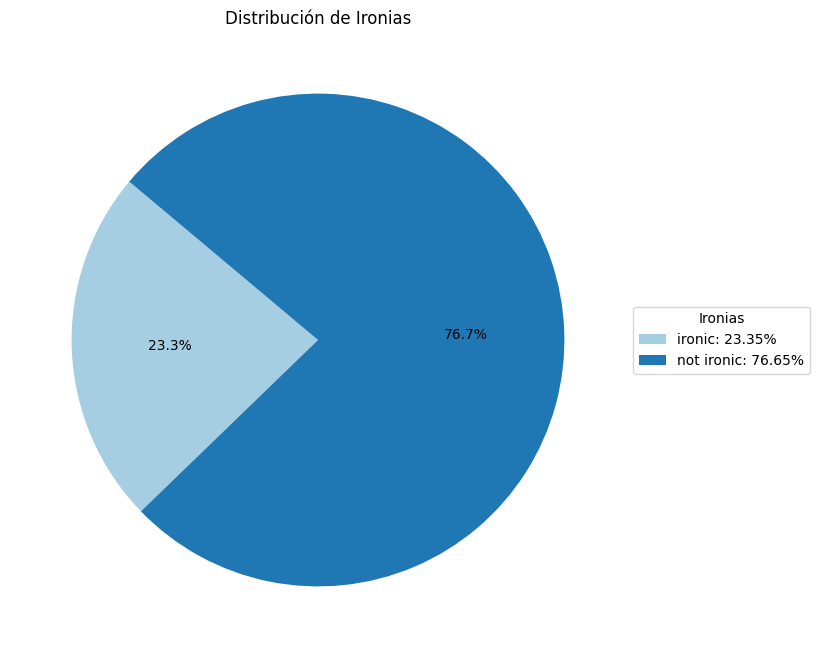

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
print("\nEjemplos de cada tipo de Ironía:")
for sent_type, example in examples_per_irony.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de Ironía:
ironic: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", 'Pablo Casado debería estudiar un máster en inmigración https://t.co/Pcz6GPJ6dG', 'Albondigas! Casi al estilo de las fodongas pero en el Gabacho.', 'Yo estaba claro que esta vida de trabajador inmigrante fundido máquina iba a ser difícil. Y es verdad, es difícil jajaja', '@PepeGonzalezRP @EsmeSese Diappoler* jajaja cállate Pepe niño polla Si me han llenado de notificaciónes jajajajaja', '@ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', '#esdemexicanos que te digan güero aunque seas mas negro que la noche', 'De esto que estás escribiendo y te preguntas lo callada que está la perra. Miras hacia atrás y te encuentras esto. https://t.co/LkdwUVHgaJ', 'Querida tú eres una puta sin llenadero.. que dicen tus hijo

--------------------------------------------


-----------------------------------------------

### Tweets de hate_speech

-----------------------------------------------


In [21]:
text_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"].tolist()]
results_irony_analysis_hate_speech = [analyze_irony(text) for text in tqdm(text_hate_speech)]

  0%|          | 8/1833 [00:00<00:27, 66.62it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.018832772970199585, 'ironic': 0.9811672568321228}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9961268305778503, 'ironic': 0.0038731659296900034}

-----------------------
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983896017074585, 'ironic': 0.0016104216920211911}

-----------------------
Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9916423559188843, 'ironic': 0.008357616141438484}

  1%|▏         | 25/1833 [00:00<00:23, 76.95it/s]


-----------------------
Texto analizado: A ver quién paga la factura y cómo se reparten el marrón de dejar inmigrantes ilegales sueltos por sus ciudades (y que los votantes no de lo hagan pagar dentro de un año)... https://t.co/CehRdJsSdU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9591813683509827, 'ironic': 0.04081859067082405}

-----------------------
Texto analizado: @Laura99CM Ahora que me has faltado el respeto te lo puedo decir por fin: ¡A fregar puta!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7685497403144836, 'ironic': 0.23145030438899994}

-----------------------
Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997732043266296, 'ironic': 0.0002268412645207718}

-----------------------
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios 

  2%|▏         | 43/1833 [00:00<00:21, 81.67it/s]


-----------------------
Texto analizado: @fxbianna Y tu eres la amiga perra que me lo va mamar a espaldas de ella, estupida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9975444674491882, 'ironic': 0.0024554829578846693}

-----------------------
Texto analizado: Se lo ha ganado a pulso, y ha sido muy comedido. Ese musulmono o se lo piensa la próxima vez. O le dan otra mayor. https://t.co/1NTIxMR11P
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6417994499206543, 'ironic': 0.3582005798816681}

-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0026767333038151264, 'ironic': 0.9973233342170715}

-----------------------
Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Ironia detectado: not ironic
Probabilidades: {'not ir

  3%|▎         | 52/1833 [00:00<00:25, 70.56it/s]


-----------------------
Texto analizado: La policía británica permitió la violación de 1.000 niñas pobres por parte de árabes https://t.co/2uRICNLjO9 via @laotracara_co
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998024106025696, 'ironic': 0.00019759437418542802}

-----------------------
Texto analizado: @rubenssambueza eres una basura de persona, lo cual no me sorprende porque eres SUDACA, y asi son los tercermundistas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995031356811523, 'ironic': 0.0004968595458194613}

-----------------------
Texto analizado: Callate por zorra le dice Damián jajajaja
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8518486022949219, 'ironic': 0.14815139770507812}

-----------------------
Texto analizado: Teñida del orto me dice el cara de artesanía prehispánica. Seguís siendo sudaca amigo, por algo no podes irte a tu alemania natal. https://t.co/zJQwgOL4Xp
Ironia detectado: not ironic
Probabilidades: {'not 

  4%|▎         | 67/1833 [00:00<00:27, 63.30it/s]


-----------------------
Texto analizado: @NickAsio1 como estáis tan evolucionados culturalmente le recordais a cualquiera cuales son las normas cívicas. Españoles, negros y árabes sin excepcion, yo no he visto españoles poniendo pies en asientos. Negros y árabes bastantes.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8703172206878662, 'ironic': 0.12968282401561737}

-----------------------
Texto analizado: @PSOE y @ahorapodemos están deseosos de ayudar a los moromierdas que llegan en oleadas a violar todas las mujeres y niños que puedan. Y oye, si se legaliza mejor, ¿eh @sanchezcastejon @ManuelaCarmena ? EL PROBLEMA ES QUE ESTO NUNCA LES PASA A SUS HIJOS Y NIETOS. LASTIMA! https://t.co/Ro8kL0MNPM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959765076637268, 'ironic': 0.004023519344627857}

-----------------------
Texto analizado: ODIAME ERO AL MIRARTE A UN ESPEJO RECUERDA YO SOY AGIL Y ATRACTIVA TU ERES UNA PUTA CERDA😁😁😁
Ironia detectado: ironic
Prob

  4%|▍         | 81/1833 [00:01<00:28, 60.44it/s]


-----------------------
Texto analizado: Ultra pendeja este ciudadano común, teatro le bajo pelotudis, esposelo y 6 horas al calabozo..   Vago indocumentado... https://t.co/MhD226N2rT
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993973970413208, 'ironic': 0.0006026228656992316}

-----------------------
Texto analizado: Reino Unido cero cristianos entre los 1,112 sirios "refugiados" reubicados en esd pais en lo que va de año, en 2017 solo reibicaron a 11. Una clara predisposición a favor de supremacistas fundamentalistas islámicos. Absurdo y suicida. https://t.co/LrqIvXerYX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997922778129578, 'ironic': 0.0002077085227938369}

-----------------------
Texto analizado: ¡BUENO Y TU ERES UNA PUTA ARRASTRADA! Laidy Gómez cargó contra Guanipa y lo tachó de 'divisionista' https://t.co/oWWzD7N17m vía @maduradascom
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995681643486023, 'ironic': 0.000431831314

  5%|▌         | 95/1833 [00:01<00:27, 63.13it/s]


-----------------------
Texto analizado: Cállate puta, zorra, borracha, drogadictaaa.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9875770807266235, 'ironic': 0.012422936968505383}

-----------------------
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9883812069892883, 'ironic': 0.011618731543421745}

-----------------------
Texto analizado: @valerynimala @ESPNmx @futpicante @Chivas Callate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.992845356464386, 'ironic': 0.0071546887047588825}

-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008606933988630772, 'ironic': 0.9913930892944336}

-----------------------
Texto analizado: Uno de los refugiados del Aquarius: "M

  6%|▌         | 109/1833 [00:01<00:27, 63.37it/s]


-----------------------
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34110912680625916, 'ironic': 0.6588908433914185}

-----------------------
Texto analizado: @_brisayanet te lo mereces x no bailar conmigo ayer pedazo fe puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.991378903388977, 'ironic': 0.008621101267635822}

-----------------------
Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.026860423386096954, 'ironic': 0.9731395840644836}

-----------------------
Texto analizado: REFUGIADOS SI, INMIGRANTES LOS NECESARIOS Y LOS QUE REALMENTE PODAMOS ATENDER, pienso que España sólo debería acoger y de una 

  7%|▋         | 123/1833 [00:01<00:26, 65.27it/s]


-----------------------
Texto analizado: me puse un vestido con escote y mi mama dizque preciso hoy le da por vestirse como zorra jajsjajs tan linda ella, como siempre
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.013787790201604366, 'ironic': 0.9862122535705566}

-----------------------
Texto analizado: La "marcha negra" acelera el paso: más de 40.000 subsaharianos esperan en Marruecos para entrar ilegalmente en España https://t.co/0MHGJNwJoz  ¡¡ Okupa Monclovita,...¿Ya tienes pensado donde cobijar a toda esta gente...?Prepara barracas en Moncloa, creo que hay terreno...!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09852446615695953, 'ironic': 0.9014754891395569}

-----------------------
Texto analizado: ajsjsjdks mi mamá me vino a enseñar su delineador y yo que perra que perra que perra mi amiga y se ENOJÓ wtf gabriela es buen plan
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16557243466377258, 'ironic': 0.8344275951385498}

------------------

  7%|▋         | 130/1833 [00:01<00:26, 63.85it/s]


-----------------------
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.009096016176044941}

-----------------------
Texto analizado: @CRDecoracion si a mi me dicen mardita hubiese dicho 'yo si mi amor' como una real perra pero tu eres nula así que te prestare mi tarjeta para que te compres una personalidad
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.876825213432312, 'ironic': 0.1231747567653656}

-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9914543628692627, 'ironic': 0.008545631542801857}

-----------------------
Texto analizado: @maricucha568 @TRICICLODELPERU @roxcanedo Tu eres puta..tienes maridos seguro
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21545417606830597, 'ironic': 0.7845458388328552}

-----------

  8%|▊         | 144/1833 [00:02<00:29, 58.05it/s]


-----------------------
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9788100719451904, 'ironic': 0.021189924329519272}

-----------------------
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993177652359009, 'ironic': 0.0006822847062721848}

-----------------------
Texto analizado: ¿Sabes lo que va a pasar? Yo lo veo muy claro. Pagaremos el pato los de abajo. Como sardinas de lata en la seguridad social. Las ayudas y becas colapsadas. Los manteros competencia desleal. Ya no tendremos sitio ni para recoger en las basuras.  https://t.co/MhFFHLYOIU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9800936579704285, 'ironic': 0.01990634575486183}

-----------------------
Texto analizado: A mí esto de que los ilegales subsaharianos se beban cubatas con mi dinero

  9%|▊         | 156/1833 [00:02<00:30, 55.51it/s]


-----------------------
Texto analizado: Va una mujer tonta, valga la redundancia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9557559490203857, 'ironic': 0.044243983924388885}

-----------------------
Texto analizado: En Mierditerráneo Digital andan un poco obsesionados con las violaciones. Las ficticias. Denunciar que un GC y un militar violaron a una cría de 18 años no queda muy patriota... Gays y un marroquí. ¿Serán gays negros, sudacas o moros? https://t.co/vyb7wrsJbw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9809100031852722, 'ironic': 0.019090041518211365}

-----------------------
Texto analizado: NO huyen de ninguna guerra, cuando huyes de una guerra no vuelves a tu país de "vacaciones" con las ayudas del estado español. Pero que no es nada nuevo, casi la totalidad de las mujeres "sirias" llevan velo cuando Siria es un país cristiano. https://t.co/HzzS2bDlO4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9042578339576721, 'i

  9%|▉         | 168/1833 [00:02<00:31, 53.21it/s]


-----------------------
Texto analizado: En verdad yo no se porque tu eres así... DE UNA PUTA ME ENAMORE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9524152874946594, 'ironic': 0.047584760934114456}

-----------------------
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930880665779114, 'ironic': 0.006911901757121086}

-----------------------
Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.001731995609588921, 'ironic': 0.9982680082321167}

-----------------------
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.023414798080921173, 'ironic': 0.9765852093696594}

-

 10%|█         | 185/1833 [00:02<00:24, 66.87it/s]


-----------------------
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994957447052002, 'ironic': 0.0005042304401285946}

-----------------------
Texto analizado: @leonelabeleenn ah callate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9442406296730042, 'ironic': 0.055759359151124954}

-----------------------
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9884874820709229, 'ironic': 0.011512587778270245}

-----------------------
Texto analizado: @medicengaribay Cállate zorra que él alcohólico aquí eres tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9849829077720642, 'ironic': 0.015017025172710419}

-----------------------
Texto analizado: yo - me picó un animal wey. mi herm

 11%|█         | 203/1833 [00:03<00:21, 75.93it/s]


-----------------------
Texto analizado: @laurandzukic @Castol0 Tu eres la novia de la otra zorra https://t.co/oMU8Wr955f
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.616309404373169, 'ironic': 0.38369062542915344}

-----------------------
Texto analizado: @juliesart0rio JAJAJAJAJAJA cállate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9045249819755554, 'ironic': 0.09547502547502518}

-----------------------
Texto analizado: Llegó el loquito más picante del condado, muy enojado, ta re apiolado. El que se coje a todo el patio de parado, y saca el choto todo cagado, acá en el barrio no queremos refugiados, sub 21 soy tu soldado
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005286912899464369, 'ironic': 0.9947130084037781}

-----------------------
Texto analizado: Los españoles pagamos por la Sanidad, los "sin papeles" no. Esta es la política de promoción de apátridas de Sánchez. Desde luego en España hay ya varias naciones, la española,

 12%|█▏        | 219/1833 [00:03<00:21, 75.00it/s]


-----------------------
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7873668670654297, 'ironic': 0.2126331776380539}

-----------------------
Texto analizado: ... de que sirve perseguir la propaganda islamista radical para luego introducir el islam en las escuelas?? O lo de Castellon pretende ser un ensayo de la creación de Islam-jugend en occidente??
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.990581750869751, 'ironic': 0.009418255649507046}

-----------------------
Texto analizado: Ojalá que te vuelva toda la mierda que tiras negra conchuda y la re puta madre que te re parió. Te mereces que re rompan la cabeza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999129593372345, 'ironic': 0.0008704009815119207}

-----------------------
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Ironia detectado: not ironic
Prob

 13%|█▎        | 237/1833 [00:03<00:19, 80.58it/s]


-----------------------
Texto analizado: Pues francamente sería raro.  Como veros a vosotros en la mierda de los Goya denunciando a Maduro, las violaciones cometidas por manadas magrebíes, o el trato de favor a fuertes subsaharianos frente a nuestros débiles y cansados abuelos.  #FelizDomingo https://t.co/1tPqs65eXZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.937674343585968, 'ironic': 0.06232568621635437}

-----------------------
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si te escapas https://t.co/aoxLoYaW95
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.44437456130981445, 'ironic': 0.5556254386901855}

-----------------------
Texto analizado: @ReSidentG1RL @BlendFreshon Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9949187636375427, 'ironic': 0.005081196315586567}

-----------------------
Texto analizado: @Adri

 14%|█▍        | 255/1833 [00:03<00:19, 82.25it/s]


-----------------------
Texto analizado: Pues a mi el hebreo o lo que farfullan los sionistas me suena muy parecido al árabe. Lo digo por lo racistas que son con todo lo que este relacionado con los árabes. https://t.co/bdXtFVeDr0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935658574104309, 'ironic': 0.006434153765439987}

-----------------------
Texto analizado: @DylanCabj_1905 si imbecil mas vale que no te vayas con ninguna zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989251494407654, 'ironic': 0.0010748355416581035}

-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960545301437378, 'ironic': 0.003945495001971722}

-----------------------
Texto analizado: Y el inmigrante recibe ayuda del rico Estado ladrón, que se olvida de los nacionales, mientras nos viola y mata. Pintada con una verdad a medias. https://t.co/4icBlhB3j9
Ironia detectado: 

 14%|█▍        | 264/1833 [00:03<00:19, 82.04it/s]


-----------------------
Texto analizado: nos estamos dando cuenta tarde que hijos arabes, por ej en zona sur de argentina son una maldicion
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.17388282716274261, 'ironic': 0.826117217540741}

-----------------------
Texto analizado: Saltan la valla al grito de ‘racistas’. (video) https://t.co/yTZ2ajQb4M https://t.co/S6UrsjjuGY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999632716178894, 'ironic': 0.0003672545135486871}

-----------------------
Texto analizado: Pues este año, aparte del montón de moros de siempre, he visto una jartá de árabes
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0017835695762187243, 'ironic': 0.998216450214386}

-----------------------
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que leer.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993194341659546, 'ironic': 0.0006805669399909675}

-----------------

 15%|█▌        | 282/1833 [00:04<00:18, 83.23it/s]


-----------------------
Texto analizado: @cecicarral @juliamengo Callate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971669316291809, 'ironic': 0.002833072328940034}

-----------------------
Texto analizado: #EXCLUSIVA:  Pablo Casado propone colgar jamones, morcillas y salchichones en la valla de Melilla, para evitar que los musulmanes la salten.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.972173273563385, 'ironic': 0.027826737612485886}

-----------------------
Texto analizado: @mendezr_agus jajajajajajaja perra te lo merecías
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6139488220214844, 'ironic': 0.3860511779785156}

-----------------------
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9736378788948059, 'ironic': 0.026362109929323196}

-----------------------
Texto analizado: Vecina chupa pija callate la boca que c

 16%|█▋        | 300/1833 [00:04<00:19, 79.31it/s]


-----------------------
Texto analizado: Miles d españoles licenciados q se han ido, o se han quedado, y se dedican a servir cafés a extranjeros ni 1 página  Al único negro q parece q no quiere dedicarse robar, vender droga, violar y vivir d paguitas titular a toda página  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997368454933167, 'ironic': 0.0002632019459269941}

-----------------------
Texto analizado: @Sucubo25 Ven ami MD, te enseñaré lo que es placer puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.968529462814331, 'ironic': 0.03147052600979805}

-----------------------
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999657392501831, 'ironic': 0.0003426503390073776}

-----------------------

 17%|█▋        | 317/1833 [00:04<00:18, 80.79it/s]


-----------------------
Texto analizado: La cobertura sanitaria a los 820.000 sin papeles costará a los españoles 2.000 millones de euros
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991401433944702, 'ironic': 0.0008598537533544004}

-----------------------
Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06543628871440887, 'ironic': 0.9345636963844299}

-----------------------
Texto analizado: Querida mamá: Tus vísceras apestan. Odio tu pelo. Debes ser árabe porque tienes una nariz enorme. Los árabes no tienen inteligencia. No entiendes mi personalidad porque no tengo una personalidad: soy un taimado solapado artero inútil anónimo casi gusano...	1	0	1
20850	@RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra	1	1	1
20851	No creo que cobré las 7 Lucas, uno se pone muy soberbio y arrogante cuando tiene mucha plata en los bolsillos.. @palabranoticia @anq

 18%|█▊        | 335/1833 [00:04<00:18, 82.83it/s]


-----------------------
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993925094604492, 'ironic': 0.0006075340206734836}

-----------------------
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998394787311554, 'ironic': 0.001605230732820928}

-----------------------
Texto analizado: En su país, árabe, que desconozco ni me importa, habrá Pena de Muerte. De acuerdo, que la ejecuten según sus extrañas y repugnantes leyes. Por favor, salven a ese niño. No tiene culpa de nada. Es inocente y merece oportunidades. Dónde coño está la ONU, UNICEF, UNESCO y su farsa? https://t.co/mT1Yu4iXS1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997054934501648, 'ironic': 0.0002944381849374622}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y o

 19%|█▉        | 353/1833 [00:04<00:17, 84.73it/s]


-----------------------
Texto analizado: @EmiiiMorenoo Callate zorra, bueno ahora si me voy a dormir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9729887843132019, 'ironic': 0.02701125666499138}

-----------------------
Texto analizado: Esto debió hacerlo hace años en todo el territorio nacional. Muchos extranjeros indocumentados jodiendo a #venezuela https://t.co/0FDLg6c0ie
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999815046787262, 'ironic': 0.00018494144023861736}

-----------------------
Texto analizado: Eliminar el cáncer del top manta subsahariano en #Barcelona con 3 medidas de oro: 1)detener a "sindicatos" de delincuentes que encima van por ahí como interlocutores, 2)repatriaciones masivas a África, 3)cierre y repatriaciones masivas de chinos proveedores.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10781415551900864, 'ironic': 0.8921858668327332}

-----------------------
Texto analizado: LA MUJER ES MUY ZORRA,SABE COMO Y Q HACER

 20%|██        | 371/1833 [00:05<00:17, 82.55it/s]


-----------------------
Texto analizado: Ya que tú eres de mucha indirecta te voy a decir una cosa. A ti nunca te van a coger para serio, eres puta y la que es puta nadie la respeta. No esperes más de lo que tú no das. Metete con alguien que sea igual que tú y deja a los demás quietos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995579123497009, 'ironic': 0.00044210004853084683}

-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06800269335508347, 'ironic': 0.9319973587989807}

-----------------------
Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA MALDITA PERRA @lortegadiaz HÁBLALE AL MUNDO DEL GRAN FRAUDE A LA NACIÓN. UNA IMAGEN VALE MÁS QUE MIL PALABRAS. https://t.co/xFsTdrAtUA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996665716171265, 'ironic': 0.0003334154316689

 21%|██        | 388/1833 [00:05<00:18, 78.56it/s]


-----------------------
Texto analizado: PFFFFFFFT. Ya wish, güera.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34347742795944214, 'ironic': 0.6565225720405579}

-----------------------
Texto analizado: @aguus_nanni Aaaaa callate maldita perra que vos tambien me tenes abandonada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9802566170692444, 'ironic': 0.019743384793400764}

-----------------------
Texto analizado: -MACHISTA! -Machista ¡¿yo?! -Machista Dios que os hizo inferiores
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.28006529808044434, 'ironic': 0.7199346423149109}

-----------------------
Texto analizado: @Cooperativa Es verdad...yo siempre acoso a mujeres de faldas hasta la rodilla y botas baqueras!! y el peinado tambien influye muchisimo...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9945834279060364, 'ironic': 0.00541663309559226}

-----------------------
Texto analizado: En estas noticias siempre me voy a leer el 

 22%|██▏       | 405/1833 [00:05<00:17, 80.27it/s]


-----------------------
Texto analizado: tu vete a la verga, puto sudaca
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990022778511047, 'ironic': 0.0009977624285966158}

-----------------------
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03891134262084961, 'ironic': 0.9610887169837952}

-----------------------
Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11587896943092346, 'ironic': 0.8841210603713989}

-----------------------
Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955287575721741, 'ironic': 0.004471269901841879}

-----------------------
Texto analizado: @PaulaOrtizz Callate

 23%|██▎       | 423/1833 [00:05<00:17, 82.75it/s]


-----------------------
Texto analizado: @Ghxst_Whisperer @BloodSubaru @xRoseGirl_ {Lilinette es una puta. Pero tú eres un amor <3}
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.42640572786331177, 'ironic': 0.5735942125320435}

-----------------------
Texto analizado: Ojala recibamos mas inmigrantes como tu y no putos negratas,no soy racista,yo respeto mucho a los latinos — gilipollas https://t.co/6t48llaVXg
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995617270469666, 'ironic': 0.00043823354644700885}

-----------------------
Texto analizado: @_Sofiasosa_ Callate si ni me mandas zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9917192459106445, 'ironic': 0.008280759677290916}

-----------------------
Texto analizado: me follo a los negratas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1201838031411171, 'ironic': 0.8798161745071411}

-----------------------
Texto analizado: @_E_Villalva Jajajajajajajajajajajajajjajajajajaja

 24%|██▍       | 441/1833 [00:06<00:16, 84.11it/s]


-----------------------
Texto analizado: @MohikanoLoco @JustTonight_97 Sé mi putita. Llámame guarra MUERDEME LOS PEZONES ayyyys ve a buscar al niño al cole.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010186404921114445, 'ironic': 0.9898136258125305}

-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6966855525970459, 'ironic': 0.3033145070075989}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984725117683411, 'ironic': 0.001527478452771902}

-----------------------
Texto analizado: @Hxrry_again CÁLLATE PERRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9943130016326904, 'ironic': 0.005686987657099962}

-----------------------
Texto analizado: @VicxorAlt Tu eres una zorra ladrona no me diste mi 

 25%|██▌       | 459/1833 [00:06<00:16, 81.24it/s]


-----------------------
Texto analizado: PA Q TU ME RECLAMAS, HAY MILES DE MUJERES Q DICEN Q ME AMAN PERO TU ERES LA PUTA Q SIEMPRE YO MONTO EN EN LA CAMA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9818429350852966, 'ironic': 0.0181569904088974}

-----------------------
Texto analizado: ESAS COSAS Y OTRAS PUEDEN PASAR POR MANTENER A LA INMIGRACION ILEGAL EN ESPAÑA Y NO EXPULSARLOS ¿NO? - La agresión de los manteros a un turista pone a Colau en un aprieto https://t.co/C7mZWXAl9P vía @Elperiodico
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998620748519897, 'ironic': 0.00013794240658171475}

-----------------------
Texto analizado: @yaitzaxavi @victoirefrmhell @WWE @RealPaigeWWE Callate zorra cara de mono
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9772820472717285, 'ironic': 0.02271798625588417}

-----------------------
Texto analizado: De los moros no se puede esperar nada bueno, y esto te lo dicen los propios árabes. Que también 

 26%|██▌       | 468/1833 [00:06<00:17, 78.81it/s]


-----------------------
Texto analizado: CÁLLATE PUTA ZORRA BORRACHA DROGADICTA https://t.co/60lgyRsEfk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985836744308472, 'ironic': 0.0014163251034915447}

-----------------------
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968525767326355, 'ironic': 0.0031474435236305}

-----------------------
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977232813835144, 'ironic': 0.0022767186164855957}

-----------------------
Texto analizado: NADA COLAU @AdaColau⁩ la protectora de moromierdas delincuentes y violadores tapa otra reyerta de #Manteros en #Barcelona https://t.co/VUhdoAYmIy  Compartido desde tu

 27%|██▋       | 486/1833 [00:06<00:16, 79.65it/s]


-----------------------
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9854910373687744, 'ironic': 0.014508971944451332}

-----------------------
Texto analizado: Los comunistas, han pasado de disparar a los que huyendo saltaban el muro en Berlín, a si eres subsahariano darte paguita @iunida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9785066246986389, 'ironic': 0.021493367850780487}

-----------------------
Texto analizado: @TowandaRebels Soy puta y sois las mujeres más repugnantes que espero nunca tirarme a la cara nadie nos obliga y NO ME VIOLAN
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999692440032959, 'ironic': 0.0003076008288189769}

-----------------------
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Ironia detectado:

 27%|██▋       | 503/1833 [00:06<00:16, 80.49it/s]


-----------------------
Texto analizado: este tipo es un complice d todos estos años d bobolucion robolucion ahora ve al corrupto andres Izarra y no ve todos con los q anda desde los q estan en VTV y telesur q se robaron las antenas de RCTV toda familia d chavez maduro la cuerda arabes hijo de putas q controlan el pais https://t.co/HfNC7leler
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996664524078369, 'ironic': 0.0003335937799420208}

-----------------------
Texto analizado: esq una polla, las mujeres son to celosas callaros ya https://t.co/eJHAx4vYC7
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990898370742798, 'ironic': 0.0009102022158913314}

-----------------------
Texto analizado: Pasan las horas y @ahorapodemos aún no ha convocado ninguna manifa en apoyo a esta menor.   Ninguna femiNAZI se solidariza con ella. Parece que si los violadores son inmigrantes, es menos delito que si lo hace un Español  https://t.co/GTE5kBufJ7
Ironia detectado: no

 28%|██▊       | 521/1833 [00:07<00:16, 81.78it/s]


-----------------------
Texto analizado: Pon pon, quien es? El Futbolista Abre la muralla Pon pon, quien es? El moro mierda Cierra la muralla  Pon pon, quien es? El árabe con dólar  Abre la muralla Pon pon, quien es? El negro en patera Cierra la muralla Pon pon, quien es?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0007672770880162716, 'ironic': 0.9992327690124512}

-----------------------
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seguro eres una muerta de hambre.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993910789489746, 'ironic': 0.0006089386879466474}

-----------------------
Texto analizado: sara puta con mi pingo se ahoga — callate deja a mi hija https://t.co/OREF75ZpxZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9248028993606567, 'ironic': 0.07519709318876266}

-----------------------
Texto analizado: @jcastle1995 mejor cállate perra lmao
Ironia detectado: not ironic
Probabilidades: {

 29%|██▉       | 539/1833 [00:07<00:15, 81.82it/s]


-----------------------
Texto analizado: Un inmigrante en Alemania. Se mea en sus leyes políticamente correctas. Están perdiendo sus países y aún no se dan cuenta. Este tipo debe ser deportado, no contribuye en nada https://t.co/NZOawrvOD2
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999866247177124, 'ironic': 0.0001337730063823983}

-----------------------
Texto analizado: @carlosj_almon Cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9943130016326904, 'ironic': 0.005686987657099962}

-----------------------
Texto analizado: Me tiene podrida.. los cuadernos los bolsos los jueces corruptos los K los justificadores seriales de cualquier mala maniobra del gobierno la idiosincrasia sudaca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9767126441001892, 'ironic': 0.023287303745746613}

-----------------------
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra bu

 30%|███       | 557/1833 [00:07<00:15, 80.96it/s]


-----------------------
Texto analizado: Que cojones les pasa al gobierno y a todos los que salieron contra la manada, tanto os acojonan los #moromierdas que no decís ni "mu"? https://t.co/C2oOx3lWaK
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996504783630371, 'ironic': 0.0003495060373097658}

-----------------------
Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.013820193707942963, 'ironic': 0.986179769039154}

-----------------------
Texto analizado: Gracias a ⁦@AdaColau⁩ nos están, LES ESTÁN más bien poniendo finos en la prensa internacional y en concreto estadounidense. 👉 “Un moromierda ilegal ha tratado de matar un turista americano cortándole la femoral con la hebilla de un cinturón”. OLE!!  https://t.co/jvIP49ce4c
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.01974283903837204, 'ironi

 31%|███▏      | 575/1833 [00:07<00:15, 83.54it/s]


-----------------------
Texto analizado: @JorgeMasta @elchiringuitotv Si es cierto solo les restrego la polla en la cara a todas las que estaban alli de blanco jajajjajajjajjaa me dievierte eso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7729624509811401, 'ironic': 0.22703759372234344}

-----------------------
Texto analizado: @DrodriguezVen @mauriciomacri Callate perra mona que aquí uds no respetan nada ni siquiera el hambre qu pasa el pueblo sucia malparia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996901750564575, 'ironic': 0.0003098190645687282}

-----------------------
Texto analizado: @erickorni0 Cállate perra. Jajaja Lera. No. Aún no se la parto. Digo la partimos. 🙊
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.024197272956371307, 'ironic': 0.9758027195930481}

-----------------------
Texto analizado: @blacguido27 Cállate ladrona sigue vendiendo tu zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996374845504

 32%|███▏      | 593/1833 [00:07<00:15, 82.56it/s]


-----------------------
Texto analizado: Seguimos llamando ladrones a los chinos, miserables a los árabes y ahora, peor, xenofobicos a todos los que vienen de países donde algunos la han cargado y se han ganado el rechazo.   Si al menos se usara el término xenofobia correctamente.   Pero ni eso. Ni siquiera https://t.co/DbDoxCm4XL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997673630714417, 'ironic': 0.00023266620701178908}

-----------------------
Texto analizado: Modela camina puta tu eres divina
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9068191647529602, 'ironic': 0.09318078309297562}

-----------------------
Texto analizado: @JakyMemes Si tu eres tan perra que te comes hasta la tela https://t.co/jOLpF8BNo6
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03245346248149872, 'ironic': 0.9675465226173401}

-----------------------
Texto analizado: Los inmigrantes en hospitales, a pensión completa y los españoles durmiendo en el coche. Po

 33%|███▎      | 611/1833 [00:08<00:15, 81.40it/s]


-----------------------
Texto analizado: @Anamontesino7 Vos no mereces vivir PUTA REGALADA, PAPONUDA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986904263496399, 'ironic': 0.0013096206821501255}

-----------------------
Texto analizado: @migracionpanama  2 VENEZOLANOS SORPRENDIDOS ROBANDO ESTAN  EN LA CASA DE PAZ NOCTURNA DE CALIDONIA SIN PAPELES MIGRATORIOS DONDE ESTAN LOS INSPECTORES DE MIGRACION EN ESTOS MOMENTOS? LOS 2 LADRONES VENEZOLANOS EN ESTE MOMENTO ESTAN EN LA CASA DE PAZ NOCTURNA DE CALIDONIA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3938153386116028, 'ironic': 0.6061846613883972}

-----------------------
Texto analizado: 11% d cesantía es consecuencias d importar 1 millon d inmigrantes cesants a competir con los 600.000 chilenos cesants  "el desempleo se explica principalmente por el aumento de la fuerza laboral"  aumento fuerza laboral o aumento de inmigrantes cesants?   https://t.co/iiOipwZ6bf
Ironia detectado: not ironic
Probabilidade

 34%|███▍      | 620/1833 [00:08<00:15, 80.83it/s]


-----------------------
Texto analizado: Peña llamando zorra a Hyuna por hacer un MV moviendo el culo y enseñando canalillo menos mal que los coreanos no son machistas ni nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9968506693840027, 'ironic': 0.0031493157148361206}

-----------------------
Texto analizado: Estamos en periodo electoral. A pesar que las mujeres tengan derecho a voto; hagámoslo lo mejor que podamos #hombres #votojusto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993821382522583, 'ironic': 0.0006178684416227043}

-----------------------
Texto analizado: .... Que Tu Eres Bien Puta ------ #CamilaVallejo - https://t.co/iXjefLcHk8
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.38462868332862854, 'ironic': 0.6153713464736938}

-----------------------
Texto analizado: MALDITOS INMIGRANTES,  SOLO VIENEN A ROBAR, dijo un inmigrante indignado. https://t.co/BLSXAmbZeo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9

 35%|███▍      | 638/1833 [00:08<00:15, 78.76it/s]


-----------------------
Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993143081665039, 'ironic': 0.0006857083062641323}

-----------------------
Texto analizado: @anasilvera06 Jajajajaja cállate perra!! es alguito nomas 😏😂😂😂😂
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7252650260925293, 'ironic': 0.2747350335121155}

-----------------------
Texto analizado: El Arabe es un flojo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935686588287354, 'ironic': 0.006431316491216421}

-----------------------
Texto analizado: Segundo dia y quierooo comer empanadas árabes sss la puta que los mierdaaaa 😒😢
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.20854739844799042, 'ironic': 0.7914526462554932}

-----------------------
Texto analizado: Cuando había algo escrito en árabe entre los trending topic y pensábamos que nos iba a atacar el ISIS x dios https://t.co/hovaaBwmCk
Ironia detec

 36%|███▌      | 656/1833 [00:08<00:14, 82.05it/s]


-----------------------
Texto analizado: Una CIS racista y transfoba nos va a explicar lo que es la transfobia... Ella que no es racista hablando de "simios negratas" que es "ordenada".  Claro que si!! https://t.co/8wF6BDhhNl 10 de la mañana y ya aguantando a TERFS!!!! https://t.co/mYSe2hVu3t
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.337269127368927, 'ironic': 0.662730872631073}

-----------------------
Texto analizado: Y las ves llorando x un amor de dos dias y tu k has sufrido x años callada como una puta estas sonriendo ai se ve la madurez 💋
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9845567941665649, 'ironic': 0.015443150885403156}

-----------------------
Texto analizado: Segui comiendo chipa y revocando paredes, negro indocumentado, ojala te rompas todos los cruzados https://t.co/oUlBNcKVs8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9969977140426636, 'ironic': 0.0030022640712559223}

-----------------------
Texto analizado: F

 37%|███▋      | 674/1833 [00:08<00:13, 84.30it/s]


-----------------------
Texto analizado: @Nazaariverplate me va a durar todo lo que yo quiera, callate zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9815800786018372, 'ironic': 0.018419964239001274}

-----------------------
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de @marianorajoy !!! TODO es culpa de @marianorajoy !!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3671315014362335, 'ironic': 0.6328684687614441}

-----------------------
Texto analizado: En tu cara zorra. https://t.co/nMhHGPNYl4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993908405303955, 'ironic': 0.0006091591785661876}

-----------------------
Texto analizado: Sigue Hiriart pero para que se largue a Chile y dejé de estar molestando a los mexicanos larguese asqueroso sudaca. https://t.co/jD3RnqEvXr
Ir

 38%|███▊      | 692/1833 [00:09<00:13, 84.73it/s]


-----------------------
Texto analizado: Jajajajajajajajaja...  Como van quedando en evidencia, los seudo gurús shilensis sudacas al cuete... https://t.co/wrTQsX5dTr
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.25265011191368103, 'ironic': 0.7473499178886414}

-----------------------
Texto analizado: Wow whatsapp ahora permite compartir ubicación enviar imágenes contactos y hasta indocumentados https://t.co/50mcnyoB7Z
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965237975120544, 'ironic': 0.0034761622082442045}

-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9698761105537415, 'ironic': 0.030123822391033173}

-----------------------
Texto analizado: Comparar a @tibisay_lucena con una perra es ofender al género perruno... Esa mujer es una hiena, le ha hecho un daño irreparable a Venezu

 39%|███▊      | 710/1833 [00:09<00:13, 82.72it/s]


-----------------------
Texto analizado: @lamambanegra17 @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Pinche estupida,pendeja y tu eres buena para ser puta😂😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9285850524902344, 'ironic': 0.07141491025686264}

-----------------------
Texto analizado: Un tio de 26 años de Camerún (pais en guerra, espero que note la ironia). Con dos hijos que no puede mantener (como la mitad de los africanos). Que dice que se ha dedicado a violar menores y animales desde que salió de Camerún... inmigrante económico como él dice....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995309114456177, 'ironic': 0.000469148246338591}

-----------------------
Texto analizado: Los árabes me dan asco
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971389770507812, 'ironic': 0.0028609936125576496}

-----------------------
Texto analizado: A este paso,  con Sánchez,  hasta la ablación a las hijas adolescentes de los 

 40%|███▉      | 728/1833 [00:09<00:13, 82.10it/s]


-----------------------
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9887229204177856, 'ironic': 0.011277062818408012}

-----------------------
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.30114179849624634, 'ironic': 0.6988582015037537}

-----------------------
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5801066756248474, 'ironic': 0.4198932945728302}

-----------------------
Texto analizado: @GladysP53066784 @lilianasirne @AmericaTV Callate la boca, tilinga perra frígida castrada.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985190033912659, 'ironic': 0.0014810425927862525}

-----------------------
Texto analizado: Debería sac

 41%|████      | 746/1833 [00:09<00:13, 83.33it/s]


-----------------------
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9298583269119263, 'ironic': 0.07014164328575134}

-----------------------
Texto analizado: @Rayados Cállate a la verga pinche puerca tú eres Tigres puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991829991340637, 'ironic': 0.000817019899841398}

-----------------------
Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8800304532051086, 'ironic': 0.11996948719024658}

-----------------------
Texto analizado: Nas ganas de andar en modo arabé para hacerlos volar a todos
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004743846133351326, 'ironic': 0.9952561259269714}

-----------------------
Texto analizado: Crece a 1.402 la entrada de inmigrantes a Ceuta, la

 42%|████▏     | 764/1833 [00:09<00:12, 84.37it/s]


-----------------------
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997730851173401, 'ironic': 0.0002269020478706807}

-----------------------
Texto analizado: @pnique Inmigrante motorizado,eres una rata de cloaca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994602799415588, 'ironic': 0.0005397709901444614}

-----------------------
Texto analizado: @mxnredrose Callate perra que te extraño
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9863730669021606, 'ironic': 0.01362690981477499}

-----------------------
Texto analizado: Muchísimas gracias!!! Además, con la inmigración de los africanos, nos vais a llenar las calles de heroína y comercio ilegal... Gracias de todo corazón! Además de acortar nuestras listas de espera en la sanidad, gracias a la sanidad pública universal. 👍 h

 43%|████▎     | 782/1833 [00:10<00:12, 81.33it/s]


-----------------------
Texto analizado: Y cuando llega y me destroza él dice: te lo mereces por puta. 🤗 No dejes de someterme cielo. #enamorada #minovioesgenial https://t.co/6ue18QOg8e
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008765003643929958, 'ironic': 0.9912350177764893}

-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9894281029701233, 'ironic': 0.010571946389973164}

-----------------------
Texto analizado: Podría confirmar alguien la prohibición o no en un colegio de Tarrasa de comer bocadillos de jamón, mortadela o chorizo por presiones de los putos moros?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9706645011901855, 'ironic': 0.029335495084524155}

-----------------------
Texto analizado: La inteligencia norteamericana advierte de una invasión inminente de 100.000 subsaharianos #ELECCIONESGENERALESYA #ELECCIONESYA #SanchezDimision #SanchezVeteY

 44%|████▎     | 800/1833 [00:10<00:12, 80.50it/s]


-----------------------
Texto analizado: He sentido envidia, con que justo, se la "dado" al moromierda. https://t.co/sYr1mmcrvj
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.22496794164180756, 'ironic': 0.775032103061676}

-----------------------
Texto analizado: @pablocasado_ saludando a gente que ha entrado de forma ilegal, indocumentados que vete a saber de dónde llegan, vete a saber si alguno de ellos es un genocida o miembro de algún grupo terrorista, sin control sanitario.... Pero voy a saludarles porque mis complejos y tal... https://t.co/XR7KKTVlLy
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9830871820449829, 'ironic': 0.01691281981766224}

-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984220266342163, 'ironic': 0.0015779772074893117}

-----------------------
Texto analizado: @doloopelozo Cállate puta. No me doy cuenta, no me da
Ironia detectado: not 

 45%|████▍     | 818/1833 [00:10<00:12, 81.88it/s]


-----------------------
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5262243151664734, 'ironic': 0.4737756848335266}

-----------------------
Texto analizado: @RodrigoReveco Cállate zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.994243323802948, 'ironic': 0.005756689701229334}

-----------------------
Texto analizado: Comentario ESCATOLÓGICO: Si no hay papal del culo, deben abstenerse de acercarse a la valla de Melilla, al menos hasta que los "lindos negritos visitantes" estén ESTREÑIDOS. https://t.co/mpuxy1wXnm
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0015324733685702085, 'ironic': 0.9984675049781799}

-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9768112897872925, 'ironic': 0.02

 46%|████▌     | 836/1833 [00:10<00:12, 81.07it/s]


-----------------------
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9427980780601501, 'ironic': 0.05720188841223717}

-----------------------
Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5814926624298096, 'ironic': 0.41850733757019043}

-----------------------
Texto analizado: 600 subsaharianos atacan en España a las fuerzas armadas. Italia debe abrir sus barreras https://t.co/LvklxEAJ2L
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997561573982239, 'ironic': 0.00024387169105466455}

-----------------------
Texto analizado: @pauvillarreal9 Callate cara d perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9969698786735535, 'ironic': 0.0030301332008

 47%|████▋     | 854/1833 [00:11<00:12, 80.99it/s]


-----------------------
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99648118019104, 'ironic': 0.0035188312176615}

-----------------------
Texto analizado: Los putos #MoroMierdas envenenan a los perros y exigen su prohibición. Mi perro es más limpio que cualquier piojoso de estos  https://t.co/s7p45pNKxk https://t.co/CPExSO5AI1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983072280883789, 'ironic': 0.0016927181277424097}

-----------------------
Texto analizado: La ropa de los indocumentados es cada vez más horrible, me dan pena chabon, los colores, los modelos, todo, asqueroso.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995312690734863, 'ironic': 0.00046878657303750515}

-----------------------
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo merecia #CaerEnTentacion
Ironia detectado: not i

 48%|████▊     | 872/1833 [00:11<00:11, 81.70it/s]


-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9938570857048035, 'ironic': 0.006142943631857634}

-----------------------
Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010215561836957932, 'ironic': 0.9897844195365906}

-----------------------
Texto analizado: @NatachaJaitt @ulisesjaitt @MarceloPolino Como no te mato por hija de puta y por puta provocadora , perra , mereces la muerte sucia HDP
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993675351142883, 'ironic': 0.0006325030117295682}

-----------------------
Texto analizado: Vergüenza de tanto indocumentado a favor de la jauría de lo políticamente correcto. La sentencia contra Juana Rivas es machista. Si es un hombre quien lo hace y la condena el doble no sería hembrista sino justa. Dan mucho asco estos polític

 48%|████▊     | 881/1833 [00:11<00:11, 82.25it/s]


-----------------------
Texto analizado: Eres una perra patética. Tu coño apesta y tu cabeza es wack. Estás enojado porque le diste la cabeza y te dejó perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996265172958374, 'ironic': 0.00037352010258473456}

-----------------------
Texto analizado: Hoy mi hermana me dijo: ' Ya callate perra latosa' (tiene 6 años), ya no se que esperar de este mundo...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6833065152168274, 'ironic': 0.31669342517852783}

-----------------------
Texto analizado: @iqrogue callate pinche perra tragacroquetas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9964487552642822, 'ironic': 0.0035512500908225775}

-----------------------
Texto analizado: @garciabecerril Cállate perra, hasta el casino te controla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9905789494514465, 'ironic': 0.009421036578714848}

-----------------------
Texto analizado: Si lo hace un 

 49%|████▉     | 899/1833 [00:11<00:11, 80.92it/s]


-----------------------
Texto analizado: @TopisimaYo @PadreJosePalmar CALLATE perra muérete de hambre !!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9950645565986633, 'ironic': 0.004935464356094599}

-----------------------
Texto analizado: Yo tengo un pana que su novia es tan puta que en vez de ponerse condones antes de chingar debería tomar antibióticos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6663753986358643, 'ironic': 0.3336246609687805}

-----------------------
Texto analizado: Qué es un partido doble mixto de tenis? Un single de hombres con obstáculos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9818978905677795, 'ironic': 0.018102101981639862}

-----------------------
Texto analizado: @Gaoh1 -Me voy antes de que Joey empiece a llamarnos zorras a todos. -Cállate, zorra!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.627699613571167, 'ironic': 0.37230032682418823}

-----------------------
Texto analizado: 

 50%|█████     | 917/1833 [00:11<00:11, 82.14it/s]


-----------------------
Texto analizado: Ojooooo que Adán la lía, en el autobús mientras celebraban la victoria, decía esto: 'Mi novia es sevillista, y es una puta más'
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.047567013651132584, 'ironic': 0.9524329900741577}

-----------------------
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9493162035942078, 'ironic': 0.05068377032876015}

-----------------------
Texto analizado: @DeenisseMb Jeje callate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6090222001075745, 'ironic': 0.39097779989242554}

-----------------------
Texto analizado: @FacuGajardoBRC Callate zorra crema
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991902709007263, 'ironic': 0.000809691846370697}

-----------------------
Texto analizado: @Romang0920 Y tu eres una puta
Ironia detectado: not ironic
Proba

 51%|█████     | 934/1833 [00:12<00:11, 76.39it/s]


-----------------------
Texto analizado: Tú... tú eres una puta, una puta una puta y una putaaaaaaa.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15047837793827057, 'ironic': 0.8495216369628906}

-----------------------
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2638857066631317, 'ironic': 0.7361143231391907}

-----------------------
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.02510063163936138, 'ironic': 0.9748993515968323}

-----------------------
Texto analizado: @iAmGuillin @laimarie30 *Entra Héctor El Father al chat* ¡Si tú eres una perra pues yo soy más perro! y que se joda. 😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.006862055044621229, 'ironic': 0.9931378960609436}

-----------------------
Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual enten

 52%|█████▏    | 951/1833 [00:12<00:11, 78.58it/s]


-----------------------
Texto analizado: La Jornada: Trump: veleidad hostil https://t.co/OBdE7kfWJ7 TRUMP SE REFIRIÓ, EN ESTA OCACIÓN, A LOS INDOCUMENTADOS EN GENERAL. EN MÉXICO TAMBIEN TENEMOS CIENTOS O MILES DE DELINCUENTES MIGRANTES DE CENTROAMÉRICA, COMETIENDO DELITOS.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997060894966125, 'ironic': 0.00029386021196842194}

-----------------------
Texto analizado: Malditos árabes que devolveram o Cazares!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.218263179063797, 'ironic': 0.7817367911338806}

-----------------------
Texto analizado: Vaya perla de sabiduría de esta gentuza: “No es tan malo que los refugiados musulmanes violen a las mujeres suecas, ya que es algo cultural en ellos” - Barbro Sörman (diputada socialista feminista. Fuente: https://t.co/RKQEJTNDRB
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10795782506465912, 'ironic': 0.8920422196388245}

-----------------------
Texto analizado: @

 53%|█████▎    | 967/1833 [00:12<00:11, 78.14it/s]


-----------------------
Texto analizado: ¡Ay esos inmigrantes vienen aquí a vivir de lo público, cobrando y robando, además con títulos universitarios falsos!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9884876608848572, 'ironic': 0.011512321420013905}

-----------------------
Texto analizado: @VilxSouvenir El de perra me luce pero tu eres tan perra que ni te agarra. Te quiero bebé, el proceso está siendo increíble, el siguiente paso es que yo te maquillaje, vas a quedar perfecta.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.36503055691719055, 'ironic': 0.6349694728851318}

-----------------------
Texto analizado: Pregunta: en cuánto incide el desempleo en sectores más básicos de la economía por la presencia de inmigrantes? Si no puedo hacer esa pregunta, estamos jodidos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994801878929138, 'ironic': 0.0005198551225475967}

-----------------------
Texto analizado: @kleopatreus Tú eres bien perr

 54%|█████▎    | 984/1833 [00:12<00:11, 74.54it/s]


-----------------------
Texto analizado: @EvelynAlcaldesa Alcaldesa los extranjeros que estan vendiendo en las calles los fiscalizan si estan legal en el País por que no los deportan si estan indocumentados muy bien su trabajo las calles de Providencia parecian interminables ferias
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996343851089478, 'ironic': 0.0003656020562630147}

-----------------------
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue intentándolo https://t.co/A8pnVpXQhT
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.381704181432724, 'ironic': 0.6182958483695984}

-----------------------
Texto analizado: Acá me ven y ya me hablan español, más sudaca no conseguís.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1735449582338333, 'ironic': 0.8264550566673279}

-----------------------
Texto analizado: @AlexaCamejo Cáll

 54%|█████▍    | 992/1833 [00:12<00:12, 67.39it/s]


-----------------------
Texto analizado: Tipico : si una chica no le cae otra chica es por que para la otra es una PUTA 😂 pero solo por que no le cae bien
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9929792284965515, 'ironic': 0.007020824588835239}

-----------------------
Texto analizado: @Sketchshanice Que te calles puta sadboy de los cojones
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976206421852112, 'ironic': 0.002379389014095068}

-----------------------
Texto analizado: Sos una malparida no mereces ser feliz puta puta puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995517134666443, 'ironic': 0.00044825408258475363}

-----------------------
Texto analizado: @AgosBlanco13 Te cabe, no te lo mereces por zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9941852688789368, 'ironic': 0.005814708769321442}

-----------------------
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los di

 55%|█████▍    | 1006/1833 [00:13<00:13, 62.66it/s]


-----------------------
Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988395571708679, 'ironic': 0.0011604848550632596}

-----------------------
Texto analizado: @lovatospriority Callate puta que tu fuiste la primera en darle like
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998007595539093, 'ironic': 0.0019924528896808624}

-----------------------
Texto analizado: @Shariit_Rgueez @_Axxelo Cállate. Tú eres bien zorra. 🌚❤
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8374319672584534, 'ironic': 0.16256803274154663}

-----------------------
Texto analizado: @PabloAgustin @barbarammzz @MicaSuarez12 CÁLLATE...PERRA https://t.co/Qm6enxgxls
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9936068058013916, 'ironic': 0.006393153220415115}

-----------------------
Texto analizado: DÉJATE DE WEBIAR ZORRA MAL PARIDA YO NO TE TIRO WEAS VKO

 56%|█████▌    | 1020/1833 [00:13<00:12, 63.03it/s]


-----------------------
Texto analizado: Deben darle cadena perpetua a todos los inmigrantes que lleguen a delinquir en un país donde le abren sus puertas. Y que paguen esa condena en ese país. No se puede morder la mano de quien te da de comer...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999593198299408, 'ironic': 0.0004067867121193558}

-----------------------
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.858148455619812, 'ironic': 0.14185157418251038}

-----------------------
Texto analizado: @Flor_avalos23 Te conteste zorra, te conteste, asi que callate y contestame.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.992333173751831, 'ironic': 0.007666860707104206}

-----------------------
Texto analizado: es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Ironia detectado: ironic
Probabilidades: {'not ironic'

 56%|█████▋    | 1034/1833 [00:13<00:13, 61.36it/s]


-----------------------
Texto analizado: Retratao el roomba sudaca. https://t.co/4KA6aCyNDb
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1984761506319046, 'ironic': 0.8015238046646118}

-----------------------
Texto analizado: Aquí podemos ver un grupo de simpáticos moromierdas, basura de la que a @sanchezcastejon le gusta tanto recoger del mar. Como se puede apreciar están totalmente integrados en la sociedad europea. ¿Son o no son como monos salvajes, sucios, delincuentes, violadores y pendencieros? https://t.co/lbZH8Iu92B
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988057613372803, 'ironic': 0.0011942966375499964}

-----------------------
Texto analizado: @MarHuidobro tú eres la zorra madre de un asesino con gen izquierdoso y separatista!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9972065091133118, 'ironic': 0.0027934268582612276}

-----------------------
Texto analizado: @ te sigo amando pero no lo mereces, perra.
Ironia detecta

 57%|█████▋    | 1048/1833 [00:13<00:12, 61.88it/s]


-----------------------
Texto analizado: @BeeluArzola Sos una hija de puta mala.madre pobre ángel todo x una tablet perra mal parida no te mereces nada vos presa tenes que ir no al sicólogo .
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999667763710022, 'ironic': 0.00033229144173674285}

-----------------------
Texto analizado: Otras voces: ¿Una sudaca y un discapacitado juntos? Por los papeles, o por la pasta"" https://t.co/SOKARu6Vqc vía @retronesyhombre"
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992831349372864, 'ironic': 0.0007168541196733713}

-----------------------
Texto analizado: @CeleRoldan11 @LucasSpadafora CALLATE YO ME LO DESCARGE YEGUA HIJA DE PUTA EN EL GRUPO HACES LO MISMO y de paso te dejo a moria https://t.co/jDGsabrHfW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970651268959045, 'ironic': 0.0029348526149988174}

-----------------------
Texto analizado: @eugenidors  Huyen de una guerra... de dónde sacas tu eso?

 58%|█████▊    | 1062/1833 [00:14<00:12, 63.39it/s]


-----------------------
Texto analizado: Siguen siendo mercancía y de la barata ,como los árabes vendedores de coroto. https://t.co/TuSjlgzIUA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970976114273071, 'ironic': 0.002902386011555791}

-----------------------
Texto analizado: malditos árabes, como pueden entender esto https://t.co/7sPjVFSI6u
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0885014683008194, 'ironic': 0.911498486995697}

-----------------------
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entiendo por que ninguno de los asaltantes de la valla de Ceuta tenía aspecto de estar desnutrido o de haber pasado calamidades. Más bien, parecían recién salidos de un gimnasio. https://t.co/8iJnORictx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6628755331039429, 'ironic': 0.3371244966983795}

-----------------------
Texto analizado: @justlikecams callate camila y dame seguidores perra
Ironia detectado: not ironic
Probabil

 58%|█████▊    | 1069/1833 [00:14<00:12, 62.93it/s]


-----------------------
Texto analizado: Tal para cual: un puto chaka sudaca para una afición de ñeros 👍🏻 https://t.co/lHvOjDfC5m
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9374616146087646, 'ironic': 0.06253840774297714}

-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8909173607826233, 'ironic': 0.10908259451389313}

-----------------------
Texto analizado: @PakoAyestaran LÁRGATE GACHUPIN DE MIERDA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994879961013794, 'ironic': 0.0005119332927279174}

-----------------------
Texto analizado: Pues que manden allí a todos esos que saltan la valla  de Ceuta https://t.co/CWoUCoXBQs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9952641725540161, 'ironic': 0.0047358181327581406}

-----------------------
Texto analizado: ¿y de donde sacan pa

 59%|█████▉    | 1082/1833 [00:14<00:12, 58.12it/s]


-----------------------
Texto analizado: Marico soy tan celoso que entro en el Facebook para felicitar a mi bae y hay un maldito cabrón que le puso "Feliz aniversario amor" y le puso un gif de un corazón diciendo "te quiero mi amor", y luego entro a su perfil y es un maldito arabe que había traducido todo en español.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.02989228628575802, 'ironic': 0.9701077342033386}

-----------------------
Texto analizado: Esto empieza a irse de madre... o se ponen medidas serías, o sufriremos más ataques de subsaharianos que esperan en un monte próximo en Marruecos. Ahora más agresivos y violentos. #MedidasYa https://t.co/5a8Bphh612
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988971948623657, 'ironic': 0.0011028175940737128}

-----------------------
Texto analizado: ESTA MUJER ES UNA ZORRA 💖💖💖💖🔝
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10617626458406448, 'ironic': 0.8938237428665161}

-----------------------

 60%|█████▉    | 1094/1833 [00:14<00:13, 54.42it/s]


-----------------------
Texto analizado: @SamBelenn Callate vos sos una puta reprimida ajajaajaa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9742494225502014, 'ironic': 0.025750543922185898}

-----------------------
Texto analizado: Trabajar con Árabes es una patada en los huevos, con botas de punta de acero, en el frío entorno de Alaska, a pelo.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00854223407804966, 'ironic': 0.9914577603340149}

-----------------------
Texto analizado: @MarinaAlbiol Tu eres una perra comunista!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993498921394348, 'ironic': 0.0006501135067082942}

-----------------------
Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9002279043197632, 'ironic': 0.09977215528488159}

-----------------------
Texto analizado: Vía TuAutoCorrector: RT DeboRecordarQue: Mi novia es una perra (Pluto)
Ironia detectado: ironic
Proba

 60%|██████    | 1106/1833 [00:14<00:13, 52.11it/s]


-----------------------
Texto analizado: Sea insulto o no, los "malditos sudacas" son los que tienen en pie a las ligas del fútbol español y europeo https://t.co/EwHDpR0gZV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997565150260925, 'ironic': 0.00024346672580577433}

-----------------------
Texto analizado: Racismo es que no haya güeros en aprietos. 🙄😆
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.007686519995331764, 'ironic': 0.9923134446144104}

-----------------------
Texto analizado: TE LO MERECES POR PERRA. —Lo arrastra por la academia de las greñas y le da unos chanclazos. https://t.co/9GwmLte4BU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9576165676116943, 'ironic': 0.04238341376185417}

-----------------------
Texto analizado: @Stolbizer @mainesCyN Callate la boca perra siberiana metiendo a CFK en esto! Sos tan pelotuda podes ser! Nunca seras nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995042085647583, '

 61%|██████    | 1120/1833 [00:15<00:12, 57.67it/s]


-----------------------
Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.539581835269928, 'ironic': 0.460418164730072}

-----------------------
Texto analizado: #estefinde  costo DNI Y PASAPORTE, q sorete me importa cuanto cuesta en otros paises sudacas. Lobo das VERGUENZA CN LAS COMPARACIONES. ASCO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996077418327332, 'ironic': 0.0003923267067875713}

-----------------------
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9149418473243713, 'ironic': 0.08505814522504807}

-----------------------
Texto analizado: Pues la India de Gandhi Ese país tan espiritual... Son razas dominadas..como los árabes, dominados por un libro...Tendencia a retroceder ante lo nuevo,desprecio por la mujer, por lo inferior según el criterio de estas simple mind

 62%|██████▏   | 1137/1833 [00:15<00:10, 68.61it/s]


-----------------------
Texto analizado: @Martinitz_ callate zorra querés que te viole putita
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9849228858947754, 'ironic': 0.015077153220772743}

-----------------------
Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.011259017512202263, 'ironic': 0.9887409806251526}

-----------------------
Texto analizado: @lara_ahualli Pedazo de zorra cállate q yo me lo cante antes 😜
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9857620000839233, 'ironic': 0.014237937517464161}

-----------------------
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0027182179037481546, 'ironic': 0.9972817897796631}

-----------------------
Texto analizado: Perdòn @CeciliaAF1  agregaría para esto al sr pdte @sebastianpinera  D

 63%|██████▎   | 1154/1833 [00:15<00:09, 75.19it/s]


-----------------------
Texto analizado: @isabellagiehl si la puta q te pario virgen de mierda no digas nada no opines callate nunca em tu vida probaste miche con seven up aa pero ron con coca cola si babieca balurdaaaa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959586262702942, 'ironic': 0.004041412379592657}

-----------------------
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995612502098083, 'ironic': 0.0004387332301121205}

-----------------------
Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.992845356464386, 'ironic': 0.0071546887047588825}

-----------------------
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.030045730

 64%|██████▍   | 1171/1833 [00:15<00:08, 77.53it/s]


-----------------------
Texto analizado: Tu novia es más puta que se sacó un ojo para tener otro hueco, son pajeros😅😅
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6859411001205444, 'ironic': 0.31405895948410034}

-----------------------
Texto analizado: @victorACDZ @yael_diaz Tu cállate alv perra envidiosa 🌚
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9514758586883545, 'ironic': 0.04852418601512909}

-----------------------
Texto analizado: Que guarra tienes que ser en el catre — Cuando quiero con quien quiero https://t.co/nBUSE7ejJb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5270615220069885, 'ironic': 0.4729384779930115}

-----------------------
Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Ironia detectado: not ironic
Probabilidades: {'not 

 65%|██████▍   | 1189/1833 [00:15<00:07, 80.58it/s]


-----------------------
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9774397611618042, 'ironic': 0.022560246288776398}

-----------------------
Texto analizado: @reginabanda06 tú eres una zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954791069030762, 'ironic': 0.004520878195762634}

-----------------------
Texto analizado: Q cagada a palo te mereces hija de puta! La misma q le diste a tu hija y más. https://t.co/aBPRIOfDTQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997157454490662, 'ironic': 0.000284287758404389}

-----------------------
Texto analizado: @imcarlx A ti te voy a meter la polla en la boca para que te calles, a Luisillo a ostias
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988337159156799, 'ironic': 0.0011663129553198814}

-----------------------
Texto analizado: [3/1 03:47] Aa Brii: Boluda mira vos [3/1 03:48] Aa Brii: Sos re zorra y cas

 65%|██████▌   | 1198/1833 [00:16<00:08, 78.56it/s]


-----------------------
Texto analizado: Mi futuro es tan negro que está saltando la valla de Melilla.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0014860236551612616, 'ironic': 0.9985139966011047}

-----------------------
Texto analizado: Después dicen que los árabes no están locos. Que manera tan sádica de querer convertir a un niño en vegano/vegetariano. https://t.co/2WDIkviGmp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984367489814758, 'ironic': 0.0015632809372618794}

-----------------------
Texto analizado: La mujer a su marido: -Llevamos 20 años casado y nunca me has comprado nada +¿Es que vendes algo? #Afregar
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0063947164453566074, 'ironic': 0.9936052560806274}

-----------------------
Texto analizado: estos arabes d mierda ahre https://t.co/z2U6x9sAd7
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8642749786376953, 'ironic': 0.1357250064611435}

-----------------------
Te

 66%|██████▋   | 1215/1833 [00:16<00:07, 79.37it/s]


-----------------------
Texto analizado: #DebatePorElFuturo @NicolasMaduro LOS BUHONEROS al cual le han dado el nombre de ECONOMÍA INFORMAL,en su gran mayoría, son indocumentados COLOMBIANOS y de otros países, muchos usan la fachada para vender drogas y cometer ilícitos, esos mismos, son ahora LOS BACHAQUEROS. Análisis.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983440637588501, 'ironic': 0.001655960688367486}

-----------------------
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0022545596584677696, 'ironic': 0.9977454543113708}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9846770167350769, 'ironic': 0.015323023311793804}

-----------------------
Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
I

 67%|██████▋   | 1233/1833 [00:16<00:07, 81.50it/s]


-----------------------
Texto analizado: @RicarditoZL Cállate perra que fue pura suerte 😭😭😭😭
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9505330324172974, 'ironic': 0.04946697875857353}

-----------------------
Texto analizado: El Estado del Bienestar para quién? Para inmigrantes (mantero ,violadores y demás chusma que estáis trayendo) Pagas y SS que tenemos que pagar los demás ?  Para cuándo el Bienestar de los Españoles, Seguridad en el trabajo de Policia y Guardia Civil, trabajo y ayuda xa parados..? https://t.co/yU4ccZMPGA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9870052337646484, 'ironic': 0.012994742020964622}

-----------------------
Texto analizado: Español orgulloso llamando puto sudaca al PaPa ... pos na! https://t.co/YH9ycavHpR
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8395631909370422, 'ironic': 0.16043685376644135}

-----------------------
Texto analizado: Estás cabrón 'jodia golda puta tu eres para mí'😂😂😂 https:/

 68%|██████▊   | 1250/1833 [00:16<00:07, 78.94it/s]


-----------------------
Texto analizado: ¿Qué hacer para que a una mujer le brillen los ojos? Ponerle una linterna en la oreja. #SinCerebro #SinDerechos #SinPolla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05311661213636398, 'ironic': 0.9468834400177002}

-----------------------
Texto analizado: Dale super 8 a un inmigrante ilegal y lo alimentarás por un día. Deportalo y jamás tendrás que alimentarlo de nuevo. - Imperivm 20:22
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4141348898410797, 'ironic': 0.5858651399612427}

-----------------------
Texto analizado: Pero es contra puro sudaca, asi que chiste https://t.co/fLAAahxjTd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9959463477134705, 'ironic': 0.004053641110658646}

-----------------------
Texto analizado: @JorgeTorres210 TALK TO ME IMBECIL? NO TE OYGO VIVO EN EL PARAISO SOY UN DIOS NO COMO TU PERRA SEDIENTA DE POLLA TE PEGO UN GUANTASO Y TE D
Ironia detectado: not ironic
Probabilidades:

 69%|██████▉   | 1267/1833 [00:16<00:07, 79.74it/s]


-----------------------
Texto analizado: @Alddo__ Cállate loca todo el año fue al revés puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984163045883179, 'ironic': 0.0015837380196899176}

-----------------------
Texto analizado: @MaaleLanda2 Jajaja callate perra, jamas haria eso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9864482283592224, 'ironic': 0.013551748357713223}

-----------------------
Texto analizado: Que por enseñar el canalillo me llamen puta, enserio no saben lo que tienen en casa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5985420346260071, 'ironic': 0.4014579653739929}

-----------------------
Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997382760047913, 'ironic': 0.00026173453079536557}

-----------------------


 70%|██████▉   | 1283/1833 [00:17<00:07, 76.98it/s]


-----------------------
Texto analizado: .@NicolasMaduro @dcabellor @DrodriguezVen @TarekWiliamSaab @NestorReverol @vladimirpadrino @MaikelMorenoTSJ me uno a la petición del Camarada @jmso722014 Fuera de Venezuela los Colombianos Indocumentados, Paramilitares, Sicarios, y Contrabandistas https://t.co/uCVDTPY5Dn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993078708648682, 'ironic': 0.0006921484600752592}

-----------------------
Texto analizado: @PuTitaTrevi Las dos preciosas pero tu eres más mi perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9784566164016724, 'ironic': 0.021543389186263084}

-----------------------
Texto analizado: Una guerra mundial por los inmigrantes lol  Les sacaba los ojos. Mi madre se ha juntado con dos señores mayores y sueltan cada perla...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15839332342147827, 'ironic': 0.8416067361831665}

-----------------------
Texto analizado: menuda zorra te a tocado al lado al

 71%|███████   | 1300/1833 [00:17<00:06, 78.96it/s]


-----------------------
Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986193180084229, 'ironic': 0.0013806662755087018}

-----------------------
Texto analizado: @Alexaladyekt Q perra tan cojible eres puta yo ya m eh culeado a varias putas d elektra pero se nota q tu eres especial seria rico chiquitearte y darte a beber mis Miados y mis mocos
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2692742943763733, 'ironic': 0.7307257056236267}

-----------------------
Texto analizado: @croftarpiaa Cállate y deja a Lola en paz perra 🐕
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9323351383209229, 'ironic': 0.06766491383314133}

-----------------------
Texto analizado: Putos negros @AdaColau tú Inmaculada ahora vas y te los llevas a tu casa tienes Barcelona plagado de negros h moros escoria de la sociedad .

 72%|███████▏  | 1317/1833 [00:17<00:06, 79.16it/s]


-----------------------
Texto analizado: @Sonia_Cameselle Esta mujer es una perra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9937811493873596, 'ironic': 0.006218905095010996}

-----------------------
Texto analizado: Sigan haciendo experimentos con sudacas https://t.co/GWNBYSS8fC
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.060973186045885086, 'ironic': 0.9390267729759216}

-----------------------
Texto analizado: Ultima hora: El ministro del interior, Grande Marlaska, ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro del whatsapp que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9969171285629272, 'ironic': 0.003082843264564872}

-----------------------
Texto analizado: No me llames frijolero pinche gringo puñetero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9898966550827026, 'ironic': 0.010103334672749043}

------------------

 73%|███████▎  | 1334/1833 [00:17<00:06, 77.82it/s]


-----------------------
Texto analizado: @viccgonzalezz Cállate que vos sos más zorra que yo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9864072799682617, 'ironic': 0.013592688366770744}

-----------------------
Texto analizado: Los musulmanes y la religión musulmana no deberían existir sobre la faz de la tierra. Seres que se comportan como monos salvajes, con 1500 años de atraso, analfabetos funcionales, jetas, machistas, racistas, violadores, sucios... #Moromierdas https://t.co/OaeLLCfme0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997411370277405, 'ironic': 0.0002588584611658007}

-----------------------
Texto analizado: ¿A dónde vamos a migrar cuando Europa sea islámica y EEUU latina? #inmigración
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9259373545646667, 'ironic': 0.07406264543533325}

-----------------------
Texto analizado: @cohanxmcbride QUE LA RE PUTA MADRE QUE MICAELA LA CONCHA DE SU MADRE NO PUEDO CREERLO AY TE LO ME

 74%|███████▎  | 1351/1833 [00:18<00:06, 80.23it/s]


-----------------------
Texto analizado: @OrainGipuzkoa De qué viven los magrebíes y subsaharianos que veo diariamente en terrazas de bares? Les ha tocado la lotería? #pregunta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.022158905863761902, 'ironic': 0.9778410792350769}

-----------------------
Texto analizado: @BIoodyCountess < cuando porque poco más puede hacer maldita zorra tetona. No mereces el apellido Bathory.-
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.027758009731769562, 'ironic': 0.972241997718811}

-----------------------
Texto analizado: Que despues de la negra de origen arabe que entro en mi casa en D  de 2015, non tiene perdon ni efimeros las miserables.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9912520051002502, 'ironic': 0.008748030290007591}

-----------------------
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9845380783081055, 'ironic': 0.01546187

 75%|███████▍  | 1369/1833 [00:18<00:05, 80.40it/s]


-----------------------
Texto analizado: Y mas verguenzas de estos negratas manteros https://t.co/JOn0A4Tjdi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994311928749084, 'ironic': 0.0005688331439159811}

-----------------------
Texto analizado: Salir con mi novia es solo para que una que otra zorra se me cargue en frente, osea hola tiene novia respeta lpm me hierve la cabeza 😣😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2705172300338745, 'ironic': 0.7294828295707703}

-----------------------
Texto analizado: Un turista herido tras la agresión de unos manteros en Barcelona (Esto es lo que viene con los inmigrantes subsaharianos varones. Muchos de ellos ex soldados con violaciones y asesinatos a sus espaldas)  https://t.co/S0JMcCwr37 vía @20m
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997288584709167, 'ironic': 0.0002711476117838174}

-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que

 76%|███████▌  | 1387/1833 [00:18<00:05, 82.30it/s]


-----------------------
Texto analizado: Digo A y mi hermana ya esta 'Callate zorra' JAJAJSJAAJA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.48392757773399353, 'ironic': 0.5160724520683289}

-----------------------
Texto analizado: En ese vídeo falta de fondo la canción de; mi novia es más puta que la tuya 🎶
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.032595016062259674, 'ironic': 0.9674050211906433}

-----------------------
Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.973125696182251, 'ironic': 0.02687438204884529}

-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985515475273132, 'ironic': 0.0014484594576060772}

-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9950146079063416, 'ir

 77%|███████▋  | 1405/1833 [00:18<00:05, 82.36it/s]


-----------------------
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15756550431251526, 'ironic': 0.8424344658851624}

-----------------------
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992111921310425, 'ironic': 0.0007887896499596536}

-----------------------
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997492790222168, 'ironic': 0.0025072575081139803}

-----------------------
Texto analizado: Soy un hombre descompuesto cállate perra puta y déjame explicar
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.848816454410553, 'ironic': 0.15118350088596344}

-------------

 78%|███████▊  | 1423/1833 [00:18<00:05, 80.86it/s]


-----------------------
Texto analizado: La única misión de la izquierda europea Socialdemócrata es la DESTRUCCION de Europa por colapso económico por el gasto que suponen los FAKE REFUGEES! A España, le costará 20 millones d € al año los 800 negros q SALTARON la VALLA Ceuta, + 4 millones€ en gasto sanitario x VIRUS https://t.co/TlTKf68Ml8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989977478981018, 'ironic': 0.0010022803908213973}

-----------------------
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991165995597839, 'ironic': 0.0008834106847643852}

-----------------------
Texto analizado: Hay algo perturbador cuando un científico, y detrás todo un colectivo, recurre al empirismo para demostrar que la inmigración ilegal es buena. Veremos los resultados del experimento a corto plaz

 79%|███████▊  | 1441/1833 [00:19<00:04, 79.60it/s]


-----------------------
Texto analizado: En México te puedes reír de los pobres, ricos, fresas, prietos, güeros, pelones, negros, nacos, ancianos y homosexuales...ah pero no se te ocurra reírte de un gordo, porque se te va el 98% de la población encima. Es un crimen ofender a un gordo, en un país de gordos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.887538731098175, 'ironic': 0.11246129125356674}

-----------------------
Texto analizado: @_ElAguijon los Chinos tienen las mafias de los abastos y contrabandistas de mercancías, los rusos drogas y trata de mujeres, los africanos manteros e incursionan en drogas, llega un hijo de emigrante español con título profesional, con sus documentos y es un sudaca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9212796688079834, 'ironic': 0.07872036844491959}

-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 

 80%|███████▉  | 1458/1833 [00:19<00:04, 79.91it/s]


-----------------------
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5745179057121277, 'ironic': 0.4254821538925171}

-----------------------
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9591200947761536, 'ironic': 0.04087989777326584}

-----------------------
Texto analizado: @PuTitaTrevi Eres una perra muy puta mereces que te viole aquí tengo lo que necesitas puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9841747879981995, 'ironic': 0.01582517847418785}

-----------------------
Texto analizado: @SR_haru_L Sería un honor enseñarle a mi hija como ser una buena zorra💖
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08401846140623093, 'ironic': 0.9159814715385437}

-----------------------
Texto analizado: Yoles iba a dar lo que 

 81%|████████  | 1476/1833 [00:19<00:04, 81.61it/s]


-----------------------
Texto analizado: @joe_trouble Tu novia es bien puta ......pero te lo digo en buen pedo 👌
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9732288718223572, 'ironic': 0.026771120727062225}

-----------------------
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8598536252975464, 'ironic': 0.14014634490013123}

-----------------------
Texto analizado: Que bueno que no fui güerita, si prieta soy mamona, no quiero ni imaginarme güera jajjajaa
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10960964113473892, 'ironic': 0.8903903365135193}

-----------------------
Texto analizado: Te voy a enseñar lo que es una perra, PERRA.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.505980372428894, 'ironic': 0.49401959776878357}

-----------------------
Texto analizado: 📣🗡️#Barcelona, ciudad 

 81%|████████  | 1485/1833 [00:19<00:04, 81.49it/s]


-----------------------
Texto analizado: Las aceras son para el tránsito de personas no para que gente sin papeles venda falsificaciones de manera ilegal bajo el paraguas del Ayuntamiento. https://t.co/foPILmcwV7
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997574687004089, 'ironic': 0.0002425910934107378}

-----------------------
Texto analizado: @xVolkovaVera Que guarra. Búscate ya un mozo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7635497450828552, 'ironic': 0.23645025491714478}

-----------------------
Texto analizado: Puto sudaca de mierda — 😘 https://t.co/FwFRovNuHk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955006241798401, 'ironic': 0.004499340429902077}

-----------------------
Texto analizado: @lortegadiaz Hay vieja loca rana platanera zorra de medio pelo cállate que así te ves mas bonita
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9027962684631348, 'ironic': 0.09720366448163986}

-------------------

 82%|████████▏ | 1503/1833 [00:19<00:04, 80.28it/s]


-----------------------
Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03211455047130585, 'ironic': 0.967885434627533}

-----------------------
Texto analizado: Esto es lo que opina y dice este subsahariano, yo no digo ni opino. Me puedes llamar, racista, facha o que no soy solidario. Pero yo no estaré aqui y no te diré eso de......te lo dije y no me hicistes caso, cuando te quiten tu libertad. https://t.co/BmjM4vomjR
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997861981391907, 'ironic': 0.0002138006966561079}

-----------------------
Texto analizado: https://t.co/Wnap07YAFR Un programa de "acogida humanitaria" aloja en hostales a inmigrantes con nuestro dinero. Pero que miles de jóvenes españoles, aún trabajando,no puedan siquiera alquilar una vivienda no merece una acc

 83%|████████▎ | 1521/1833 [00:20<00:03, 79.92it/s]


-----------------------
Texto analizado: #impromilf    Yaz! cultura árabe = cultura machista. Te lo digo xq me ha pasado lo mismo! @clauconserva @LaFranConserva descendencia árabe siguen inculcando el machismo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909422993659973, 'ironic': 0.009057746268808842}

-----------------------
Texto analizado: @sara_cuckold Te mereces una mamada en el año y dejarte lo abierto , puta.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3420571982860565, 'ironic': 0.6579428315162659}

-----------------------
Texto analizado: Por mamadas como estas nos odian odian a los güeros. https://t.co/ZW69t936hN
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16584721207618713, 'ironic': 0.8341527581214905}

-----------------------
Texto analizado: Que tiene que venir un sudaca de Miami a decir en Telecirco que, Pedro Sanchez están convirtiendo este país en el tercer mundo, porque le han agredido una mafia de manteros. Gracias PSOE

 84%|████████▍ | 1539/1833 [00:20<00:03, 81.08it/s]


-----------------------
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993553757667542, 'ironic': 0.0006446390179917216}

-----------------------
Texto analizado: Formas sensatas de subir el PIB: – Bajar impuestos. – Desregular. – Fomentar la natalidad. – Prohibir a la izquierda.  Formas absurdas de subir el PIB: – Dejar entrar a millones de subsaharianos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.898666501045227, 'ironic': 0.10133352875709534}

-----------------------
Texto analizado: Zorra Colau,amante de moros,pensando en votantes.Si tú eres atea desgraciada!!! https://t.co/Fv38CCZOUv
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994825124740601, 'ironic': 0.0005174980615265667}

-----------------------
Texto analizado: Estimados @FcpysUNCuyo quisiera saber por qué tienen a este antisemita dando clase en su universidad ¿avalan est

 85%|████████▍ | 1557/1833 [00:20<00:03, 81.05it/s]


-----------------------
Texto analizado: @Esmexcnco @uggzo Hola reyna tu eres cncowers y apoyas a esta uggly zorra no lo puedo crerr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9964476823806763, 'ironic': 0.0035523439291864634}

-----------------------
Texto analizado: El agressor de una mujer de 25 ha sido detenido. La agresión se produjo en la estación de Milán. Es un inmigrante ilegal de origen Nigeriano con antecedentes #StopInvasion #CloseBorders #IllegalImmigration https://t.co/DSYj8kdCiA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994999170303345, 'ironic': 0.0005000245291739702}

-----------------------
Texto analizado: que ejemplo no dejan ensuciar su pais ,,, asi deberiamos hacer los venezolano con los cubanos y con los colombianos y chinos y arabes que acabaron que lo poco que quedaba ! https://t.co/2ydEeM2gne
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995717406272888, 'ironic': 0.0004282635636627674}

---------------

 86%|████████▌ | 1575/1833 [00:20<00:03, 79.58it/s]


-----------------------
Texto analizado: odio que me escriban arabes y me hablen en arabe,o sea amigo yo hablo castellano,ingles y portugues,no arabe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8185544013977051, 'ironic': 0.18144561350345612}

-----------------------
Texto analizado: Para que? Si tu eres una perra, tienes 182837332 qlitos.l. i miss you😘 https://t.co/fOomk28Phf
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.985238790512085, 'ironic': 0.014761185273528099}

-----------------------
Texto analizado: Aveces me pregunto si a esas chavas no les enseñaron algo de valores.... vestirme como puta actuar como puta y llamar la atención está cabron....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998766303062439, 'ironic': 0.0012337303487583995}

-----------------------
Texto analizado: #Bienvenidos13 panel proges,hipocritas, contradictorios entre ellos mismos,aplaudiendo,un feminismo marxista aplaudiendo una inmigración que pudre n

 87%|████████▋ | 1592/1833 [00:21<00:02, 80.72it/s]


-----------------------
Texto analizado: @GI0RGIELL0 cállate perra! unas birras después de toda la mierda familiar navideña?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6573938727378845, 'ironic': 0.3426061272621155}

-----------------------
Texto analizado: @INM @tatclouthier #TODOCOYOCAN @amandititita @JesusMartinMx @TlalpanCoyoacan @MovimientoAMLO @flacuchiruda  cuidado lacras Sudacas en MEXICO !!el plan de EU https://t.co/cWBC33fFaW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997443675994873, 'ironic': 0.0025563365779817104}

-----------------------
Texto analizado: Putos inmigrantes !! https://t.co/M7H7lQYaPv
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9843814373016357, 'ironic': 0.015618630684912205}

-----------------------
Texto analizado: De hoy en adelante si una mujer te envía una foto desnuda hay que denunciarla por acoso sexual y provocación Feminazis al ataque en 3-2-1
Ironia detectado: not ironic
Probabilidades: {'no

 88%|████████▊ | 1610/1833 [00:21<00:02, 80.16it/s]


-----------------------
Texto analizado: HSM cuando le requisan sus edificios okupados: pofa no me los requiseis que hay cumida  Ah pero el resto del año: putos moros, putos inmigrantes, putos rojos, putos maricones, putos indepes
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.020117957144975662, 'ironic': 0.9798821210861206}

-----------------------
Texto analizado: Tranquila, están a la espera de entrar a nuestro país 40.000 subsaharianos. Cuando haya más manteros y los pequeños comercios tengan que cerrar, ese día defiende a tus taxistas de corbata 👔 y tu libre comercio. Ideales? Vividores del postureo!   https://t.co/pTqtuiFz73
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6566101312637329, 'ironic': 0.3433898389339447}

-----------------------
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.009096016176044941}

-----------------------
T

 89%|████████▉ | 1628/1833 [00:21<00:02, 82.11it/s]


-----------------------
Texto analizado: @BrisaSilva142 vos callate puta del orto 😂
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9786367416381836, 'ironic': 0.021363263949751854}

-----------------------
Texto analizado: Trabajan por la mitad del sueldo, no pagan impuestos, no generan renta, sacan la plata del país, y no aportan un culo. Hablo del venezolano que votó por Chávez, que está indocumentado, y que es un parásito.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989593029022217, 'ironic': 0.0010407374938949943}

-----------------------
Texto analizado: Un árabe ofende a una mujer y escupe frente a ella, ¡PERO viene el eco del lado inesperado! https://t.co/d4MTlgsBnS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967670440673828, 'ironic': 0.003232944058254361}

-----------------------
Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Ironia detectado: ir

 89%|████████▉ | 1637/1833 [00:21<00:02, 81.42it/s]


-----------------------
Texto analizado: @LauGarcesM92 puteando desde jóvenes. por eso perdiste la virginidad con un idiota, te lo mereces por puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5346372723579407, 'ironic': 0.4653627276420593}

-----------------------
Texto analizado: Y pase lo que pase no votéis a una mujer, que no podrá ocuparse de su cargo por tener que cuidar la casa y lavar la ropa del hombre #deber
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995362758636475, 'ironic': 0.0004637605743482709}

-----------------------
Texto analizado: 10 sos re insoportable negro indocumentado, igual tq mucho
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9509116411209106, 'ironic': 0.04908827692270279}

-----------------------
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Ironia detectado: not ironic
Probabilidades: {'not ironic'

 90%|█████████ | 1655/1833 [00:21<00:02, 79.63it/s]


-----------------------
Texto analizado: @NThundurus No tienes globitos en tu perfil, que te follen zorra no mereces vivir,
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9955540299415588, 'ironic': 0.004445964470505714}

-----------------------
Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclTk
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7900567650794983, 'ironic': 0.20994317531585693}

-----------------------
Texto analizado: ¿Cuál es la cosa más inteligente que ha salido de la boca de una mujer? La polla de Einstein.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0031518167816102505, 'ironic': 0.9968481659889221}

-----------------------
Texto analizado: Un Arabe me esta chanceando y siento que si lo reboto me va a tirar una bomba.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4473046660423279, 'ironic': 0.5526953339576721}

-----------------------
Texto analizado: ¿Q

 91%|█████████▏| 1673/1833 [00:22<00:01, 81.24it/s]


-----------------------
Texto analizado: Es lo peor q existe en el mundo, si Brisa es para vos te odio pelotuda de mierda, zorra inmunda, te odio imbécil
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992363452911377, 'ironic': 0.0007636353257112205}

-----------------------
Texto analizado: @TomiLahren Ya callate puta 😂😂😂
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9771139025688171, 'ironic': 0.022886080667376518}

-----------------------
Texto analizado: @MikaBroglio @conilazarte16 @EveOcampos1 Cállate que te hable y te puse que estaban para las pelis puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9819055795669556, 'ironic': 0.01809437945485115}

-----------------------
Texto analizado: El enojo de una mujer es como la luz de 'Check Engine'... no tienes ni puta idea qué está pasando y es mejor esperar a que se apague solo...
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09043804556131363, 'ironic': 0.9095619320869446}

 92%|█████████▏| 1691/1833 [00:22<00:01, 80.35it/s]


-----------------------
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993155002593994, 'ironic': 0.0006844543386250734}

-----------------------
Texto analizado: Los huracanes con nombre de mujer son más letales' https://t.co/Wql6F2Em2U
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4785239100456238, 'ironic': 0.5214760899543762}

-----------------------
Texto analizado: Estamos en 2018 y una mujer es llamada puta, zorra, trola por tener muchos amigos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997816801071167, 'ironic': 0.002183182630687952}

-----------------------
Texto analizado: Reflexión de lunes: a los inmigrantes que se rescatan en la mar, se les trae a nuestras costas. ¿Por qué no se les devuelve a las suyas?. De donde vienen y pertenecen, de donde son ciudadanos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954934120178223, 'i

 93%|█████████▎| 1708/1833 [00:22<00:01, 79.27it/s]


-----------------------
Texto analizado: Esto te pasa por ser una zorra.. Toma taponazo en la cara 😂😂😂😂😂 https://t.co/YyiLUtjUSM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9891692399978638, 'ironic': 0.010830742307007313}

-----------------------
Texto analizado: ¿Los árabes impartirían clases de religion catolica en sus escuelas??  Noooo! Lapidarian al que lo propusiese.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978049397468567, 'ironic': 0.002195023000240326}

-----------------------
Texto analizado: @clarialvarez15 AH NO q hija d puta sos, mejor callate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9872729182243347, 'ironic': 0.012727142311632633}

-----------------------
Texto analizado: Rennes (Francia) :   Un hombre d 28 años salvajemente agredido y atacado con un cuchillo por 6 jovenes inmigrantes afganos  ¿Quien quiere llenar su pais de esta gente pensando q a el o a su familia no l puede afectar?  https://t.co/t6hSBKcUpt

 94%|█████████▍| 1725/1833 [00:22<00:01, 80.30it/s]


-----------------------
Texto analizado: A fregar guarra @Barbijaputa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980807304382324, 'ironic': 0.0019192391773685813}

-----------------------
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habría casado. #Humor
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.007200278807431459, 'ironic': 0.9927997589111328}

-----------------------
Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.014752685092389584, 'ironic': 0.9852472543716431}

-----------------------
Texto analizado: esta mujer es de las pocas q levantan mi atencion y mi polla https://t.co/DZFBowWwjA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8789398670196533, 'ironic': 0.12106014788150787}

-----------------------
Texto analizado: Para vos g

 95%|█████████▌| 1742/1833 [00:22<00:01, 77.36it/s]


-----------------------
Texto analizado: @Marialupe__ Si me pasó. La perra de la ex de mi novio hacia lo mismo lo chistoso es que el sabe que pongo & que no. Todas ridículas.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992173910140991, 'ironic': 0.0007826131768524647}

-----------------------
Texto analizado: somos lo que comemos, tu eres lo que bailas, eres una puta guarra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.96802818775177, 'ironic': 0.031971827149391174}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986244440078735, 'ironic': 0.0013756192056462169}

-----------------------
Texto analizado: Típico de minitas, si una chabona sube una foto con poca ropa o en bikini es una trola,puta y que quiere provocar pero si lo hace ella está todo bien jajaja ni dos dedos de frente tienen algunas https://t.co/mMPww8DfJ5
I

 96%|█████████▌| 1759/1833 [00:23<00:00, 77.77it/s]


-----------------------
Texto analizado: Y tu eres perra ? Ladrame hau hau hau ... QUE PERRRRRRA MI AMIGAAAAAAAAAA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.015798419713974, 'ironic': 0.9842016100883484}

-----------------------
Texto analizado: Yo no soy racista , pero es una excusa para que la izquierda introduzca en España una cultura radical y violenta mientras elimina la religión https://t.co/xKQc53pnLg https://t.co/NHi1Tl8teu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998538494110107, 'ironic': 0.0001460915373172611}

-----------------------
Texto analizado: @pajaritaUNO Que rica panochota de Puta perra hambrienta lastima que estamos lejos yo te aria mi Puta te usaría como te mereces
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9478247165679932, 'ironic': 0.052175235003232956}

-----------------------
Texto analizado: @vikidonda Cállate GUARRA!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986321330070496, '

 97%|█████████▋| 1776/1833 [00:23<00:00, 80.34it/s]


-----------------------
Texto analizado: @_yxko @realDazhDeMicy te pego un ca;aso en la cara prra >:v
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9708239436149597, 'ironic': 0.029176050797104836}

-----------------------
Texto analizado: @Slow_Dancer_ No te lo mereces perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9958557486534119, 'ironic': 0.004144173115491867}

-----------------------
Texto analizado: Oye puta @perrenkes callate ya por favor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991686344146729, 'ironic': 0.0008313910802826285}

-----------------------
Texto analizado: dicen que los animales son los más fieles, pero si tú eres una perra, qué pasó?!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9888942837715149, 'ironic': 0.011105709709227085}

-----------------------
Texto analizado: La inmigracion de personas de cultura similar o dispuestos a adaptarse y respetar nuestra cultura es beneficiosa. Cient

 98%|█████████▊| 1794/1833 [00:23<00:00, 81.63it/s]


-----------------------
Texto analizado: @Vampiregirl_83 ¿Porque no te prostituís guarra ? Aprende a respetar a otros fandoms o que ¿buscaos atención?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988860487937927, 'ironic': 0.001113914418965578}

-----------------------
Texto analizado: @jarid_pereira @maria_lejandra6 jarid callate brothal ella era puta pero aurelio es tan santo verdad. ella sabia con quien acostarse pa tener las cone
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.007467055227607489, 'ironic': 0.9925329685211182}

-----------------------
Texto analizado: @azucenau @navarreteprida @MarcelaGuerraNL @mileniotv ¿ Esas mujeres son las que se quejan del acoso...? ¿Sí habrá quien las acose...?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99554044008255, 'ironic': 0.004459594842046499}

-----------------------
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL COÑO ZORRA
Ironia detectado: not ironi

 99%|█████████▉| 1812/1833 [00:23<00:00, 82.70it/s]


-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.006683312822133303, 'ironic': 0.993316650390625}

-----------------------
Texto analizado: Todos los árabes son terroristas. Todos los colombianos son traficantes. Todos los haitianos son brujos y malos. Todos los portugueses huelen mal. Todos los franceses son racistas. Todos los venezolanos son malandros.  Así es tw, la vida de los hater. Los unicos que sirven pues.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9852140545845032, 'ironic': 0.014785991981625557}

-----------------------
Texto analizado: ¡Menudo cachondeo! Los refugiados se van de vacaciones a sus "peligrosos" países con las ayudas públicas que reciben https://t.co/4bEL8F5ttF
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992603659629822, 'ironic': 0.0007396325236186385}

-----------------------
Texto analizado: 

 99%|█████████▉| 1821/1833 [00:23<00:00, 78.15it/s]


-----------------------
Texto analizado: Otro inmigrante que no quiere pagar el tren y agrede al hombre de seguridad y solo una española le ayuda. Esto es lo que invade España https://t.co/BD83gT1IOd
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997655749320984, 'ironic': 0.00023441055964212865}

-----------------------
Texto analizado: @lortegadiaz Callate zorra corrupta que tu tienes las manos llenas de mucha sangre, sinvergüenza, vagabunda, pagarás como los otros.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996726512908936, 'ironic': 0.00032732111867517233}

-----------------------
Texto analizado: @ximenaputisima por puta y golfa eso te merecías y hasta mas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985896944999695, 'ironic': 0.0014102980494499207}

-----------------------
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cállate zorra narcotraficante colombiana q pide likes en su página cómo debes d es

100%|██████████| 1833/1833 [00:24<00:00, 76.18it/s]


-----------------------
Texto analizado: @exitosape Que tal hija de puta está perra, para ir de acusete con un superior e infringiendo la ley.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995617270469666, 'ironic': 0.00043827365152537823}

-----------------------
Texto analizado: Absurda Europa y Bruselas. El populismo es lo que tienen ellos declarando un igualitarismo y socialismo fracasado , un estado de bienestar para inmigrantes ilegales y para quienes no trabajan y de malestar para el que produce y le quitan todo con impuestos https://t.co/B87xPLow29
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997708201408386, 'ironic': 0.00022923684446141124}

-----------------------
Texto analizado: @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁLLATEEEE ZORRA AHRE #CNCO #BestBoyBand #iHeartAwards
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9863467812538147, 'ironic': 0.013653239235281944}

-----------------------
Texto analizado: @IvanDuque 

In [22]:
total_irony_counts_hate_speech = Counter()
examples_per_irony_hate_speech = defaultdict(list)

In [23]:
for result in tqdm(results_irony_analysis_hate_speech):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_hate_speech[irony] += 1

  if len(examples_per_irony_hate_speech[irony]) < 10:
    examples_per_irony_hate_speech[irony].append(text)

total_texts_hate_speech = sum(total_irony_counts_hate_speech.values())
overall_irony_percentages_hate_speech = {sent: (count / total_texts_hate_speech) * 100 for sent, count in total_irony_counts_hate_speech.items()}


print("\nDistribución de Ironías en los textos de hate speech:")
for irony, percentage in overall_irony_percentages_hate_speech.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 1833/1833 [00:00<00:00, 539406.39it/s]


Distribución de Ironías en los textos de hate speech:
ironic: 21.49%
not ironic: 78.51%


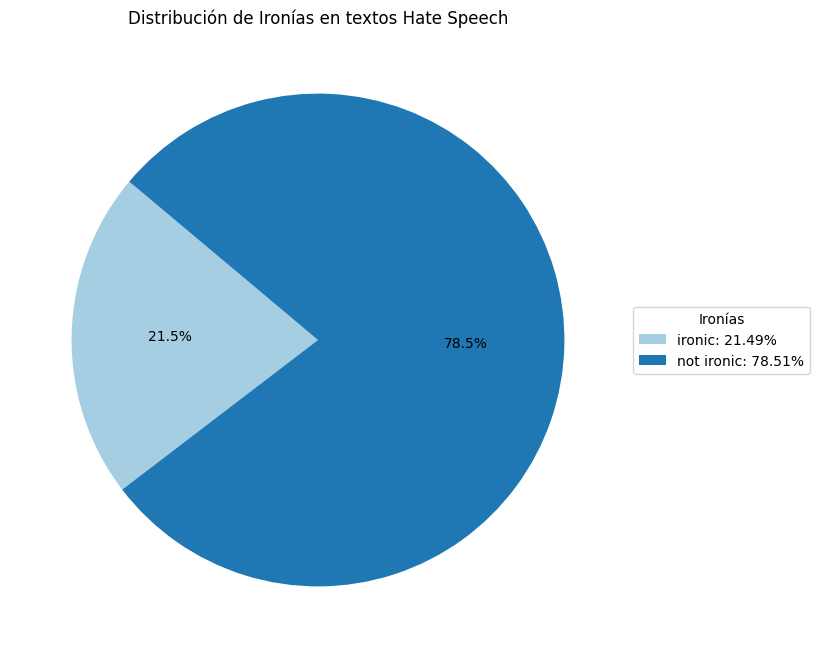

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos Hate Speech")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
print("\nEjemplos de cada tipo de sentimiento en textos hate speech:")
for sent_type, example in examples_per_irony_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos hate speech:
ironic: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", '@ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', 'Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣', '-¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador', 'Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb', '¿para que se inventó el alcohol? para que las feas, gordas y canis perdieran la virginidad.', 'y a los latinos nos dicen sudacas, conquistados, e incivilizados, ¿qué cosas, no? 👀 (no todos) https://t.co/Ew6hpH5wIa', '@vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y


-----------------------------------------------

### Tweets no hate_speech

-----------------------------------------------


In [26]:
text_not_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 0]["text"].tolist()]
results_irony_analysis_not_hate_speech = [analyze_irony(text) for text in tqdm(text_not_hate_speech)]

  1%|          | 18/2617 [00:00<00:31, 82.94it/s]


-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997726082801819, 'ironic': 0.00022736417304258794}

-----------------------
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998127281665802, 'ironic': 0.0018727374263107777}

-----------------------
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9

  1%|          | 27/2617 [00:00<00:31, 83.06it/s]


-----------------------
Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9941064119338989, 'ironic': 0.0058936187997460365}

-----------------------
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la violación y el acoso. Por lo tanto, pierden las víctimas de las mierdas que se dedican a violar y/o acosar.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998154044151306, 'ironic': 0.0001846797822508961}

-----------------------
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia es una zorra... si mal no recuerdo tambien te habias metido con uno CON novia, no hay que hacer lo que no nos gusta que nos hagan🙆🙆🙅
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9921517372131348, 'ironic': 0.007848288863897324}

-----------------------
Texto analizado: Odio los viejos que se creen 

  2%|▏         | 45/2617 [00:00<00:31, 82.28it/s]


-----------------------
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990372657775879, 'ironic': 0.0009627664112485945}

-----------------------
Texto analizado: - El tiempo no existe. La división espacio-temporal es una invención del hombre, por lo tanto,.. - Cállate, hijo(a) de puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9811644554138184, 'ironic': 0.01883554458618164}

-----------------------
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997921586036682, 'ironic': 0.00020789538393728435}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y as

  2%|▏         | 63/2617 [00:00<00:30, 84.27it/s]


-----------------------
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 https://t.co/8SHYnivgXa
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13990618288516998, 'ironic': 0.8600938320159912}

-----------------------
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010608367621898651, 'ironic': 0.989391565322876}

-----------------------
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997989535331726, 'ironic': 0.0002010390453506261}

-----------------------
Texto analizado: @Zabayar Lo peor de todo es que tú eres parte de la culpa de la destrucción de Venezuela hijo de la grandísima PUTA, y encima sigues siendo chavista MALPARIDO. ahora no se vale

  3%|▎         | 81/2617 [00:00<00:30, 83.81it/s]


-----------------------
Texto analizado: Los procesos administrativos tienen que ser rápidos para menores inmigrantes refugiades, ya que el futuro de eses menores está en juego. El día de mañana si quieren trabajar, seguirán sin esos papeles, los hombres terminarán en trabajos irregulares y las mujeres en prostitución.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989032745361328, 'ironic': 0.00109673326369375}

-----------------------
Texto analizado: Mirna, para algunas feministas celebrarle un vestido a una mujer es acoso, ojo ahí #pautab @adnradiochile @mirnaschindler
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997232556343079, 'ironic': 0.00027667812537401915}

-----------------------
Texto analizado: @alejitacoll ... habemos muchos hombres en contra del acoso; eso sí, no todos lo expresamos desde el prejuicio sexista. Su respuesta se ganará aplausos y likes de los bienpensantes 'pero en ciertos pasajes no representa más que el extremo opuesto 

  4%|▍         | 99/2617 [00:01<00:29, 85.39it/s]


-----------------------
Texto analizado: Pedimos picada árabe? 3 palabras, 1 corazón feliz
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.02597389742732048, 'ironic': 0.974026083946228}

-----------------------
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996585845947266, 'ironic': 0.00034141153446398675}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9154342412948608, 'ironic': 0.08456579595804214}

-----------------------
Texto analizado: Cómo me atraen las güeras 🤤
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2321706861257553, 'ironic': 0.7678293585777283}

-----------------------
Texto analizado: @edward18jgm @PunishedLivinx Tu eres el gilipollas que no has tocado un libro de his

  4%|▍         | 117/2617 [00:01<00:29, 83.81it/s]


-----------------------
Texto analizado: @letra_escarlata @Pepe_Tron_B_M @anaisbernal @20m Y estos son los hijos de puta que van a luchar contra la violencia que ejercen contra las mujeres. Es que no me troncho porque NO TIENE NI PUTA GRACIA 😡😡😡
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9784866571426392, 'ironic': 0.021513396874070168}

-----------------------
Texto analizado: @spitfireXxX77 Si yo soy nazi, tu eres un hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979915618896484, 'ironic': 0.002008411567658186}

-----------------------
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico, violación o coacción son un delito… PERO!!! El coqueteo insistente o torpe no lo es, ni es la caballerosidad una agresión machista… Pero la exageración sensacionalista es lo de hoy ¿no?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997028708457947, 'ironic': 0.00029711000388488173}

----

  5%|▌         | 135/2617 [00:01<00:30, 81.49it/s]


-----------------------
Texto analizado: Muchas personas creen q una mujer es abusada o acosada por ir muy descubierta, pero yo he visto acoso a mujeres por lo contrario también, mujeres cuya religión o creencias son otras y son acosadas por eso. Eso demuestra q hay un standard tácito d mujer, y q se espera sea cubierto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998020529747009, 'ironic': 0.0001980112137971446}

-----------------------
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9826784729957581, 'ironic': 0.01732150837779045}

-----------------------
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Ironia detectado: not ironic
Probabilidades: {'not 

  6%|▌         | 153/2617 [00:01<00:30, 81.60it/s]


-----------------------
Texto analizado: Más residentes en Emiratos Árabes aseguran luchar para llegar a fin de mes https://t.co/1eu5NrHz55
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985098242759705, 'ironic': 0.0014901245012879372}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/s4HGvbL6SV Francisco Tárrega - Capricho árabe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7831344604492188, 'ironic': 0.21686553955078125}

-----------------------
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.796241044998169, 'ironic': 0.20375894010066986}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ERES UN COBARDE Y UNA MIERDA DE TIO,Que decepcion...m

  7%|▋         | 171/2617 [00:02<00:29, 81.74it/s]


-----------------------
Texto analizado: Retweeted La Silla Rota (@lasillarota):  "Atendía sexualmente a 30 hombres al día, entre ellos policías y militares" Esta es la #Historia de "La Güera" #Video https://t.co/fvfQhtS0er
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9799370169639587, 'ironic': 0.02006298489868641}

-----------------------
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.985373854637146, 'ironic': 0.014626097865402699}

-----------------------
Texto analizado: Os habéis dado cuenta de que podríais pintarle una polla en la cara a un vampiro dormido y se pasaría meses con ella?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0032649082131683826, 'ironic': 0.9967350363731384}

-----------------------
Texto analizado: Tengo muy claro q el Perú es un país benevolente y apacible. Sabemos q aceptamos y de buena gana ayudar. Sabemos solidarizarnos. También te

  7%|▋         | 189/2617 [00:02<00:29, 82.80it/s]


-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998093247413635, 'ironic': 0.0001907524128910154}

-----------------------
Texto analizado: ¿Cómo? ¿llorándole? ¿intentando hacerle un chantaje emocional? ¡soy tu hermano mayor así que cállate la puta boca y obedece! -ups, se le escapó- https://t.co/hClZKow755
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15076488256454468, 'ironic': 0.8492351174354553}

-----------------------
Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980598092079163, 'ironic': 0.0019401957979425788}

-----------------------
Texto analizado: Las #niñas #niños y #adolescentes pueden ser #refugiados. Las cifr

  8%|▊         | 207/2617 [00:02<00:29, 80.78it/s]


-----------------------
Texto analizado: Vive les pistaches des arabes!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.521314799785614, 'ironic': 0.478685200214386}

-----------------------
Texto analizado: No hay nada peor que la pérdida de la patria. Encarnando el caso de los miles de refugiados sirios en el campamento de Za'atari, las pinturas fueron realizadas con detalle poniendo... https://t.co/VAEwbdCpHe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997165858745575, 'ironic': 0.0028340774588286877}

-----------------------
Texto analizado: ESTA TERRIBLE ARABE DE ECKO AMIGO QUE CHABON CON FLOW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9114469885826111, 'ironic': 0.0885530337691307}

-----------------------
Texto analizado: Hay gente miserable en el mundo Luego está esta señora, que parece que no tiene ningún escrúpulo que buscar  Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 in

  9%|▊         | 225/2617 [00:02<00:29, 80.08it/s]


-----------------------
Texto analizado: @ere_75 @marjorie_aj71 Así como tú eres maricón y puta tapiñada 🤣 tu obsesión solo produce risa.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995378255844116, 'ironic': 0.00046225206460803747}

-----------------------
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990321397781372, 'ironic': 0.0009678726783022285}

-----------------------
Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965677261352539, 'ironic': 0.003432217286899686}

-----------------------
Texto analizado: @gerardotc Y tu eres un racista de mierda que ahora es progre, revie

  9%|▉         | 234/2617 [00:02<00:29, 80.14it/s]


-----------------------
Texto analizado: @JoseCardenas1 En México decimos Pirinola, los gachupines dicen Perinola...!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.012369900941848755, 'ironic': 0.9876300692558289}

-----------------------
Texto analizado: @trafficGUAYANA Atentos inmigrantes https://t.co/uwGO4AgFwB
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8038010597229004, 'ironic': 0.19619889557361603}

-----------------------
Texto analizado: Jugamos de polla, no tenemos arriba a nadie que remate una pinche bola y nos vienen diciendo que es culpa de los árbitros y de que no quiere entrar. Mira yo me cago en vuestros putos muertos desgraciaos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977899789810181, 'ironic': 0.002210038946941495}

-----------------------
Texto analizado: Fuimos a un local de comida árabe. Nos gustó. Echaba de menos probar el falafel 😋
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5867553949356079,

 10%|▉         | 252/2617 [00:03<00:28, 82.28it/s]


-----------------------
Texto analizado: Soñé que era sobrino de Uribe y que sabía dónde estaban todos los papeles que lo inculpaban y buscaba la forma de robármelos sin que me pillara.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.18027818202972412, 'ironic': 0.8197217583656311}

-----------------------
Texto analizado: si ya la cédula de identidad va a dejar de ser el documento de identificación en Venezuela,avisen para declararnos indocumentado en nuestro país. https://t.co/Oi0s4WjarQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9858497977256775, 'ironic': 0.01415011752396822}

-----------------------
Texto analizado: Y yo sin papeles 🤦🤦
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10358638316392899, 'ironic': 0.8964136242866516}

-----------------------
Texto analizado: @dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.


 10%|█         | 270/2617 [00:03<00:28, 83.64it/s]


-----------------------
Texto analizado: @_Dxku_ @goneguru4 Ti o cállate la puta boca y déjala en paz por que sabemos que no nos darás la razón así que dejemos el tema
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990098476409912, 'ironic': 0.0009901267476379871}

-----------------------
Texto analizado: No es lo mismo una violación -que es un crimen- a un acoso a un piropo en la calle que puede incomodar a alguna y hace todo un pedo de eso' Martha Lamas, la antropóloga feminista más famosa de México.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996310472488403, 'ironic': 0.00036892888601869345}

-----------------------
Texto analizado: @lautaroaguirree imbecil hoy te pego una piña te fracturo la nariz
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985985159873962, 'ironic': 0.0014014375628903508}

-----------------------
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran p

 11%|█         | 288/2617 [00:03<00:28, 81.29it/s]


-----------------------
Texto analizado: una chica es guarra si no se lava, si le apetece enseñar las tetas a ver qué problema hay, fachas retrógrados de mierda https://t.co/Yu10kySy7u
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992930889129639, 'ironic': 0.0007069205166772008}

-----------------------
Texto analizado: Zidane eres un hijo de puta. Un hijo de puta. El más hijo de puta de todos. Tú eres el ejemplo cuando hablamos de hijos de puta.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970501661300659, 'ironic': 0.002949801040813327}

-----------------------
Texto analizado: Santos firmó un decreto que permitirá a 400 mil venezolanos indocumentados regularizar su situación en el país https://t.co/8B0FSOKn7M  #INTERNACIONALES
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995872378349304, 'ironic': 0.0004128292202949524}

-----------------------
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy s

 12%|█▏        | 306/2617 [00:03<00:27, 83.82it/s]


-----------------------
Texto analizado: @demoniocaotico Es flipante lo que ha dicho, Es la típica persona que justifica cualquier violación o acoso. Pero lo más triste es que puede que detrás de su pj esté un due mujer.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995982050895691, 'ironic': 0.0004018304462078959}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno feliz Navidad me cago en la puta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08893632143735886, 'ironic': 0.9110636711120605}

-----------------------
Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate que fuera güera
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.049120187759399414, 'ironic': 0.9508797526359558}

-----------------------
Texto analizado: No volverá a responder a la palabra Gabacha. Así que ahí se queda. Con uno tuvo suficiente.
Ironia detectado: not ironic
Probabilidades: {'not ironi

 12%|█▏        | 324/2617 [00:03<00:27, 82.22it/s]


-----------------------
Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2882962226867676, 'ironic': 0.7117038369178772}

-----------------------
Texto analizado: @CamiTala Jajajajaja cállate imbécil, tu perra casi se come a la mía 😥
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7915439009666443, 'ironic': 0.2084561586380005}

-----------------------
Texto analizado: Se pensaron que me iba a quedar callada y les di con todo a los hijos de puta estos, siempre una historia nueva
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973191618919373, 'ironic': 0.002680813428014517}

-----------------------
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.43974071741104126, 'ironic': 0.5602592825889587}

---------------

 13%|█▎        | 342/2617 [00:04<00:27, 83.84it/s]


-----------------------
Texto analizado: ¿Qué dice este de frivolizar el acoso escolar? ¿Por favor queréis dejar de decir semejantes tonterías? https://t.co/ndVjx73SH3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993590712547302, 'ironic': 0.0006409009220078588}

-----------------------
Texto analizado: ¿De qué murió Cenicienta? De que a las doce el tampax se le convirtió en calabaza.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0014852597378194332, 'ironic': 0.998514711856842}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/5bJiR46qGN Cuando tu sobrino regresa del gabacho con gustos bien raros
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8746117949485779, 'ironic': 0.1253882348537445}

-----------------------
Texto analizado: Hijos de puta! periodismo de mierda diciendo que la policia esta sobrepasada, ayer “mucha policía es provocación” porque no se van un poco a la mierda!
Ironia detectado: not ironic
P

 14%|█▍        | 360/2617 [00:04<00:27, 83.27it/s]


-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4473702013492584, 'ironic': 0.552629828453064}

-----------------------
Texto analizado: @skrrrcuest___ @nizar8_cr @XcuestCR @DisjokersHD @david_gutty Ea tío pues deja de insultar y callate la puta boca y por lo menos argumentame como estoy haciendo yo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976909160614014, 'ironic': 0.002309099305421114}

-----------------------
Texto analizado: Last night con mi güera 🤤💕 we looked bomb af @sabrinaxnoemi https://t.co/6992buHAtL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.045762863010168076, 'ironic': 0.954237163066864}

-----------------------
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Ironia detectado: ironic
Probabilidad

 14%|█▍        | 378/2617 [00:04<00:27, 82.27it/s]


-----------------------
Texto analizado: ÚLTIMA HORA| @pablocasado_ culpa a Pedro Sánchez de la #Oladecalor. Dice que si no tiene bastante con acoger migrantes, que también tiene que acoger el calor subsahariano. #FelizMiércoles #1Agosto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6688570976257324, 'ironic': 0.3311428725719452}

-----------------------
Texto analizado: #SNInternacional  Más de 40 muertos y decenas de heridos dejó ataque de la coalición árabe contra Al Hudaida https://t.co/0iBW05Shgg
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989450573921204, 'ironic': 0.0010549189755693078}

-----------------------
Texto analizado: VAMOS FLOR LA PUTA MADRE, TE LO RE MERECES GROSA!!!! @flor_vigna
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9777839779853821, 'ironic': 0.022216016426682472}

-----------------------
Texto analizado: Quieres conocer tu futuro..? Si no te gusta, puedes cambiarlo. DESTINO SUDACA  https://t.co/kjZAPl2k3n

 15%|█▌        | 396/2617 [00:04<00:26, 83.06it/s]


-----------------------
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL PAIS . AHORA TU KCHORRA LE SACAN LOS FUEROS Y VAN EN CANA .
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995899796485901, 'ironic': 0.0004100687219761312}

-----------------------
Texto analizado: @hennexsy Callate la puta boca o te regalo una hostia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976186156272888, 'ironic': 0.0023814020678400993}

-----------------------
Texto analizado: @Hyuberr @PutoMacarron Y ahora la otra Cómele la polla otra vez y callate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9918096661567688, 'ironic': 0.008190388791263103}

-----------------------
Texto analizado: Estoy hasta la polla de no poder dejar que la gente me etiquete en cosas en FB porque tengo familiares mayores imbeciles.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.

 16%|█▌        | 414/2617 [00:05<00:29, 74.21it/s]


-----------------------
Texto analizado: Dijo que mucha mierda hablas, acaba y comemela antes que llegue mi mama.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977129697799683, 'ironic': 0.0022869750391691923}

-----------------------
Texto analizado: Nada más rico que Zacahuilt de la güera y una coca 🤤
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.07134437561035156, 'ironic': 0.9286556839942932}

-----------------------
Texto analizado: @Jaack Mirá que tú no lo sepas apreciar no te da el puto derecho de insultarle ok? Así que cállate la puta boca que él es mucho mejor persona que tú, Imbécil.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993226528167725, 'ironic': 0.0006773452623747289}

-----------------------
Texto analizado: La casa de mi novia es la puta leche, vecinos streamers, casa del porno, lo tiene todo!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.457884281873703, 'ironic': 0.5421157479286194}

--------------------

 16%|█▌        | 422/2617 [00:05<00:32, 68.42it/s]


-----------------------
Texto analizado: ¿Y si "devolvemos" Ceuta y Melilla y así dejan de saltar la valla? https://t.co/IcgvJ1wXxt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7063366174697876, 'ironic': 0.2936633229255676}

-----------------------
Texto analizado: Esto es provocación. Hijo de puta. https://t.co/wkLpJPDiCq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997223019599915, 'ironic': 0.0002776336041279137}

-----------------------
Texto analizado: ............  LES   ARABES      EN  AFRIQUE     ............. . https://t.co/hyZ1VT0510
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21591003239154816, 'ironic': 0.7840899229049683}

-----------------------
Texto analizado: Aprovechando el aniversario vendrán las acusaciones de violacion y acoso. Veamos quien cae. 🤔 https://t.co/Bxf9V5kcMt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9961684346199036, 'ironic': 0.0038315076380968094}

-----------------------
Texto an

 17%|█▋        | 436/2617 [00:05<00:34, 62.41it/s]


-----------------------
Texto analizado: @MarcSuRI @jg_dominguez Calláte tú,fascista catalán de mierda,escoria humana,deshecho de tienta,rata de cloaca....y deja a tu madre en paz, la pobre....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993658661842346, 'ironic': 0.0006341916159726679}

-----------------------
Texto analizado: A cms. de atropellarme  un tipo, es INMIGRANTE, mientras, cruzaba la calle con luz verde. Le indiqué había luz verde, pero me hizo una señal como queriendo decir:"Qué me importa perro!!!" le iba a tomar una foto a la patente del vehículo, pero se fugó. Esta es la mierda, https://t.co/06C98w5Jm6
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989762306213379, 'ironic': 0.0010237566893920302}

-----------------------
Texto analizado: Tendría que ser legal compartir la cara de estos hijos de puta, no encima tener miedo de enseñarla. https://t.co/Gj1bYp0Cwe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994713664054

 17%|█▋        | 450/2617 [00:05<00:34, 62.77it/s]


-----------------------
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chupa braguetas , culé asqueroso , que te gusta chupar culos , asco das ........... ves que fácil es insultar meló
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989749193191528, 'ironic': 0.0010250926716253161}

-----------------------
Texto analizado: Siempre estuve en contra de que las prietas se pintaran güeras, look at me now.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8848578333854675, 'ironic': 0.11514216661453247}

-----------------------
Texto analizado: Los asaltantes del vallado de Ceuta están entrenados «paramilitarmente»  1.200 subsaharianos se encuentran en los alrededores de Melilla para intentar entrar violentamente en España.  https://t.co/Q6MOWwoWK5
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9975225329399109, 'ironic': 0.00247743586078

 18%|█▊        | 464/2617 [00:05<00:34, 62.67it/s]


-----------------------
Texto analizado: Llamar guapa a una chica es micromachismo pero querer azotar a una mujer hasta sangrar o llamar puta a Arrimadas es satira. 👏
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989896416664124, 'ironic': 0.0010103206150233746}

-----------------------
Texto analizado: Después de 2 años logré deshacerme de mis puntas güeras cortándome el cabello 1,000 veces. Y ahora que creen? Pues obvio estoy pelona y me lo quiero volver a pintar, POR QUÉ SOMOS ASÍ LAS MUJERES!!!!! 😩😭
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.27020207047462463, 'ironic': 0.729797899723053}

-----------------------
Texto analizado: Mi cuñado quiso tomar a la par de los otros y bueno aca esta hablado árabe JAJAJAJA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.010354612022638321, 'ironic': 0.9896453619003296}

-----------------------
Texto analizado: Fallecen 12 inmigrantes en Italia tras accidente de camión agrícola https://t.co/VZcCnRDSOu

 18%|█▊        | 478/2617 [00:06<00:33, 64.23it/s]


-----------------------
Texto analizado: Tu mujer es muy linda para verla con un solo ojo' la puta madre jajajajajajajjajaj
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.41879966855049133, 'ironic': 0.5812003016471863}

-----------------------
Texto analizado: .@JRhodesPianist, el inmigrante que Pablo Casado quiere para España. Una historia de @cg_heredia  https://t.co/EyGU9oPa4W
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9935599565505981, 'ironic': 0.0064400057308375835}

-----------------------
Texto analizado: ya van dos veces que me llegan notis de youtube Y NINGÚNA ES DE MI HIJO,¡¿PUEDEN DEJAR DE PROVOCARME UN MINI INFARTO LA RE PUTA MADRE?!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5021155476570129, 'ironic': 0.49788451194763184}

-----------------------
Texto analizado: Lamentables provocaciones' és la concha de tu madre, hijo de puta https://t.co/JQcGDSb9mG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99969089

 19%|█▊        | 485/2617 [00:06<00:33, 63.76it/s]


-----------------------
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974768757820129, 'ironic': 0.0025230676401406527}

-----------------------
Texto analizado: Que si uno es puta, que si uno es lo otro, mij@ cállate la boca y vive y deja vivir al final la qk no es de ninguno de los que habla mierda
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993414282798767, 'ironic': 0.0006586118252016604}

-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.040353916585445404, 'ironic': 0.9596461057662964}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (

 19%|█▉        | 499/2617 [00:06<00:36, 58.32it/s]


-----------------------
Texto analizado: Este chamo es de Caigüire Abajo, del barrio 'Las Pepitonas'. Desde que está triunfando en los Emiratos Árabes no ha dejado de apoyar al talento y a los niños que juegan fútbol en Cumaná.  También hablemos de lo bueno. https://t.co/ZIqP8cmHjf
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9626616835594177, 'ironic': 0.037338316440582275}

-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16111908853054047, 'ironic': 0.8388809561729431}

-----------------------
Texto analizado: @El_Spide Tu eras un hombre de pocas palabras , con un callate hijo de puta me hubiera servido
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9987521171569824, 'ironic': 0.0012478800490498543}

-----------------------
Texto analizado: @DeluxeSabado @gusgonzalves Un imbécil que dice ahora el payaso este la zarigueñ

 20%|█▉        | 512/2617 [00:06<00:36, 58.11it/s]


-----------------------
Texto analizado: Busca NL inversión de Emiratos Árabes https://t.co/zwkuPG69ay
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998417854309082, 'ironic': 0.0015821568667888641}

-----------------------
Texto analizado: @MrKalimotxo @DisorientedDuck @DayoScript Si, pero el acoso y asesinato por resistirse a una violación es mucho más grande en la población femenina que en la masculina. A las mujeres se les mata más por el simple hecho de que aún existen enfermos que sólo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997853636741638, 'ironic': 0.0002146467159036547}

-----------------------
Texto analizado: Nada te pidió tu puta opinión cállate alv. -Yo, cuando me dan una opinión que no pedí.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981480836868286, 'ironic': 0.0018519432051107287}

-----------------------
Texto analizado: Me e marcado un gazpacho (gitano sevillano) que se bebe un vaso un subsahariano se vuelve

 20%|██        | 524/2617 [00:06<00:38, 54.24it/s]


-----------------------
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999208390712738, 'ironic': 0.0007916651666164398}

-----------------------
Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9083015322685242, 'ironic': 0.09169846028089523}

-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5796845555305481, 'ironic': 0.4203155040740967}

-----------------------
Texto analizado: Ains... ya no queda buen machismo como el de antes...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9557351469993591, 'ironic': 0.04426482692360878}

-----------------------
Texto analizado: ¡¡SEMEN!! Movimiento machista internacional. Únete.
Ironia detect

 20%|██        | 530/2617 [00:07<00:40, 51.91it/s]


-----------------------
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3177303373813629, 'ironic': 0.6822696924209595}

-----------------------
Texto analizado: A todos que critican la llegada de inmigrantes y crean que nos quitan trabajo, les dan demasiadas ayudas y demás, que se miren el programa de hoy de AR a partir de las 10. Y que se queden con eso que han dicho: "Vienen a hacer el trabajo que LOS ESPAÑOLES NO QUIEREN.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9666211605072021, 'ironic': 0.03337879851460457}

-----------------------
Texto analizado: Para colmo le soplan puras estupideses... 'shhiii cállate... haste el tonto... nooo won no digas eso... puta q la cagaste...' https://t.co/b7bbk5rGfV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.865831732749939, 'ironic': 0.13416829705238342}

-

 21%|██        | 545/2617 [00:07<00:33, 60.96it/s]


-----------------------
Texto analizado: @joohexnlee // QUE NO TE PEGO UNA PEGATINA EN LA CARA NO MÁS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7085297703742981, 'ironic': 0.2914701998233795}

-----------------------
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9881296157836914, 'ironic': 0.011870329268276691}

-----------------------
Texto analizado: @elultrafunk @adelarosa_espn tu puta madre no te queria ofender.pero te lo mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998364269733429, 'ironic': 0.0016357064014300704}

-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996724128723145, 'ironic': 0.00032761116744950414}

-----------------------
Texto analizado: Los 5

 21%|██▏       | 561/2617 [00:07<00:29, 69.47it/s]


-----------------------
Texto analizado: @hermanntertsch Basta! Poned pie en pared a tanta provocación y cortad la humillación de estos cuatro hijos de perra,
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995798468589783, 'ironic': 0.00042015183134935796}

-----------------------
Texto analizado: La Opinión: ¿Por qué la industria agrícola no defiende a los trabajadores indocumentados que tanto depende?. https://t.co/LQvTszqbzz  a través de @GoogleNews
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998605251312256, 'ironic': 0.00013947891420684755}

-----------------------
Texto analizado: @AlanGarciaPeru DIRAS AHORA Q ES UNA PATRAÑA Q TU ERES UN DIOS Q ERES INCORRUTIBLE CPNCHA DE TU PUTA MADRE LADRON PRESO TU KEIIKO Y PPK https://t.co/MQOqxNqktp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9982172846794128, 'ironic': 0.0017826911062002182}

-----------------------
Texto analizado: Una mujer denuncia acoso, abuso o violación y la mandan

 22%|██▏       | 579/2617 [00:07<00:26, 77.04it/s]


-----------------------
Texto analizado: @HeraldOfNight En tu culo. Es mi polla.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.14949193596839905, 'ironic': 0.8505080938339233}

-----------------------
Texto analizado: Las nuevas 'autoridades' de inmigración se lo dicen claro a @matthewbennett : "Gibraltar no es una puerta de entrada a España… con el tema Brexit, el Reino Unido va a dejar de formar parte de la Unión Europa. La inmensa... https://t.co/p7ofTM0HJN
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995937943458557, 'ironic': 0.00040626528789289296}

-----------------------
Texto analizado: @DjLamYT @MarinaMayrin CALLATE LA PUTA BOCA TIO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989134073257446, 'ironic': 0.0010866527445614338}

-----------------------
Texto analizado: Pues no éramos un país laico?? Me he perdido algo y ahora el Islam no es una religión?? Qué será lo próximo,  quitar las ayudas a la iglesia para dárselas a las me

 23%|██▎       | 597/2617 [00:07<00:24, 81.80it/s]


-----------------------
Texto analizado: FRASES ÁRABES MAS BELLAS DEL MUNDO – Proverbios Árabes  https://t.co/GyS5njiyoo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09074588119983673, 'ironic': 0.9092541933059692}

-----------------------
Texto analizado: Por qué se desea feliz navidad? Es un puta semana de mierda, ya está bien de tonterías.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981314539909363, 'ironic': 0.001868590246886015}

-----------------------
Texto analizado: El sábado en modo árabe como dijo David
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09818136692047119, 'ironic': 0.9018186330795288}

-----------------------
Texto analizado: mi novia es una guarra no se ducha desde el año pasado 😂😂😂👏👏👌👌
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16028746962547302, 'ironic': 0.8397125005722046}

-----------------------
Texto analizado: @Jackvatore Es que sinceramente ni puta gracia me haces, y si me insultas menos, así q

 24%|██▎       | 615/2617 [00:08<00:24, 81.00it/s]


-----------------------
Texto analizado: Pobre niño jesús... porque si le llevan lo que tu eres le va a caer tremendo comunista hijo de puta encima! desde venezuela con cariño... argentino sinvergüenza https://t.co/se8FdeYwKq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99872225522995, 'ironic': 0.0012777403462678194}

-----------------------
Texto analizado: @JLozanoA @IIJONGUI Cállate Pendejo. Pinche zángano vividor del pueblo. Nos jodes con su puta #LeyDeSeguirdadInterior y todavía vienes y nos regañas. No eres más que un hijo de reputisima madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994066953659058, 'ironic': 0.0005932629574090242}

-----------------------
Texto analizado: España tiene presupuesto para enviar patrulleras de la Armada a recoger subsaharianos y magrebíes a las costas de Marruecos, pero ni un duro para poner guardias civiles y material antidisturbios en Ceuta y Melilla. Qué raro, ¿verdad?
Ironia detectado: ironic
Probabilidad

 24%|██▍       | 633/2617 [00:08<00:24, 82.39it/s]


-----------------------
Texto analizado: Su eres nazi mereces que un hijo de puta más hijo de puta que tú te mate. Y así construiremos un futuro alucinante. Me voy con Trump o con Putin. Esto no es para mí. https://t.co/UYxHxqpIuL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980077147483826, 'ironic': 0.0019923069048672915}

-----------------------
Texto analizado: Marlaska ha nombrado jefe de la UCO a quien hasta ahora estaba al frente de los GRS, el grupo de la @guardiacivil que atendía las "avalanchas" de inmigrantes en la valla de Ceuta https://t.co/JIpVHUlU7W vía @voz_populi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990969896316528, 'ironic': 0.0009030147921293974}

-----------------------
Texto analizado: ¿Qué pensáis de este artículo? https://t.co/e9iCoaUVQw
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988366961479187, 'ironic': 0.0011633515823632479}

-----------------------
Texto analizado: “El maestro decía que viniéra

 25%|██▍       | 650/2617 [00:08<00:24, 79.32it/s]


-----------------------
Texto analizado: De repente me siguieron 3 cuentas verificadas arabes, help no quiero morir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7217830419540405, 'ironic': 0.2782169580459595}

-----------------------
Texto analizado: @As_TomasRoncero @elchiringuitotv Cállate la boca gordo hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992547631263733, 'ironic': 0.0007452317513525486}

-----------------------
Texto analizado: Lo de Salou solo es el principio. Ya están saliendo muchos autocares rumbo a Cataluña llenos de subsaharianos, porque dicen que allí Colau lis trata de lujo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23408135771751404, 'ironic': 0.7659186720848083}

-----------------------
Texto analizado: Mientras el presidente okupa sigue de vacaciones cada día llegan a España cientos de inmigrantes ilegales por el efecto llamada provocado por el Gobierno. Ya han llegado más ilegales que en todo 2017. 

 26%|██▌       | 668/2617 [00:08<00:23, 81.42it/s]


-----------------------
Texto analizado: @fabiopFlamengo @Matias10amil @TyCSports Callate vos chupa pija te comiste 7 de alemania cornudo hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998672604560852, 'ironic': 0.0013274350203573704}

-----------------------
Texto analizado: Denuncian abuso sexual en refugio de niños inmigrantes de Arizona | Diario Noticias Web https://t.co/HqA8wgNWPr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992235898971558, 'ironic': 0.0007763492176309228}

-----------------------
Texto analizado: @sr_hater_ Claro, por subir la foto que le dé la puta gana a su Twitter es una guarra. Asocias enseñar carne con ser guarra. Espero que seas de los que lleva jersey de cuello alto en pleno verano.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988399147987366, 'ironic': 0.0011600941652432084}

-----------------------
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cune

 26%|██▌       | 686/2617 [00:09<00:23, 82.48it/s]


-----------------------
Texto analizado: Y hoy sábado también se trabaja! Porque tocó ser linda pero no millonaria 😂😂 😋😋 #cdmx #chistesito #imagentvmx #excelsiortv #trabajandito #venezolana #inmigrante en Distrito Federal, Mexico https://t.co/YcN0syvqr5
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05172961205244064, 'ironic': 0.9482704401016235}

-----------------------
Texto analizado: @JesusLM95 tuitwer es una erramienta q puede llegar a todo el mundo... Si pudiésemos hacerles llegar al mundo árabe esa posibilidad de mostrarnos su cariño por nuestra tierra como tanto dicen... Mediante la ayuda al club del CALIFATO.... PARA ELLOS 5 O 10 MILLONES NO SON NADA...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9970230460166931, 'ironic': 0.0029769467655569315}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Ironia detectado: not ironic
Probabilidades: {'not ironi

 27%|██▋       | 704/2617 [00:09<00:23, 81.45it/s]


-----------------------
Texto analizado: @La_SER @SERCatalunya Callate cara de culo y jodete en la puta cárcel
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995765089988708, 'ironic': 0.00042349437717348337}

-----------------------
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9819371104240417, 'ironic': 0.01806287281215191}

-----------------------
Texto analizado: solo quiero mover el culo con arabe y venirme a dormir
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05733756348490715, 'ironic': 0.9426624774932861}

-----------------------
Texto analizado: Cuando no tienen a ETA, o a Catalunya o los inmigrantes o todos a la vez, la cuestión es hablar de algo, con lo que supuestamente les gusta el dinero ajeno podian hablar alguna vez de 

 28%|██▊       | 722/2617 [00:09<00:24, 78.90it/s]


-----------------------
Texto analizado: El Partido Popular considera contradictorio el anuncio del PSOE de que retirará las concertinas de Ceuta y Melilla porque "las pusieron ellos"  https://t.co/EDk8c8AKgb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997650980949402, 'ironic': 0.00023494043853133917}

-----------------------
Texto analizado: La feminidad busca igualdad, el feminismo sólo el poder' https://t.co/qVgvNGne1H
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981868863105774, 'ironic': 0.0018131049582734704}

-----------------------
Texto analizado: @Jaime_Parejo Has visto a Adán decir 'mi novia es sevillista y es una puta más' en un vídeo colgado por el Betis en su cuenta de Twitter?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9924140572547913, 'ironic': 0.007585905492305756}

-----------------------
Texto analizado: Que vicio, todo el tiempo escuchando arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04853

 28%|██▊       | 739/2617 [00:09<00:23, 79.08it/s]


-----------------------
Texto analizado: Demasiadas manos para mover la batuta al @PSOE https://t.co/neXxzVyTGX @PPopular @pablocasado_ @mdcospedal @AlfonsoRojoPD @periodistadigit @AmorNacional23 @ManhattanManOne @desamparadosb @GeneralArmada @MCarmenRiv74 @CdV_Sevilla @Chemaremax @Claraazulita @jesusropa @generalguzman
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1374427229166031, 'ironic': 0.8625572919845581}

-----------------------
Texto analizado: PIETRAPIERCE STORY: PURS SANGS ARABES STARS DES FESTIVITES A AGAR EL M... https://t.co/G2HgYnflxg
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8862579464912415, 'ironic': 0.11374206095933914}

-----------------------
Texto analizado: @bblackbird_ @vntiat Tu eres más tonto que un bocao en la polla chaval
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974405765533447, 'ironic': 0.002559370594099164}

-----------------------
Texto analizado: Lo de los bolardos obstaculizando las entradas del zo

 29%|██▉       | 756/2617 [00:09<00:23, 80.86it/s]


-----------------------
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998021721839905, 'ironic': 0.00019780399452429265}

-----------------------
Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993091821670532, 'ironic': 0.0006908699870109558}

-----------------------
Texto analizado: Maya Khelladi, directora de la oficina de representación de CaixaBank en Dubái, repasa las oportunidades de la economía de Emiratos Árabes Unidos: https://t.co/yMgwKOccRu
Ironia detectado: not ironic
Probabilidades: {'not ironic'

 29%|██▉       | 765/2617 [00:10<00:23, 80.35it/s]


-----------------------
Texto analizado: Que lindo levantarse un domingo sin resaca, sin problemas ni peleas y como si no fuese suficiente bueno mi papi me espera con comida árabe 🤤🤤🤤🤤
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.021504942327737808, 'ironic': 0.9784950613975525}

-----------------------
Texto analizado: ¡Pedimos a la ONU descolonizar el #SaharaOccidental! Más de 200.000 #saharauis viven desde hace más de 40 años en campamentos de refugiados #ActualidadSaharaui https://t.co/eXvjtYZUvC
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996022582054138, 'ironic': 0.0003977460437454283}

-----------------------
Texto analizado: QUE HIJOS DE PUTA LOCO, SE LO SÚPER MERECÍA FLORENCIA ENVÍA BAILA FLOR AL 13013
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9796580076217651, 'ironic': 0.020341986790299416}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
I

 30%|██▉       | 783/2617 [00:10<00:22, 80.79it/s]


-----------------------
Texto analizado: INMIGRaNTE Pista con Coro"" -LETRA- https://t.co/Hge7nUQ1Nc ZiR: https://t.co/K7qdDFhwz8 a través de @YouTube"
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.42802801728248596, 'ironic': 0.5719719529151917}

-----------------------
Texto analizado: Y dice que reciben a el Aquarius, mira que bien, ya le dieron las gracias a la Guardia Civil que han resultado heridos? ¿por qué no va a echar una mano a las fuerzas de seguridad cuando les están apedreando, quemando, escupiendo en la valla de Ceuta? ¿eso no vende verdad? https://t.co/LRQvhMqa7M
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8099962472915649, 'ironic': 0.19000375270843506}

-----------------------
Texto analizado: Que odio me da mirar pelis con mis hnos, todo me preguntan. MIRALA Y CALLATE LA PUTA MADREEEEEE, ME EXASPERAN!!!!!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9921867847442627, 'ironic': 0.007813235744833946}

------------------

 31%|███       | 801/2617 [00:10<00:22, 79.27it/s]


-----------------------
Texto analizado: Estoy escuchando el tema "arabe" y la verdad que mi culo se mueve solo✋🏼
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.07928026467561722, 'ironic': 0.9207198023796082}

-----------------------
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989919066429138, 'ironic': 0.001008087070658803}

-----------------------
Texto analizado: Que ningún hijo de puta os de menos de lo que os merecéis.'
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979217648506165, 'ironic': 0.0020782642532140017}

-----------------------
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998190999031067, 'ironic': 0.00018089608056470752}

-----------------------
Texto ana

 31%|███▏      | 819/2617 [00:10<00:21, 81.84it/s]


-----------------------
Texto analizado: Y para peor se pelean entre ellas por estar en dos fandoms, ¿qué tiene de malo, ridículas? ¡Déjenlas, es su puta vida para qué decían lo que quieran hacer! #iHeartAwards #BestBoyBand #BTS @bts_twt
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993404746055603, 'ironic': 0.0006595024606212974}

-----------------------
Texto analizado: Yo queria que ganeee Feede y Lauritaaa,se lo reee mereciaan,encima Bailaron Perfectamente biennnn❣️ 😍 LA PUTA MADREEEE💔😢👎🏻
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8573923707008362, 'ironic': 0.14260762929916382}

-----------------------
Texto analizado: Que te pasa mardito? yo soy puta pq quiero ser puta no pq me pasó algo malo... Cállate https://t.co/5569CtRrPG
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9984569549560547, 'ironic': 0.0015430394560098648}

-----------------------
Texto analizado: Hay que hacer las cosas callada la boca la puta madre.
Ironia de

 32%|███▏      | 837/2617 [00:10<00:21, 81.15it/s]


-----------------------
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES DECIR OTRA COSA https://t.co/i0OUFlx0M1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5425726175308228, 'ironic': 0.45742741227149963}

-----------------------
Texto analizado: La caga el y yo me tengo que tragar todo y quedarme callada La cago yo y se cae el mundo y soy una escoria de la vida No es justo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992017149925232, 'ironic': 0.000798315682914108}

-----------------------
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990891218185425, 'ironic': 0.0009108493104577065}

-----------------------
Texto analizado: Tener una discapacidad visual no es impedimento para bailar danza árabe. Paola Román, Indira Pereyra, Iara Viñals integran e

 33%|███▎      | 855/2617 [00:11<00:22, 79.97it/s]


-----------------------
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará con semejante c
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998520612716675, 'ironic': 0.00014797598123550415}

-----------------------
Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990382194519043, 'ironic': 0.0009618597105145454}

-----------------------
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9848100543022156, 'ironic': 0.0151900053024292}

-----------------------
Texto analizado: “Yzur, el mono que habla” es la nu

 33%|███▎      | 873/2617 [00:11<00:21, 80.93it/s]


-----------------------
Texto analizado: #MuyRicoMuyRicoPero pues te gusta cualquier gata pintada de güera. #D0nLuckyLuciano #MaffiaTeam https://t.co/2szpbPqd5M
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.02303718775510788, 'ironic': 0.9769628047943115}

-----------------------
Texto analizado: Hoy he salido de cas como un rey Esto es, se me ha olvidado la cartera en casa y voy indocumentado y sin un duro
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004018079023808241, 'ironic': 0.9959819316864014}

-----------------------
Texto analizado: @fullereno374 @Bcnisnotcat_ Tu eres gallego no? Pues tu a lo tuyo... verdad que yo no me meto en tu puta comunidad? Pues tu no te metad en la mía
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9971509575843811, 'ironic': 0.0028491050470620394}

-----------------------
Texto analizado: @AP4ster Callate ya porfavor,enserio te lo digo hijo de puta wey mal pario
Ironia detectado: not ironic
Probabilidades: {'not

 34%|███▎      | 882/2617 [00:11<00:21, 79.31it/s]


-----------------------
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7411205172538757, 'ironic': 0.25887948274612427}

-----------------------
Texto analizado: Pero ¿que puta mierda de muerte le habéis hecho a Glenn? el se merecía lo mejor y sobretodo una muerte digna ¿qué os pasa en la cabeza?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995126724243164, 'ironic': 0.00048729730769991875}

-----------------------
Texto analizado: Lo que está Ecko en el vídeo de Árabe aaaaaa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6616274118423462, 'ironic': 0.3383725881576538}

-----------------------
Texto analizado: VIERNES EN #Bailahoraocallaparasiempre ARABE NIÑOS DE 18:30 A 19:30 HS Veni a conocernos!  Av. Medrano 311 caba tel: 4958-6492  contacto@bailahora.com // Insta: bailahora_o_calla_para_siempre #Arabe #parachicos #agosto2018 #bailahora #clases #Baila #Danza 

 34%|███▍      | 900/2617 [00:11<00:21, 81.15it/s]


-----------------------
Texto analizado: Árabes y judíos. Judíos y árabes. One love. https://t.co/zpYeceQOJV
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.05411113426089287, 'ironic': 0.945888876914978}

-----------------------
Texto analizado: perdón hicimos la bandera y el logotipo de su equipo en el refugio en el campo de refugiados. esta es la ubicación de la evacuación de los residentes en la ubicación del terremoto en Lombok Indonesia cc. @FCBarcelona @fcbarcelona_id https://t.co/R3brn54hiO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9818869829177856, 'ironic': 0.01811300404369831}

-----------------------
Texto analizado: @gravitysweigh me molesta que diga que las tías no valen una puta mierda por enseñar su cuerpo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996538162231445, 'ironic': 0.0003461302840150893}

-----------------------
Texto analizado: @El_Universal_Mx @EnriqueOchoaR Cállate mejor hijo de tu puta madre cinico si te t

 35%|███▌      | 918/2617 [00:11<00:21, 80.87it/s]


-----------------------
Texto analizado: #MacriConFantino deja hablar fantino una puta vez! callateeeee, hace la pregunta MAS CORTA que las respuestas ! NO INTERRUMPAS ! no te soporto. lo veo porque esta mi presidente nada mas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989991784095764, 'ironic': 0.0010008638491854072}

-----------------------
Texto analizado: @Esteban12297663 Gracias. 🐶 Pues comemela. 😏
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.069947749376297, 'ironic': 0.9300522208213806}

-----------------------
Texto analizado: Soy de esos pinches cursis que cuando la mujer amada no se acaba sus tacos árabes, se sacrifica por amor y los termina por ella.  Ya lo se, no tengo remedio.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0015497436979785562, 'ironic': 0.9984502792358398}

-----------------------
Texto analizado: Gostei de um vídeo @YouTube https://t.co/SHJvXIwFYC VOCALES EN ARABE, AL SOKUN Y EL TANUIN
Ironia detectado: not iro

 36%|███▌      | 936/2617 [00:12<00:21, 78.57it/s]


-----------------------
Texto analizado: Dende Marrocos, o poeta, crítico de cine e activista Mohamed Abid. Acompañaranos neste V Poemagosto 2018 para achegar a beleza da poesía en lingua árabe.  No vídeo, gravado hai uns días no… https://t.co/Kv4gRz5jjs
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9181236028671265, 'ironic': 0.08187641948461533}

-----------------------
Texto analizado: Que te mientan en la cara mientras que ya sabes la verdad es la polla jajajajajajajajaj
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3000953793525696, 'ironic': 0.6999046206474304}

-----------------------
Texto analizado: Estaba tan feliz porque mi mamá había echo empanadas árabes y las amo. Resulta que cuando las como le había puesto CHILE HABANERO que trajo de Mexico. porque es tan cruel el amor ?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16786423325538635, 'ironic': 0.832135796546936}

-----------------------
Texto analizado: Ser inmigrante en la era T

 36%|███▋      | 953/2617 [00:12<00:20, 80.23it/s]


-----------------------
Texto analizado: Hy man10 HOMBRES ÁRABES DESNUDOS Y ERECTOS ¡Te excitarán! https://t.co/kjxNGLNXQF via @gaymasweb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9384715557098389, 'ironic': 0.061528392136096954}

-----------------------
Texto analizado: MEGA ARABE - PILODJ: https://t.co/Gur6ii38DM vía @YouTube
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8930881023406982, 'ironic': 0.10691184550523758}

-----------------------
Texto analizado: Vaaaaamos la puta madre,vamos Argentina!!! No van a poder! Nos enseñaron el camino ,a cuidar lo nuestro! Lo demás no importa! Buen viernes carajo,,,ánimo!!!!!! https://t.co/6iLegPbKYx
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9565653800964355, 'ironic': 0.043434612452983856}

-----------------------
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Ironia detectado: not iron

 37%|███▋      | 971/2617 [00:12<00:20, 79.97it/s]


-----------------------
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9912041425704956, 'ironic': 0.008795922622084618}

-----------------------
Texto analizado: [15/12 14:38] Mili La Zorra: no veo la hora de enseñarte denuevo [15/12 14:38] Mili La Zorra: de los pelos te voy a agarrar Es amor
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.18837328255176544, 'ironic': 0.811626672744751}

-----------------------
Texto analizado: No será porque no lo vengo diciendo, y no yo solamente, válgame Dios, pero ahí vais viendo lo que se nos viene encima. Está todo... https://t.co/nItWBSfLUF
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.27761492133140564, 'ironic': 0.7223851084709167}

-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo AAAAAA

 38%|███▊      | 989/2617 [00:12<00:19, 82.12it/s]


-----------------------
Texto analizado: @justinevonlars Gran puta hay que enseñarles a Cojer también pío?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.146246537566185, 'ironic': 0.8537535071372986}

-----------------------
Texto analizado: @guillen95_J Cállate la puta boca que te voy a reventar a hostias, payaso. (?)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960390329360962, 'ironic': 0.003960907459259033}

-----------------------
Texto analizado: Las voces de las mujeres son mi puta debilidad 😍 ( Obvio que no cualquiera )
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06583495438098907, 'ironic': 0.9341650605201721}

-----------------------
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://t.co/mrJEAFymx1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993289709091187, 'ironic': 0.000671090092509985}

-----------------------
Texto analizado: Insisto,

 38%|███▊      | 1007/2617 [00:13<00:19, 82.20it/s]


-----------------------
Texto analizado: ONLINE EN https://t.co/wkT9BMovtL Thalia peliroja canchonda en busca de una polla bien guarra ...#sexo por #webcam 🚨 https://t.co/YEVmgJXLgD
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3556954264640808, 'ironic': 0.6443045139312744}

-----------------------
Texto analizado: Si nos enseñaran amor propio así como nos enseñan matemáticas el bullying, el acoso, la baja autoestima y la segregación tan evidente no existiría. Todos nos apoyaríamos y jamás nos sabotearíamos. Diario twittero: https://t.co/Jp57RgPhlo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992809891700745, 'ironic': 0.0007190391188487411}

-----------------------
Texto analizado: @ivanmoreirab @rjimenez_perez Iván mejor trabaja pedazo de imbécil deja de paracitar en la politica escoria inutil https://t.co/Xq8wVCcBDc
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999699592590332, 'ironic': 0.000300391431665048}

-----------------------
T

 39%|███▉      | 1024/2617 [00:13<00:20, 78.79it/s]


-----------------------
Texto analizado: @poisonedMar Qué perra tan inteligente, mereces una galletita 🍪
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.012377103790640831, 'ironic': 0.987622857093811}

-----------------------
Texto analizado: Tú los traes por tus santos ovarios y luego pretendes cargárselos a otros. Anda y vete a la m... 🤬 https://t.co/RmyBnjGnJn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994121789932251, 'ironic': 0.0005878922529518604}

-----------------------
Texto analizado: @AlwaysCCamila Se justifica sino tenes pruebas e inventas una violación o acoso. para dejar mal parada a la otra parte, hoy es fácil hacer eso.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997408986091614, 'ironic': 0.0002590369258541614}

-----------------------
Texto analizado: @Maxxx_Powerr @HormingAtomica @SoyDeLimon O en el de las mujeres, con sus historiales de acoso y/o violación a cuestas que se encuentran a una señora con barba y pene e

 40%|███▉      | 1040/2617 [00:13<00:20, 77.96it/s]


-----------------------
Texto analizado: La vecina gritándole a su madre 'guarra guarra guarra guarra que no haces nada guarra, imbécil, imbécil, si te estoy diciendo que te esperes, te esperas, gilipollas ¿me oyes? gilipollas, guarra, guarra' tengo una Dakota de vecina. Enfin
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7361456751823425, 'ironic': 0.2638542950153351}

-----------------------
Texto analizado: El PP ha vuelto: Casado siembra vientos y recoge... Un vicepresidente de la Diputación de Alicante (PP) aboga por "deportaciones masivas" de inmigrantes, a quienes acusa de una "invasión silenciosa" https://t.co/33Gl1eYoy0 vía @eldiariocv
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992376565933228, 'ironic': 0.0007623509736731648}

-----------------------
Texto analizado: La mayoría de la población de Estados Unidos es inmigrante. Si se unieran por sus derechos, la situación podría ser diferente. https://t.co/Oa0XFPZnw8
Ironia detectado: not ir

 40%|████      | 1058/2617 [00:13<00:19, 81.09it/s]


-----------------------
Texto analizado: #En8Años vendió el país a los árabes, le dio la espalda a la paz... sigo? @JuanManSantos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996522665023804, 'ironic': 0.00034767278702929616}

-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7584564089775085, 'ironic': 0.24154359102249146}

-----------------------
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.967839241027832, 'ironic': 0.032160818576812744}

-----------------------
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99968302

 41%|████      | 1067/2617 [00:13<00:19, 78.86it/s]


-----------------------
Texto analizado: Arabe la va a re romper este verano🔥
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.908053457736969, 'ironic': 0.09194648265838623}

-----------------------
Texto analizado: Me encantan las empanadas árabes 😍😍😍😍😍😍😍😍
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09670437127351761, 'ironic': 0.9032955765724182}

-----------------------
Texto analizado: Princesa tu puta madre, trae a mi conejita, no te mereces mis mimos ni mis besos. https://t.co/Qtz6vvTqWo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9432954788208008, 'ironic': 0.05670453980565071}

-----------------------
Texto analizado: @anaisbernal @elperiodico Sin lugar a dudas a ti por analizar de forma tan exquisita realidades que no todos logran ver.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5500935316085815, 'ironic': 0.44990646839141846}

-----------------------
Texto analizado: Jesus le mete ideas en la cabeza a Gabe la pu

 41%|████▏     | 1085/2617 [00:14<00:18, 81.15it/s]


-----------------------
Texto analizado: Qué es lo más turbio que vieron alguna vez por la calle?    Yo a dos árabes vestidos así de blanco e igualitos a Bin Laden cagándose a trompadas en frente al Hospital Fernández, uno de ellos con una cadena en la mano
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.47633469104766846, 'ironic': 0.5236653089523315}

-----------------------
Texto analizado: jajajaja la portada de depor con flores, ramos y carrillo como jeques árabes
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.006048124749213457, 'ironic': 0.9939518570899963}

-----------------------
Texto analizado: No son migrantes, no son sin papeles, no son ilegales: ¡¡SON PERSONAS!! https://t.co/MVSBTNiPl6
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983386993408203, 'ironic': 0.0016613226616755128}

-----------------------
Texto analizado: Juez de EEUU reafirma fallo de que debe reanudarse el DACA https://t.co/4tAA9XlhFD https://t.co/MhGb22ZxwE
Ironia 

 42%|████▏     | 1103/2617 [00:14<00:19, 79.59it/s]


-----------------------
Texto analizado: @DalasReview Uy niño cierra el pico de una puta vez! Ya entendimos que tu eres el bueno de todo y que un poco mas y hasta el gato es malo sabes ¿porque en vez de inventarte una historia que sabes que es mentira porque no dices la verdad? ¿Temes perder seg
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991089701652527, 'ironic': 0.000891053699888289}

-----------------------
Texto analizado: Status : silenciando árabes 🙃
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04132458195090294, 'ironic': 0.9586753845214844}

-----------------------
Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995822310447693, 'ironic': 0.0004177165392320603}

-----------------------
Texto analizado: @DiarioSUR Que los manden a su puta tierra haber si allí son capaces de rechistar,ya está bien de tantas tonterías coño!
Ironia detectado: not ironic
Probabili

 43%|████▎     | 1119/2617 [00:14<00:19, 78.54it/s]


-----------------------
Texto analizado: Si no me devuelven el follow LES VOY A METER EL DEDO PULGAR POR EL AGUJERO DEL CULO PEDAZO DE HIJO DE PUTA MERECES MORIR TARADO ahre, IGUAL SI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9890605211257935, 'ironic': 0.0109395207837224}

-----------------------
Texto analizado: Dia 2  Estos gabachos cómo pueden vivir sin chilitos serrano en casa ? 😢😣: me siento incompleta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5094447135925293, 'ironic': 0.4905552864074707}

-----------------------
Texto analizado: Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0035984290298074484, 'ironic': 0.9964015483856201}

-----------------------
Texto analizado: [29/10 14:01] Kundogan: Yo no estoy hablando contigo cállate

 43%|████▎     | 1136/2617 [00:14<00:18, 78.54it/s]


-----------------------
Texto analizado: Las 'Supernenas' de Tánger: sin velo y con minifalda Tres jóvenes marroquíes luchan contra el acoso sexual https://t.co/oBcJ4foDhE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7589791417121887, 'ironic': 0.2410208284854889}

-----------------------
Texto analizado: Mentiras que se le dicen a una mujer: -Te quiero -Eres la unica en mi vida -Estaba con mis amigos -Sigue chupando que yo te aviso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6039634346961975, 'ironic': 0.3960365355014801}

-----------------------
Texto analizado: VENEZUELA| Solidaridad desde la República Árabe #Siria   El presidente legítimo Bashar Al Asad condenó los hechos.   "Siria confía en la habilidad del gobierno Venezolano para tratar los asuntos internos en el marco de las instituciones y respetando la Constitución" https://t.co/1WE4RDf0lV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996397495269775, 'ironic': 0.0003602454

 44%|████▍     | 1152/2617 [00:14<00:18, 78.53it/s]


-----------------------
Texto analizado: Amo el gabacho 🇺🇸.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2552066445350647, 'ironic': 0.7447933554649353}

-----------------------
Texto analizado: Y despues hablabamos de lo que paso en eeuu...nosotros tambien tenemos nuestro Homeland sudaca.... https://t.co/nWbfQAymDr
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.42270582914352417, 'ironic': 0.577294111251831}

-----------------------
Texto analizado: La Gendarmería fue directo a provocar, son unos hijos de puta. Hay que bajar a este gobierno de mierda
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996063113212585, 'ironic': 0.00039372683386318386}

-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986556768417358, 'ironic': 0.0013442962663248181}

-----------------------
Te

 45%|████▍     | 1170/2617 [00:15<00:17, 81.55it/s]


-----------------------
Texto analizado: @EduAguirre7 @Dios1Soria Cállate subnormal pero de una puta vez deja de llorar, no fue penalti xq Isco estaba en fuera de juego pero Dios como pueden ser tan jilipollas y subnormales estos tíos admitid que se acabó la flor de Zidane cojones hijos de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991853833198547, 'ironic': 0.0008145820465870202}

-----------------------
Texto analizado: El Gobierno negociará con las comunidades el reparto de menores inmigrantes https://t.co/CGmspza2kH vía @elpais_espana
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997517466545105, 'ironic': 0.000248232448939234}

-----------------------
Texto analizado: Tobias cállate la puta boca cuando suene la intro de Ritual, esa guitarra llora para que le escuchen bien.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.49799326062202454, 'ironic': 0.5020067691802979}

-----------------------
Texto analizado: Mira ya me tienes h

 45%|████▌     | 1188/2617 [00:15<00:17, 79.75it/s]


-----------------------
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993641972541809, 'ironic': 0.0006358735845424235}

-----------------------
Texto analizado: @sanchezcastejon Haciendo un hueco en Moncloa para ayudar a inmigración No solo quiere dinero. Luego los suelta por las calles que se busquen la vida. Sus hijas tienen guardaespaldas Pablo tiene vigilancia en el chaletazo. Los demás estámos a lo que venga. https://t.co/4scCJpU4nm
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.978160560131073, 'ironic': 0.021839505061507225}

-----------------------
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes envidia pq somos la polla es eso verdad metapod lo sabia
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7368875741958618, 'ironic': 0.2631123960018158}

-----------------------
Texto analizado: @nick17buero Opaa jajaja comemela entonces ajajaj


 46%|████▌     | 1205/2617 [00:15<00:18, 77.89it/s]


-----------------------
Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978641867637634, 'ironic': 0.002135809510946274}

-----------------------
Texto analizado: Este hijo de puta me despabiló. Callate Iglesias, impresentable
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996196031570435, 'ironic': 0.00038039771607145667}

-----------------------
Texto analizado: @NTN24ve @PedroKonduktaz Cobarde hijo de tu puta y gorda madre, quisiera tenerte a frente para enseñarrte a ser hombre , eres tan cabron y marica como tu novio muerto chavez y tu gordo maduró basura condón usado, tu madre te parió por el culo y tu papa fu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991803765296936, 'ironic': 0.0008196556009352207}

-----------------------
Texto analizado: Siempre seré fan de los taquitos sudados del güero
I

 47%|████▋     | 1222/2617 [00:15<00:17, 78.89it/s]


-----------------------
Texto analizado: @Dqnigamer @SoyPapho hijo de perra no me estes hablando asi tu eres mi puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.990798830986023, 'ironic': 0.009201220236718655}

-----------------------
Texto analizado: Los ilegales no son refugiados, son invasores: No es lo mismo pisar territorio español como inmigrante indocumentado e irregular que hacerlo como refugiado. https://t.co/VzWIRJeI3X
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990432858467102, 'ironic': 0.0009567464585416019}

-----------------------
Texto analizado: EEUU. Una investigación forense realizada con cuerpos de cerdos muertos colocados en el desierto de #Arizona (EE.UU.) hace temer, por la rapidez con que "desaparecen", que las cifras oficiales de muertes de inmigrantes indocumentados sean muy cortas. https://t.co/fvGEodOao6 https://t.co/xHznd4BG6v
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.994218111038208, 'ironic': 0.005

 47%|████▋     | 1239/2617 [00:15<00:17, 80.44it/s]


-----------------------
Texto analizado: @Zurine3 Qué COÑO es eso? ... ... ... No! la camisa de fuerza no!!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.39542657136917114, 'ironic': 0.6045734286308289}

-----------------------
Texto analizado: Cuanto hemos de aguantar y esperar para pedir de forma MAYORITARIA y pacíficamente (como dicen los @catalufos) la DIMISIóN INMEDIATA de @sanchezcastejon ??? https://t.co/hcwUHgFC1y
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978874325752258, 'ironic': 0.002112552523612976}

-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9790540933609009, 'ironic': 0.020945854485034943}

-----------------------
Texto analizado: Interesante dato que muestra, una vez más, la desvergüenza en la manipulación y las ganas de gresca a cual

 48%|████▊     | 1257/2617 [00:16<00:16, 81.01it/s]


-----------------------
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978508949279785, 'ironic': 0.002149116015061736}

-----------------------
Texto analizado: @mili_Brujita Puta madre que desgracia del paiz un terruco probado asesino indultado enseñando en la primera univers del paiz que dicen ahira caraji los rabanos de M
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992201328277588, 'ironic': 0.0007798742735758424}

-----------------------
Texto analizado: Acabo de recordar que anoche soñé con mi futuro jefe, porque el gabacho se despidió.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0015890381764620543, 'ironic': 0.9984109401702881}

-----------------------
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989138841629028, 'ironic': 0.0010861486662179232}

-

 48%|████▊     | 1266/2617 [00:16<00:17, 76.78it/s]


-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999045193195343, 'ironic': 0.0009547717054374516}

-----------------------
Texto analizado: Baby tu eres de verdad ninguno de esta puta son genuina. Son como las louis v feca echa en china
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.09838545322418213, 'ironic': 0.9016145467758179}

-----------------------
Texto analizado: ¿No jugó Estados Unidos o que? A las gabachas no les pueden ganar, me sorprende. https://t.co/Vj80wVtcPi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.918618381023407, 'ironic': 0.0813816636800766}

-----------------------
Texto analizado: VAMOS LA PUTA MARE VAMOS VAMOS SE LO MERECIA VAMOS DIOS COMO SUFRI LPM ENVÍA BAILA FLOR AL 13013
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.961909294

 49%|████▉     | 1282/2617 [00:16<00:17, 75.88it/s]


-----------------------
Texto analizado: El guapísimo arabe quiere que le enseñe español 😏 HAHA
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.002245070645585656, 'ironic': 0.9977549910545349}

-----------------------
Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9577322006225586, 'ironic': 0.04226772487163544}

-----------------------
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9662337899208069, 'ironic': 0.03376619145274162}

-----------------------
Texto analizado: @NorenebergNacho la puta, cállate nomas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9859593510627747, 'ironic': 0.014040689915418625}

-----------------------
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en el empate 0-0 Árabe Unido ante Costa del Este FC htt

 50%|████▉     | 1300/2617 [00:16<00:16, 79.55it/s]


-----------------------
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1334277093410492, 'ironic': 0.8665723204612732}

-----------------------
Texto analizado: @SolGarcete1 Tanto que quería la puta cita doble y vos yendo a cualquier lado. Te odio callate.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9978494644165039, 'ironic': 0.0021506042685359716}

-----------------------
Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999576985836029, 'ironic': 0.0004230535705573857}

-----------------------
Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cállate puta y digo tu padre desgraciado. Lo que no me pase a mi..😆
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8946378827095032, 'ironic': 0.105362

 50%|█████     | 1317/2617 [00:16<00:16, 79.94it/s]


-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996507167816162, 'ironic': 0.00034931953996419907}

-----------------------
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7763283848762512, 'ironic': 0.22367161512374878}

-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.997183084487915, 'ironic': 0.0028169439174234867}

-----------------------
Texto analizado: Carta abierta de un cura a Pablo Casado sobre los inmigrantes https://t.co/9RvM6QRIz3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993159770965576, 'ironic': 0.0

 51%|█████     | 1335/2617 [00:17<00:15, 83.19it/s]


-----------------------
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.031203027814626694, 'ironic': 0.9687970280647278}

-----------------------
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9728404879570007, 'ironic': 0.027159543707966805}

-----------------------
Texto analizado: Ahora resulta que la mujer es una bruja que lo trataba fatal y la otra es una guarra, feminismo marca Patiño and Cia.... #masqueamigus
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9827028512954712, 'ironic': 0.017297111451625824}

-----------------------
Texto analizado: @raykrai tú eres ninini: ni estudias, ni trabajas, ni haces puta gracia
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1348354071378708, 'ironic': 0.865164577960968}


 51%|█████▏    | 1344/2617 [00:17<00:18, 67.33it/s]


-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993199110031128, 'ironic': 0.0006801215349696577}

-----------------------
Texto analizado: La moda de los negratas ponen un nombre falso con una mujer blanca, y luego sua fotos de ellos. A quien quieren engañar. https://t.co/NpG3lq1yrA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999622106552124, 'ironic': 0.0003779020917136222}

-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989022016525269, 'ironic': 0.0010977433994412422}

-----------------------
Texto analizado: @AlfredoJalifeR_  saludos master, Emiratos Árabes Unidos se dispone a reabrir su embajada en Damasco https://t.co/jzEfz6PSx8
Iro

 52%|█████▏    | 1359/2617 [00:17<00:20, 62.23it/s]


-----------------------
Texto analizado: @RHCarrilloDeA Callate la puta boca que hemos jugado bien saes https://t.co/njRfRuKFxi
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9867078065872192, 'ironic': 0.013292212039232254}

-----------------------
Texto analizado: El mejor Rallo: el que se mete en jardines con sus lectores habituales. "Por qué Pablo Casado se equivoca con la inmigración". https://t.co/sKMvCRqCA9
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.004536269698292017, 'ironic': 0.9954637885093689}

-----------------------
Texto analizado: Esta es la razón por la cual dice @HoustonTX @SouthwestKey no puede abrir pronto centro de detención para nińos indocumentados en #Houston aún cuando @FireChiefofHFD dice que compańía ya tiene un permiso pero para operar un hotel o refugio más @TelemundoHou 5pm https://t.co/hbtAB0Mn6S
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996033310890198, 'ironic': 0.00039674388244748116}

---------------

 52%|█████▏    | 1373/2617 [00:17<00:21, 58.54it/s]


-----------------------
Texto analizado: Eagle Pass, Tx. Arrestan 48 indocumentados que estaban escondidos en  una casa de seguridad ubicada en el sector Las Quintas Fronterizas.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998794674873352, 'ironic': 0.0012053354876115918}

-----------------------
Texto analizado: @siraallwhite @Barbijaputa Qué? Mujeres con los mismos derechos? Igualdad? Joder sois puta escoria, ni radicales ni nada, sois el anticristo!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980450868606567, 'ironic': 0.00195488054305315}

-----------------------
Texto analizado: La falacia de la porción de trabajo: a algunos les gusta para las pensiones; a otros, para la inmigración. "La riqueza se crea, no se reparte", por @Manuj_Hidalgo https://t.co/aeeoNTC7Co
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9913907051086426, 'ironic': 0.008609228767454624}

-----------------------
Texto analizado: Güero de mi vida ♡ https://t.

 53%|█████▎    | 1387/2617 [00:18<00:20, 60.92it/s]


-----------------------
Texto analizado: Gracias al #MasterCasado hoy no hablaremos de #inmigracion ilegal ni de traiciones #independentistas ni de #terroristas que celebran su puesta en libertad 1000 años antes de tiempo. Me voy a comer. Avísenme si hay algo interesante
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.04095511883497238, 'ironic': 0.959044873714447}

-----------------------
Texto analizado: @ZonAzulSatelite Disfruta tu evento!! Nosotros te lo organizamos, banquetes, menú a tiempos, flautas, taquizas, tacos árabes, pastas, bar de ensalada, waffles bar, etc, con gusto te atendemos 5554383714 https://t.co/v6jZMMWEe1
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9797429442405701, 'ironic': 0.02025710418820381}

-----------------------
Texto analizado: El PP exige al Gobierno "una solución urgente para una inmigración legal, ordenada y sin demagogias" - https://t.co/K8RDqWbeoq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997670054

 53%|█████▎    | 1394/2617 [00:18<00:19, 61.20it/s]


-----------------------
Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23940704762935638, 'ironic': 0.7605929970741272}

-----------------------
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994521737098694, 'ironic': 0.0005478784441947937}

-----------------------
Texto analizado: Las necesarias y temporales subidas de impuestos del Gabinete Rajoy acabarán con las manipulaciones de los inmigrantes   #generandoconfianza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9548447132110596, 'ironic': 0.045155253261327744}

-----------------------
Texto analizado: Tu cierra la puta boca, que con las manos manchadas de sangre no se habla o no te lo enseñaron tu padres? https://t.co/dCHef9mmQ6
Ironia detectado: not ironic
Probabilidades: {'not ironic':

 54%|█████▍    | 1408/2617 [00:18<00:20, 59.67it/s]


-----------------------
Texto analizado: ayer fui a un 18 de disfraces y el que mas guita tiene del grupo se disfrazo de jeque arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.16138111054897308, 'ironic': 0.8386188745498657}

-----------------------
Texto analizado: ¿Pueden inmigrantes y refugiados remediar la despoblación española? https://t.co/K08jbSfiqP #curiosidad
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990612864494324, 'ironic': 0.000938714190851897}

-----------------------
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, tus gemidos en mi boca https://t.co/nbXmKAT2Pd
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.061798036098480225, 'ironic': 0.9382019639015198}

-----------------------
Texto analizado: @todonoticias Callate hijo de puta mentiroso son pelotudo que seguis mintiendo ladron andate de la Argentin

 54%|█████▍    | 1422/2617 [00:18<00:19, 61.60it/s]


-----------------------
Texto analizado: @cinta16_ C I N T A QUE TE CALLES LA PUTA BOCA SI NO ME VAS A ENSEÑAR NADA QUE LO PASO MUY MAL JODER
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976207613945007, 'ironic': 0.0023792237043380737}

-----------------------
Texto analizado: @AnunciosMx Disfruta tu evento!!Nosotros te lo organizamos, banquetes, taquizas, menú a tiempos, tacos árabes, pastas, bar de ensaladas, waffles bar, etc con gusto te atendemos 5554383714 https://t.co/VxIP6GFnnr
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9795563220977783, 'ironic': 0.0204436257481575}

-----------------------
Texto analizado: Primas de 2.000 euros para los indocumentados que se marchen de Francia https://t.co/NJ7OmJftJF vía @elmundoes
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996920824050903, 'ironic': 0.00030793590121902525}

-----------------------
Texto analizado: NINGÚN LIDER ÁRABE PUEDE CONCEDER JERUSALÉN.  Según los informes, el re

 55%|█████▍    | 1436/2617 [00:18<00:20, 58.16it/s]


-----------------------
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996157884597778, 'ironic': 0.0003841450088657439}

-----------------------
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989846348762512, 'ironic': 0.0010153488256037235}

-----------------------
Texto analizado: Toma hijo de re mil puta,te mereces eso y una buena cagada a palo solo,son unos pedazo de mierda @yaoecabrera https://t.co/kGASzZl5Tq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996206760406494, 'ironic': 0.0003792976203840226}

-----------------------
Texto anali

 55%|█████▌    | 1442/2617 [00:19<00:21, 55.47it/s]


-----------------------
Texto analizado: @A3Noticias Jamas Ramos no t compares con ese Friky, ese hijo de puta separa y daña un pais, tu eres un crack
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9960578680038452, 'ironic': 0.003942104056477547}

-----------------------
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996505975723267, 'ironic': 0.00034943310311064124}

-----------------------
Texto analizado: Creo q el Smirnoff y Arabe de @_eckoyg con @papichampok UNA COMBINACION DEL DIABLOOO
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.10095614939928055, 'ironic': 0.8990438580513}

-----------------------
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https:

 56%|█████▌    | 1454/2617 [00:19<00:22, 51.96it/s]


-----------------------
Texto analizado: Casado y Rivera contra la inmigración ilegal. Sánchez e Iglesias a favor de la invasión masiva y violenta de subsaharianos.A quién preferirán los españoles?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9891937375068665, 'ironic': 0.010806238278746605}

-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985345602035522, 'ironic': 0.0014654407277703285}

-----------------------
Texto analizado: Si dedicáramos tanto "entusiasmo" en deshaucios, refugiados, presos políticos, subida de luz, contratos basura, etc... en lugar de dedicarlo a Pablo Casado, creo que nos iría un poquito mejor.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3189612030982971, 'ironic': 0.6810387969017029}

-----------------------
Texto analizado: Joder nena, como me

 56%|█████▌    | 1465/2617 [00:19<00:23, 48.58it/s]


-----------------------
Texto analizado: Alguien sabe como quitar de i calendario los meses árabes y regresarlo a gregoriano/México plox según yo estamos en 19Dhul-Qhui dah
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.21294787526130676, 'ironic': 0.7870521545410156}

-----------------------
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.26589569449424744, 'ironic': 0.734104335308075}

-----------------------
Texto analizado: @EPN @revistaQP @sebastianpinera callate mexicano hijo de perra,
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990370273590088, 'ironic': 0.0009630182757973671}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999631404876709, 'ironic': 0.0003685841802507639}

-----------------------
Texto analizado: Ver las series en ingles subtitul

 57%|█████▋    | 1480/2617 [00:19<00:19, 59.08it/s]


-----------------------
Texto analizado: Les arabes ❤️😭 https://t.co/YVoUG1SXHU
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6038108468055725, 'ironic': 0.3961891531944275}

-----------------------
Texto analizado: Que temazo arabe dios mio
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8577457666397095, 'ironic': 0.14225418865680695}

-----------------------
Texto analizado: Mi mama encontró fotos mías de cuando bailaba árabe.. Ojala mis hijos nunca las vean 😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2450329065322876, 'ironic': 0.7549670338630676}

-----------------------
Texto analizado: bueno, qué necesidad hay de quitarse la puta camiseta para enseñar abs pREGUNTO https://t.co/KBgI5YLhpB
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9948391318321228, 'ironic': 0.005160891450941563}

-----------------------
Texto analizado: La doble cara y la doble vida de los de ‘muchos golpes de pecho’ El último ejemplo Pablo Casado

 57%|█████▋    | 1497/2617 [00:19<00:15, 70.15it/s]


-----------------------
Texto analizado: @tonialba @elperiodico Es igual a qué Inés te refieras, el problema es que llames puta a una mujer. TÚ eres muy desagradable.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999703586101532, 'ironic': 0.0002964388986583799}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más...” Palabras del portero del Betis, Adán Cosas como estas, donde se ataca la imagen de la mujer sin más, es las que deberíamos condenar y corregir #Verguenza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997630715370178, 'ironic': 0.00023688061628490686}

-----------------------
Texto analizado: Claro que sí: 'El feminismo ideológico es un paso en el proceso de deconstrucción de la persona' http://t.co/lKwmK9MtuQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997095465660095, 'ironic': 0.0002904609136749059}

-----------------------
Texto analizado: Joder nena me mata como te mueves, agarrar tu c

 58%|█████▊    | 1514/2617 [00:20<00:14, 75.40it/s]


-----------------------
Texto analizado: SEMANA DE LA JUVENTUD. TORNEO FUTBOL7  / FUTBOL 5 CATEGORIA CADETE EQUIPOS INSCRITOS: LOS YOGURINES LA ELITE RAYO DONBENITENSE LOS NEGRATAS FUENLABRADA MINATO DE KIEV LOS JOSEWIFAKERS VOOLKA... https://t.co/JQ3DiaXtbb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8880588412284851, 'ironic': 0.11194122582674026}

-----------------------
Texto analizado: Libérate del odio, aunque muchos lo merezcan, si te lo guardas el que se llenará de Escoria eres tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996652603149414, 'ironic': 0.0003347499296069145}

-----------------------
Texto analizado: Ana Rosa: -que es eso de karma?  -Eso es Carmen en catalan -ves como los catalufos tienen la culpa de todo!!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.000612617121078074, 'ironic': 0.9993873834609985}

-----------------------
Texto analizado: Pegame en la cara que yo te pego en el ego
Ironia detectado: not ironic

 58%|█████▊    | 1530/2617 [00:20<00:14, 75.14it/s]


-----------------------
Texto analizado: 1- no se pintan para crear un efecto en ti 2- por merecer os mereceis una puta mierda https://t.co/88AN9WNs1i
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993330836296082, 'ironic': 0.000666834122966975}

-----------------------
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten, y no vengo a trabajar en estos días no tan bonitos.🌚😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0007074528839439154, 'ironic': 0.9992924928665161}

-----------------------
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3958001136779785, 'ironic': 0.6041999459266663}

-----------------------
Texto analizado: @rouco64 @BauviJc @okdiario Esta lo hace para dar en la cara que sale con las sullas ....toda la escoria le viene bien
Ironia de

 59%|█████▉    | 1547/2617 [00:20<00:14, 75.58it/s]


-----------------------
Texto analizado: el tema Arabe me hace mover el orto solo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7107231020927429, 'ironic': 0.28927692770957947}

-----------------------
Texto analizado: No me gusta Árabe pero se me pegó.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8428041934967041, 'ironic': 0.1571958214044571}

-----------------------
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul y despues callate hijo puta
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3605598211288452, 'ironic': 0.63944011926651}

-----------------------
Texto analizado: Me conocen porque siempre estoy en modo arabe
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.005956501699984074, 'ironic': 0.9940435290336609}

-----------------------
Texto analizado: la cagada a palos se la merecía' en q cabeza cabe hija de re mil puta https://t.co/ToUeBLCbTc
Ironia detectado: not iron

 60%|█████▉    | 1564/2617 [00:20<00:13, 77.87it/s]


-----------------------
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5525600910186768, 'ironic': 0.44743990898132324}

-----------------------
Texto analizado: Tu no eres mala persona TU ERES ESCORIA @angeeles013
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996621608734131, 'ironic': 0.0003378491092007607}

-----------------------
Texto analizado: No le digan a sus hijos que 'puta' es una 'mala palabra', deberían enseñarle que NO es un insulto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99226975440979, 'ironic': 0.0077302586287260056}

-----------------------
Texto analizado: Cuántos inmigrantes creemos que hay, y cuántos hay en realidad. Ciudadanos de un lugar llamado mundo... https://t.co/ngyCsVJjBp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965779185295105, 'ironic': 0.003422041889280081}

-----------------------


 60%|██████    | 1581/2617 [00:21<00:13, 79.22it/s]


-----------------------
Texto analizado: @SoyPutoImbecil me he leido el mismo numero de enciclopedias que lo que te mide la polla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00535181351006031, 'ironic': 0.9946481585502625}

-----------------------
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993645548820496, 'ironic': 0.000635400996543467}

-----------------------
Texto analizado: Pedro Sánchez cede y autoriza a Open Arms a desembarcar 87 inmigrantes ilegales - Rambla Libre.  "Que importancia tienen estas admisiones cuando por las costas de Cádiz, en apoyo de las mafias, estamos admitiendo a miles cada semana" dice Pedro Sánchez.   https://t.co/nCLSWwwKaO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990355968475342, 'ironic': 0.0009644337114877999}

-----------------------
Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, 

 61%|██████    | 1598/2617 [00:21<00:12, 80.21it/s]


-----------------------
Texto analizado: El día ese que hablan de ataques violentos en la valla de Melilla, casualmente, casualmente, no había ONGs, ni otros testigos, casualmente...Oiga. y se da por buena la versión de la G.Civil, que conviene hacer... https://t.co/GQ8CobwiQA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9922780990600586, 'ironic': 0.007721938658505678}

-----------------------
Texto analizado: LA NUEVA ODISEA Una travesía a través del infierno para dejar atrás el fanatismo y la guerra.  La historia de los refugiados contada de manera brillante por Patrick Kingsley, corresponsal de migración de The Guardian. #refugiados #migración  https://t.co/JUglhRZi2d https://t.co/gkL5nQv4ex
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8804528713226318, 'ironic': 0.11954708397388458}

-----------------------
Texto analizado: Rescatan a 61 indocumentados #Video https://t.co/FuduLWiOgO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99

 61%|██████▏   | 1607/2617 [00:21<00:12, 78.63it/s]


-----------------------
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es una mierda #OtDirecto12D
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9986804127693176, 'ironic': 0.0013196259969845414}

-----------------------
Texto analizado: No voy a llorar y decir que no merezco esto porque es probable que lo merezcaPOR ZORRA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9746922850608826, 'ironic': 0.025307754054665565}

-----------------------
Texto analizado: @Barbijaputa Por suerte sigue siendo lo suficientemente imbécil para decir 'cuando vamos a dejar de vernos como rivales' para que la gente no piense que ha aprendido al respecto.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9514418840408325, 'ironic': 0.04855808615684509}

-----------------------
Texto analizado: Puse arabe en la previa. Cami me dijo, SÁCAME ESTO YA QUE HORRIBLE, pero en el baile le dio ha

 62%|██████▏   | 1623/2617 [00:21<00:13, 75.29it/s]


-----------------------
Texto analizado: Cenando con Cons y Merceditas (@ Taquería "Los Güeros" in Cuautitlán Izcalli, Me) https://t.co/NvupTmmgFW
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0985238179564476, 'ironic': 0.9014761447906494}

-----------------------
Texto analizado: Si me callo soy imbécil, si digo lo que pienso, soy una zorra. Ya me diréis que coño hago?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08443394303321838, 'ironic': 0.915566086769104}

-----------------------
Texto analizado: @5ANTYXD @JoaquinPutoAmo Según los medios dicen que te calles la puta boca
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9944303631782532, 'ironic': 0.005569602828472853}

-----------------------
Texto analizado: Dicen 'busca una mujer que sepa cocinar, que al sexo tú la puedes enseñar', qué opinas??? — Que yo cocino de puta madre así que enseñadme a follar porfa https://t.co/L180pf8i14
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0

 63%|██████▎   | 1640/2617 [00:21<00:12, 77.62it/s]


-----------------------
Texto analizado: @Emol No apruebo hechos como la violación o el acoso sexual, pero el riesgo de este tipo de campañas es que se pasa de hacer conciencia frente a un hecho determinado a un fanatismo extremo, en la que pagan 'justos por pecadores'.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998553991317749, 'ironic': 0.00014463879051618278}

-----------------------
Texto analizado: Tengo sueño. VECINO CALLATE LA PUTA BOCA O AL MENOS VOCALIZA PARA QUE ME ENTERE DE TU PELICULA MENTAL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9764662981033325, 'ironic': 0.023533688858151436}

-----------------------
Texto analizado: Algún espíritu así, hábita ya en #Morena, pero seguirá la inmigración de ese "casual" Priísmo. https://t.co/zVtoF2Oy61
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9963891506195068, 'ironic': 0.003610902465879917}

-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!

 63%|██████▎   | 1657/2617 [00:22<00:12, 78.71it/s]


-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK. Porque no te vas mucho A chingar a t uu puta madre perroo mereces morir
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9974421262741089, 'ironic': 0.002557898173108697}

-----------------------
Texto analizado: @Guitar_Sonic @tudicesmiau @SrGuillester211 Mira chaval eres un puto gilipollas callate ya de una puta vez
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991393089294434, 'ironic': 0.0008606775081716478}

-----------------------
Texto analizado: Sólo escuchar hablar a este tipo ME ENCABRONA LA VIDA, PUTA CÁLLATE! :)
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977756142616272, 'ironic': 0.002224409021437168}

-----------------------
Texto analizado: @AlejoParSw Que rica esta yo si quisiera comemela
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8245055675506592, 'ironic': 0.17549440264701843}

-----------------------
Texto analizado: La frase de 

 64%|██████▍   | 1673/2617 [00:22<00:12, 78.31it/s]


-----------------------
Texto analizado: En #MachuPichu chocan trenes  https://t.co/RP4f1DMtNS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977953433990479, 'ironic': 0.002204681746661663}

-----------------------
Texto analizado: Quiero seguir viendo a 🌟@_veronicamontes 🌟 en #MQB 💃
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4138590395450592, 'ironic': 0.5861409902572632}

-----------------------
Texto analizado: @julianpineiro Callate, decís eso porque tu perra no llora porque ESTÁ CASI SORDA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9902132153511047, 'ironic': 0.009786778129637241}

-----------------------
Texto analizado: https://t.co/LB1XnQn8F5 Esto NO es un “campo de refugiados”, porque sus inquilinos no huyen de ninguna persecución. Son sencillamente INMIGRANTES ILEGALES, muchos de ellos perfectamente documentados como el tal Yves. Muchas gracias, Pedro Sánchez; otro logro histórico a tu cargo.
Ironia detectado: ironic
Probabi

 65%|██████▍   | 1689/2617 [00:22<00:12, 75.98it/s]


-----------------------
Texto analizado: Toy por irme a rendir y veo esto, qué lindo. Te lo mereces forro hijo de re mil puta https://t.co/hr0cokCAiI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.56251060962677, 'ironic': 0.4374893605709076}

-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991809725761414, 'ironic': 0.000818964617792517}

-----------------------
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997814297676086, 'ironic': 0.00021858753461856395}

----------

 65%|██████▌   | 1706/2617 [00:22<00:11, 76.69it/s]


-----------------------
Texto analizado: @manuelburque Ojalá encontrarmelo por la calle y darle un puñetazo en la cara con mi puño de maricón. Que asco de escoria.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994778037071228, 'ironic': 0.0005222534528002143}

-----------------------
Texto analizado: Razones para quedarse en Puebla:    1. Tacos árabes   2. Cemitas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.015165072865784168, 'ironic': 0.9848349094390869}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9981656670570374, 'ironic': 0.001834411988966167}

-----------------------
Texto analizado: @OneforAllDeku_ @xkingxexplosion ¡Tú no me das ordenes imbécil voy a destruirle la polla a ese maldito subnormal y voy hacer las cosas a mi maldita manera! ¡Apártate parásito!
Ironia detectado: not ironic
Probabilidades: {'not ir

 66%|██████▌   | 1724/2617 [00:22<00:11, 79.48it/s]


-----------------------
Texto analizado: @angela15rubio Callate y sacate la puta eso
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9989960789680481, 'ironic': 0.0010038675973191857}

-----------------------
Texto analizado: Redomicilie su sociedad offshore en Emiratos Árabes Unidos. https://t.co/gJYLHarqZA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977455735206604, 'ironic': 0.002254445804283023}

-----------------------
Texto analizado: Escucharon arabe? quiero arrancar la gira ya y terminarla el en navidad
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009890589863061905, 'ironic': 0.9901094436645508}

-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.649821400642395, 'ironic': 0.35017865896224976}

-----------------------
Texto analizado: Como odio la gente impuntual la puta madreeee y

 67%|██████▋   | 1741/2617 [00:23<00:10, 80.57it/s]


-----------------------
Texto analizado: Fracasó Donald Trump en la reunificación de niños migrantes indocumentados https://t.co/LRtJpS6dOH https://t.co/uOnEmXQLD3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994723200798035, 'ironic': 0.0005277356831356883}

-----------------------
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977418184280396, 'ironic': 0.002258237451314926}

-----------------------
Texto analizado: 🇨🇱Chile 🇨🇱 Estamos muy felices de anunciar que estaremos en su hermoso país este 5 de octubre con nuestra güera @OficialYuri #JuntitasTour #Chile https://t.co/gTthuEbzcZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.84159916639328, 'ironic': 0.1584007740020752}

-----------------------
Texto analizado: @305Paulamf @MorphineGH @AlvaroVazquez91 Hombre supongo que no todos!! Pero si muy guarra se inventan insultos, graban vídeos y recortan, insultan al herm

 67%|██████▋   | 1759/2617 [00:23<00:10, 81.38it/s]


-----------------------
Texto analizado: ¿Sabías que en Japón ya no es innovador desde hace años y que tiene 2% de inmigrantes?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9973589777946472, 'ironic': 0.0026410173159092665}

-----------------------
Texto analizado: #01Ago  Cuando el carnet de la patria sea el único documento para todo, empezarán a restringir cédulas tal como el pasaporte. A dónde escapar indocumentado?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6420947909355164, 'ironic': 0.35790523886680603}

-----------------------
Texto analizado: Somos yo y mi güero 😘 https://t.co/pXM1lN9xiK
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008099271915853024, 'ironic': 0.9919008016586304}

-----------------------
Texto analizado: hay algunos 'popular opinion' que me dan ganas de darle quote y decirle mínimo QUE TÚ HACES HIJUE PUTA CALLATEEE pero como es la opinión de los demás puess... 🤷🏽‍♂️
Ironia detectado: not ironic
Probabilidades: 

 68%|██████▊   | 1777/2617 [00:23<00:10, 80.81it/s]


-----------------------
Texto analizado: @TowandaRebels #arandina #pozoblando 2 nuevos casos de abuso sexual. Va a ser que estamos rodeadas de #manadas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.757082462310791, 'ironic': 0.2429175078868866}

-----------------------
Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5827344655990601, 'ironic': 0.41726553440093994}

-----------------------
Texto analizado: @CamiOlaviaga Cállate ojalá, encima lo que me había gustado me quedaba grande puta vida
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9696772694587708, 'ironic': 0.03032270073890686}

-----------------------
Texto analizado: Si me arranco la cabeza, por amor a esa bellezaaaa
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4845788776874542, 'ironic': 0.5154210925102234}

-----------------------
Texto analizado: Hay sitio para todos en todas partes. T

 68%|██████▊   | 1786/2617 [00:23<00:10, 78.34it/s]


-----------------------
Texto analizado: #Felizsábado La realidad contra la mala leche.  🤔🤔🤔🤔🤔🤔 https://t.co/keYpOql4ge
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9658735394477844, 'ironic': 0.03412647545337677}

-----------------------
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9908989667892456, 'ironic': 0.009101033210754395}

-----------------------
Texto analizado: El #RENAPER detectó cerca de mil personas sin #DNI en distintos operativos en la provincia. #Indocumentados #Formosa https://t.co/a62fmSnCC2 https://t.co/DpGGLjEXdL
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.989664614200592, 'ironic': 0.010335447266697884}

-----------------------
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997705817222595, 'ironic': 0.00022938703477848

 69%|██████▉   | 1804/2617 [00:23<00:10, 80.02it/s]


-----------------------
Texto analizado: En 2017 Jonas Gutierrez jugó para DYJ la Sudaca, y no pudo hacerlo para CAI en la misma edición. Requena ni debió ser incluido en la lista, asi que vayan a Paraguay ya mismo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992355108261108, 'ironic': 0.0007644817815162241}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9985402822494507, 'ironic': 0.0014597643166780472}

-----------------------
Texto analizado: Con lo que está cayendo, UCO, inmigración, Gurtel Valenciano, uso Falcon, Dédazo decSanhes , concesiones a nacionalistas etc  y lo más sangrante es máster de Casado? menuda mierda de prensa independiente
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9957605004310608, 'ironic': 0.004239499103277922}

-------------

 70%|██████▉   | 1822/2617 [00:24<00:09, 81.47it/s]


-----------------------
Texto analizado: .@Publico_Es: Karla (nombre ficticio) no eligió marcharse de #Honduras. De hecho, nunca quiso marcharse. Decidieron por ella. Le dieron un ultimátum de 24 horas. “O te marchas o te hacemos picadillo”, le dijeron.   @GironaAcull @CoordONGs @Girona_Cat @UN  https://t.co/xpf1qcyEjE
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9378997087478638, 'ironic': 0.06210032105445862}

-----------------------
Texto analizado: Virtuoso, griego, alto, guapo, güero, hermosa expresión. Si me anda tronando la reversa. https://t.co/X5FN5ASIgV
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0021870918571949005, 'ironic': 0.9978128671646118}

-----------------------
Texto analizado: @migracionpanama @Mitradel operativo en multi plaza restaurantes con extranjeros sin PAPELES.hasta cuando SAQUEN ESA BASURA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992942810058594, 'ironic': 0.0007057260372675955}

-----------------------

 70%|███████   | 1840/2617 [00:24<00:10, 77.69it/s]


-----------------------
Texto analizado: Hoy quiero denunciaaaaaaar A LA GENTE PUTO GUARRA QUE HUELE A SUDOR Y CHORIZO Y SE SUBE AL BUS DEJANDO A TOL MUNDO KO. Shame on you 🤬
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999087929725647, 'ironic': 0.0009121309267356992}

-----------------------
Texto analizado: @edufeiok Las mujeres son dueñas de su cuerpo mas alla de lo que vos y tu puta iglesia catolica piense edu
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997294545173645, 'ironic': 0.00027049254276789725}

-----------------------
Texto analizado: O sea si el culo es de una tía que no conoces no pasa nada pero si la chica es una conocida, entonces menuda zorra, qué poco se quiere. Me quiero más que vosotros, tenedlo claro ♥️
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951049089431763, 'ironic': 0.00489511713385582}

-----------------------
Texto analizado: En serio estoy hasta la polla de Cepeda, Raoul no merecía esa nominación 

 71%|███████   | 1857/2617 [00:24<00:09, 76.10it/s]


-----------------------
Texto analizado: Aquí no tienen nada que opinar, ustedes manejan como quieren su inmigración, es su derecho, nosotros aquí también, imite el respeto de su presidente y ayude en Haití. Robert Copley y la visita al país de los congresistas estadounidenses https://t.co/Q4gVIxNJHQ vía @DiarioLibre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998613595962524, 'ironic': 0.0001386116782668978}

-----------------------
Texto analizado: Por dios escuchen árabe y el freestyle de ecko como la rompe
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9387118816375732, 'ironic': 0.061288151890039444}

-----------------------
Texto analizado: De niña era súper fit, hacía ballet, gimnasia, hawaiano, danza árabe, danza contemporánea y todavía me iba al parque a los columpios. Y ahorita, valiendo un buen de verga.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1152098998427391, 'ironic': 0.8847900629043579}

-----------------------
Texto a

 72%|███████▏  | 1874/2617 [00:24<00:09, 76.86it/s]


-----------------------
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999790370464325, 'ironic': 0.00020964929717592895}

-----------------------
Texto analizado: @DalasReview @Moodswings02 Para ridículo, tú. Ojalá te peguen un buen repaso en la cárcel, que es lo que te mereces. Escoria.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996349811553955, 'ironic': 0.0003650088037829846}

-----------------------
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999413251876831, 'ironic': 0.0005867897416464984}

-----------------------
Texto analizado: @antonio10gn @aarbeloa17 @JulittoM @XabiAlonso Y tú eres muy bueno 

 72%|███████▏  | 1891/2617 [00:25<00:09, 80.17it/s]


-----------------------
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4035855531692505, 'ironic': 0.5964144468307495}

-----------------------
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.609809398651123, 'ironic': 0.39019063115119934}

-----------------------
Texto analizado: @jc_quijano Que te calles polla vieja o pirate de mi perfil, q eres más pedazo q un kilo de mierda.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998894989490509, 'ironic': 0.0011050133034586906}

-----------------------
Texto analizado: Esta chica va a ser la madre de mis hijos' 'me encanta, es que esta chica es la polla' Muriendo
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.03338748961687088, 'ironic': 0.9666124582290649}

-----------------------
Texto analizado: Tu novia la que tiene likes árabes JAJA

 73%|███████▎  | 1909/2617 [00:25<00:08, 81.28it/s]


-----------------------
Texto analizado: #Mario_Testino y #Bruce_Weber acusados de acoso y violación a modelos masculinos, las más importantes revistas anuncian que nunca más serán contratados ... #NiUnoMenos
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.994921863079071, 'ironic': 0.005078133661299944}

-----------------------
Texto analizado: @XENlOH @damtehh Callate sapo conchetumare ijo la perra
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9980657696723938, 'ironic': 0.0019342057639732957}

-----------------------
Texto analizado: @Antodaianna ay sí, cuando encima estás así y te dicen 'ay te pusiste colorada' jaja la puta madre callateee
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3819078207015991, 'ironic': 0.6180922389030457}

-----------------------
Texto analizado: @emahallak17 @claudiociviello Callate la boca la puta madre. . . . . . . . . DEJÁ DE RECORDARME QUE TIRAMOS 3 PALOS VERDES Y MEDIO A LA BASURA POR PERRUZZI, Y QUE ENCIMA

 73%|███████▎  | 1918/2617 [00:25<00:08, 80.28it/s]


-----------------------
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999357283115387, 'ironic': 0.0006427326588891447}

-----------------------
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997276663780212, 'ironic': 0.0002723570796661079}

-----------------------
Texto analizado: Partido amistoso ⚽ Hoy, desde las 13 (Hora Argentina) el Al-Ittihad de Ramón y Emiliano, se enfrenta a Fujairah FC de Emiratos árabes Unidos, en el tercer partido amistoso de pretemporada. #VamosIttihad 💪🖤💛 https://t.co/4eKRHXUuzX
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.922225654

 74%|███████▍  | 1936/2617 [00:25<00:08, 79.31it/s]


-----------------------
Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2981962263584137, 'ironic': 0.7018038034439087}

-----------------------
Texto analizado: Racista es voltear en el mercado cuando te dicen güera/güero y sabes que no lo eres
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9954434633255005, 'ironic': 0.004556598607450724}

-----------------------
Texto analizado: #AnteTodoSonNiños Yo ya he firmado el manifiesto de @unicef_es para proteger a los niños refugiados. Súmate. https://t.co/0ho0gHoO2U
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999146580696106, 'ironic': 0.0008533509098924696}

-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9784391522407532, 'ironic': 0.0215607937425375}

-------------

 75%|███████▍  | 1953/2617 [00:25<00:08, 77.81it/s]


-----------------------
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra la libertad de la mujer para hacer lo que quiera, sin tener que tener miedo de que alguien pueda violarla.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995081424713135, 'ironic': 0.0004919100902043283}

-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.006906513124704361, 'ironic': 0.9930934906005859}

-----------------------
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.08243750035762787, 'ironic': 0.9175625443458557}

-----------------------
Texto analizado: Hasta la super estrella mundialmente famosa #Rihana se para a comer sus elotes a la orill

 75%|███████▌  | 1969/2617 [00:26<00:08, 78.27it/s]


-----------------------
Texto analizado: @Ambitocom Cállate hoy!!!! La puta que te pario!!!! Deja 1 DÍA SIN MALAS NOTICIAS... 1 día de paz!!!!! La recalcada concha de tu madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9908729791641235, 'ironic': 0.009126969613134861}

-----------------------
Texto analizado: @vanesukrbs CÁLLATE LA PUTA BOCA Y FELIZ NAVIDAD AMIGA <3<3<3<3<3<3
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.973533570766449, 'ironic': 0.026466401293873787}

-----------------------
Texto analizado: El gobierno ficha a Amparo González, experta en migraciones que cree que:  -recibir a 500.000 africanos en patera es poco -no hay un problema en nuestra frontera -deberíamos poner más recursos para recibir a más inmigrantes   Sacad conclusiones. https://t.co/4DtbIMEvOW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9784482717514038, 'ironic': 0.02155175805091858}

-----------------------
Texto analizado: Vamo y la puta madre por 

 76%|███████▌  | 1987/2617 [00:26<00:07, 79.69it/s]


-----------------------
Texto analizado: Vamos a ver si hay algún extremista de la mujer por aqui...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9876567125320435, 'ironic': 0.012343248352408409}

-----------------------
Texto analizado: Arabe de ecko y papichamp es un temazo loco, quien no lo va a bailar en un boliche por favooooor🔥🔥
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.27973026037216187, 'ironic': 0.7202697396278381}

-----------------------
Texto analizado: No llevo ni 2 semanas de clases y ya me están pidiendo calcular la masa del sol, en árabe y con los ojos tapados 🙂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0032815556041896343, 'ironic': 0.9967184662818909}

-----------------------
Texto analizado: Le dije a mi hermana que el sábado me haga una chocolina o empanadas árabes por que me merezco un premio por tener dos 10 en física y en biología😂
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0013385288184508681, 'iro

 77%|███████▋  | 2003/2617 [00:26<00:08, 76.23it/s]


-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada en el trailer,hubiera sido la puta ostia llegar a esa parte jugando y encontrarte con todo el percal XDDDD
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.865218997001648, 'ironic': 0.13478104770183563}

-----------------------
Texto analizado: Mientras Casado está en contra de la inmigración ilegal y de la invasión de nuestras fronteras, sociatas y podemitas, perroflautas y comunistas están encantados con que cada día entren miles de subsaharianos. Sanidad universal, salario social...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.948943555355072, 'ironic': 0.05105646327137947}

-----------------------
Texto analizado: Lo de Holan es increible, el más que nadie se merecia esto, vamos Independiente la puta madre
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.989190936088562, 'ironic': 0.010809083469212055}

-----------------------
Texto analizado: Nel,

 77%|███████▋  | 2019/2617 [00:26<00:07, 77.03it/s]


-----------------------
Texto analizado: @xLostSlave eso es preciosa disfruta de mi erecta polla~ ven conmigo y te enseñaré a disfrutar más aun~
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6244950294494629, 'ironic': 0.3755049407482147}

-----------------------
Texto analizado: Tras las acusaciones de violación y acoso sexual, #HarveyWeinstein es golpeado en #Arizona https://t.co/rRheX3cCMp
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988163709640503, 'ironic': 0.0011836980702355504}

-----------------------
Texto analizado: Curso de árabe  https://t.co/jPpxcdxKFM
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.15438200533390045, 'ironic': 0.845617949962616}

-----------------------
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9845287203788757, 'ironic': 0.015471315942704678}

-----------------------


 78%|███████▊  | 2036/2617 [00:26<00:07, 76.37it/s]


-----------------------
Texto analizado: @dcabellor @danicabello11 @chavezcandanga Cállate pendeja tu papa vende perico es narco corrupto una escoria que va a pagar todo lo que ha hecho tu y todas las ratas socialistas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996730089187622, 'ironic': 0.0003270036249887198}

-----------------------
Texto analizado: Con la canción de arabe me va a pasar lo mismo que con explota pero después no la voy a poder dejar de escuchar
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8669524788856506, 'ironic': 0.13304753601551056}

-----------------------
Texto analizado: Una nueva película de "wini pu" ??? Necesitamos que las bolsas de cereal traigan cierre ziploc no esas jaladas de osos mayates.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00044667607289738953, 'ironic': 0.9995532631874084}

-----------------------
Texto analizado: @xxitoo_ Poreso es mejo perde la esperanza, no vas a estar como con una persona 

 78%|███████▊  | 2053/2617 [00:27<00:07, 78.64it/s]


-----------------------
Texto analizado: Todos los jk esta con el cabello güero y yo sigo con el rojo porque soy único y detergente.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.06058438494801521, 'ironic': 0.939415693283081}

-----------------------
Texto analizado: @total_paque tú eres gilipollas pava xDDDDDDDDDD si vas a casa de alguien no es su puta obligación hacerte comida distinta sabes nena que nadie es tu puto criado, a ver si con el tiempo empiezas a darte cuenta de que la vida real no es twitter, enga un be
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.998691976070404, 'ironic': 0.0013080674689263105}

-----------------------
Texto analizado: 🧐🤔🤔 “puritanismo sexual” en pocas a Catherine Deneuve no le parece acoso que un imbécil te toque porque le gustas, es un coqueteo tonto... #fuckU Cien artistas e intelectuales francesas contra el “puritanismo” sexual | Cultura | EL PAÍS https://t.co/sdafn9As3J
Ironia detectado: not ironic
Probabilidades: {'

 79%|███████▉  | 2070/2617 [00:27<00:06, 80.12it/s]


-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.955333411693573, 'ironic': 0.044666554778814316}

-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996283054351807, 'ironic': 0.00037167055415920913}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no te da derecho a llamarla 'puta'.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993082284927368, 'ironic': 0.0006917603313922882}

-----------------------
Texto analizado: @JuanGallagherr @marianD28 @JayPereyra1 @JorgeSrno @cristina51623 JAJAJAJAJAJ tú eres la puta Juanito, testraño
Ironia detectado: ironic
Probabilidad

 80%|███████▉  | 2087/2617 [00:27<00:06, 77.95it/s]


-----------------------
Texto analizado: Bruselas teme que la inmigración desate en España el populismo. La xenofobia fomentada por la nueva dirección del PP y Cs preocupa en la Comisión Europea. En la coyuntura actual, España, es una pieza fundamental para dar fuerza al bloque europeísta. https://t.co/lsWDQCLV3m
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998778104782104, 'ironic': 0.0001221433631144464}

-----------------------
Texto analizado: Arabe de Papichamp ft Ecko es un temazo desde el inicio pq el chabon arranca con un DIMELO GUACHO
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8785451054573059, 'ironic': 0.12145483493804932}

-----------------------
Texto analizado: @lovelysrivera LA PUTA MADRE MAR ME MORI GRACIAS TE QUIERO <3 Bue soy buena porque tu eres re linda persona y me agradas mucho, aaay Brent es un amor, jsjs quiero hablarte pero a veces siento que te aburro :( toy feliz eres la primera en hacerme esto ahre
Ironia detectado: not 

 80%|████████  | 2103/2617 [00:27<00:06, 76.26it/s]


-----------------------
Texto analizado: @socialitet5 Actualidad o acoso y provocación como vulgares pandilleros? A que familia vais a acosar mañana carroñeros de mierda? #Socialite68
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999483585357666, 'ironic': 0.0005163571913726628}

-----------------------
Texto analizado: Hay que ser miserable para querer ganar visitas enseñando el cuerpo de un chaval que se ha suicidado, valiente hijo de puta
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996656179428101, 'ironic': 0.00033443255233578384}

-----------------------
Texto analizado: Cuscusera, Acero Inoxidable Precio:$36.19912 Enlace:https://t.co/cGYAWciF9y https://t.co/rEfyEYerlS
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8891875743865967, 'ironic': 0.11081243306398392}

-----------------------
Texto analizado: 3 estoy hasta la polla que para la prensa @MichelGonzalez hasta cuando se nos caga en la cara nos está dando una lección de humi

 81%|████████  | 2119/2617 [00:27<00:06, 75.66it/s]


-----------------------
Texto analizado: COMO???? NO NO NO PUEDE SER QUE CARAJO NO MERECIA ESO QUE HIJO DE PUTA' la reaccion de mi tia con >>>las series Mi hermano con >>>sus videojuegos Y yo con >>>los libros Diferent place same feeling
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9569697380065918, 'ironic': 0.0430302619934082}

-----------------------
Texto analizado: @MChelowsky @zayndebnm Pero qué dices de hatear? Si no tienes ni puta idea cállate
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990654587745667, 'ironic': 0.0009345038561150432}

-----------------------
Texto analizado: @diegobranca Cállate pedazo de hijo de puta lacras como me gustaría encontrarte Sorete mal cagado esta noche te busco por América bancatela Cagon
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994798302650452, 'ironic': 0.0005202313186600804}

-----------------------
Texto analizado: Marina hablando gabacho con los gabachos mi tipo de contenido
Ironia d

 81%|████████▏ | 2127/2617 [00:28<00:07, 69.95it/s]


-----------------------
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13173501193523407, 'ironic': 0.8682650327682495}

-----------------------
Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.003884795820340514, 'ironic': 0.9961152076721191}

-----------------------
Texto analizado: @Criscg2 @s0ymia Tú eres un@ niñ@ que no sabe nada de la vida cuando te toque pasar hambre me voy a reír en tu puta cara
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9979641437530518, 'ironic': 0.0020358203910291195}

-----------------------
Texto analizado: Pegarte en la cara con un sartén > ver Friends. https://t.co/HGNu2v8g7C
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.13804903626441956, 'ironic': 0.8619509935379028}

-----------------------
Texto analizado:

 82%|████████▏ | 2145/2617 [00:28<00:06, 75.51it/s]


-----------------------
Texto analizado: Vuélvete una perra con quien lo merezcas https://t.co/TxrsCYQYQ8
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9900302886962891, 'ironic': 0.009969666600227356}

-----------------------
Texto analizado: Nadie puede ser la madre África Tú sigues el ritmo que ella te va a dar Necesito una sonrisa que puedas amar Haz que desaparezca, el sufrimiento de mil más  Jain - Makeba  https://t.co/5VQR67qJ84  #Refugiados
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.537716805934906, 'ironic': 0.4622832238674164}

-----------------------
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.34171292185783386, 'ironic': 0.6582871079444885}

-----------------------
Texto analizado: Bien joder una puta alegría!! Te lo mereces pequeña #OTGala9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.95686984062194

 83%|████████▎ | 2162/2617 [00:28<00:05, 76.19it/s]


-----------------------
Texto analizado: Puta este perro no te odia , es machista y bastanteo machirulo curioso . Tu eres tuya y ningún machito te tiene que poner la zarpa encima https://t.co/fh8haF5WNW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994292855262756, 'ironic': 0.000570672913454473}

-----------------------
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.951613187789917, 'ironic': 0.0483868308365345}

-----------------------
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9946765899658203, 'ironic': 0.005323457531630993}

-----------------------
Texto analizado: @SpoilerFailman @LostEthereal Emmm si llamar 'perra' a una MUJ

 83%|████████▎ | 2178/2617 [00:28<00:05, 76.58it/s]


-----------------------
Texto analizado: #abolishICE moviliza a muchos estadounidenses e inmigrantes contra la política de tolerancia cero de Trump y su Agencia de Inmigración y Aduanas.¿Es esa la solución? La oposición no se pone de acuerdo. https://t.co/xUvm9c49fY
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998451471328735, 'ironic': 0.00015478447312489152}

-----------------------
Texto analizado: Operadores de Pick Me App denuncian acoso y violación a derechos https://t.co/WSI7sj114h https://t.co/KpwNSyO9np
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999646782875061, 'ironic': 0.00035320044844411314}

-----------------------
Texto analizado: Cómo estará el trinche calor que los menonitas ya no están güeros #Verano2018 https://t.co/YMZTzlqsTu
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.001404375652782619, 'ironic': 0.998595654964447}

-----------------------
Texto analizado: gente que se queja de la inmigración ilegal.. supone much

 84%|████████▍ | 2195/2617 [00:28<00:05, 79.10it/s]


-----------------------
Texto analizado: @federicoalves @ConCiliaFlores Tu eres imbecil hijo de puta vendido. Ojalá te maten.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997289776802063, 'ironic': 0.00027106647030450404}

-----------------------
Texto analizado: #Internacional Según el portavoz de una organización de defensa de los inmigrantes, unos 80 padres con sus hijos se rehusaron a recibir alimentos  https://t.co/vl8iVo6iJa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996364116668701, 'ironic': 0.00036360431113280356}

-----------------------
Texto analizado: Nadie se acuerda de los más de 2 millones de latinos que vinieron desde el 1999 por efecto llamada de AZNAR, sin papeles y sin puestos de trabajo...carajo que poco dura la memoria
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.5536140203475952, 'ironic': 0.4463859796524048}

-----------------------
Texto analizado: Salvamento Marítimo traslada a Almería a 91 inmigrantes re

 85%|████████▍ | 2212/2617 [00:29<00:05, 79.35it/s]


-----------------------
Texto analizado: @sr_hater_ Yo por eso es una guarra? Hay tios marcando paquete y enseñando to, pero tu instinto retrasado te dice que al ser tio no pasa na pero si es una tia la que enseña su cuerpo es una guarra. Ve al psicologo mas cercano anda
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9990339279174805, 'ironic': 0.0009661212679930031}

-----------------------
Texto analizado: Soy yo desde la semana pasada, mi actividad favorita es criticar periodistas de unicanal y ver novelas arabes https://t.co/80KkG8i34F
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0067657604813575745, 'ironic': 0.9932342171669006}

-----------------------
Texto analizado: @yasmxx_ @laurited tener polla no te convierte en violador potencial porque para empezar no todos los hombres tienen polla, asi que si, es innecesario y transfobo. el machismo lo producen los hombres, no las pollas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988018274

 85%|████████▌ | 2228/2617 [00:29<00:04, 78.70it/s]


-----------------------
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9559054970741272, 'ironic': 0.044094521552324295}

-----------------------
Texto analizado: @Manel_Ramoneda Tú eres basura, un mierdoso que no tienes cabida en la península ibérica, eres escoria, lárgate ya
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997993111610413, 'ironic': 0.00020068416779395193}

-----------------------
Texto analizado: Necesito fiesta sudaka, ya falta poco 💞
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.033264003694057465, 'ironic': 0.9667360186576843}

-----------------------
Texto analizado: @abiipaolinelli Callate que con vos tampoco se puede ver una puta película, gila
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9972580671310425, 'ironic': 0.002741893520578742}

-----------------------
Texto analizado: @Relatofeminista eso te lo has inventado, y 

 86%|████████▌ | 2245/2617 [00:29<00:04, 77.74it/s]


-----------------------
Texto analizado: Ya cállate a la verga pls men, quiero comer en puta paz
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9695839881896973, 'ironic': 0.03041604347527027}

-----------------------
Texto analizado: ⬇️Cada vez son más los casos de abuso sexual en los centros q albergan a chicos migrantes indocumentados. Esta investigacion d @ProPublica muestra las aberraciones cometidas x 1 empleado q, entre otras cosas, obligo a adolescentes a practicarle sexo oral https://t.co/FePzocaZdb
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998014569282532, 'ironic': 0.0001985168782994151}

-----------------------
Texto analizado: @Carmen567605931 @carmose2000 ¿Para ti llamar a alguien hijo de albañil es un insulto? Tú eres escoria.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999474823474884, 'ironic': 0.0005251488764770329}

-----------------------
Texto analizado: @ponchogomezg Existe mucho acoso y violación a los derech

 86%|████████▋ | 2260/2617 [00:29<00:05, 63.58it/s]


-----------------------
Texto analizado: @ilumbreras1997 @gorkaotxoa Que te calles basura, vosotros no sois clase trabajadora ni sois nada, sois escoria con la que acabar y echar de este país.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997571110725403, 'ironic': 0.00024285489052999765}

-----------------------
Texto analizado: Cállate escoria. https://t.co/5ojgV43rEn
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999509334564209, 'ironic': 0.0004906419781036675}

-----------------------
Texto analizado: Tan misteriosos son? Dejen chismosear al prójimo https://t.co/5uVsDJFBuW
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.22892437875270844, 'ironic': 0.7710756063461304}

-----------------------
Texto analizado: Por eso seremos siempre unos subdesarrollados sudacas https://t.co/VrF83smKqq
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7207622528076172, 'ironic': 0.2792377173900604}

-----------------------
Texto analizado: @Re

 87%|████████▋ | 2267/2617 [00:30<00:05, 61.58it/s]


-----------------------
Texto analizado: Sobre la inmigracion haitiana en general y en nuestro caso, a Chile. Leerlo, por favor.@Meruanista  https://t.co/Wz2J1X2iZW
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996563196182251, 'ironic': 0.0003436851256992668}

-----------------------
Texto analizado: Te freseas güera 😢 https://t.co/9V3NSa6dd4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8983058333396912, 'ironic': 0.10169415920972824}

-----------------------
Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997041821479797, 'ironic': 0.0002957477991003543}

-----------------------
Texto analizado: @elmundoes Solo por cosas así mereces pena votar a @CiudadanosCs, sí molesta a la esa escoria algo bien están haciendo
Ironia detectado: not ironic
P

 87%|████████▋ | 2280/2617 [00:30<00:05, 56.83it/s]


-----------------------
Texto analizado: Dicen que pa cada hija eh puta nace un hijo eh puta,y yo creo que tú eres el mío🎤🤫
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11496912688016891, 'ironic': 0.8850309252738953}

-----------------------
Texto analizado: @JLozanoA @RicardoAnayaC Si ese Wey es un lacayo tú eres la puta del PRI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967267513275146, 'ironic': 0.0032731734681874514}

-----------------------
Texto analizado: Sobre el asunto del velo o el yihab de las mujeres árabes.... sólo diré una cosa.  ¿Se lo ponen por gusto? No, es una imposición. La cultura surge sola, no se impone. Por lo tanto, esas cosas de imponer lo que deben hacer las mujeres, no mola. Libertad, siempre libertad.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9964941143989563, 'ironic': 0.003505833214148879}

-----------------------
Texto analizado: @tinaletina Llevar esa prenda de vestir puede suponer un riesgo de muert

 88%|████████▊ | 2292/2617 [00:30<00:05, 56.52it/s]


-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9914013743400574, 'ironic': 0.008598605170845985}

-----------------------
Texto analizado: En Hollywood las mujeres son acosadas sexualmente,pero 'se lo habrán inventado' Kevin Spacey es acusado de acoso sexual por otro hombre y que curioso que a este no lo pongan en duda
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9633679389953613, 'ironic': 0.03663203865289688}

-----------------------
Texto analizado: @sergiolapegue que pedazo de hijo de puta vendido al poder, la gente te juzga y si te encuentran por ahi te van a repudiar como mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997561573982239, 'ironic': 0.00024378797388635576}

-----------------------
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, 

 88%|████████▊ | 2305/2617 [00:30<00:05, 58.18it/s]


-----------------------
Texto analizado: @ertenembaum Callate cínico hijo de puta. No tenés cara. Sos la crema de la hipocresía. Cagón cagón y mil veces cagón. Gran parte de esto es todo tuyo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995537400245667, 'ironic': 0.00044628645991906524}

-----------------------
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9742796421051025, 'ironic': 0.02572042867541313}

-----------------------
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.987881064414978, 'ironic': 0.012118976563215256}

-----------------------
Texto analizado: @larroqueandres @DiputadosFPV_pj @UniCiudadanaAR Reverendos hijos de puta, dejen de provocar a la gente!!!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 

 89%|████████▊ | 2318/2617 [00:30<00:05, 59.06it/s]


-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.00402009068056941, 'ironic': 0.995979905128479}

-----------------------
Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9033581018447876, 'ironic': 0.09664186835289001}

-----------------------
Texto analizado: El secretario de Estado, José María Lasalle, recuerda que 'las mujeres son las mayores víctimas del acoso a través de las plataformas digitales' https://t.co/g3DrMt2MdR Vía @expansioncom
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998132586479187, 'ironic': 0.00018681354413274676}

-----------------------
Texto 

 89%|████████▉ | 2331/2617 [00:31<00:04, 61.26it/s]


-----------------------
Texto analizado: Se habla mucho del debate de anoche. ¿Podría SEMEN algún día participar en la política? http://t.co/CAyIM7lw3X
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9976401329040527, 'ironic': 0.0023598617408424616}

-----------------------
Texto analizado: @zalacai75 @AlianzaPanamena Si eres gay eres una escoria y no mereces derechos...
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999603807926178, 'ironic': 0.0003962205955758691}

-----------------------
Texto analizado: Puta. Zorra. Guarra. Eres mía. A ver esa minifalda. No vayas sola. No bebas. Eres la del sexo débil. Feminazi. Entonces hay.. ¿Igualdad? ¿Dónde? Ojalá que haya un 2018 como Dios manda, ups! Quise decir como la Igualdad mande. Y que la Violencia de Género deje de existir.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6323767304420471, 'ironic': 0.36762329936027527}

-----------------------
Texto analizado: Una violación cada 8 horas en e

 90%|████████▉ | 2345/2617 [00:31<00:04, 58.36it/s]


-----------------------
Texto analizado: Tenía razón el güero cuando hablabamos de habitar ciudades enormes y ciudades chiquitas
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0031833841931074858, 'ironic': 0.9968166947364807}

-----------------------
Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8471298813819885, 'ironic': 0.15287013351917267}

-----------------------
Texto analizado: El juez brasileño  Helder Girão Barreto, ordenó la suspensión de entrada de inmigrantes venezolanos por vía terrestre. #Pulsoslp https://t.co/eSwdQtzMNy
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991462230682373, 'ironic': 0.0008537458488717675}

-----------------------
Texto analizado: @LonxWolf Quiero que me hundas tu polla en la garganta, Akemi... -Dijo jade

 90%|█████████ | 2357/2617 [00:31<00:04, 55.06it/s]


-----------------------
Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992960691452026, 'ironic': 0.0007038885960355401}

-----------------------
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.833385705947876, 'ironic': 0.16661427915096283}

-----------------------
Texto analizado: LOS IMPUESTOS DE LOS INMIGRANTES INDOCUMENTADOS IMPULSAN LA ECONOMIA https://t.co/e8uMBqwfmB
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9991815686225891, 'ironic': 0.0008184716571122408}

-----------------------
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9909909963607788, 'ironic': 0.009008982218801975}

-----------------------
Texto analizado: Si n

 90%|█████████ | 2363/2617 [00:31<00:05, 50.63it/s]


-----------------------
Texto analizado: @camila_vallejo No mereces más comunistas tampoco. Son una escoria para el pais. Donde se meten queda la escoba y fracasan. No entiendo como existen todavía.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997770190238953, 'ironic': 0.00022295565577223897}

-----------------------
Texto analizado: Ese nefasto invento de los planes hace que toda esa escoria violenta tenga tiempo para inventarse guerritas imbéciles en lugar de invertir su tiempo en pensar cómo van a obtener un ingreso legal y honestamente (trabajando).
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9943759441375732, 'ironic': 0.0056240614503622055}

-----------------------
Texto analizado: Si quieres enseñar a hacer algo a un perro enseñalo bien y con amor, no reventandolo a palos hijo de la gran puta, de vd los que maltratan a los animales merecen la peor de las muertes, asi lo digo
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99970

 91%|█████████ | 2375/2617 [00:31<00:04, 50.06it/s]


-----------------------
Texto analizado: .@ArabeUnido_ quiere seguir buena racha en casa. @costadeleste buscará esta noche su primer gol en la @LPFPanama. #LPFxRPC https://t.co/LNDsZDDT5O
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9782748222351074, 'ironic': 0.021725201979279518}

-----------------------
Texto analizado: @salvameoficial madre mía Gustavo.. cállate la puta boca de una vez si no quieres hacer más daño. Todos los hombres son gilipollas perdidos no saben medir hasta dónde se puede hablar y hasta donde no si no se quiere hacer daño.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9988532066345215, 'ironic': 0.0011467688018456101}

-----------------------
Texto analizado: @PaleKinga Comemela tú a mi a ver si acabas algún día
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.12924779951572418, 'ironic': 0.870752215385437}

-----------------------
Texto analizado: Modo árabe jajaajajjaja dg
Ironia detectado: ironic
Probabilidades: {'no

 91%|█████████ | 2388/2617 [00:32<00:04, 53.77it/s]


-----------------------
Texto analizado: A la puta cama de puta cállate la boca anormal.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.99811851978302, 'ironic': 0.0018814908107742667}

-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9930471777915955, 'ironic': 0.006952813360840082}

-----------------------
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998094439506531, 'ironic': 0.00019054535368923098}

-----------------------
Texto analizado: Uno se cree el más machito hasta que entra al baño y se encuentra con 3 árabes gritando en su idioma.
Ironia detectado: ironic
Probabilidades: {'no

 92%|█████████▏| 2404/2617 [00:32<00:03, 63.89it/s]


-----------------------
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.999468982219696, 'ironic': 0.0005309817497618496}

-----------------------
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9977793097496033, 'ironic': 0.002220720751211047}

-----------------------
Texto analizado: @____crlsph No fue de violación ni de acoso ni nada, sino de irresponsabilidad y ni siquiera da la cara
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9997583031654358, 'ironic': 0.00024164484057109803}

-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha h

 93%|█████████▎| 2421/2617 [00:32<00:02, 71.25it/s]


-----------------------
Texto analizado: Próxima campaña del PSOE: un inmigrante, 1 voto🌹
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9865419864654541, 'ironic': 0.013458016328513622}

-----------------------
Texto analizado: Yo solo estoy esperando el momento en el que dj Alex suba el remix  Arabe de Ecko y Papichamp
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.4162079989910126, 'ironic': 0.5837920308113098}

-----------------------
Texto analizado: @Dlagox no sabes cuanto
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8810890316963196, 'ironic': 0.1189110055565834}

-----------------------
Texto analizado: @LeticiaDolera Pues a esté señor le va de puta madre.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.0056039877235889435, 'ironic': 0.9943959712982178}

-----------------------
Texto analizado: En esta visita a mi amada Puebla tuve la oportunidad de saborear unas gorditas, chalupas, arroz rojo, chile en nogada, tacos árabes,

 93%|█████████▎| 2438/2617 [00:32<00:02, 75.90it/s]


-----------------------
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8754673004150391, 'ironic': 0.12453266233205795}

-----------------------
Texto analizado: +¿Es que solo sabes subir historias de tu perra? -¿Es que hay algo más que merezca la pena?
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9538846015930176, 'ironic': 0.04611542820930481}

-----------------------
Texto analizado: Entrar a Twitter Ver las 2 publicaciones nuevas Salir de Twitter Volver a entrar a Twitter Ver las 2 publicaciones nuevas Salir de Twitter
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.033941905945539474, 'ironic': 0.966058075428009}

-----------------------
Texto analizado: NICOLAS MADURO "ME LLEVE EL ORO DE VENEZUELA ANTES QUE TRUMP VENGA A INVADIRNOS Y QUIERA ROBAR NUESTRAS RIQUEZAS NUESTROS HERMANOS LOS ÁRABES LO CUIDARAN MEJ

 94%|█████████▍| 2455/2617 [00:33<00:02, 77.18it/s]


-----------------------
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9983342289924622, 'ironic': 0.0016657604137435555}

-----------------------
Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.1996096819639206, 'ironic': 0.800390362739563}

-----------------------
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.01009217370301485, 'ironic': 0.9899078607559204}

-----------------------
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9

 94%|█████████▍| 2472/2617 [00:33<00:01, 78.75it/s]


-----------------------
Texto analizado: El inmigrante tiene muchos amigos y puede ganarse enemigos; por Tomás Castellano (@ViejoCaste) https://t.co/jl0MLy2CeQ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996102452278137, 'ironic': 0.0003898214199580252}

-----------------------
Texto analizado: @Delsoncarvalho2 @SilvioArnaudoOK @loricchio @Flamengo Brasil es la escoria del mundo! Callate negro hijo de puta! Vai engraxar zapato con sua cara!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9966915845870972, 'ironic': 0.0033084391616284847}

-----------------------
Texto analizado: @loq_digalarubia Los puteros que tu conoces son escoria, que resulta además que has conocido decenas de ellos, todos con novia y todos llendo a putas solo para hacer cosas que con sus novias no pueden. Pero eso no significa que sepas como son los clientes
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996757507324219, 'ironic': 0.00032428186386823654}

---------

 95%|█████████▌| 2488/2617 [00:33<00:01, 76.91it/s]


-----------------------
Texto analizado: #Daraa Uno no sabe con certeza, si el pensamiento del árabe repasa las cosas que ha visto, o las que aún le queda por ver... https://t.co/lJtUZGS2S2
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.341267853975296, 'ironic': 0.6587321758270264}

-----------------------
Texto analizado: Noticia al Día  @noticiaaldia 4h ONG española está en el Mar Mediterráneo con 87 inmigrantes rescatados y espera que le indiquen puerto https://t.co/nKIPXDEWxA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993797540664673, 'ironic': 0.0006202437216416001}

-----------------------
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.11972170323133469, 'ironic': 0.8802783489227295}

-----------------------
Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.

 96%|█████████▌| 2504/2617 [00:33<00:01, 77.23it/s]


-----------------------
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9962140917778015, 'ironic': 0.003785831155255437}

-----------------------
Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.009595145471394062, 'ironic': 0.9904048442840576}

-----------------------
Texto analizado: MIRA TODO LO QUE DESPERDICIASTE LA PUTA QUE TE PARIO NO TE MERECES VIVIR https://t.co/dorE3WkpCZ
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993544220924377, 'ironic': 0.000645535415969789}

-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de la

 96%|█████████▋| 2520/2617 [00:33<00:01, 77.49it/s]


-----------------------
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.448234885931015, 'ironic': 0.5517650842666626}

-----------------------
Texto analizado: Soy rico, voto a la izquierda y soy gilipollas, pero tu eres pobre, votas a la derecha y eres un HIJO DE PUTA @_Queque_ @VidaModernaOML
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.8248085379600525, 'ironic': 0.1751915067434311}

-----------------------
Texto analizado: quiero ponerme un icon de dua pero no puedo elegir porque esa mujer es tan hermosa la puta que me parió
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9488828182220459, 'ironic': 0.051117174327373505}

-----------------------
Texto analizado: AAAAAA QUE LOS HOMBRES SOMOS BUENIOSSS QUE YO NO VIOLO PERO QUÉ ZORRA ERES ENSEÑANDO EL CULO ESO NO ES MACHISMO ES QUE NO TIENES DIGNIDAD Y QUE SEPAS QUE LE CEDÍ EL ASIENTO A UNA EMBARAZADA EN EL METRO Q

 97%|█████████▋| 2537/2617 [00:34<00:01, 78.03it/s]


-----------------------
Texto analizado: Quieren novio europeo, güero, alto, guapo, de ojos azules y que esté mamado pero tienen los codos todos negros no mamen.
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.3261913061141968, 'ironic': 0.6738086938858032}

-----------------------
Texto analizado: @Sora_Rubiuh I:Por que se lo merecía y por hijo de puta Esa no es una respuesta subnormal de mierda I:Vale,le pegue por Dani,porque lo hizo sentir mal,y porqué le estaba haciendo daño poniéndolo celoso ......-Agache la cabeza-
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9928134083747864, 'ironic': 0.007186619099229574}

-----------------------
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la selección cabrón!
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9995254278182983, 'ironic': 0.00047458885819651186}

-----------------------
Texto analizado: @defays_mikael @rickcenturion cállate zorra acá los lep

 98%|█████████▊| 2554/2617 [00:34<00:00, 79.09it/s]


-----------------------
Texto analizado: Los asaltantes subsaharianos de la valla de ceuta estan bien entrenados militarmente. Acaso en las fotos ve a muchas mujeres y niños? Porque yo no veo esas familias huyendo de la guerra que nos intentan vender. https://t.co/guFoNs1WpV
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9992082715034485, 'ironic': 0.0007917880429886281}

-----------------------
Texto analizado: VENGO ENN MODO ARABE PARA QUE LAS PUSSY LA BAILEN DEL REVES QUIERO LAS BOTELLAS AL AIRE🎉🥂🎶 Papi champ saca un temón para romper tarima y dársela en la pera 3 días antes de venir a camelot, coincidencia? No lo creo  Queremos free? OBVIO😏🍷 https://t.co/jmKMFRsS0Z
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.008146167732775211, 'ironic': 0.9918538331985474}

-----------------------
Texto analizado: El banquero alemán de la Operación ‘Flight Money’ hizo gestiones para unos comerciantes árabes de Margarita | Por @Ewalds6 https://t.co/rx4mQtltOy https://t

 98%|█████████▊| 2562/2617 [00:34<00:00, 76.51it/s]


-----------------------
Texto analizado: @MandiocaTeFoka si.. comemela a mi
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.49422547221183777, 'ironic': 0.5057745575904846}

-----------------------
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9993903636932373, 'ironic': 0.0006096108118072152}

-----------------------
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.23446986079216003, 'ironic': 0.7655301094055176}

-----------------------
Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Ironia detectado: ironic
Probabilidades: {'not ironic': 0.2835455536842346, 'ironic': 0.7164544463157654}

-----------------------
Texto analizado: Ojala se rompan el arabe en las jodas
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.7236436605453491, 'ironic': 0.2763563

 99%|█████████▊| 2579/2617 [00:34<00:00, 78.08it/s]


-----------------------
Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6235833168029785, 'ironic': 0.3764166831970215}

-----------------------
Texto analizado: @nikolas79jf Imbécil nivel escoria de alcantarilla
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9994148015975952, 'ironic': 0.0005852654576301575}

-----------------------
Texto analizado: mi viejo acaba de decir “negros de mierda vayan a laburar” CALLATE HIJO DE RE MIL PUTA
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9967992305755615, 'ironic': 0.003200734732672572}

-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9951707720756531, 'ironic': 0.004829254001379013}

-----------------------
Texto analizado: @TheGrefgYT @LVPibai Ostia puta :v con la 

 99%|█████████▉| 2596/2617 [00:34<00:00, 77.39it/s]


-----------------------
Texto analizado: ⚡DESTACAMOS | Buenas noticias, el alcalde de Filadelfia decidió acabar con un acuerdo de colaboración entre la policía y ICE que daba información sobre los indocumentados... #ConexiónMigrante https://t.co/Z9UYywo52d https://t.co/ELs1r4qOK4
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9965487122535706, 'ironic': 0.0034513052087277174}

-----------------------
Texto analizado: Javier A: 'hay un vídeo que dice que si quieres comerte una polla...' Noemí: 'CÁLLATE'
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9340299367904663, 'ironic': 0.0659700483083725}

-----------------------
Texto analizado: Aquí podemos ver como la adoctrinadora, mentirosa y demagoga televisión pública de los Catalufos, la TV3 esa de mierda manipula ya sin pudor alguno, ya no importa... ..ai espera... Que es TeleCirco mientras habla de Santi Potros a media pantalla... (Creo que voy a vomitar) https://t.co/zTnNZHLihp
Ironia detectado: not iron

100%|██████████| 2617/2617 [00:35<00:00, 74.37it/s]


-----------------------
Texto analizado: @IrantzuVarela Una puta guerra, es una puta guerra. Tu frase, mi frase del siglo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.6268243193626404, 'ironic': 0.373175710439682}

-----------------------
Texto analizado: Las mujeres tb son libres de ligarse a los hombres. El asunto es cómo se hace. La violacion ,el acoso ,el abuso no es la forma. https://t.co/4YA52foBA0
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9998472929000854, 'ironic': 0.0001527300337329507}

-----------------------
Texto analizado: @5LauraRomo @CircaGh Soy una victima del acoso gay y nadie me defiende. Tu eres el responsable si me pasa algo.
Ironia detectado: not ironic
Probabilidades: {'not ironic': 0.9996578693389893, 'ironic': 0.0003421081346459687}

-----------------------
Texto analizado: #OJO Detienen a 95 #indocumentados en desierto de Arizona #migración #internacional  https://t.co/h04VR2nKJJ https://t.co/lByJY2iXaJ
Ironia detectado: 

In [27]:
total_irony_counts_not_hate_speech = Counter()
examples_per_irony_not_hate_speech = defaultdict(list)

In [28]:
for result in tqdm(results_irony_analysis_not_hate_speech):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_not_hate_speech[irony] += 1

  if len(examples_per_irony_not_hate_speech[irony]) < 10:
    examples_per_irony_not_hate_speech[irony].append(text)

total_texts_not_hate_speech = sum(total_irony_counts_not_hate_speech.values())
overall_irony_percentages_not_hate_speech = {sent: (count / total_texts_not_hate_speech) * 100 for sent, count in total_irony_counts_not_hate_speech.items()}


print("\nDistribución de Ironías en los textos de NO hate speech:")
for irony, percentage in overall_irony_percentages_not_hate_speech.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 2617/2617 [00:00<00:00, 613246.19it/s]


Distribución de Ironías en los textos de NO hate speech:
not ironic: 75.35%
ironic: 24.65%


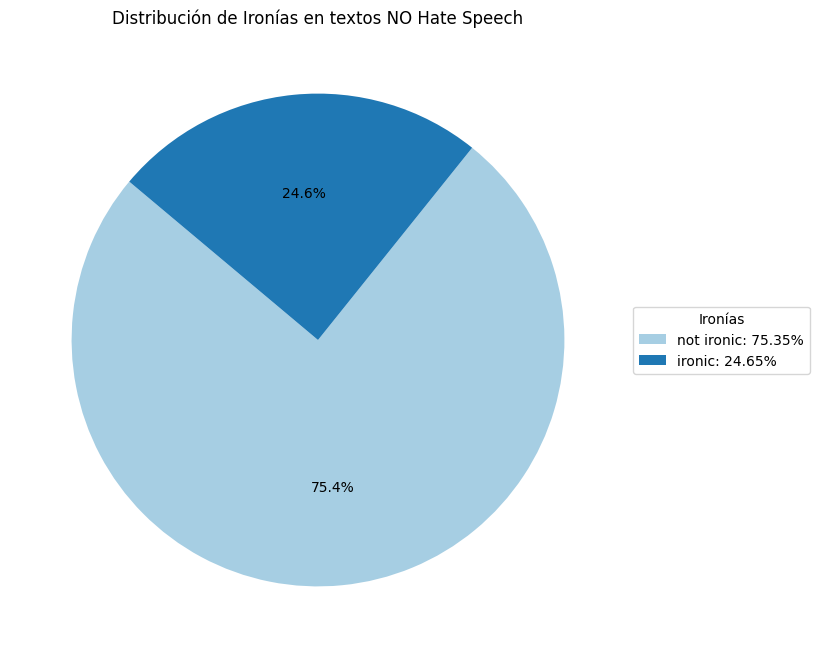

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_not_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos NO Hate Speech")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_not_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [30]:
print("\nEjemplos de cada tipo de sentimiento en textos NO hate speech:")
for sent_type, example in examples_per_irony_not_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO hate speech:
not ironic: ['Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4', '— Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?', 'Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.', '@Zurine3 Cuánto hijo de puta sobra en el mundo...', 'vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc', '#Noticiasdelalinea: Detienen en Guatapanal motocicleta y nacional haitiano indocumentado https://t.co/qs9MTKddqK', 'Padres indocumentados realizaron una huelga de hambre para pedir ser liberados https:

-----------------------------------------------

### Comparación entre todos los tweets, tweets hate_speech y no hate_speech

-----------------------------------------------


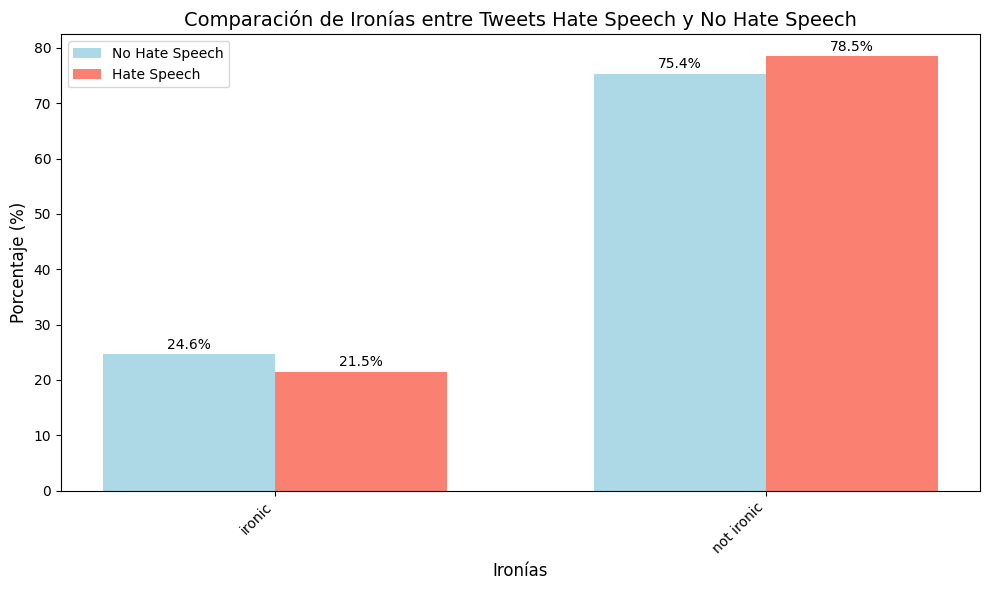

In [31]:
all_ironys = list(set(overall_irony_percentages_not_hate_speech.keys()).union(set(overall_irony_percentages_hate_speech.keys())))

not_hate_speech_percentages = [overall_irony_percentages_not_hate_speech.get(sent, 0) for sent in all_ironys]
hate_speech_percentages = [overall_irony_percentages_hate_speech.get(sent, 0) for sent in all_ironys]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_ironys))
bar1 = ax.bar(index - bar_width/2, not_hate_speech_percentages, bar_width, label='No Hate Speech', color='lightblue')
bar2 = ax.bar(index + bar_width/2, hate_speech_percentages, bar_width, label='Hate Speech', color='salmon')
for i, v in enumerate(not_hate_speech_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')
for i, v in enumerate(hate_speech_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Ironías', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Comparación de Ironías entre Tweets Hate Speech y No Hate Speech', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(all_ironys, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()